# 기본 라이브러리

In [ ]:
import pandas as pd
# pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
sns.set_palette('pastel')
import scipy as sp

# 데이터 불러오기

In [ ]:
data = pd.read_csv('무상증자data_v2.csv')
data.head(1)

,Unnamed: 0,회사명,code,Date,High,Low,Close,Volume,기관합계,개인,...,자기주식비율,베타,거래회전율,기업규모(log),증자비율,무상증자여부,Name,Market,Sector,Industry
0,0,코오롱티슈진,950160,2018-06-30,38407.5,36175.0,36943.75,412945.75,-3.955232e+08,5.744925e+08,...,0.0,1.415067,0.03358,26.842061,0.0,0,코오롱티슈진,KOSDAQ,기초 의약물질 및 생물학적 제제 제조업,골관절염 치료제


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13574 entries, 0 to 13573
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     13574 non-null  int64  
 1   회사명            13574 non-null  object 
 2   code           13574 non-null  int64  
 3   Date           13574 non-null  object 
 4   High           13574 non-null  float64
 5   Low            13574 non-null  float64
 6   Close          13574 non-null  float64
 7   Volume         13574 non-null  float64
 8   기관합계           13574 non-null  float64
 9   개인             13574 non-null  float64
 10  MFI            13574 non-null  float64
 11  윌리엄R%          13574 non-null  float64
 12  RSI            13574 non-null  float64
 13  CCI            13574 non-null  float64
 14  정배열            13574 non-null  float64
 15  역배열            13574 non-null  float64
 16  OBV            13574 non-null  float64
 17  볼린저밴드위치        13574 non-null  float64
 18  소액주주보유

In [ ]:
data.isnull().sum()

Unnamed: 0         0
회사명                0
code               0
Date               0
High               0
Low                0
Close              0
Volume             0
기관합계               0
개인                 0
MFI                0
윌리엄R%              0
RSI                0
CCI                0
정배열                0
역배열                0
OBV                0
볼린저밴드위치            0
소액주주보유주식비율         0
최대주주_특수관계인지분율      0
유동비율               0
부채비율               0
자기자본비율             0
매출액증가율            49
영업이익증가율            0
EBITDA증가율          0
EPS증가율             0
당기순이익증가율           0
흑자전환               0
자산성장율              0
자본성장율              0
부채비율성장율            0
유동비율성장율            4
자산회전율              0
자산회전율성장율          49
부채회전율              0
자본회전율              0
영업이익율              0
EBITDA마진율          0
ROA                0
ROE                0
OP/A               0
PER                0
PSR                0
PBR                0
EV/EBITDA          0
자기주식비율             0
베타           

In [ ]:
(data == float('inf')).sum()

Unnamed: 0        0
회사명               0
code              0
Date              0
High              0
Low               0
Close             0
Volume            0
기관합계              0
개인                0
MFI               0
윌리엄R%             0
RSI               0
CCI               0
정배열               0
역배열               0
OBV               0
볼린저밴드위치           0
소액주주보유주식비율        0
최대주주_특수관계인지분율     0
유동비율             12
부채비율              0
자기자본비율            0
매출액증가율            9
영업이익증가율           0
EBITDA증가율         0
EPS증가율            0
당기순이익증가율          0
흑자전환              0
자산성장율             0
자본성장율             0
부채비율성장율           0
유동비율성장율           8
자산회전율             0
자산회전율성장율          9
부채회전율             0
자본회전율             0
영업이익율             0
EBITDA마진율        23
ROA               0
ROE               0
OP/A              0
PER               0
PSR              54
PBR               0
EV/EBITDA         0
자기주식비율            0
베타                0
거래회전율             0
기업규모(log)         0


In [ ]:
(data == '#NAME?').sum()

Unnamed: 0       0
회사명              0
code             0
Date             0
High             0
Low              0
Close            0
Volume           0
기관합계             0
개인               0
MFI              0
윌리엄R%            0
RSI              0
CCI              0
정배열              0
역배열              0
OBV              0
볼린저밴드위치          0
소액주주보유주식비율       0
최대주주_특수관계인지분율    0
유동비율             0
부채비율             0
자기자본비율           0
매출액증가율           0
영업이익증가율          0
EBITDA증가율        0
EPS증가율           0
당기순이익증가율         0
흑자전환             0
자산성장율            0
자본성장율            0
부채비율성장율          0
유동비율성장율          0
자산회전율            0
자산회전율성장율         0
부채회전율            0
자본회전율            0
영업이익율            0
EBITDA마진율        0
ROA              0
ROE              0
OP/A             0
PER              0
PSR              0
PBR              0
EV/EBITDA        0
자기주식비율           0
베타               0
거래회전율            0
기업규모(log)        0
증자비율             0
무상증자여부           0
Name        

# 데이터 전처리

In [ ]:
data.drop(['Unnamed: 0','Name'], axis = 1, inplace = True)
data.columns

Index(['회사명', 'code', 'Date', 'High', 'Low', 'Close', 'Volume', '기관합계', '개인',
       'MFI', '윌리엄R%', 'RSI', 'CCI', '정배열', '역배열', 'OBV', '볼린저밴드위치',
       '소액주주보유주식비율', '최대주주_특수관계인지분율', '유동비율', '부채비율', '자기자본비율', '매출액증가율',
       '영업이익증가율', 'EBITDA증가율', 'EPS증가율', '당기순이익증가율', '흑자전환', '자산성장율', '자본성장율',
       '부채비율성장율', '유동비율성장율', '자산회전율', '자산회전율성장율', '부채회전율', '자본회전율', '영업이익율',
       'EBITDA마진율', 'ROA', 'ROE', 'OP/A', 'PER', 'PSR', 'PBR', 'EV/EBITDA',
       '자기주식비율', '베타', '거래회전율', '기업규모(log)', '증자비율', '무상증자여부', 'Market',
       'Sector', 'Industry'],
      dtype='object')

In [ ]:
data.replace([np.inf, -np.inf,'#NAME?'], np.nan, inplace = True)
data.dropna(inplace = True)

In [ ]:
print((data == float('inf')).sum().sum())
print((data == '#NAME?').sum().sum())
print(data.isnull().sum().sum())

0
0
0


In [ ]:
data = data.astype({'영업이익율':'float64'})
data = data.astype({'EBITDA마진율':'float64'})
print(data.dtypes)

회사명               object
code               int64
Date              object
High             float64
Low              float64
Close            float64
Volume           float64
기관합계             float64
개인               float64
MFI              float64
윌리엄R%            float64
RSI              float64
CCI              float64
정배열              float64
역배열              float64
OBV              float64
볼린저밴드위치          float64
소액주주보유주식비율       float64
최대주주_특수관계인지분율    float64
유동비율             float64
부채비율             float64
자기자본비율           float64
매출액증가율           float64
영업이익증가율          float64
EBITDA증가율        float64
EPS증가율           float64
당기순이익증가율         float64
흑자전환             float64
자산성장율            float64
자본성장율            float64
부채비율성장율          float64
유동비율성장율          float64
자산회전율            float64
자산회전율성장율         float64
부채회전율            float64
자본회전율            float64
영업이익율            float64
EBITDA마진율        float64
ROA              float64
ROE              float64


# 변수선택

[['OBV', '자본성장율', '자산성장율', '소액주주보유주식비율', '유동비율성장율', '베타', 'PSR', '부채비율성장율', '영업이익증가율', 
          '매출액증가율', '개인', '유동비율', 'CCI', 'Volume', '기업규모(log)', '최대주주_특수관계인지분율', '윌리엄R%', 'PER', '거래회전율', 
          'Sector', 'OP/A', 'ROA', 'PBR', 'EBITDA증가율', 'MFI', '볼린저밴드위치', '역배열', '기관합계', 'EBITDA마진율', '부채비율']]

In [ ]:
corr = data[['OBV', '자본성장율', '자산성장율', '소액주주보유주식비율', '유동비율성장율', '베타', 'PSR', '부채비율성장율', '영업이익증가율', 
             '매출액증가율', '개인', '유동비율', 'CCI', 'Volume', '기업규모(log)', '최대주주_특수관계인지분율', '윌리엄R%', 'PER', '거래회전율', 
             'OP/A', 'ROA', 'PBR', 'EBITDA증가율', 'MFI', '볼린저밴드위치', '역배열', '기관합계', 'EBITDA마진율', '부채비율']]
corr.corr()
# MFI, 볼린저밴드위치, CCI 서로 상관성이 높은 변수임으로, CCI만 남기고 제거하자!

,OBV,자본성장율,자산성장율,소액주주보유주식비율,유동비율성장율,베타,PSR,부채비율성장율,영업이익증가율,매출액증가율,...,OP/A,ROA,PBR,EBITDA증가율,MFI,볼린저밴드위치,역배열,기관합계,EBITDA마진율,부채비율
OBV,1.000000,-0.000636,0.013409,0.270780,0.004952,0.054587,0.009700,0.021461,-0.002315,0.003030,...,-0.030654,-0.040686,0.024201,-0.001231,0.138334,-0.026996,0.011395,-0.004406,0.013427,0.010569
자본성장율,-0.000636,1.000000,0.096526,-0.008572,0.040119,0.010657,-0.000233,-0.024453,-0.000001,-0.004112,...,0.008818,0.013235,0.000327,0.002161,0.003012,-0.007752,0.003843,0.001328,0.003299,0.001765
자산성장율,0.013409,0.096526,1.000000,0.028286,0.116013,0.011120,-0.001988,0.304242,0.000454,0.003228,...,0.074089,0.142161,-0.002922,-0.005426,-0.007591,-0.009209,-0.025751,0.001867,0.026928,0.014254
소액주주보유주식비율,0.270780,-0.008572,0.028286,1.000000,0.018210,0.154133,0.009553,0.032780,-0.002229,0.033348,...,-0.204373,-0.168606,0.005458,-0.012342,0.089355,-0.020794,0.035216,0.008699,-0.020876,0.036790
유동비율성장율,0.004952,0.040119,0.116013,0.018210,1.000000,0.005186,0.000203,-0.045466,-0.000551,-0.010834,...,-0.007646,0.020418,-0.000773,0.006489,-0.022714,-0.025170,-0.003277,-0.003734,0.004936,-0.001720
베타,0.054587,0.010657,0.011120,0.154133,0.005186,1.000000,0.013673,0.036283,0.000176,-0.011609,...,-0.077953,-0.050741,0.000329,-0.013577,0.032572,-0.076940,0.003865,0.012008,-0.070963,0.019312
PSR,0.009700,-0.000233,-0.001988,0.009553,0.000203,0.013673,1.000000,-0.000718,-0.000116,-0.000540,...,-0.002485,-0.000757,0.322120,0.000284,0.002013,-0.007879,-0.006272,0.000142,-0.008943,-0.000237
부채비율성장율,0.021461,-0.024453,0.304242,0.032780,-0.045466,0.036283,-0.000718,1.000000,-0.001036,0.037031,...,-0.072671,-0.112550,0.002888,-0.005458,-0.001072,-0.017281,-0.001455,0.006598,-0.008586,0.414853
영업이익증가율,-0.002315,-0.000001,0.000454,-0.002229,-0.000551,0.000176,-0.000116,-0.001036,1.000000,0.000785,...,0.006575,0.005358,-0.000038,0.000472,0.013593,0.015844,-0.008751,-0.000015,0.000564,-0.000697
매출액증가율,0.003030,-0.004112,0.003228,0.033348,-0.010834,-0.011609,-0.000540,0.037031,0.000785,1.000000,...,-0.092537,-0.108472,0.003711,0.010471,-0.007715,-0.015720,-0.014316,-0.001503,0.001701,-0.001098


# ML 준비

## 데이터 분할

In [ ]:
# # 모든 변수
# X = data.drop(['회사명', 'code', 'Date', '증자비율', '무상증자여부', 'Industry'], axis = 1)

# y = data['무상증자여부']

In [ ]:
X = data[['자본성장율', '자산성장율', '유동비율', '소액주주보유주식비율', '최대주주_특수관계인지분율', 'OP/A', 'ROE', 'PER']]

y = data['무상증자여부']

In [ ]:
corr = data[['자본성장율', '자산성장율', '유동비율', '소액주주보유주식비율', '최대주주_특수관계인지분율', 'OP/A', 'ROE', 'PER']]
corr.corr()

,자본성장율,자산성장율,유동비율,소액주주보유주식비율,최대주주_특수관계인지분율,OP/A,ROE,PER
자본성장율,1.000000,0.096526,0.006499,-0.008572,-0.007402,0.008818,0.020131,0.000032
자산성장율,0.096526,1.000000,0.084596,0.028286,-0.047638,0.074089,0.025250,0.000252
유동비율,0.006499,0.084596,1.000000,0.019045,-0.067149,-0.099914,-0.000266,0.010065
소액주주보유주식비율,-0.008572,0.028286,0.019045,1.000000,-0.799638,-0.204373,-0.085203,-0.000519
최대주주_특수관계인지분율,-0.007402,-0.047638,-0.067149,-0.799638,1.000000,0.223924,0.076510,0.001196
OP/A,0.008818,0.074089,-0.099914,-0.204373,0.223924,1.000000,0.236846,0.002597
ROE,0.020131,0.025250,-0.000266,-0.085203,0.076510,0.236846,1.000000,0.001706
PER,0.000032,0.000252,0.010065,-0.000519,0.001196,0.002597,0.001706,1.000000


In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split

In [ ]:
# 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# 7:3으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(9202, 8)
(3944, 8)


In [ ]:
X_train['y_train'] = y_train
X_train_sample = X_train[X_train['y_train'] == 0].sample(n = 500, random_state = 1, replace = True)

X_train_1 = X_train[X_train['y_train'] == 1]

In [ ]:
y_train_sample = X_train_sample['y_train']

y_train_1 = X_train_1['y_train']

In [ ]:
X_train_sample.drop('y_train', axis = 1, inplace = True)

X_train_1.drop('y_train', axis = 1, inplace = True)

C:\Users\com01\AppData\Local\Temp/ipykernel_24236/3135102743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1.drop('y_train', axis = 1, inplace = True)


In [ ]:
X_train = pd.concat([X_train_sample, X_train_1])
y_train = pd.concat([y_train_sample, y_train_1])

In [ ]:
y_train.value_counts()

0    500
1     91
Name: y_train, dtype: int64

In [ ]:
rus = RandomUnderSampler()
# X_train, y_train = rus.fit_resample(X_train, y_train)
X_test, y_test = rus.fit_resample(X_test, y_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train, y_train = smote.fit_sample(X_train, y_train)

In [ ]:
y_train.value_counts()

0    500
1    500
Name: y_train, dtype: int64

In [ ]:
y_test.value_counts()

0    39
1    39
Name: 무상증자여부, dtype: int64

## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Sector
le = LabelEncoder()
le.fit(X_train['Sector'])
X_train['Sector'] = le.transform(X_train['Sector'])

prev_class = list(le.classes_)

for label in np.unique(X_test['Sector']):
    if label not in prev_class: 
        prev_class.append(label)
le.classes_ = np.array(prev_class)

X_test['Sector'] = le.transform(X_test['Sector'])

In [ ]:
# Market
le = LabelEncoder()
le.fit(X_train['Market'])
X_train['Market'] = le.transform(X_train['Market'])

prev_class = list(le.classes_)

for label in np.unique(X_test['Market']):
    if label not in prev_class: 
        prev_class.append(label)
le.classes_ = np.array(prev_class)

X_test['Market'] = le.transform(X_test['Market'])

# ML

In [ ]:
# K-Fold
# from sklearn.model_selection import StratifiedKFold
# str_kfold = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
from sklearn.model_selection import RepeatedStratifiedKFold

str_kfold = RepeatedStratifiedKFold(n_splits=5,          
              random_state=1234, 
              n_repeats=10)



# BaseLine 체크
from sklearn.model_selection import cross_val_score

# 파라미터 최적화
import optuna
import matplotlib

# 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

# 저장
import joblib

## RadomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### BaseLine Check

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 1)
scores = cross_val_score(rf, X_train, y_train, cv = str_kfold, scoring = 'f1')
print(scores.mean())

0.5753599114064231


### 파라미터 최적화

In [ ]:
def rf_objective(trial):
    params = {
              'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy']),
              'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
              'max_depth' : trial.suggest_int('max_depth', 1, 50),
              'max_leaf_nodes' : trial.suggest_int('max_leaf_nodes', 2, 300),
              'max_features' : trial.suggest_int('max_features', 1, X_train.shape[1])
                }
    
    rf = RandomForestClassifier(**params, random_state = 1, n_jobs = -1)
    rf.fit(X_train, y_train)
    scores = cross_val_score(rf, X_train, y_train, cv = str_kfold, scoring = 'f1')
    acc_mean = scores.mean()
    return acc_mean

In [ ]:
rf_study = optuna.create_study(direction = 'maximize')
rf_study.optimize(rf_objective, n_trials = 3)

[I 2022-04-04 17:31:11,918] A new study created in memory with name: no-name-05a0221e-1009-4b8b-925e-f2fb93e78618
[I 2022-04-04 17:31:34,047] Trial 0 finished with value: 0.6932579185520362 and parameters: {'criterion': 'entropy', 'n_estimators': 494, 'max_depth': 31, 'max_leaf_nodes': 156, 'max_features': 47}. Best is trial 0 with value: 0.6932579185520362.
[I 2022-04-04 17:31:50,964] Trial 1 finished with value: 0.6959716561438226 and parameters: {'criterion': 'entropy', 'n_estimators': 846, 'max_depth': 41, 'max_leaf_nodes': 29, 'max_features': 8}. Best is trial 1 with value: 0.6959716561438226.
[I 2022-04-04 17:31:56,288] Trial 2 finished with value: 0.7056543289117102 and parameters: {'criterion': 'gini', 'n_estimators': 221, 'max_depth': 44, 'max_leaf_nodes': 64, 'max_features': 30}. Best is trial 2 with value: 0.7056543289117102.


In [ ]:
print(rf_study.best_trial.params)
print('-------------------')
print(rf_study.best_trial.values)

{'criterion': 'gini', 'n_estimators': 221, 'max_depth': 44, 'max_leaf_nodes': 64, 'max_features': 30}
-------------------
[0.7056543289117102]


C:\Users\com01\AppData\Local\Temp/ipykernel_24236/1934335596.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(rf_study)


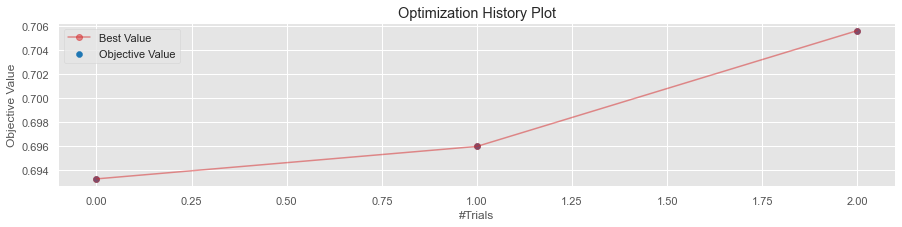

In [ ]:
optuna.visualization.matplotlib.plot_optimization_history(rf_study)
plt.rcParams['figure.figsize'] = (15,3)

### 모델링

In [ ]:
rf_study.best_params

{'criterion': 'entropy',
 'n_estimators': 413,
 'max_depth': 15,
 'max_leaf_nodes': 115,
 'max_features': 9}

'criterion': 'gini',
 'n_estimators': 523,
 'max_depth': 30,
 'max_leaf_nodes': 183,
 'max_features': 22

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 1,
                            criterion = rf_study.best_params['criterion'],
                            n_estimators = rf_study.best_params['n_estimators'],
                            max_depth = rf_study.best_params['max_depth'],
                            max_leaf_nodes = rf_study.best_params['max_leaf_nodes'],
                            max_features = rf_study.best_params['max_features'])
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1]


In [ ]:
# rf = joblib.load('rf_v2')
# rf.fit(X_train, y_train)
# y_pred = rf.predict(X_test)
# print(y_pred)

### 모델평가

In [ ]:
# train data
print('정확도:', accuracy_score(y_train, rf.predict(X_train)))
print('재현율:', recall_score(y_train, rf.predict(X_train)))
print('정밀도*:', precision_score(y_train, rf.predict(X_train)))
print('f1:', f1_score(y_train, rf.predict(X_train)))
print('roc:', roc_auc_score(y_train, rf.predict(X_train)))
print(classification_report(y_train, rf.predict(X_train)))

정확도: 1.0
재현율: 1.0
정밀도*: 1.0
f1: 1.0
roc: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        91

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [ ]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.8205128205128205
재현율: 0.8205128205128205
정밀도*: 0.8205128205128205
f1: 0.8205128205128205
roc: 0.8205128205128205
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.82      0.82      0.82        39

    accuracy                           0.82        78
   macro avg       0.82      0.82      0.82        78
weighted avg       0.82      0.82      0.82        78



### 중요변수

In [ ]:
feature_name = X.columns
feature_importances = rf.feature_importances_
rf_feature_importances = sorted(zip(feature_importances, feature_name), reverse = True)
print(rf_feature_importances)

[(0.11235306788507575, '자본성장율'), (0.10284324776923545, 'OBV'), (0.0753513400951215, '자산성장율'), (0.07526044210358356, 'PSR'), (0.06947460641752619, '유동비율'), (0.06941829816703417, '개인'), (0.0658267978196476, '베타'), (0.06243655227301088, '소액주주보유주식비율'), (0.06162376717783775, '매출액증가율'), (0.060439618347863246, '유동비율성장율'), (0.053927139327496626, 'CCI'), (0.052611605498478, '부채비율성장율'), (0.050614496558853646, '영업이익증가율'), (0.05029592629115848, '기업규모(log)'), (0.037523094268077185, 'Sector')]


In [ ]:
rf_feature = pd.DataFrame()
rf_feature['feature'] = feature_name
rf_feature['rf_score'] = feature_importances
rf_feature

,feature,rf_score
0,OBV,0.102843
1,자본성장율,0.112353
2,자산성장율,0.075351
3,소액주주보유주식비율,0.062437
4,유동비율성장율,0.060440
5,베타,0.065827
6,PSR,0.075260
7,부채비율성장율,0.052612
8,영업이익증가율,0.050614
9,매출액증가율,0.061624


### 모델저장

In [ ]:
joblib.dump(rf, 'rf_v4')

['rf_v4']

## Xgboost

In [ ]:
from xgboost import XGBClassifier

D:\ANACONDA\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### BaseLine Check

In [ ]:
# xgb & K-Fold
xgbc = XGBClassifier(n_jobs= -1, random_state=1, use_label_encoder=False, objective = "binary:logistic", eval_metric = "error")

scores = cross_val_score(xgbc, X_train, y_train, cv=str_kfold, scoring="f1")
print("xgb K-Fold 평균 정확도 :", scores.mean())

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

xgb K-Fold 평균 정확도 : 0.5032828282828283


### 파라미터 최적화

In [ ]:
def xgb_objective(trial):
    params = {
              'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
              'n_estimators' : trial.suggest_int('n_estimators', 100, 1000),
              'learning_rate' : trial.suggest_loguniform('learning_rate', 1e-3, 8e-1),
              'max_depth' : trial.suggest_int('max_depth', 1, 100),
              'subsample' : trial.suggest_discrete_uniform('subsample', 0.1, 1, 0.05),
              'colsample_bytree' : trial.suggest_discrete_uniform('colsample_bytree', 0.1, 1, 0.05),
              
              #규약
              'reg_alpha' : trial.suggest_loguniform('reg_alpha', 1e-6, 1e-3),
              'reg_lambda' : trial.suggest_loguniform('reg_lambda', 1e-6, 1e-3)
                }
    
    xgbc = XGBClassifier(**params, n_jobs = -1, random_state = 1, use_label_encoder = False, 
                         objective = "binary:logistic", eval_metric = "error")
    scores = cross_val_score(xgbc, X_train, y_train, cv = str_kfold, scoring = 'f1')
    acc_mean = scores.mean()
    return acc_mean

In [ ]:
xgb_study = optuna.create_study(direction = 'maximize')
xgb_study.optimize(xgb_objective, n_trials = 50)

[I 2022-04-03 00:42:14,343] A new study created in memory with name: no-name-9ca4a32e-747f-4343-996e-354cd425a8c7


[00:42:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:42:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:42:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:42:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:43:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:43:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:43:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:44:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 00:44:22,256] Trial 0 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 812, 'learning_rate': 0.008875946573006594, 'max_depth': 83, 'subsample': 0.6, 'colsample_bytree': 0.35, 'reg_alpha': 0.0009702034807666928, 'reg_lambda': 0.0001690077369265293}. Best is trial 0 with value: 0.0.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:45:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 00:46:24,269] Trial 1 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 718, 'learning_rate': 0.003664417722567658, 'max_depth': 93, 'subsample': 0.75, 'colsample_bytree': 0.25, 'reg_alpha': 5.61350866286028e-06, 'reg_lambda': 0.0002008939931699305}. Best is trial 0 with value: 0.0.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:46:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:47:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:47:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 00:47:47,802] Trial 2 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 329, 'learning_rate': 0.30898488821235476, 'max_depth': 46, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.35, 'reg_alpha': 2.4262116611881696e-05, 'reg_lambda': 1.724270058970817e-05}. Best is trial 0 with value: 0.0.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed 

[00:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:51:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:52:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:52:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:52:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:53:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 00:53:45,970] Trial 4 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 529, 'learning_rate': 0.6608896907756102, 'max_depth': 52, 'subsample': 0.15000000000000002, 'colsample_bytree': 0.8, 'reg_alpha': 0.00024994640803306667, 'reg_lambda': 1.8046776075531666e-06}. Best is trial 3 with value: 0.4932828282828282.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and w

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2022-04-03 01:27:25,087] Trial 7 finished with value: 0.05714285714285714 and parameters: {'booster': 'gbtree', 'n_estimators': 711, 'learning_rate': 0.006943926999458322, 'max_depth': 87, '

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2022-04-03 02:47:33,347] Trial 15 finished with value: 0.4932828282828282 and parameters: {'booster': 'gbtree', 'n_estimators': 582, 'learning_rate': 0.08608963505796008, 'max_depth': 16, 'subsample': 0.85, 'colsample_bytree': 0.2, 'reg_alpha': 2.1118763848133684e-06, 'reg_lambda': 5.081145846861184e-05}. Best is trial 10 with value: 0.5099494949494949.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and w

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2022-04-03 03:13:31,427] Trial 26 finished with value: 0.5088383838383839 and parameters: {'booster': 'gbtree', 'n_estimators': 497, 'learning_rate': 0.12027095061769977, 'max_depth': 10, 'subsample': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 2.2646369041282992e-05, 'reg_lambda': 1.8332254114522173e-05}. Best is trial 10 with value: 0.5099494949494949.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and w

[03:13:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:13:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 03:13:36,626] Trial 27 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 400, 'learning_rate': 0.04265595782327957, 'max_depth': 31, 'subsample': 0.85, 'colsample_bytree': 0.15000000000000002, 'reg_alpha': 5.8610050218981815e-05, 'reg_lambda': 7.297845242718805e-06}. Best is trial 10 with value: 0.5099494949494949.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated an

[03:17:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:17:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 03:17:33,516] Trial 30 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 193, 'learning_rate': 0.0339130799339207, 'max_depth': 20, 'subsample': 0.9500000000000001, 'colsample_bytree': 0.9, 'reg_alpha': 3.514499410363436e-05, 'reg_lambda': 7.631684247743427e-05}. Best is trial 10 with value: 0.5099494949494949.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and wi

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2022-04-03 03:18:34,450] Trial 33 finished with value: 0.4932828282828282 and parameters: {'booster': 'gbtree', 'n_estimators': 369, 'learning_rate': 0.06614847227392266, 'max_depth': 46, 's

[03:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:18:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 03:18:57,475] Trial 35 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 500, 'learning_rate': 0.1253314223933147, 'max_depth': 48, 'subsample': 1.0, 'colsample_bytree': 0.30000000000000004, 'reg_alpha': 2.7168055017752474e-05, 'reg_lambda': 6.1976336088888515e-06}. Best is trial 10 with value: 0.5099494949494949.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and

[03:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 03:19:17,149] Trial 37 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 290, 'learning_rate': 0.03106774064171422, 'max_depth': 22, 'subsample': 0.7000000000000001, 'colsample_bytree': 0.4, 'reg_alpha': 4.610393569704066e-05, 'reg_lambda': 1.0289668236777911e-05}. Best is trial 10 with value: 0.5099494949494949.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and 

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2022-04-03 03:21:45,735] Trial 40 finished with value: 0.4777272727272727 and parameters: {'booster': 'gbtree', 'n_estimators': 345, 'learning_rate': 0.018009538280374347, 'max_depth': 26, '

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtyp

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
[I 2022-04-03 03:47:35,676] Trial 48 finished with value: 0.5060606060606061 and parameters: {'booster': 'gbtree', 'n_estimators': 425, 'learning_rate': 0.7501146236653373, 'max_depth': 33, 'subsample': 1.0, 'colsample_bytree': 0.30000000000000004, 'reg_alpha': 8.846071815731589e-05, 'reg_lambda': 3.368767987586921e-06}. Best is trial 10 with value: 0.5099494949494949.
D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[03:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[I 2022-04-03 03:47:41,982] Trial 49 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'n_estimators': 596, 'learning_rate': 0.002215738930685624, 'max_depth': 24, 'subsample': 0.2, 'colsample_bytree': 0.65, 'reg_alpha': 0.00017934582098676972, 'reg_lambda': 5.9088767621917205e-06}. Best is trial 10 with value: 0.5099494949494949.


In [ ]:
print(xgb_study.best_params)
print('-------------------')
print(xgb_study.best_value)

{'booster': 'gbtree', 'n_estimators': 466, 'learning_rate': 0.08739770191766172, 'max_depth': 27, 'subsample': 1.0, 'colsample_bytree': 0.1, 'reg_alpha': 3.550073448810628e-05, 'reg_lambda': 4.855295248823286e-06}
-------------------
0.5099494949494949


C:\Users\com01\AppData\Local\Temp/ipykernel_2188/803375230.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(xgb_study)


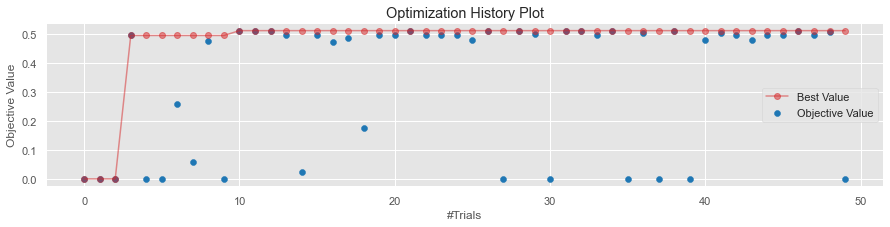

In [ ]:
optuna.visualization.matplotlib.plot_optimization_history(xgb_study)
plt.rcParams['figure.figsize'] = (15,3)

### 모델링

In [ ]:
xgb_study.best_params

{'booster': 'gbtree',
 'n_estimators': 466,
 'learning_rate': 0.08739770191766172,
 'max_depth': 27,
 'subsample': 1.0,
 'colsample_bytree': 0.1,
 'reg_alpha': 3.550073448810628e-05,
 'reg_lambda': 4.855295248823286e-06}

{'booster': 'dart', <br>
 'n_estimators': 529, <br>
 'learning_rate': 0.4539101043029985, <br>
 'max_depth': 31, <br>
 'subsample': 1.0, <br>
 'colsample_bytree': 0.30000000000000004, <br>
 'reg_alpha': 2.300719828061864e-06, <br>
 'reg_lambda': 3.789052265748852e-06}

In [ ]:
xgb = XGBClassifier(n_jobs= -1, random_state=1234, use_label_encoder = False, 
                    objective = "binary:logistic", eval_metric = "error",
                    booster = xgb_study.best_params['booster'],
                    n_estimators = xgb_study.best_params['n_estimators'],
                    learning_rate = xgb_study.best_params['learning_rate'],
                    max_depth = xgb_study.best_params['max_depth'],
                    subsample = xgb_study.best_params['subsample'],
                    colsample_bytree = xgb_study.best_params['colsample_bytree'],
                    reg_alpha = xgb_study.best_params['reg_alpha'],
                    reg_lambda = xgb_study.best_params['reg_lambda'])

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(y_pred)

D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0 0 0 ... 0 0 0]


In [ ]:
xgb = joblib.load('xgb_v2')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


### 모델평가

In [ ]:
# train data
print('정확도:', accuracy_score(y_train, xgb.predict(X_train)))
print('재현율:', recall_score(y_train, xgb.predict(X_train)))
print('정밀도*:', precision_score(y_train, xgb.predict(X_train)))
print('f1:', f1_score(y_train, xgb.predict(X_train)))
print('roc:', roc_auc_score(y_train, xgb.predict(X_train)))
print(classification_report(y_train, xgb.predict(X_train)))

정확도: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


재현율: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


정밀도*: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


f1: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


roc: 1.0


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6508
           1       1.00      1.00      1.00        65

    accuracy                           1.00      6573
   macro avg       1.00      1.00      1.00      6573
weighted avg       1.00      1.00      1.00      6573



In [ ]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.9926973984481972
재현율: 0.26153846153846155
정밀도*: 1.0
f1: 0.41463414634146345
roc: 0.6307692307692307
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6508
           1       1.00      0.26      0.41        65

    accuracy                           0.99      6573
   macro avg       1.00      0.63      0.71      6573
weighted avg       0.99      0.99      0.99      6573



### 중요변수

In [ ]:
feature_name = X.columns
feature_importances = xgb.feature_importances_
xgb_feature_importances = sorted(zip(feature_importances, feature_name), reverse = True)
print(xgb_feature_importances)

[(0.11119833, '유동비율'), (0.085387744, 'CCI'), (0.07646162, '유동비율성장율'), (0.072450735, '자산성장율'), (0.0720177, '영업이익증가율'), (0.067705534, '개인'), (0.066517286, '베타'), (0.06563758, '소액주주보유주식비율'), (0.064880304, 'OBV'), (0.059415586, 'PSR'), (0.057967976, '매출액증가율'), (0.05434433, '자본성장율'), (0.0536657, '기업규모(log)'), (0.05113327, 'Sector'), (0.041216247, '부채비율성장율')]


In [ ]:
xgb_feature = pd.DataFrame()
xgb_feature['feature'] = feature_name
xgb_feature['xgb_score'] = feature_importances
xgb_feature

,feature,xgb_score
0,OBV,0.064880
1,자본성장율,0.054344
2,자산성장율,0.072451
3,소액주주보유주식비율,0.065638
4,유동비율성장율,0.076462
5,베타,0.066517
6,PSR,0.059416
7,부채비율성장율,0.041216
8,영업이익증가율,0.072018
9,매출액증가율,0.057968


### 모델저장

In [ ]:
joblib.dump(xgb, 'xgb_v4')

['xgb_v4']

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier

### BaseLine Check

In [ ]:
# lgbm & K-Fold
lgbm = LGBMClassifier(n_jobs = -1, random_state = 1)

scores = cross_val_score(lgbm, X_train, y_train, cv = str_kfold, scoring = 'accuracy')
print(scores.mean())

0.8839


### 파라미터 최적화

In [ ]:
def lgbm_objective(trial):
    params = {
              'boosting_type' : trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
              'n_estimators' : trial.suggest_int('n_estimators', 1, 100),
              'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.9),
              'max_depth' : trial.suggest_int('max_depth', 10, 200),
              'min_child_weight' : trial.suggest_float('min_child_weight', 0.01, 0.9),
              'reg_alpha' : trial.suggest_float('reg_alpha', 0.01, 0.9),
              'reg_lambda' : trial.suggest_float('reg_lambda', 0.01, 0.9),
                }
        
    lgbm = LGBMClassifier(**params, random_state = 1, n_jobs = -1)
    lgbm.fit(X_train, y_train)
    scores = cross_val_score(lgbm, X_train, y_train, cv = str_kfold, scoring = 'f1')
    acc_mean = scores.mean()
    
    # Target -> return
    return acc_mean

In [ ]:
lgbm_study = optuna.create_study(direction = 'maximize')
lgbm_study.optimize(lgbm_objective, n_trials = 10)

[I 2022-04-04 18:36:49,874] A new study created in memory with name: no-name-27dbb640-d442-497d-a9d0-85933b760e0e
[I 2022-04-04 18:36:54,031] Trial 0 finished with value: 0.8719882321380665 and parameters: {'boosting_type': 'dart', 'n_estimators': 25, 'learning_rate': 0.3591922574705401, 'max_depth': 28, 'min_child_weight': 0.42997698854573263, 'reg_alpha': 0.4218741940842082, 'reg_lambda': 0.4431937466311475}. Best is trial 0 with value: 0.8719882321380665.
[I 2022-04-04 18:37:00,239] Trial 1 finished with value: 0.792629488060878 and parameters: {'boosting_type': 'dart', 'n_estimators': 74, 'learning_rate': 0.02261737803122424, 'max_depth': 113, 'min_child_weight': 0.6635273974380209, 'reg_alpha': 0.5127548061643297, 'reg_lambda': 0.8212860795738476}. Best is trial 0 with value: 0.8719882321380665.
[I 2022-04-04 18:37:04,737] Trial 2 finished with value: 0.8858936439136363 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 95, 'learning_rate': 0.3340438850105351, 'max_depth': 

In [ ]:
print(lgbm_study.best_params)
print('-------------------')
print(lgbm_study.best_value)

{'boosting_type': 'dart', 'n_estimators': 99, 'learning_rate': 0.7369299497041487, 'max_depth': 79, 'min_child_weight': 0.33662297134756725, 'reg_alpha': 0.3915415139333041, 'reg_lambda': 0.3796616355432463}
-------------------
0.8861905810723631


C:\Users\com01\AppData\Local\Temp/ipykernel_24236/2647688657.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(lgbm_study)


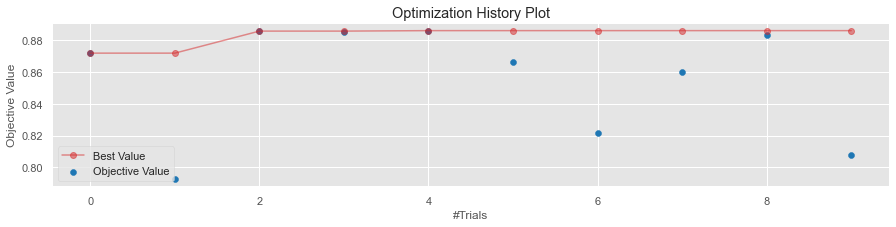

In [ ]:
optuna.visualization.matplotlib.plot_optimization_history(lgbm_study)
plt.rcParams['figure.figsize'] = (15,3)

### 모델링

In [ ]:
lgbm_study.best_params

{'boosting_type': 'dart',
 'n_estimators': 72,
 'learning_rate': 0.36301029558928144,
 'max_depth': 160,
 'min_child_weight': 0.19617654738861667,
 'reg_alpha': 0.8308211428910038,
 'reg_lambda': 0.806474690079737}

{'boosting_type': 'gbdt', <br>
 'n_estimators': 43, <br>
 'learning_rate': 0.4094592370193799, <br>
 'max_depth': 78, <br>
 'min_child_weight': 0.012084680483163067, <br>
 'reg_alpha': 0.6838764597971072, <br>
 'reg_lambda': 0.8470022087941981}

In [ ]:
lgbm = LGBMClassifier(random_state = 1, n_jobs = -1,
                      boosting_type = lgbm_study.best_params['boosting_type'],
                      n_estimators = lgbm_study.best_params['n_estimators'],
                      learning_rate = lgbm_study.best_params['learning_rate'],
                      max_depth = lgbm_study.best_params['max_depth'],
                      min_child_weight = lgbm_study.best_params['min_child_weight'],
                      reg_alpha = lgbm_study.best_params['reg_alpha'],
                      reg_lambda = lgbm_study.best_params['reg_lambda'])

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0
 0 1 1 0]


In [ ]:
# lgbm = joblib.load('lgbm_v2')
# lgbm.fit(X_train, y_train)
# y_pred = lgbm.predict(X_test)
# print(y_pred)

### 모델평가

In [ ]:
# train data
print('정확도:', accuracy_score(y_train, lgbm.predict(X_train)))
print('재현율:', recall_score(y_train, lgbm.predict(X_train)))
print('정밀도*:', precision_score(y_train, lgbm.predict(X_train)))
print('f1:', f1_score(y_train, lgbm.predict(X_train)))
print('roc:', roc_auc_score(y_train, lgbm.predict(X_train)))
print(classification_report(y_train, lgbm.predict(X_train)))

정확도: 1.0
재현율: 1.0
정밀도*: 1.0
f1: 1.0
roc: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.7435897435897436
재현율: 0.5897435897435898
정밀도*: 0.8518518518518519
f1: 0.6969696969696971
roc: 0.7435897435897436
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        39
           1       0.85      0.59      0.70        39

    accuracy                           0.74        78
   macro avg       0.77      0.74      0.74        78
weighted avg       0.77      0.74      0.74        78



### 중요변수

In [ ]:
feature_name = X.columns
feature_importances = lgbm.feature_importances_
lgbm_feature_importances = sorted(zip(feature_importances, feature_name), reverse = True)
print(lgbm_feature_importances)

[(110, '유동비율성장율'), (103, '소액주주보유주식비율'), (97, '개인'), (96, '유동비율'), (92, 'CCI'), (91, '자산성장율'), (91, 'PSR'), (90, 'OBV'), (83, '자본성장율'), (79, '기업규모(log)'), (76, '영업이익증가율'), (74, '매출액증가율'), (63, 'Sector'), (55, '부채비율성장율'), (51, '베타')]


In [ ]:
lgbm_feature = pd.DataFrame()
lgbm_feature['feature'] = feature_name
lgbm_feature['lgbm_score'] = feature_importances
lgbm_feature

,feature,lgbm_score
0,OBV,90
1,자본성장율,83
2,자산성장율,91
3,소액주주보유주식비율,103
4,유동비율성장율,110
5,베타,51
6,PSR,91
7,부채비율성장율,55
8,영업이익증가율,76
9,매출액증가율,74


### 모델저장

In [ ]:
joblib.dump(lgbm, 'lgbm_v4')

['lgbm_v4']

## CatBoost

In [ ]:
from catboost import CatBoostClassifier

### BaseLine Check

In [ ]:
catb = CatBoostClassifier(random_state = 1)
scores = cross_val_score(catb, X_train, y_train, cv = str_kfold, scoring = 'f1')
print(scores.mean())

Learning rate set to 0.022007
0:	learn: 0.6407629	total: 136ms	remaining: 2m 15s
1:	learn: 0.5954864	total: 141ms	remaining: 1m 10s
2:	learn: 0.5532290	total: 149ms	remaining: 49.4s
3:	learn: 0.5160417	total: 157ms	remaining: 39s
4:	learn: 0.4795265	total: 164ms	remaining: 32.7s
5:	learn: 0.4460283	total: 172ms	remaining: 28.5s
6:	learn: 0.4151494	total: 180ms	remaining: 25.5s
7:	learn: 0.3877218	total: 188ms	remaining: 23.4s
8:	learn: 0.3609932	total: 197ms	remaining: 21.7s
9:	learn: 0.3358602	total: 207ms	remaining: 20.5s
10:	learn: 0.3151692	total: 216ms	remaining: 19.4s
11:	learn: 0.2945289	total: 223ms	remaining: 18.4s
12:	learn: 0.2761473	total: 230ms	remaining: 17.5s
13:	learn: 0.2581210	total: 236ms	remaining: 16.6s
14:	learn: 0.2419436	total: 242ms	remaining: 15.9s
15:	learn: 0.2277111	total: 249ms	remaining: 15.3s
16:	learn: 0.2149324	total: 255ms	remaining: 14.7s
17:	learn: 0.2025838	total: 261ms	remaining: 14.3s
18:	learn: 0.1911632	total: 268ms	remaining: 13.8s
19:	learn: 

169:	learn: 0.0321344	total: 1.25s	remaining: 6.1s
170:	learn: 0.0319305	total: 1.25s	remaining: 6.09s
171:	learn: 0.0318790	total: 1.26s	remaining: 6.08s
172:	learn: 0.0317438	total: 1.27s	remaining: 6.07s
173:	learn: 0.0316444	total: 1.28s	remaining: 6.06s
174:	learn: 0.0315368	total: 1.28s	remaining: 6.05s
175:	learn: 0.0314596	total: 1.29s	remaining: 6.04s
176:	learn: 0.0313376	total: 1.3s	remaining: 6.03s
177:	learn: 0.0312530	total: 1.3s	remaining: 6.01s
178:	learn: 0.0311870	total: 1.31s	remaining: 6s
179:	learn: 0.0310948	total: 1.31s	remaining: 5.99s
180:	learn: 0.0309796	total: 1.32s	remaining: 5.97s
181:	learn: 0.0308359	total: 1.32s	remaining: 5.96s
182:	learn: 0.0307904	total: 1.33s	remaining: 5.95s
183:	learn: 0.0307204	total: 1.34s	remaining: 5.93s
184:	learn: 0.0306528	total: 1.34s	remaining: 5.92s
185:	learn: 0.0306099	total: 1.35s	remaining: 5.91s
186:	learn: 0.0305711	total: 1.36s	remaining: 5.9s
187:	learn: 0.0305271	total: 1.36s	remaining: 5.88s
188:	learn: 0.03043

335:	learn: 0.0201087	total: 2.31s	remaining: 4.57s
336:	learn: 0.0200439	total: 2.32s	remaining: 4.56s
337:	learn: 0.0199734	total: 2.32s	remaining: 4.55s
338:	learn: 0.0199373	total: 2.33s	remaining: 4.55s
339:	learn: 0.0198739	total: 2.34s	remaining: 4.54s
340:	learn: 0.0198297	total: 2.35s	remaining: 4.53s
341:	learn: 0.0197376	total: 2.35s	remaining: 4.52s
342:	learn: 0.0196827	total: 2.36s	remaining: 4.52s
343:	learn: 0.0196245	total: 2.36s	remaining: 4.51s
344:	learn: 0.0195809	total: 2.37s	remaining: 4.5s
345:	learn: 0.0195279	total: 2.38s	remaining: 4.49s
346:	learn: 0.0195128	total: 2.38s	remaining: 4.48s
347:	learn: 0.0194763	total: 2.39s	remaining: 4.47s
348:	learn: 0.0194205	total: 2.39s	remaining: 4.46s
349:	learn: 0.0193695	total: 2.4s	remaining: 4.46s
350:	learn: 0.0193201	total: 2.4s	remaining: 4.45s
351:	learn: 0.0192784	total: 2.41s	remaining: 4.44s
352:	learn: 0.0192047	total: 2.42s	remaining: 4.43s
353:	learn: 0.0191199	total: 2.42s	remaining: 4.42s
354:	learn: 0.0

506:	learn: 0.0137543	total: 3.38s	remaining: 3.28s
507:	learn: 0.0137132	total: 3.38s	remaining: 3.28s
508:	learn: 0.0136934	total: 3.39s	remaining: 3.27s
509:	learn: 0.0136720	total: 3.4s	remaining: 3.26s
510:	learn: 0.0136419	total: 3.4s	remaining: 3.26s
511:	learn: 0.0136033	total: 3.41s	remaining: 3.25s
512:	learn: 0.0135657	total: 3.41s	remaining: 3.24s
513:	learn: 0.0135034	total: 3.42s	remaining: 3.23s
514:	learn: 0.0134827	total: 3.42s	remaining: 3.23s
515:	learn: 0.0134462	total: 3.43s	remaining: 3.22s
516:	learn: 0.0134081	total: 3.44s	remaining: 3.21s
517:	learn: 0.0133708	total: 3.44s	remaining: 3.2s
518:	learn: 0.0133135	total: 3.45s	remaining: 3.19s
519:	learn: 0.0133029	total: 3.45s	remaining: 3.19s
520:	learn: 0.0132935	total: 3.46s	remaining: 3.18s
521:	learn: 0.0132639	total: 3.46s	remaining: 3.17s
522:	learn: 0.0132549	total: 3.47s	remaining: 3.17s
523:	learn: 0.0132365	total: 3.48s	remaining: 3.16s
524:	learn: 0.0132193	total: 3.48s	remaining: 3.15s
525:	learn: 0.0

690:	learn: 0.0100101	total: 4.43s	remaining: 1.98s
691:	learn: 0.0099976	total: 4.44s	remaining: 1.97s
692:	learn: 0.0099867	total: 4.44s	remaining: 1.97s
693:	learn: 0.0099802	total: 4.45s	remaining: 1.96s
694:	learn: 0.0099646	total: 4.45s	remaining: 1.95s
695:	learn: 0.0099366	total: 4.46s	remaining: 1.95s
696:	learn: 0.0099116	total: 4.46s	remaining: 1.94s
697:	learn: 0.0099006	total: 4.47s	remaining: 1.93s
698:	learn: 0.0098835	total: 4.48s	remaining: 1.93s
699:	learn: 0.0098754	total: 4.48s	remaining: 1.92s
700:	learn: 0.0098621	total: 4.49s	remaining: 1.91s
701:	learn: 0.0098563	total: 4.49s	remaining: 1.91s
702:	learn: 0.0098471	total: 4.5s	remaining: 1.9s
703:	learn: 0.0098363	total: 4.5s	remaining: 1.89s
704:	learn: 0.0098211	total: 4.51s	remaining: 1.89s
705:	learn: 0.0097931	total: 4.51s	remaining: 1.88s
706:	learn: 0.0097819	total: 4.52s	remaining: 1.87s
707:	learn: 0.0097762	total: 4.53s	remaining: 1.87s
708:	learn: 0.0097642	total: 4.53s	remaining: 1.86s
709:	learn: 0.0

875:	learn: 0.0077152	total: 5.48s	remaining: 776ms
876:	learn: 0.0077052	total: 5.49s	remaining: 770ms
877:	learn: 0.0077015	total: 5.5s	remaining: 764ms
878:	learn: 0.0076938	total: 5.5s	remaining: 757ms
879:	learn: 0.0076886	total: 5.51s	remaining: 751ms
880:	learn: 0.0076856	total: 5.51s	remaining: 745ms
881:	learn: 0.0076751	total: 5.52s	remaining: 739ms
882:	learn: 0.0076639	total: 5.53s	remaining: 732ms
883:	learn: 0.0076566	total: 5.53s	remaining: 726ms
884:	learn: 0.0076488	total: 5.54s	remaining: 720ms
885:	learn: 0.0076347	total: 5.54s	remaining: 713ms
886:	learn: 0.0076269	total: 5.55s	remaining: 707ms
887:	learn: 0.0076133	total: 5.55s	remaining: 701ms
888:	learn: 0.0075977	total: 5.56s	remaining: 694ms
889:	learn: 0.0075887	total: 5.57s	remaining: 688ms
890:	learn: 0.0075851	total: 5.57s	remaining: 682ms
891:	learn: 0.0075795	total: 5.58s	remaining: 675ms
892:	learn: 0.0075713	total: 5.58s	remaining: 669ms
893:	learn: 0.0075640	total: 5.59s	remaining: 663ms
894:	learn: 0.

47:	learn: 0.0649102	total: 269ms	remaining: 5.34s
48:	learn: 0.0637515	total: 275ms	remaining: 5.33s
49:	learn: 0.0626690	total: 281ms	remaining: 5.33s
50:	learn: 0.0615746	total: 287ms	remaining: 5.34s
51:	learn: 0.0603992	total: 293ms	remaining: 5.34s
52:	learn: 0.0594501	total: 299ms	remaining: 5.35s
53:	learn: 0.0585723	total: 305ms	remaining: 5.34s
54:	learn: 0.0575837	total: 311ms	remaining: 5.35s
55:	learn: 0.0567870	total: 317ms	remaining: 5.35s
56:	learn: 0.0559357	total: 323ms	remaining: 5.34s
57:	learn: 0.0550720	total: 329ms	remaining: 5.34s
58:	learn: 0.0542630	total: 335ms	remaining: 5.34s
59:	learn: 0.0536058	total: 340ms	remaining: 5.33s
60:	learn: 0.0530048	total: 346ms	remaining: 5.33s
61:	learn: 0.0524622	total: 352ms	remaining: 5.32s
62:	learn: 0.0519740	total: 358ms	remaining: 5.33s
63:	learn: 0.0513783	total: 364ms	remaining: 5.32s
64:	learn: 0.0505617	total: 369ms	remaining: 5.31s
65:	learn: 0.0500082	total: 375ms	remaining: 5.31s
66:	learn: 0.0495441	total: 380

230:	learn: 0.0261956	total: 1.33s	remaining: 4.43s
231:	learn: 0.0261180	total: 1.34s	remaining: 4.43s
232:	learn: 0.0259612	total: 1.34s	remaining: 4.42s
233:	learn: 0.0258881	total: 1.35s	remaining: 4.42s
234:	learn: 0.0257537	total: 1.35s	remaining: 4.41s
235:	learn: 0.0256859	total: 1.36s	remaining: 4.41s
236:	learn: 0.0256145	total: 1.37s	remaining: 4.4s
237:	learn: 0.0255372	total: 1.37s	remaining: 4.39s
238:	learn: 0.0254872	total: 1.38s	remaining: 4.39s
239:	learn: 0.0253751	total: 1.38s	remaining: 4.38s
240:	learn: 0.0253452	total: 1.39s	remaining: 4.38s
241:	learn: 0.0252408	total: 1.4s	remaining: 4.38s
242:	learn: 0.0251574	total: 1.4s	remaining: 4.37s
243:	learn: 0.0250484	total: 1.41s	remaining: 4.36s
244:	learn: 0.0250144	total: 1.41s	remaining: 4.36s
245:	learn: 0.0249396	total: 1.42s	remaining: 4.35s
246:	learn: 0.0248739	total: 1.43s	remaining: 4.35s
247:	learn: 0.0247924	total: 1.43s	remaining: 4.34s
248:	learn: 0.0247367	total: 1.44s	remaining: 4.33s
249:	learn: 0.0

411:	learn: 0.0163488	total: 2.4s	remaining: 3.42s
412:	learn: 0.0163203	total: 2.4s	remaining: 3.41s
413:	learn: 0.0163009	total: 2.41s	remaining: 3.41s
414:	learn: 0.0162778	total: 2.41s	remaining: 3.4s
415:	learn: 0.0162321	total: 2.42s	remaining: 3.4s
416:	learn: 0.0161642	total: 2.42s	remaining: 3.39s
417:	learn: 0.0160821	total: 2.43s	remaining: 3.38s
418:	learn: 0.0160657	total: 2.44s	remaining: 3.38s
419:	learn: 0.0160448	total: 2.44s	remaining: 3.37s
420:	learn: 0.0160322	total: 2.45s	remaining: 3.36s
421:	learn: 0.0159710	total: 2.45s	remaining: 3.36s
422:	learn: 0.0159302	total: 2.46s	remaining: 3.35s
423:	learn: 0.0158772	total: 2.46s	remaining: 3.34s
424:	learn: 0.0157769	total: 2.47s	remaining: 3.34s
425:	learn: 0.0157575	total: 2.47s	remaining: 3.33s
426:	learn: 0.0157314	total: 2.48s	remaining: 3.33s
427:	learn: 0.0156804	total: 2.48s	remaining: 3.32s
428:	learn: 0.0156669	total: 2.49s	remaining: 3.31s
429:	learn: 0.0156524	total: 2.49s	remaining: 3.31s
430:	learn: 0.01

597:	learn: 0.0117013	total: 3.45s	remaining: 2.32s
598:	learn: 0.0116958	total: 3.46s	remaining: 2.31s
599:	learn: 0.0116505	total: 3.46s	remaining: 2.31s
600:	learn: 0.0116435	total: 3.47s	remaining: 2.3s
601:	learn: 0.0116354	total: 3.48s	remaining: 2.3s
602:	learn: 0.0116288	total: 3.48s	remaining: 2.29s
603:	learn: 0.0116169	total: 3.49s	remaining: 2.29s
604:	learn: 0.0116086	total: 3.49s	remaining: 2.28s
605:	learn: 0.0116024	total: 3.5s	remaining: 2.27s
606:	learn: 0.0115579	total: 3.5s	remaining: 2.27s
607:	learn: 0.0115127	total: 3.51s	remaining: 2.26s
608:	learn: 0.0114834	total: 3.52s	remaining: 2.26s
609:	learn: 0.0114667	total: 3.52s	remaining: 2.25s
610:	learn: 0.0114541	total: 3.53s	remaining: 2.24s
611:	learn: 0.0114011	total: 3.53s	remaining: 2.24s
612:	learn: 0.0113896	total: 3.54s	remaining: 2.23s
613:	learn: 0.0113745	total: 3.54s	remaining: 2.23s
614:	learn: 0.0113683	total: 3.55s	remaining: 2.22s
615:	learn: 0.0113538	total: 3.55s	remaining: 2.21s
616:	learn: 0.01

779:	learn: 0.0082880	total: 4.5s	remaining: 1.27s
780:	learn: 0.0082844	total: 4.51s	remaining: 1.26s
781:	learn: 0.0082729	total: 4.52s	remaining: 1.26s
782:	learn: 0.0082630	total: 4.52s	remaining: 1.25s
783:	learn: 0.0082517	total: 4.53s	remaining: 1.25s
784:	learn: 0.0082481	total: 4.53s	remaining: 1.24s
785:	learn: 0.0082342	total: 4.54s	remaining: 1.24s
786:	learn: 0.0082279	total: 4.54s	remaining: 1.23s
787:	learn: 0.0082140	total: 4.55s	remaining: 1.22s
788:	learn: 0.0082059	total: 4.55s	remaining: 1.22s
789:	learn: 0.0081882	total: 4.56s	remaining: 1.21s
790:	learn: 0.0081788	total: 4.57s	remaining: 1.21s
791:	learn: 0.0081676	total: 4.57s	remaining: 1.2s
792:	learn: 0.0081545	total: 4.58s	remaining: 1.19s
793:	learn: 0.0081325	total: 4.58s	remaining: 1.19s
794:	learn: 0.0081238	total: 4.59s	remaining: 1.18s
795:	learn: 0.0080994	total: 4.59s	remaining: 1.18s
796:	learn: 0.0080961	total: 4.6s	remaining: 1.17s
797:	learn: 0.0080859	total: 4.6s	remaining: 1.17s
798:	learn: 0.00

966:	learn: 0.0062798	total: 5.57s	remaining: 190ms
967:	learn: 0.0062599	total: 5.57s	remaining: 184ms
968:	learn: 0.0062571	total: 5.58s	remaining: 179ms
969:	learn: 0.0062347	total: 5.59s	remaining: 173ms
970:	learn: 0.0062313	total: 5.59s	remaining: 167ms
971:	learn: 0.0062185	total: 5.6s	remaining: 161ms
972:	learn: 0.0062113	total: 5.6s	remaining: 156ms
973:	learn: 0.0061986	total: 5.61s	remaining: 150ms
974:	learn: 0.0061949	total: 5.62s	remaining: 144ms
975:	learn: 0.0061898	total: 5.62s	remaining: 138ms
976:	learn: 0.0061853	total: 5.63s	remaining: 132ms
977:	learn: 0.0061812	total: 5.63s	remaining: 127ms
978:	learn: 0.0061767	total: 5.64s	remaining: 121ms
979:	learn: 0.0061739	total: 5.64s	remaining: 115ms
980:	learn: 0.0061723	total: 5.65s	remaining: 109ms
981:	learn: 0.0061688	total: 5.65s	remaining: 104ms
982:	learn: 0.0061601	total: 5.66s	remaining: 97.9ms
983:	learn: 0.0061552	total: 5.66s	remaining: 92.1ms
984:	learn: 0.0061417	total: 5.67s	remaining: 86.3ms
985:	learn:

141:	learn: 0.0354119	total: 792ms	remaining: 4.78s
142:	learn: 0.0353346	total: 798ms	remaining: 4.78s
143:	learn: 0.0352113	total: 804ms	remaining: 4.78s
144:	learn: 0.0350826	total: 811ms	remaining: 4.78s
145:	learn: 0.0349081	total: 816ms	remaining: 4.78s
146:	learn: 0.0347880	total: 822ms	remaining: 4.77s
147:	learn: 0.0346520	total: 828ms	remaining: 4.76s
148:	learn: 0.0344570	total: 833ms	remaining: 4.76s
149:	learn: 0.0342721	total: 838ms	remaining: 4.75s
150:	learn: 0.0341201	total: 845ms	remaining: 4.75s
151:	learn: 0.0340264	total: 851ms	remaining: 4.75s
152:	learn: 0.0339358	total: 857ms	remaining: 4.74s
153:	learn: 0.0338319	total: 862ms	remaining: 4.74s
154:	learn: 0.0337505	total: 867ms	remaining: 4.73s
155:	learn: 0.0336476	total: 874ms	remaining: 4.73s
156:	learn: 0.0335321	total: 879ms	remaining: 4.72s
157:	learn: 0.0334523	total: 884ms	remaining: 4.71s
158:	learn: 0.0333020	total: 890ms	remaining: 4.71s
159:	learn: 0.0332333	total: 895ms	remaining: 4.7s
160:	learn: 0

325:	learn: 0.0209051	total: 1.85s	remaining: 3.83s
326:	learn: 0.0208062	total: 1.86s	remaining: 3.82s
327:	learn: 0.0207641	total: 1.86s	remaining: 3.81s
328:	learn: 0.0207387	total: 1.87s	remaining: 3.81s
329:	learn: 0.0206992	total: 1.87s	remaining: 3.81s
330:	learn: 0.0206490	total: 1.88s	remaining: 3.8s
331:	learn: 0.0205887	total: 1.89s	remaining: 3.8s
332:	learn: 0.0205447	total: 1.89s	remaining: 3.79s
333:	learn: 0.0205315	total: 1.9s	remaining: 3.79s
334:	learn: 0.0204608	total: 1.9s	remaining: 3.78s
335:	learn: 0.0203625	total: 1.91s	remaining: 3.77s
336:	learn: 0.0202936	total: 1.92s	remaining: 3.77s
337:	learn: 0.0202119	total: 1.92s	remaining: 3.77s
338:	learn: 0.0201862	total: 1.93s	remaining: 3.76s
339:	learn: 0.0200487	total: 1.94s	remaining: 3.76s
340:	learn: 0.0199989	total: 1.94s	remaining: 3.75s
341:	learn: 0.0199239	total: 1.95s	remaining: 3.75s
342:	learn: 0.0198923	total: 1.95s	remaining: 3.74s
343:	learn: 0.0198600	total: 1.96s	remaining: 3.74s
344:	learn: 0.01

508:	learn: 0.0138224	total: 2.91s	remaining: 2.81s
509:	learn: 0.0138000	total: 2.92s	remaining: 2.8s
510:	learn: 0.0137440	total: 2.92s	remaining: 2.8s
511:	learn: 0.0137229	total: 2.93s	remaining: 2.79s
512:	learn: 0.0137089	total: 2.94s	remaining: 2.79s
513:	learn: 0.0136873	total: 2.94s	remaining: 2.78s
514:	learn: 0.0136648	total: 2.95s	remaining: 2.78s
515:	learn: 0.0135732	total: 2.95s	remaining: 2.77s
516:	learn: 0.0135640	total: 2.96s	remaining: 2.76s
517:	learn: 0.0135496	total: 2.96s	remaining: 2.76s
518:	learn: 0.0135385	total: 2.97s	remaining: 2.75s
519:	learn: 0.0135263	total: 2.97s	remaining: 2.75s
520:	learn: 0.0134991	total: 2.98s	remaining: 2.74s
521:	learn: 0.0134616	total: 2.98s	remaining: 2.73s
522:	learn: 0.0134128	total: 2.99s	remaining: 2.73s
523:	learn: 0.0133988	total: 3s	remaining: 2.72s
524:	learn: 0.0133674	total: 3s	remaining: 2.71s
525:	learn: 0.0133484	total: 3.01s	remaining: 2.71s
526:	learn: 0.0132978	total: 3.01s	remaining: 2.7s
527:	learn: 0.0132904

696:	learn: 0.0100442	total: 3.97s	remaining: 1.72s
697:	learn: 0.0100200	total: 3.97s	remaining: 1.72s
698:	learn: 0.0100012	total: 3.98s	remaining: 1.71s
699:	learn: 0.0099961	total: 3.98s	remaining: 1.71s
700:	learn: 0.0099841	total: 3.99s	remaining: 1.7s
701:	learn: 0.0099781	total: 4s	remaining: 1.7s
702:	learn: 0.0099707	total: 4s	remaining: 1.69s
703:	learn: 0.0099579	total: 4.01s	remaining: 1.69s
704:	learn: 0.0099503	total: 4.01s	remaining: 1.68s
705:	learn: 0.0099435	total: 4.02s	remaining: 1.67s
706:	learn: 0.0099292	total: 4.03s	remaining: 1.67s
707:	learn: 0.0098745	total: 4.03s	remaining: 1.66s
708:	learn: 0.0098677	total: 4.04s	remaining: 1.66s
709:	learn: 0.0098505	total: 4.04s	remaining: 1.65s
710:	learn: 0.0098391	total: 4.05s	remaining: 1.65s
711:	learn: 0.0098361	total: 4.05s	remaining: 1.64s
712:	learn: 0.0098156	total: 4.06s	remaining: 1.63s
713:	learn: 0.0097882	total: 4.07s	remaining: 1.63s
714:	learn: 0.0097771	total: 4.07s	remaining: 1.62s
715:	learn: 0.009765

882:	learn: 0.0074926	total: 5.02s	remaining: 665ms
883:	learn: 0.0074751	total: 5.03s	remaining: 660ms
884:	learn: 0.0074662	total: 5.04s	remaining: 654ms
885:	learn: 0.0074484	total: 5.04s	remaining: 649ms
886:	learn: 0.0074318	total: 5.05s	remaining: 643ms
887:	learn: 0.0074239	total: 5.05s	remaining: 637ms
888:	learn: 0.0074116	total: 5.06s	remaining: 632ms
889:	learn: 0.0073972	total: 5.06s	remaining: 626ms
890:	learn: 0.0073947	total: 5.07s	remaining: 620ms
891:	learn: 0.0073848	total: 5.08s	remaining: 615ms
892:	learn: 0.0073694	total: 5.08s	remaining: 609ms
893:	learn: 0.0073461	total: 5.09s	remaining: 603ms
894:	learn: 0.0073248	total: 5.09s	remaining: 598ms
895:	learn: 0.0073186	total: 5.1s	remaining: 592ms
896:	learn: 0.0073107	total: 5.11s	remaining: 586ms
897:	learn: 0.0072961	total: 5.11s	remaining: 581ms
898:	learn: 0.0072570	total: 5.12s	remaining: 575ms
899:	learn: 0.0072406	total: 5.12s	remaining: 569ms
900:	learn: 0.0072174	total: 5.13s	remaining: 564ms
901:	learn: 0

60:	learn: 0.0537264	total: 342ms	remaining: 5.27s
61:	learn: 0.0530425	total: 349ms	remaining: 5.28s
62:	learn: 0.0525357	total: 356ms	remaining: 5.29s
63:	learn: 0.0519486	total: 362ms	remaining: 5.3s
64:	learn: 0.0512498	total: 368ms	remaining: 5.29s
65:	learn: 0.0505338	total: 373ms	remaining: 5.27s
66:	learn: 0.0499925	total: 378ms	remaining: 5.26s
67:	learn: 0.0495894	total: 383ms	remaining: 5.25s
68:	learn: 0.0491014	total: 389ms	remaining: 5.24s
69:	learn: 0.0486928	total: 393ms	remaining: 5.23s
70:	learn: 0.0482878	total: 399ms	remaining: 5.22s
71:	learn: 0.0477312	total: 404ms	remaining: 5.21s
72:	learn: 0.0473396	total: 409ms	remaining: 5.2s
73:	learn: 0.0469540	total: 415ms	remaining: 5.19s
74:	learn: 0.0464988	total: 421ms	remaining: 5.19s
75:	learn: 0.0461952	total: 426ms	remaining: 5.18s
76:	learn: 0.0458752	total: 432ms	remaining: 5.17s
77:	learn: 0.0454857	total: 437ms	remaining: 5.17s
78:	learn: 0.0452108	total: 442ms	remaining: 5.16s
79:	learn: 0.0449045	total: 448ms

245:	learn: 0.0245337	total: 1.4s	remaining: 4.29s
246:	learn: 0.0244446	total: 1.41s	remaining: 4.29s
247:	learn: 0.0243402	total: 1.41s	remaining: 4.28s
248:	learn: 0.0241910	total: 1.42s	remaining: 4.28s
249:	learn: 0.0241639	total: 1.42s	remaining: 4.27s
250:	learn: 0.0240912	total: 1.43s	remaining: 4.27s
251:	learn: 0.0240421	total: 1.44s	remaining: 4.26s
252:	learn: 0.0239911	total: 1.44s	remaining: 4.25s
253:	learn: 0.0239305	total: 1.45s	remaining: 4.25s
254:	learn: 0.0238694	total: 1.45s	remaining: 4.25s
255:	learn: 0.0238256	total: 1.46s	remaining: 4.24s
256:	learn: 0.0237478	total: 1.46s	remaining: 4.23s
257:	learn: 0.0236700	total: 1.47s	remaining: 4.23s
258:	learn: 0.0236254	total: 1.48s	remaining: 4.22s
259:	learn: 0.0235721	total: 1.48s	remaining: 4.21s
260:	learn: 0.0235414	total: 1.49s	remaining: 4.21s
261:	learn: 0.0234696	total: 1.49s	remaining: 4.2s
262:	learn: 0.0233491	total: 1.5s	remaining: 4.2s
263:	learn: 0.0232916	total: 1.5s	remaining: 4.2s
264:	learn: 0.0232

426:	learn: 0.0158074	total: 2.46s	remaining: 3.31s
427:	learn: 0.0157888	total: 2.47s	remaining: 3.3s
428:	learn: 0.0157625	total: 2.47s	remaining: 3.29s
429:	learn: 0.0157332	total: 2.48s	remaining: 3.29s
430:	learn: 0.0156909	total: 2.49s	remaining: 3.28s
431:	learn: 0.0156558	total: 2.49s	remaining: 3.28s
432:	learn: 0.0156281	total: 2.5s	remaining: 3.27s
433:	learn: 0.0156087	total: 2.5s	remaining: 3.27s
434:	learn: 0.0155690	total: 2.51s	remaining: 3.26s
435:	learn: 0.0155310	total: 2.52s	remaining: 3.25s
436:	learn: 0.0155195	total: 2.52s	remaining: 3.25s
437:	learn: 0.0154537	total: 2.53s	remaining: 3.24s
438:	learn: 0.0154200	total: 2.53s	remaining: 3.24s
439:	learn: 0.0153964	total: 2.54s	remaining: 3.23s
440:	learn: 0.0153698	total: 2.54s	remaining: 3.22s
441:	learn: 0.0153440	total: 2.55s	remaining: 3.22s
442:	learn: 0.0153210	total: 2.56s	remaining: 3.21s
443:	learn: 0.0153046	total: 2.56s	remaining: 3.21s
444:	learn: 0.0152770	total: 2.57s	remaining: 3.2s
445:	learn: 0.01

611:	learn: 0.0114083	total: 3.52s	remaining: 2.23s
612:	learn: 0.0113934	total: 3.53s	remaining: 2.23s
613:	learn: 0.0113733	total: 3.53s	remaining: 2.22s
614:	learn: 0.0113646	total: 3.54s	remaining: 2.22s
615:	learn: 0.0113452	total: 3.55s	remaining: 2.21s
616:	learn: 0.0112929	total: 3.55s	remaining: 2.2s
617:	learn: 0.0112882	total: 3.56s	remaining: 2.2s
618:	learn: 0.0112741	total: 3.56s	remaining: 2.19s
619:	learn: 0.0112635	total: 3.57s	remaining: 2.19s
620:	learn: 0.0112598	total: 3.57s	remaining: 2.18s
621:	learn: 0.0112561	total: 3.58s	remaining: 2.17s
622:	learn: 0.0112222	total: 3.58s	remaining: 2.17s
623:	learn: 0.0112150	total: 3.59s	remaining: 2.16s
624:	learn: 0.0112004	total: 3.6s	remaining: 2.16s
625:	learn: 0.0111887	total: 3.6s	remaining: 2.15s
626:	learn: 0.0111727	total: 3.61s	remaining: 2.15s
627:	learn: 0.0111623	total: 3.61s	remaining: 2.14s
628:	learn: 0.0111191	total: 3.62s	remaining: 2.13s
629:	learn: 0.0111114	total: 3.62s	remaining: 2.13s
630:	learn: 0.01

799:	learn: 0.0084936	total: 4.58s	remaining: 1.14s
800:	learn: 0.0084841	total: 4.58s	remaining: 1.14s
801:	learn: 0.0084697	total: 4.59s	remaining: 1.13s
802:	learn: 0.0084525	total: 4.59s	remaining: 1.13s
803:	learn: 0.0083993	total: 4.6s	remaining: 1.12s
804:	learn: 0.0083819	total: 4.61s	remaining: 1.11s
805:	learn: 0.0083735	total: 4.61s	remaining: 1.11s
806:	learn: 0.0083683	total: 4.62s	remaining: 1.1s
807:	learn: 0.0083640	total: 4.62s	remaining: 1.1s
808:	learn: 0.0083574	total: 4.63s	remaining: 1.09s
809:	learn: 0.0083467	total: 4.63s	remaining: 1.09s
810:	learn: 0.0083163	total: 4.64s	remaining: 1.08s
811:	learn: 0.0083138	total: 4.64s	remaining: 1.07s
812:	learn: 0.0083098	total: 4.65s	remaining: 1.07s
813:	learn: 0.0083019	total: 4.66s	remaining: 1.06s
814:	learn: 0.0082928	total: 4.66s	remaining: 1.06s
815:	learn: 0.0082764	total: 4.67s	remaining: 1.05s
816:	learn: 0.0082416	total: 4.67s	remaining: 1.05s
817:	learn: 0.0082268	total: 4.68s	remaining: 1.04s
818:	learn: 0.0

984:	learn: 0.0064655	total: 5.64s	remaining: 85.9ms
985:	learn: 0.0064625	total: 5.65s	remaining: 80.2ms
986:	learn: 0.0064597	total: 5.65s	remaining: 74.5ms
987:	learn: 0.0064261	total: 5.66s	remaining: 68.7ms
988:	learn: 0.0064197	total: 5.67s	remaining: 63ms
989:	learn: 0.0064180	total: 5.67s	remaining: 57.3ms
990:	learn: 0.0064089	total: 5.68s	remaining: 51.6ms
991:	learn: 0.0063852	total: 5.68s	remaining: 45.8ms
992:	learn: 0.0063808	total: 5.69s	remaining: 40.1ms
993:	learn: 0.0063668	total: 5.69s	remaining: 34.4ms
994:	learn: 0.0063619	total: 5.7s	remaining: 28.6ms
995:	learn: 0.0063577	total: 5.7s	remaining: 22.9ms
996:	learn: 0.0063477	total: 5.71s	remaining: 17.2ms
997:	learn: 0.0063410	total: 5.71s	remaining: 11.5ms
998:	learn: 0.0063322	total: 5.72s	remaining: 5.73ms
999:	learn: 0.0063298	total: 5.72s	remaining: 0us
Learning rate set to 0.022008
0:	learn: 0.6407453	total: 5.43ms	remaining: 5.42s
1:	learn: 0.5957792	total: 10.9ms	remaining: 5.46s
2:	learn: 0.5529014	total: 

159:	learn: 0.0330569	total: 893ms	remaining: 4.69s
160:	learn: 0.0329202	total: 898ms	remaining: 4.68s
161:	learn: 0.0328479	total: 905ms	remaining: 4.68s
162:	learn: 0.0327459	total: 911ms	remaining: 4.68s
163:	learn: 0.0326522	total: 918ms	remaining: 4.68s
164:	learn: 0.0325491	total: 923ms	remaining: 4.67s
165:	learn: 0.0324384	total: 929ms	remaining: 4.67s
166:	learn: 0.0323926	total: 935ms	remaining: 4.66s
167:	learn: 0.0323213	total: 940ms	remaining: 4.66s
168:	learn: 0.0321687	total: 945ms	remaining: 4.65s
169:	learn: 0.0321129	total: 951ms	remaining: 4.64s
170:	learn: 0.0320663	total: 957ms	remaining: 4.64s
171:	learn: 0.0320018	total: 963ms	remaining: 4.64s
172:	learn: 0.0318255	total: 969ms	remaining: 4.63s
173:	learn: 0.0317779	total: 975ms	remaining: 4.63s
174:	learn: 0.0316655	total: 981ms	remaining: 4.62s
175:	learn: 0.0315022	total: 987ms	remaining: 4.62s
176:	learn: 0.0314041	total: 992ms	remaining: 4.61s
177:	learn: 0.0313363	total: 998ms	remaining: 4.61s
178:	learn: 

343:	learn: 0.0198488	total: 1.94s	remaining: 3.71s
344:	learn: 0.0197653	total: 1.95s	remaining: 3.7s
345:	learn: 0.0197366	total: 1.96s	remaining: 3.7s
346:	learn: 0.0197173	total: 1.96s	remaining: 3.69s
347:	learn: 0.0196448	total: 1.97s	remaining: 3.69s
348:	learn: 0.0196158	total: 1.97s	remaining: 3.68s
349:	learn: 0.0195695	total: 1.98s	remaining: 3.67s
350:	learn: 0.0195084	total: 1.99s	remaining: 3.67s
351:	learn: 0.0194612	total: 1.99s	remaining: 3.66s
352:	learn: 0.0193660	total: 2s	remaining: 3.66s
353:	learn: 0.0193314	total: 2s	remaining: 3.65s
354:	learn: 0.0192840	total: 2.01s	remaining: 3.65s
355:	learn: 0.0192548	total: 2.01s	remaining: 3.64s
356:	learn: 0.0191998	total: 2.02s	remaining: 3.64s
357:	learn: 0.0191585	total: 2.02s	remaining: 3.63s
358:	learn: 0.0191139	total: 2.03s	remaining: 3.63s
359:	learn: 0.0190641	total: 2.04s	remaining: 3.62s
360:	learn: 0.0189985	total: 2.04s	remaining: 3.61s
361:	learn: 0.0189440	total: 2.05s	remaining: 3.61s
362:	learn: 0.018875

526:	learn: 0.0136484	total: 3s	remaining: 2.7s
527:	learn: 0.0136328	total: 3.01s	remaining: 2.69s
528:	learn: 0.0136244	total: 3.02s	remaining: 2.69s
529:	learn: 0.0136120	total: 3.02s	remaining: 2.68s
530:	learn: 0.0135902	total: 3.03s	remaining: 2.67s
531:	learn: 0.0135859	total: 3.04s	remaining: 2.67s
532:	learn: 0.0135712	total: 3.04s	remaining: 2.66s
533:	learn: 0.0135514	total: 3.05s	remaining: 2.66s
534:	learn: 0.0135399	total: 3.05s	remaining: 2.65s
535:	learn: 0.0135196	total: 3.06s	remaining: 2.65s
536:	learn: 0.0135145	total: 3.06s	remaining: 2.64s
537:	learn: 0.0134968	total: 3.07s	remaining: 2.64s
538:	learn: 0.0134797	total: 3.08s	remaining: 2.63s
539:	learn: 0.0134742	total: 3.08s	remaining: 2.62s
540:	learn: 0.0134602	total: 3.09s	remaining: 2.62s
541:	learn: 0.0134172	total: 3.09s	remaining: 2.61s
542:	learn: 0.0134027	total: 3.1s	remaining: 2.61s
543:	learn: 0.0133731	total: 3.1s	remaining: 2.6s
544:	learn: 0.0133607	total: 3.11s	remaining: 2.59s
545:	learn: 0.01327

712:	learn: 0.0102504	total: 4.07s	remaining: 1.64s
713:	learn: 0.0102471	total: 4.07s	remaining: 1.63s
714:	learn: 0.0102381	total: 4.08s	remaining: 1.63s
715:	learn: 0.0102289	total: 4.08s	remaining: 1.62s
716:	learn: 0.0102135	total: 4.09s	remaining: 1.61s
717:	learn: 0.0102046	total: 4.09s	remaining: 1.61s
718:	learn: 0.0101964	total: 4.1s	remaining: 1.6s
719:	learn: 0.0101884	total: 4.11s	remaining: 1.6s
720:	learn: 0.0101772	total: 4.11s	remaining: 1.59s
721:	learn: 0.0101653	total: 4.12s	remaining: 1.58s
722:	learn: 0.0101551	total: 4.12s	remaining: 1.58s
723:	learn: 0.0101394	total: 4.13s	remaining: 1.57s
724:	learn: 0.0100886	total: 4.13s	remaining: 1.57s
725:	learn: 0.0100806	total: 4.14s	remaining: 1.56s
726:	learn: 0.0100710	total: 4.14s	remaining: 1.56s
727:	learn: 0.0100405	total: 4.15s	remaining: 1.55s
728:	learn: 0.0100261	total: 4.16s	remaining: 1.54s
729:	learn: 0.0100147	total: 4.16s	remaining: 1.54s
730:	learn: 0.0100030	total: 4.17s	remaining: 1.53s
731:	learn: 0.0

895:	learn: 0.0080496	total: 5.12s	remaining: 594ms
896:	learn: 0.0080431	total: 5.12s	remaining: 588ms
897:	learn: 0.0080333	total: 5.13s	remaining: 583ms
898:	learn: 0.0080239	total: 5.13s	remaining: 577ms
899:	learn: 0.0080203	total: 5.14s	remaining: 571ms
900:	learn: 0.0080081	total: 5.15s	remaining: 566ms
901:	learn: 0.0080041	total: 5.15s	remaining: 560ms
902:	learn: 0.0079858	total: 5.16s	remaining: 554ms
903:	learn: 0.0079652	total: 5.16s	remaining: 548ms
904:	learn: 0.0079601	total: 5.17s	remaining: 543ms
905:	learn: 0.0079569	total: 5.18s	remaining: 537ms
906:	learn: 0.0079519	total: 5.18s	remaining: 531ms
907:	learn: 0.0079429	total: 5.19s	remaining: 525ms
908:	learn: 0.0079337	total: 5.19s	remaining: 520ms
909:	learn: 0.0079314	total: 5.2s	remaining: 514ms
910:	learn: 0.0079036	total: 5.2s	remaining: 508ms
911:	learn: 0.0078873	total: 5.21s	remaining: 503ms
912:	learn: 0.0078828	total: 5.21s	remaining: 497ms
913:	learn: 0.0078648	total: 5.22s	remaining: 491ms
914:	learn: 0.

67:	learn: 0.0504821	total: 376ms	remaining: 5.16s
68:	learn: 0.0500983	total: 383ms	remaining: 5.16s
69:	learn: 0.0496752	total: 390ms	remaining: 5.18s
70:	learn: 0.0492788	total: 396ms	remaining: 5.19s
71:	learn: 0.0488429	total: 402ms	remaining: 5.17s
72:	learn: 0.0484105	total: 407ms	remaining: 5.16s
73:	learn: 0.0479543	total: 412ms	remaining: 5.16s
74:	learn: 0.0475913	total: 417ms	remaining: 5.15s
75:	learn: 0.0471764	total: 423ms	remaining: 5.14s
76:	learn: 0.0467318	total: 428ms	remaining: 5.13s
77:	learn: 0.0463602	total: 433ms	remaining: 5.12s
78:	learn: 0.0460390	total: 439ms	remaining: 5.12s
79:	learn: 0.0457608	total: 444ms	remaining: 5.11s
80:	learn: 0.0454381	total: 449ms	remaining: 5.1s
81:	learn: 0.0450698	total: 454ms	remaining: 5.08s
82:	learn: 0.0448105	total: 460ms	remaining: 5.08s
83:	learn: 0.0445871	total: 465ms	remaining: 5.07s
84:	learn: 0.0443428	total: 471ms	remaining: 5.07s
85:	learn: 0.0440379	total: 476ms	remaining: 5.06s
86:	learn: 0.0437993	total: 482m

252:	learn: 0.0257193	total: 1.44s	remaining: 4.24s
253:	learn: 0.0256555	total: 1.44s	remaining: 4.23s
254:	learn: 0.0256047	total: 1.45s	remaining: 4.23s
255:	learn: 0.0255332	total: 1.45s	remaining: 4.23s
256:	learn: 0.0254217	total: 1.46s	remaining: 4.22s
257:	learn: 0.0253677	total: 1.47s	remaining: 4.22s
258:	learn: 0.0252924	total: 1.47s	remaining: 4.21s
259:	learn: 0.0252367	total: 1.48s	remaining: 4.21s
260:	learn: 0.0251928	total: 1.48s	remaining: 4.2s
261:	learn: 0.0251523	total: 1.49s	remaining: 4.19s
262:	learn: 0.0250670	total: 1.49s	remaining: 4.19s
263:	learn: 0.0249179	total: 1.5s	remaining: 4.18s
264:	learn: 0.0248381	total: 1.5s	remaining: 4.17s
265:	learn: 0.0247642	total: 1.51s	remaining: 4.17s
266:	learn: 0.0246807	total: 1.52s	remaining: 4.16s
267:	learn: 0.0246191	total: 1.52s	remaining: 4.16s
268:	learn: 0.0245533	total: 1.53s	remaining: 4.15s
269:	learn: 0.0244827	total: 1.53s	remaining: 4.15s
270:	learn: 0.0243098	total: 1.54s	remaining: 4.14s
271:	learn: 0.0

436:	learn: 0.0163475	total: 2.5s	remaining: 3.22s
437:	learn: 0.0163386	total: 2.5s	remaining: 3.21s
438:	learn: 0.0163069	total: 2.51s	remaining: 3.21s
439:	learn: 0.0162970	total: 2.52s	remaining: 3.2s
440:	learn: 0.0162884	total: 2.52s	remaining: 3.2s
441:	learn: 0.0162744	total: 2.53s	remaining: 3.19s
442:	learn: 0.0162659	total: 2.53s	remaining: 3.19s
443:	learn: 0.0162477	total: 2.54s	remaining: 3.18s
444:	learn: 0.0162129	total: 2.54s	remaining: 3.17s
445:	learn: 0.0161744	total: 2.55s	remaining: 3.17s
446:	learn: 0.0161656	total: 2.56s	remaining: 3.16s
447:	learn: 0.0161562	total: 2.56s	remaining: 3.15s
448:	learn: 0.0161195	total: 2.57s	remaining: 3.15s
449:	learn: 0.0160950	total: 2.57s	remaining: 3.15s
450:	learn: 0.0160455	total: 2.58s	remaining: 3.14s
451:	learn: 0.0160240	total: 2.58s	remaining: 3.13s
452:	learn: 0.0159998	total: 2.59s	remaining: 3.13s
453:	learn: 0.0159614	total: 2.6s	remaining: 3.12s
454:	learn: 0.0159388	total: 2.6s	remaining: 3.12s
455:	learn: 0.0158

619:	learn: 0.0119312	total: 3.55s	remaining: 2.17s
620:	learn: 0.0119257	total: 3.55s	remaining: 2.17s
621:	learn: 0.0118740	total: 3.56s	remaining: 2.16s
622:	learn: 0.0118350	total: 3.56s	remaining: 2.16s
623:	learn: 0.0118145	total: 3.57s	remaining: 2.15s
624:	learn: 0.0117916	total: 3.58s	remaining: 2.15s
625:	learn: 0.0117808	total: 3.58s	remaining: 2.14s
626:	learn: 0.0117485	total: 3.59s	remaining: 2.13s
627:	learn: 0.0116999	total: 3.59s	remaining: 2.13s
628:	learn: 0.0116577	total: 3.6s	remaining: 2.12s
629:	learn: 0.0116439	total: 3.6s	remaining: 2.12s
630:	learn: 0.0116347	total: 3.61s	remaining: 2.11s
631:	learn: 0.0116259	total: 3.62s	remaining: 2.1s
632:	learn: 0.0116150	total: 3.62s	remaining: 2.1s
633:	learn: 0.0115715	total: 3.63s	remaining: 2.09s
634:	learn: 0.0115625	total: 3.63s	remaining: 2.09s
635:	learn: 0.0115240	total: 3.64s	remaining: 2.08s
636:	learn: 0.0114898	total: 3.64s	remaining: 2.08s
637:	learn: 0.0114520	total: 3.65s	remaining: 2.07s
638:	learn: 0.01

804:	learn: 0.0078869	total: 4.6s	remaining: 1.11s
805:	learn: 0.0078760	total: 4.6s	remaining: 1.11s
806:	learn: 0.0078570	total: 4.61s	remaining: 1.1s
807:	learn: 0.0078490	total: 4.62s	remaining: 1.1s
808:	learn: 0.0078398	total: 4.62s	remaining: 1.09s
809:	learn: 0.0078316	total: 4.63s	remaining: 1.08s
810:	learn: 0.0078214	total: 4.63s	remaining: 1.08s
811:	learn: 0.0078107	total: 4.64s	remaining: 1.07s
812:	learn: 0.0077937	total: 4.64s	remaining: 1.07s
813:	learn: 0.0077903	total: 4.65s	remaining: 1.06s
814:	learn: 0.0077620	total: 4.66s	remaining: 1.06s
815:	learn: 0.0077554	total: 4.66s	remaining: 1.05s
816:	learn: 0.0077515	total: 4.67s	remaining: 1.04s
817:	learn: 0.0077299	total: 4.67s	remaining: 1.04s
818:	learn: 0.0077169	total: 4.68s	remaining: 1.03s
819:	learn: 0.0076961	total: 4.68s	remaining: 1.03s
820:	learn: 0.0076879	total: 4.69s	remaining: 1.02s
821:	learn: 0.0076832	total: 4.7s	remaining: 1.02s
822:	learn: 0.0076663	total: 4.7s	remaining: 1.01s
823:	learn: 0.0076

988:	learn: 0.0060404	total: 5.66s	remaining: 63ms
989:	learn: 0.0060332	total: 5.67s	remaining: 57.2ms
990:	learn: 0.0060258	total: 5.67s	remaining: 51.5ms
991:	learn: 0.0060189	total: 5.68s	remaining: 45.8ms
992:	learn: 0.0060171	total: 5.68s	remaining: 40.1ms
993:	learn: 0.0060099	total: 5.69s	remaining: 34.3ms
994:	learn: 0.0060045	total: 5.7s	remaining: 28.6ms
995:	learn: 0.0059881	total: 5.7s	remaining: 22.9ms
996:	learn: 0.0059809	total: 5.71s	remaining: 17.2ms
997:	learn: 0.0059580	total: 5.71s	remaining: 11.4ms
998:	learn: 0.0059444	total: 5.72s	remaining: 5.72ms
999:	learn: 0.0059403	total: 5.72s	remaining: 0us
Learning rate set to 0.022008
0:	learn: 0.6407343	total: 5.53ms	remaining: 5.53s
1:	learn: 0.5956336	total: 11.4ms	remaining: 5.67s
2:	learn: 0.5526557	total: 16.9ms	remaining: 5.63s
3:	learn: 0.5155304	total: 22.2ms	remaining: 5.53s
4:	learn: 0.4799583	total: 28ms	remaining: 5.57s
5:	learn: 0.4462351	total: 33ms	remaining: 5.47s
6:	learn: 0.4150368	total: 39.7ms	remai

162:	learn: 0.0329675	total: 919ms	remaining: 4.72s
163:	learn: 0.0328687	total: 924ms	remaining: 4.71s
164:	learn: 0.0328151	total: 930ms	remaining: 4.7s
165:	learn: 0.0327142	total: 936ms	remaining: 4.7s
166:	learn: 0.0326656	total: 942ms	remaining: 4.7s
167:	learn: 0.0325759	total: 949ms	remaining: 4.7s
168:	learn: 0.0324872	total: 954ms	remaining: 4.69s
169:	learn: 0.0323873	total: 960ms	remaining: 4.68s
170:	learn: 0.0322193	total: 965ms	remaining: 4.68s
171:	learn: 0.0321437	total: 970ms	remaining: 4.67s
172:	learn: 0.0319300	total: 976ms	remaining: 4.66s
173:	learn: 0.0317956	total: 981ms	remaining: 4.66s
174:	learn: 0.0316996	total: 987ms	remaining: 4.65s
175:	learn: 0.0315306	total: 993ms	remaining: 4.65s
176:	learn: 0.0314663	total: 999ms	remaining: 4.64s
177:	learn: 0.0313102	total: 1s	remaining: 4.64s
178:	learn: 0.0312381	total: 1.01s	remaining: 4.64s
179:	learn: 0.0311296	total: 1.02s	remaining: 4.63s
180:	learn: 0.0310262	total: 1.02s	remaining: 4.62s
181:	learn: 0.03095

350:	learn: 0.0188815	total: 1.98s	remaining: 3.65s
351:	learn: 0.0188542	total: 1.98s	remaining: 3.65s
352:	learn: 0.0187651	total: 1.99s	remaining: 3.64s
353:	learn: 0.0186652	total: 1.99s	remaining: 3.64s
354:	learn: 0.0186572	total: 2s	remaining: 3.63s
355:	learn: 0.0185707	total: 2.01s	remaining: 3.63s
356:	learn: 0.0185557	total: 2.01s	remaining: 3.62s
357:	learn: 0.0185097	total: 2.02s	remaining: 3.62s
358:	learn: 0.0184767	total: 2.02s	remaining: 3.61s
359:	learn: 0.0184099	total: 2.03s	remaining: 3.61s
360:	learn: 0.0183723	total: 2.04s	remaining: 3.6s
361:	learn: 0.0183037	total: 2.04s	remaining: 3.6s
362:	learn: 0.0182546	total: 2.05s	remaining: 3.59s
363:	learn: 0.0181544	total: 2.05s	remaining: 3.58s
364:	learn: 0.0181088	total: 2.06s	remaining: 3.58s
365:	learn: 0.0180344	total: 2.06s	remaining: 3.57s
366:	learn: 0.0179896	total: 2.07s	remaining: 3.57s
367:	learn: 0.0179534	total: 2.07s	remaining: 3.56s
368:	learn: 0.0179172	total: 2.08s	remaining: 3.56s
369:	learn: 0.017

532:	learn: 0.0121215	total: 3.04s	remaining: 2.66s
533:	learn: 0.0120710	total: 3.04s	remaining: 2.65s
534:	learn: 0.0120212	total: 3.05s	remaining: 2.65s
535:	learn: 0.0119744	total: 3.05s	remaining: 2.64s
536:	learn: 0.0119445	total: 3.06s	remaining: 2.64s
537:	learn: 0.0119291	total: 3.06s	remaining: 2.63s
538:	learn: 0.0119085	total: 3.07s	remaining: 2.63s
539:	learn: 0.0118597	total: 3.08s	remaining: 2.62s
540:	learn: 0.0118249	total: 3.08s	remaining: 2.62s
541:	learn: 0.0118020	total: 3.09s	remaining: 2.61s
542:	learn: 0.0117842	total: 3.09s	remaining: 2.6s
543:	learn: 0.0117744	total: 3.1s	remaining: 2.6s
544:	learn: 0.0117463	total: 3.1s	remaining: 2.59s
545:	learn: 0.0116996	total: 3.11s	remaining: 2.59s
546:	learn: 0.0116660	total: 3.12s	remaining: 2.58s
547:	learn: 0.0116568	total: 3.12s	remaining: 2.58s
548:	learn: 0.0116431	total: 3.13s	remaining: 2.57s
549:	learn: 0.0116381	total: 3.13s	remaining: 2.56s
550:	learn: 0.0115943	total: 3.14s	remaining: 2.56s
551:	learn: 0.01

716:	learn: 0.0082362	total: 4.09s	remaining: 1.61s
717:	learn: 0.0082236	total: 4.09s	remaining: 1.61s
718:	learn: 0.0082189	total: 4.1s	remaining: 1.6s
719:	learn: 0.0082070	total: 4.11s	remaining: 1.6s
720:	learn: 0.0082045	total: 4.11s	remaining: 1.59s
721:	learn: 0.0082020	total: 4.12s	remaining: 1.59s
722:	learn: 0.0081996	total: 4.13s	remaining: 1.58s
723:	learn: 0.0081801	total: 4.13s	remaining: 1.57s
724:	learn: 0.0081777	total: 4.13s	remaining: 1.57s
725:	learn: 0.0081530	total: 4.14s	remaining: 1.56s
726:	learn: 0.0081369	total: 4.15s	remaining: 1.56s
727:	learn: 0.0080981	total: 4.15s	remaining: 1.55s
728:	learn: 0.0080585	total: 4.16s	remaining: 1.54s
729:	learn: 0.0080530	total: 4.16s	remaining: 1.54s
730:	learn: 0.0080350	total: 4.17s	remaining: 1.53s
731:	learn: 0.0080077	total: 4.17s	remaining: 1.53s
732:	learn: 0.0080053	total: 4.18s	remaining: 1.52s
733:	learn: 0.0079909	total: 4.19s	remaining: 1.52s
734:	learn: 0.0079759	total: 4.19s	remaining: 1.51s
735:	learn: 0.0

902:	learn: 0.0059275	total: 5.15s	remaining: 553ms
903:	learn: 0.0059255	total: 5.15s	remaining: 547ms
904:	learn: 0.0059130	total: 5.16s	remaining: 541ms
905:	learn: 0.0059022	total: 5.16s	remaining: 536ms
906:	learn: 0.0058957	total: 5.17s	remaining: 530ms
907:	learn: 0.0058907	total: 5.18s	remaining: 525ms
908:	learn: 0.0058815	total: 5.18s	remaining: 519ms
909:	learn: 0.0058682	total: 5.19s	remaining: 513ms
910:	learn: 0.0058578	total: 5.19s	remaining: 507ms
911:	learn: 0.0058466	total: 5.2s	remaining: 502ms
912:	learn: 0.0058386	total: 5.21s	remaining: 496ms
913:	learn: 0.0058338	total: 5.21s	remaining: 490ms
914:	learn: 0.0058218	total: 5.22s	remaining: 485ms
915:	learn: 0.0058158	total: 5.22s	remaining: 479ms
916:	learn: 0.0057977	total: 5.23s	remaining: 473ms
917:	learn: 0.0057813	total: 5.23s	remaining: 467ms
918:	learn: 0.0057727	total: 5.24s	remaining: 462ms
919:	learn: 0.0057716	total: 5.24s	remaining: 456ms
920:	learn: 0.0057652	total: 5.25s	remaining: 450ms
921:	learn: 0

68:	learn: 0.0503254	total: 410ms	remaining: 5.54s
69:	learn: 0.0498278	total: 417ms	remaining: 5.54s
70:	learn: 0.0494453	total: 423ms	remaining: 5.53s
71:	learn: 0.0489360	total: 429ms	remaining: 5.52s
72:	learn: 0.0485835	total: 435ms	remaining: 5.52s
73:	learn: 0.0480887	total: 441ms	remaining: 5.51s
74:	learn: 0.0477935	total: 446ms	remaining: 5.5s
75:	learn: 0.0474154	total: 451ms	remaining: 5.48s
76:	learn: 0.0470564	total: 456ms	remaining: 5.46s
77:	learn: 0.0467135	total: 462ms	remaining: 5.46s
78:	learn: 0.0464344	total: 467ms	remaining: 5.45s
79:	learn: 0.0460910	total: 473ms	remaining: 5.44s
80:	learn: 0.0456489	total: 479ms	remaining: 5.43s
81:	learn: 0.0453180	total: 484ms	remaining: 5.42s
82:	learn: 0.0451079	total: 489ms	remaining: 5.4s
83:	learn: 0.0448178	total: 495ms	remaining: 5.4s
84:	learn: 0.0446034	total: 500ms	remaining: 5.38s
85:	learn: 0.0443006	total: 505ms	remaining: 5.37s
86:	learn: 0.0441035	total: 511ms	remaining: 5.37s
87:	learn: 0.0438256	total: 516ms	

250:	learn: 0.0264341	total: 1.47s	remaining: 4.38s
251:	learn: 0.0263390	total: 1.47s	remaining: 4.38s
252:	learn: 0.0262828	total: 1.48s	remaining: 4.37s
253:	learn: 0.0262597	total: 1.49s	remaining: 4.36s
254:	learn: 0.0262287	total: 1.49s	remaining: 4.36s
255:	learn: 0.0261812	total: 1.5s	remaining: 4.36s
256:	learn: 0.0261128	total: 1.5s	remaining: 4.35s
257:	learn: 0.0260362	total: 1.51s	remaining: 4.34s
258:	learn: 0.0259969	total: 1.51s	remaining: 4.33s
259:	learn: 0.0259505	total: 1.52s	remaining: 4.33s
260:	learn: 0.0259005	total: 1.52s	remaining: 4.32s
261:	learn: 0.0257960	total: 1.53s	remaining: 4.31s
262:	learn: 0.0257600	total: 1.54s	remaining: 4.3s
263:	learn: 0.0257179	total: 1.54s	remaining: 4.3s
264:	learn: 0.0256510	total: 1.55s	remaining: 4.29s
265:	learn: 0.0255920	total: 1.55s	remaining: 4.29s
266:	learn: 0.0255451	total: 1.56s	remaining: 4.28s
267:	learn: 0.0254858	total: 1.56s	remaining: 4.27s
268:	learn: 0.0254000	total: 1.57s	remaining: 4.27s
269:	learn: 0.02

433:	learn: 0.0172741	total: 2.53s	remaining: 3.3s
434:	learn: 0.0172569	total: 2.53s	remaining: 3.29s
435:	learn: 0.0172171	total: 2.54s	remaining: 3.29s
436:	learn: 0.0171710	total: 2.55s	remaining: 3.28s
437:	learn: 0.0171404	total: 2.55s	remaining: 3.28s
438:	learn: 0.0170975	total: 2.56s	remaining: 3.27s
439:	learn: 0.0170838	total: 2.57s	remaining: 3.27s
440:	learn: 0.0170152	total: 2.57s	remaining: 3.26s
441:	learn: 0.0169842	total: 2.58s	remaining: 3.25s
442:	learn: 0.0169700	total: 2.58s	remaining: 3.25s
443:	learn: 0.0169472	total: 2.59s	remaining: 3.24s
444:	learn: 0.0169055	total: 2.6s	remaining: 3.24s
445:	learn: 0.0168605	total: 2.6s	remaining: 3.23s
446:	learn: 0.0168527	total: 2.61s	remaining: 3.23s
447:	learn: 0.0168336	total: 2.62s	remaining: 3.22s
448:	learn: 0.0168155	total: 2.62s	remaining: 3.22s
449:	learn: 0.0167864	total: 2.63s	remaining: 3.21s
450:	learn: 0.0167516	total: 2.63s	remaining: 3.21s
451:	learn: 0.0167317	total: 2.64s	remaining: 3.2s
452:	learn: 0.01

618:	learn: 0.0122114	total: 3.59s	remaining: 2.21s
619:	learn: 0.0121553	total: 3.59s	remaining: 2.2s
620:	learn: 0.0121370	total: 3.6s	remaining: 2.2s
621:	learn: 0.0121283	total: 3.61s	remaining: 2.19s
622:	learn: 0.0121097	total: 3.61s	remaining: 2.19s
623:	learn: 0.0121049	total: 3.62s	remaining: 2.18s
624:	learn: 0.0120959	total: 3.63s	remaining: 2.17s
625:	learn: 0.0120257	total: 3.63s	remaining: 2.17s
626:	learn: 0.0119873	total: 3.64s	remaining: 2.16s
627:	learn: 0.0119480	total: 3.64s	remaining: 2.16s
628:	learn: 0.0119281	total: 3.65s	remaining: 2.15s
629:	learn: 0.0119052	total: 3.65s	remaining: 2.15s
630:	learn: 0.0118790	total: 3.66s	remaining: 2.14s
631:	learn: 0.0118669	total: 3.66s	remaining: 2.13s
632:	learn: 0.0118257	total: 3.67s	remaining: 2.13s
633:	learn: 0.0118107	total: 3.67s	remaining: 2.12s
634:	learn: 0.0117942	total: 3.68s	remaining: 2.12s
635:	learn: 0.0117818	total: 3.69s	remaining: 2.11s
636:	learn: 0.0117673	total: 3.69s	remaining: 2.1s
637:	learn: 0.01

802:	learn: 0.0084797	total: 4.64s	remaining: 1.14s
803:	learn: 0.0084752	total: 4.65s	remaining: 1.13s
804:	learn: 0.0084630	total: 4.66s	remaining: 1.13s
805:	learn: 0.0084349	total: 4.66s	remaining: 1.12s
806:	learn: 0.0084277	total: 4.67s	remaining: 1.12s
807:	learn: 0.0084225	total: 4.67s	remaining: 1.11s
808:	learn: 0.0084048	total: 4.68s	remaining: 1.1s
809:	learn: 0.0083645	total: 4.69s	remaining: 1.1s
810:	learn: 0.0083620	total: 4.69s	remaining: 1.09s
811:	learn: 0.0083548	total: 4.7s	remaining: 1.09s
812:	learn: 0.0083430	total: 4.7s	remaining: 1.08s
813:	learn: 0.0083361	total: 4.71s	remaining: 1.08s
814:	learn: 0.0083297	total: 4.71s	remaining: 1.07s
815:	learn: 0.0083226	total: 4.72s	remaining: 1.06s
816:	learn: 0.0082837	total: 4.72s	remaining: 1.06s
817:	learn: 0.0082468	total: 4.73s	remaining: 1.05s
818:	learn: 0.0082408	total: 4.74s	remaining: 1.05s
819:	learn: 0.0082368	total: 4.74s	remaining: 1.04s
820:	learn: 0.0082199	total: 4.75s	remaining: 1.03s
821:	learn: 0.00

989:	learn: 0.0062797	total: 5.7s	remaining: 57.6ms
990:	learn: 0.0062762	total: 5.71s	remaining: 51.9ms
991:	learn: 0.0062688	total: 5.71s	remaining: 46.1ms
992:	learn: 0.0062642	total: 5.72s	remaining: 40.3ms
993:	learn: 0.0062539	total: 5.73s	remaining: 34.6ms
994:	learn: 0.0062507	total: 5.73s	remaining: 28.8ms
995:	learn: 0.0062471	total: 5.74s	remaining: 23ms
996:	learn: 0.0062429	total: 5.74s	remaining: 17.3ms
997:	learn: 0.0062188	total: 5.75s	remaining: 11.5ms
998:	learn: 0.0062155	total: 5.75s	remaining: 5.76ms
999:	learn: 0.0062128	total: 5.76s	remaining: 0us
Learning rate set to 0.022008
0:	learn: 0.6407290	total: 6.17ms	remaining: 6.17s
1:	learn: 0.5950534	total: 11.6ms	remaining: 5.79s
2:	learn: 0.5521467	total: 17.7ms	remaining: 5.88s
3:	learn: 0.5148213	total: 23.4ms	remaining: 5.81s
4:	learn: 0.4789153	total: 29.1ms	remaining: 5.78s
5:	learn: 0.4455262	total: 35.2ms	remaining: 5.83s
6:	learn: 0.4145566	total: 41.7ms	remaining: 5.92s
7:	learn: 0.3866694	total: 47.3ms	re

156:	learn: 0.0331649	total: 926ms	remaining: 4.97s
157:	learn: 0.0330487	total: 932ms	remaining: 4.97s
158:	learn: 0.0330220	total: 938ms	remaining: 4.96s
159:	learn: 0.0329301	total: 945ms	remaining: 4.96s
160:	learn: 0.0328195	total: 951ms	remaining: 4.96s
161:	learn: 0.0327669	total: 956ms	remaining: 4.95s
162:	learn: 0.0326600	total: 963ms	remaining: 4.94s
163:	learn: 0.0325383	total: 969ms	remaining: 4.94s
164:	learn: 0.0323577	total: 974ms	remaining: 4.93s
165:	learn: 0.0323010	total: 980ms	remaining: 4.92s
166:	learn: 0.0322176	total: 986ms	remaining: 4.92s
167:	learn: 0.0321572	total: 992ms	remaining: 4.91s
168:	learn: 0.0321034	total: 998ms	remaining: 4.91s
169:	learn: 0.0319873	total: 1s	remaining: 4.9s
170:	learn: 0.0319154	total: 1.01s	remaining: 4.9s
171:	learn: 0.0318668	total: 1.01s	remaining: 4.89s
172:	learn: 0.0317890	total: 1.02s	remaining: 4.88s
173:	learn: 0.0317010	total: 1.03s	remaining: 4.88s
174:	learn: 0.0315006	total: 1.03s	remaining: 4.87s
175:	learn: 0.031

339:	learn: 0.0196643	total: 1.98s	remaining: 3.85s
340:	learn: 0.0196081	total: 1.99s	remaining: 3.84s
341:	learn: 0.0195276	total: 1.99s	remaining: 3.84s
342:	learn: 0.0195137	total: 2s	remaining: 3.83s
343:	learn: 0.0194878	total: 2.01s	remaining: 3.83s
344:	learn: 0.0194488	total: 2.01s	remaining: 3.82s
345:	learn: 0.0194101	total: 2.02s	remaining: 3.81s
346:	learn: 0.0193839	total: 2.02s	remaining: 3.81s
347:	learn: 0.0193570	total: 2.03s	remaining: 3.8s
348:	learn: 0.0193351	total: 2.04s	remaining: 3.8s
349:	learn: 0.0192927	total: 2.04s	remaining: 3.79s
350:	learn: 0.0192314	total: 2.05s	remaining: 3.78s
351:	learn: 0.0191894	total: 2.05s	remaining: 3.78s
352:	learn: 0.0191191	total: 2.06s	remaining: 3.77s
353:	learn: 0.0190959	total: 2.06s	remaining: 3.76s
354:	learn: 0.0190455	total: 2.07s	remaining: 3.76s
355:	learn: 0.0190287	total: 2.08s	remaining: 3.75s
356:	learn: 0.0189965	total: 2.08s	remaining: 3.75s
357:	learn: 0.0189298	total: 2.09s	remaining: 3.74s
358:	learn: 0.018

517:	learn: 0.0144310	total: 3.04s	remaining: 2.83s
518:	learn: 0.0143320	total: 3.04s	remaining: 2.82s
519:	learn: 0.0143208	total: 3.05s	remaining: 2.81s
520:	learn: 0.0143061	total: 3.06s	remaining: 2.81s
521:	learn: 0.0142951	total: 3.06s	remaining: 2.8s
522:	learn: 0.0142764	total: 3.07s	remaining: 2.8s
523:	learn: 0.0141634	total: 3.07s	remaining: 2.79s
524:	learn: 0.0141344	total: 3.08s	remaining: 2.79s
525:	learn: 0.0141186	total: 3.08s	remaining: 2.78s
526:	learn: 0.0140985	total: 3.09s	remaining: 2.77s
527:	learn: 0.0140913	total: 3.1s	remaining: 2.77s
528:	learn: 0.0140726	total: 3.1s	remaining: 2.76s
529:	learn: 0.0140495	total: 3.11s	remaining: 2.76s
530:	learn: 0.0140384	total: 3.11s	remaining: 2.75s
531:	learn: 0.0140315	total: 3.12s	remaining: 2.74s
532:	learn: 0.0140163	total: 3.13s	remaining: 2.74s
533:	learn: 0.0140021	total: 3.13s	remaining: 2.73s
534:	learn: 0.0139873	total: 3.14s	remaining: 2.73s
535:	learn: 0.0139620	total: 3.14s	remaining: 2.72s
536:	learn: 0.01

702:	learn: 0.0104836	total: 4.1s	remaining: 1.73s
703:	learn: 0.0104745	total: 4.1s	remaining: 1.73s
704:	learn: 0.0104555	total: 4.11s	remaining: 1.72s
705:	learn: 0.0104505	total: 4.12s	remaining: 1.71s
706:	learn: 0.0104421	total: 4.12s	remaining: 1.71s
707:	learn: 0.0104198	total: 4.13s	remaining: 1.7s
708:	learn: 0.0104088	total: 4.13s	remaining: 1.7s
709:	learn: 0.0104034	total: 4.14s	remaining: 1.69s
710:	learn: 0.0103606	total: 4.15s	remaining: 1.69s
711:	learn: 0.0103473	total: 4.15s	remaining: 1.68s
712:	learn: 0.0102847	total: 4.16s	remaining: 1.67s
713:	learn: 0.0102320	total: 4.16s	remaining: 1.67s
714:	learn: 0.0102152	total: 4.17s	remaining: 1.66s
715:	learn: 0.0102044	total: 4.17s	remaining: 1.66s
716:	learn: 0.0101956	total: 4.18s	remaining: 1.65s
717:	learn: 0.0101876	total: 4.18s	remaining: 1.64s
718:	learn: 0.0101802	total: 4.19s	remaining: 1.64s
719:	learn: 0.0101670	total: 4.2s	remaining: 1.63s
720:	learn: 0.0101627	total: 4.2s	remaining: 1.63s
721:	learn: 0.0101

888:	learn: 0.0079050	total: 5.16s	remaining: 644ms
889:	learn: 0.0078974	total: 5.16s	remaining: 638ms
890:	learn: 0.0078921	total: 5.17s	remaining: 632ms
891:	learn: 0.0078782	total: 5.18s	remaining: 627ms
892:	learn: 0.0078704	total: 5.18s	remaining: 621ms
893:	learn: 0.0078489	total: 5.19s	remaining: 615ms
894:	learn: 0.0078444	total: 5.19s	remaining: 609ms
895:	learn: 0.0078415	total: 5.2s	remaining: 603ms
896:	learn: 0.0078381	total: 5.2s	remaining: 598ms
897:	learn: 0.0078353	total: 5.21s	remaining: 592ms
898:	learn: 0.0078303	total: 5.21s	remaining: 586ms
899:	learn: 0.0078004	total: 5.22s	remaining: 580ms
900:	learn: 0.0077959	total: 5.23s	remaining: 574ms
901:	learn: 0.0077902	total: 5.23s	remaining: 568ms
902:	learn: 0.0077828	total: 5.24s	remaining: 563ms
903:	learn: 0.0077607	total: 5.24s	remaining: 557ms
904:	learn: 0.0077535	total: 5.25s	remaining: 551ms
905:	learn: 0.0077501	total: 5.25s	remaining: 545ms
906:	learn: 0.0077302	total: 5.26s	remaining: 539ms
907:	learn: 0.

63:	learn: 0.0512584	total: 365ms	remaining: 5.34s
64:	learn: 0.0506365	total: 371ms	remaining: 5.33s
65:	learn: 0.0499649	total: 377ms	remaining: 5.33s
66:	learn: 0.0494401	total: 383ms	remaining: 5.34s
67:	learn: 0.0490874	total: 390ms	remaining: 5.34s
68:	learn: 0.0486407	total: 396ms	remaining: 5.34s
69:	learn: 0.0482597	total: 401ms	remaining: 5.33s
70:	learn: 0.0478813	total: 407ms	remaining: 5.33s
71:	learn: 0.0473976	total: 413ms	remaining: 5.33s
72:	learn: 0.0470467	total: 419ms	remaining: 5.32s
73:	learn: 0.0466327	total: 424ms	remaining: 5.31s
74:	learn: 0.0463249	total: 430ms	remaining: 5.31s
75:	learn: 0.0460407	total: 437ms	remaining: 5.32s
76:	learn: 0.0456609	total: 444ms	remaining: 5.32s
77:	learn: 0.0453497	total: 449ms	remaining: 5.3s
78:	learn: 0.0450875	total: 455ms	remaining: 5.3s
79:	learn: 0.0447775	total: 460ms	remaining: 5.29s
80:	learn: 0.0444750	total: 467ms	remaining: 5.29s
81:	learn: 0.0442504	total: 472ms	remaining: 5.29s
82:	learn: 0.0440501	total: 478ms

245:	learn: 0.0260227	total: 1.41s	remaining: 4.32s
246:	learn: 0.0259605	total: 1.42s	remaining: 4.32s
247:	learn: 0.0258299	total: 1.42s	remaining: 4.32s
248:	learn: 0.0257795	total: 1.43s	remaining: 4.31s
249:	learn: 0.0256210	total: 1.44s	remaining: 4.31s
250:	learn: 0.0255967	total: 1.44s	remaining: 4.3s
251:	learn: 0.0255060	total: 1.45s	remaining: 4.3s
252:	learn: 0.0254528	total: 1.45s	remaining: 4.29s
253:	learn: 0.0254050	total: 1.46s	remaining: 4.28s
254:	learn: 0.0253672	total: 1.46s	remaining: 4.28s
255:	learn: 0.0253089	total: 1.47s	remaining: 4.27s
256:	learn: 0.0252254	total: 1.48s	remaining: 4.27s
257:	learn: 0.0251846	total: 1.48s	remaining: 4.26s
258:	learn: 0.0251049	total: 1.49s	remaining: 4.26s
259:	learn: 0.0250427	total: 1.49s	remaining: 4.25s
260:	learn: 0.0249813	total: 1.5s	remaining: 4.25s
261:	learn: 0.0249244	total: 1.5s	remaining: 4.24s
262:	learn: 0.0248756	total: 1.51s	remaining: 4.23s
263:	learn: 0.0247792	total: 1.52s	remaining: 4.23s
264:	learn: 0.02

429:	learn: 0.0169979	total: 2.47s	remaining: 3.27s
430:	learn: 0.0169624	total: 2.47s	remaining: 3.27s
431:	learn: 0.0169279	total: 2.48s	remaining: 3.26s
432:	learn: 0.0169174	total: 2.48s	remaining: 3.25s
433:	learn: 0.0168808	total: 2.49s	remaining: 3.25s
434:	learn: 0.0168551	total: 2.5s	remaining: 3.24s
435:	learn: 0.0168290	total: 2.5s	remaining: 3.24s
436:	learn: 0.0167954	total: 2.51s	remaining: 3.23s
437:	learn: 0.0167817	total: 2.52s	remaining: 3.23s
438:	learn: 0.0167406	total: 2.52s	remaining: 3.22s
439:	learn: 0.0167194	total: 2.53s	remaining: 3.22s
440:	learn: 0.0166773	total: 2.53s	remaining: 3.21s
441:	learn: 0.0166477	total: 2.54s	remaining: 3.21s
442:	learn: 0.0166315	total: 2.55s	remaining: 3.2s
443:	learn: 0.0166205	total: 2.55s	remaining: 3.2s
444:	learn: 0.0165801	total: 2.56s	remaining: 3.19s
445:	learn: 0.0165443	total: 2.56s	remaining: 3.19s
446:	learn: 0.0165287	total: 2.57s	remaining: 3.18s
447:	learn: 0.0164746	total: 2.58s	remaining: 3.17s
448:	learn: 0.01

610:	learn: 0.0120623	total: 3.53s	remaining: 2.25s
611:	learn: 0.0120239	total: 3.53s	remaining: 2.24s
612:	learn: 0.0119947	total: 3.54s	remaining: 2.23s
613:	learn: 0.0119823	total: 3.55s	remaining: 2.23s
614:	learn: 0.0119735	total: 3.55s	remaining: 2.22s
615:	learn: 0.0119299	total: 3.56s	remaining: 2.22s
616:	learn: 0.0119232	total: 3.56s	remaining: 2.21s
617:	learn: 0.0119048	total: 3.57s	remaining: 2.21s
618:	learn: 0.0118964	total: 3.57s	remaining: 2.2s
619:	learn: 0.0118523	total: 3.58s	remaining: 2.19s
620:	learn: 0.0118398	total: 3.58s	remaining: 2.19s
621:	learn: 0.0118302	total: 3.59s	remaining: 2.18s
622:	learn: 0.0118183	total: 3.6s	remaining: 2.18s
623:	learn: 0.0118052	total: 3.6s	remaining: 2.17s
624:	learn: 0.0117932	total: 3.61s	remaining: 2.17s
625:	learn: 0.0117567	total: 3.62s	remaining: 2.16s
626:	learn: 0.0117471	total: 3.62s	remaining: 2.15s
627:	learn: 0.0117414	total: 3.63s	remaining: 2.15s
628:	learn: 0.0116922	total: 3.63s	remaining: 2.14s
629:	learn: 0.0

789:	learn: 0.0089438	total: 4.59s	remaining: 1.22s
790:	learn: 0.0088901	total: 4.59s	remaining: 1.21s
791:	learn: 0.0088809	total: 4.6s	remaining: 1.21s
792:	learn: 0.0088775	total: 4.61s	remaining: 1.2s
793:	learn: 0.0088667	total: 4.62s	remaining: 1.2s
794:	learn: 0.0088326	total: 4.62s	remaining: 1.19s
795:	learn: 0.0088269	total: 4.63s	remaining: 1.19s
796:	learn: 0.0088183	total: 4.63s	remaining: 1.18s
797:	learn: 0.0088066	total: 4.64s	remaining: 1.17s
798:	learn: 0.0087984	total: 4.64s	remaining: 1.17s
799:	learn: 0.0087903	total: 4.65s	remaining: 1.16s
800:	learn: 0.0087778	total: 4.66s	remaining: 1.16s
801:	learn: 0.0087671	total: 4.66s	remaining: 1.15s
802:	learn: 0.0087563	total: 4.67s	remaining: 1.15s
803:	learn: 0.0087488	total: 4.67s	remaining: 1.14s
804:	learn: 0.0087271	total: 4.68s	remaining: 1.13s
805:	learn: 0.0087200	total: 4.68s	remaining: 1.13s
806:	learn: 0.0087070	total: 4.69s	remaining: 1.12s
807:	learn: 0.0087011	total: 4.7s	remaining: 1.12s
808:	learn: 0.00

973:	learn: 0.0068538	total: 5.64s	remaining: 151ms
974:	learn: 0.0068457	total: 5.65s	remaining: 145ms
975:	learn: 0.0068364	total: 5.66s	remaining: 139ms
976:	learn: 0.0068144	total: 5.67s	remaining: 133ms
977:	learn: 0.0068073	total: 5.67s	remaining: 128ms
978:	learn: 0.0067960	total: 5.68s	remaining: 122ms
979:	learn: 0.0067732	total: 5.68s	remaining: 116ms
980:	learn: 0.0067664	total: 5.69s	remaining: 110ms
981:	learn: 0.0067607	total: 5.7s	remaining: 104ms
982:	learn: 0.0067556	total: 5.7s	remaining: 98.6ms
983:	learn: 0.0067512	total: 5.71s	remaining: 92.8ms
984:	learn: 0.0067417	total: 5.71s	remaining: 87ms
985:	learn: 0.0067360	total: 5.72s	remaining: 81.2ms
986:	learn: 0.0067116	total: 5.72s	remaining: 75.4ms
987:	learn: 0.0067052	total: 5.73s	remaining: 69.6ms
988:	learn: 0.0067002	total: 5.74s	remaining: 63.8ms
989:	learn: 0.0066902	total: 5.74s	remaining: 58ms
990:	learn: 0.0066739	total: 5.75s	remaining: 52.2ms
991:	learn: 0.0066671	total: 5.75s	remaining: 46.4ms
992:	lea

### 파라미터 최적화

In [ ]:
def catb_objective(trial):
    params = {
              'iterations' : trial.suggest_int('iterations', 100, 1000),
              'learning_rate' : trial.suggest_float('learning_rate', 0.01, 0.99),
              'depth' : trial.suggest_int('depth', 10, 15),
              'l2_leaf_reg' : trial.suggest_float('l2_leaf_reg', 0.01, 0.99),
              'model_size_reg ' : trial.suggest_float('model_size_reg ', 0.01, 0.99),
                }
        
    catb = CatBoostClassifier(random_state = 1)
    catb.fit(X_train, y_train)
    scores = cross_val_score(catb, X_train, y_train, cv = str_kfold, scoring = 'f1', n_jobs = -1)
    acc_mean = scores.mean()
    
    # Target -> return
    return acc_mean

In [ ]:
catb_study = optuna.create_study(direction = 'maximize')
catb_study.optimize(catb_objective, n_trials = 50)

[I 2022-04-03 03:51:51,442] A new study created in memory with name: no-name-fb854b5f-2844-495c-b92b-2128b29312f3


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 18.9ms	remaining: 18.9s
1:	learn: 0.5910729	total: 29ms	remaining: 14.5s
2:	learn: 0.5468427	total: 65ms	remaining: 21.6s
3:	learn: 0.5083535	total: 84.5ms	remaining: 21s
4:	learn: 0.4713632	total: 99.4ms	remaining: 19.8s
5:	learn: 0.4368492	total: 106ms	remaining: 17.6s
6:	learn: 0.4050851	total: 112ms	remaining: 15.9s
7:	learn: 0.3766410	total: 119ms	remaining: 14.8s
8:	learn: 0.3495777	total: 126ms	remaining: 13.9s
9:	learn: 0.3239143	total: 132ms	remaining: 13.1s
10:	learn: 0.3032561	total: 138ms	remaining: 12.4s
11:	learn: 0.2827803	total: 145ms	remaining: 11.9s
12:	learn: 0.2643753	total: 150ms	remaining: 11.4s
13:	learn: 0.2464774	total: 156ms	remaining: 11s
14:	learn: 0.2305675	total: 162ms	remaining: 10.6s
15:	learn: 0.2165453	total: 168ms	remaining: 10.3s
16:	learn: 0.2039535	total: 175ms	remaining: 10.1s
17:	learn: 0.1917848	total: 182ms	remaining: 9.95s
18:	learn: 0.1808449	total: 191ms	remaining: 9.85s
19:	learn: 0.1

172:	learn: 0.0317863	total: 1.17s	remaining: 5.58s
173:	learn: 0.0316936	total: 1.17s	remaining: 5.56s
174:	learn: 0.0315990	total: 1.18s	remaining: 5.56s
175:	learn: 0.0313905	total: 1.19s	remaining: 5.55s
176:	learn: 0.0312541	total: 1.19s	remaining: 5.54s
177:	learn: 0.0311848	total: 1.2s	remaining: 5.53s
178:	learn: 0.0309683	total: 1.2s	remaining: 5.52s
179:	learn: 0.0308941	total: 1.21s	remaining: 5.51s
180:	learn: 0.0308094	total: 1.22s	remaining: 5.5s
181:	learn: 0.0306945	total: 1.22s	remaining: 5.49s
182:	learn: 0.0306547	total: 1.23s	remaining: 5.48s
183:	learn: 0.0305621	total: 1.23s	remaining: 5.47s
184:	learn: 0.0304849	total: 1.24s	remaining: 5.46s
185:	learn: 0.0303948	total: 1.25s	remaining: 5.45s
186:	learn: 0.0302535	total: 1.25s	remaining: 5.45s
187:	learn: 0.0301039	total: 1.26s	remaining: 5.44s
188:	learn: 0.0300186	total: 1.26s	remaining: 5.43s
189:	learn: 0.0299148	total: 1.27s	remaining: 5.42s
190:	learn: 0.0298753	total: 1.28s	remaining: 5.41s
191:	learn: 0.0

347:	learn: 0.0196394	total: 2.23s	remaining: 4.17s
348:	learn: 0.0196083	total: 2.23s	remaining: 4.17s
349:	learn: 0.0195819	total: 2.24s	remaining: 4.16s
350:	learn: 0.0195112	total: 2.25s	remaining: 4.15s
351:	learn: 0.0194833	total: 2.25s	remaining: 4.15s
352:	learn: 0.0193982	total: 2.26s	remaining: 4.14s
353:	learn: 0.0193353	total: 2.27s	remaining: 4.13s
354:	learn: 0.0192993	total: 2.27s	remaining: 4.13s
355:	learn: 0.0192567	total: 2.28s	remaining: 4.12s
356:	learn: 0.0192408	total: 2.28s	remaining: 4.11s
357:	learn: 0.0192113	total: 2.29s	remaining: 4.11s
358:	learn: 0.0191160	total: 2.29s	remaining: 4.1s
359:	learn: 0.0190587	total: 2.3s	remaining: 4.09s
360:	learn: 0.0190406	total: 2.31s	remaining: 4.09s
361:	learn: 0.0190015	total: 2.31s	remaining: 4.08s
362:	learn: 0.0189305	total: 2.32s	remaining: 4.07s
363:	learn: 0.0188160	total: 2.33s	remaining: 4.07s
364:	learn: 0.0187922	total: 2.33s	remaining: 4.06s
365:	learn: 0.0187593	total: 2.34s	remaining: 4.05s
366:	learn: 0.

520:	learn: 0.0143792	total: 3.29s	remaining: 3.03s
521:	learn: 0.0143639	total: 3.3s	remaining: 3.02s
522:	learn: 0.0143573	total: 3.31s	remaining: 3.02s
523:	learn: 0.0143440	total: 3.31s	remaining: 3.01s
524:	learn: 0.0143214	total: 3.32s	remaining: 3s
525:	learn: 0.0143108	total: 3.33s	remaining: 3s
526:	learn: 0.0142927	total: 3.33s	remaining: 2.99s
527:	learn: 0.0142594	total: 3.34s	remaining: 2.98s
528:	learn: 0.0142216	total: 3.34s	remaining: 2.98s
529:	learn: 0.0141966	total: 3.35s	remaining: 2.97s
530:	learn: 0.0141155	total: 3.35s	remaining: 2.96s
531:	learn: 0.0140981	total: 3.36s	remaining: 2.96s
532:	learn: 0.0140080	total: 3.37s	remaining: 2.95s
533:	learn: 0.0139421	total: 3.37s	remaining: 2.94s
534:	learn: 0.0139252	total: 3.38s	remaining: 2.94s
535:	learn: 0.0139097	total: 3.38s	remaining: 2.93s
536:	learn: 0.0138402	total: 3.39s	remaining: 2.92s
537:	learn: 0.0137652	total: 3.4s	remaining: 2.92s
538:	learn: 0.0137246	total: 3.4s	remaining: 2.91s
539:	learn: 0.0137017

679:	learn: 0.0101742	total: 4.25s	remaining: 2s
680:	learn: 0.0101657	total: 4.26s	remaining: 2s
681:	learn: 0.0101613	total: 4.26s	remaining: 1.99s
682:	learn: 0.0101511	total: 4.27s	remaining: 1.98s
683:	learn: 0.0101238	total: 4.28s	remaining: 1.98s
684:	learn: 0.0101054	total: 4.28s	remaining: 1.97s
685:	learn: 0.0100876	total: 4.29s	remaining: 1.96s
686:	learn: 0.0100617	total: 4.29s	remaining: 1.96s
687:	learn: 0.0100469	total: 4.3s	remaining: 1.95s
688:	learn: 0.0100335	total: 4.31s	remaining: 1.94s
689:	learn: 0.0100227	total: 4.31s	remaining: 1.94s
690:	learn: 0.0099882	total: 4.32s	remaining: 1.93s
691:	learn: 0.0099757	total: 4.32s	remaining: 1.92s
692:	learn: 0.0099425	total: 4.33s	remaining: 1.92s
693:	learn: 0.0099268	total: 4.34s	remaining: 1.91s
694:	learn: 0.0099080	total: 4.34s	remaining: 1.91s
695:	learn: 0.0098860	total: 4.35s	remaining: 1.9s
696:	learn: 0.0098788	total: 4.35s	remaining: 1.89s
697:	learn: 0.0098239	total: 4.36s	remaining: 1.89s
698:	learn: 0.009811

842:	learn: 0.0077786	total: 5.24s	remaining: 976ms
843:	learn: 0.0077720	total: 5.25s	remaining: 970ms
844:	learn: 0.0077609	total: 5.25s	remaining: 963ms
845:	learn: 0.0077488	total: 5.26s	remaining: 957ms
846:	learn: 0.0077240	total: 5.26s	remaining: 951ms
847:	learn: 0.0077137	total: 5.27s	remaining: 945ms
848:	learn: 0.0077043	total: 5.28s	remaining: 939ms
849:	learn: 0.0076947	total: 5.28s	remaining: 932ms
850:	learn: 0.0076807	total: 5.29s	remaining: 926ms
851:	learn: 0.0076456	total: 5.29s	remaining: 920ms
852:	learn: 0.0076251	total: 5.3s	remaining: 913ms
853:	learn: 0.0076160	total: 5.3s	remaining: 907ms
854:	learn: 0.0076133	total: 5.31s	remaining: 901ms
855:	learn: 0.0076108	total: 5.32s	remaining: 895ms
856:	learn: 0.0076023	total: 5.32s	remaining: 888ms
857:	learn: 0.0075974	total: 5.33s	remaining: 882ms
858:	learn: 0.0075906	total: 5.34s	remaining: 876ms
859:	learn: 0.0075881	total: 5.34s	remaining: 870ms
860:	learn: 0.0075767	total: 5.35s	remaining: 864ms
861:	learn: 0.

[I 2022-04-03 03:52:40,908] Trial 0 finished with value: 0.3285714285714286 and parameters: {'iterations': 550, 'learning_rate': 0.05859000594934147, 'depth': 14, 'l2_leaf_reg': 0.40873039990505217, 'model_size_reg ': 0.6140226120083045}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.56ms	remaining: 6.55s
1:	learn: 0.5910729	total: 12.3ms	remaining: 6.16s
2:	learn: 0.5468427	total: 18.4ms	remaining: 6.1s
3:	learn: 0.5083535	total: 24.6ms	remaining: 6.12s
4:	learn: 0.4713632	total: 30.6ms	remaining: 6.09s
5:	learn: 0.4368492	total: 36.8ms	remaining: 6.09s
6:	learn: 0.4050851	total: 42.7ms	remaining: 6.06s
7:	learn: 0.3766410	total: 48.8ms	remaining: 6.05s
8:	learn: 0.3495777	total: 55.7ms	remaining: 6.13s
9:	learn: 0.3239143	total: 61.6ms	remaining: 6.1s
10:	learn: 0.3032561	total: 68ms	remaining: 6.11s
11:	learn: 0.2827803	total: 74.5ms	remaining: 6.14s
12:	learn: 0.2643753	total: 81.4ms	remaining: 6.18s
13:	learn: 0.2464774	total: 88.5ms	remaining: 6.23s
14:	learn: 0.2305675	total: 94.7ms	remaining: 6.21s
15:	learn: 0.2165453	total: 101ms	remaining: 6.18s
16:	learn: 0.2039535	total: 106ms	remaining: 6.16s
17:	learn: 0.1917848	total: 112ms	remaining: 6.14s
18:	learn: 0.1808449	total: 119ms	remaining: 6.17s


177:	learn: 0.0311848	total: 1.05s	remaining: 4.87s
178:	learn: 0.0309683	total: 1.06s	remaining: 4.87s
179:	learn: 0.0308941	total: 1.07s	remaining: 4.87s
180:	learn: 0.0308094	total: 1.07s	remaining: 4.87s
181:	learn: 0.0306945	total: 1.08s	remaining: 4.86s
182:	learn: 0.0306547	total: 1.09s	remaining: 4.85s
183:	learn: 0.0305621	total: 1.09s	remaining: 4.85s
184:	learn: 0.0304849	total: 1.1s	remaining: 4.84s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.83s
186:	learn: 0.0302535	total: 1.11s	remaining: 4.83s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.82s
188:	learn: 0.0300186	total: 1.12s	remaining: 4.81s
189:	learn: 0.0299148	total: 1.13s	remaining: 4.8s
190:	learn: 0.0298753	total: 1.13s	remaining: 4.8s
191:	learn: 0.0297728	total: 1.14s	remaining: 4.79s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.78s
193:	learn: 0.0295940	total: 1.15s	remaining: 4.77s
194:	learn: 0.0295466	total: 1.16s	remaining: 4.77s
195:	learn: 0.0294487	total: 1.16s	remaining: 4.76s
196:	learn: 0.02

355:	learn: 0.0192567	total: 2.12s	remaining: 3.83s
356:	learn: 0.0192408	total: 2.13s	remaining: 3.83s
357:	learn: 0.0192113	total: 2.13s	remaining: 3.82s
358:	learn: 0.0191160	total: 2.14s	remaining: 3.82s
359:	learn: 0.0190587	total: 2.14s	remaining: 3.81s
360:	learn: 0.0190406	total: 2.15s	remaining: 3.81s
361:	learn: 0.0190015	total: 2.16s	remaining: 3.8s
362:	learn: 0.0189305	total: 2.16s	remaining: 3.79s
363:	learn: 0.0188160	total: 2.17s	remaining: 3.79s
364:	learn: 0.0187922	total: 2.17s	remaining: 3.78s
365:	learn: 0.0187593	total: 2.18s	remaining: 3.77s
366:	learn: 0.0186787	total: 2.19s	remaining: 3.77s
367:	learn: 0.0186494	total: 2.19s	remaining: 3.76s
368:	learn: 0.0186210	total: 2.2s	remaining: 3.76s
369:	learn: 0.0185845	total: 2.2s	remaining: 3.75s
370:	learn: 0.0185630	total: 2.21s	remaining: 3.75s
371:	learn: 0.0185437	total: 2.21s	remaining: 3.74s
372:	learn: 0.0184964	total: 2.22s	remaining: 3.73s
373:	learn: 0.0184742	total: 2.23s	remaining: 3.73s
374:	learn: 0.0

534:	learn: 0.0139252	total: 3.18s	remaining: 2.76s
535:	learn: 0.0139097	total: 3.19s	remaining: 2.76s
536:	learn: 0.0138402	total: 3.19s	remaining: 2.75s
537:	learn: 0.0137652	total: 3.2s	remaining: 2.75s
538:	learn: 0.0137246	total: 3.21s	remaining: 2.74s
539:	learn: 0.0137017	total: 3.21s	remaining: 2.73s
540:	learn: 0.0136654	total: 3.22s	remaining: 2.73s
541:	learn: 0.0135961	total: 3.22s	remaining: 2.72s
542:	learn: 0.0135876	total: 3.23s	remaining: 2.72s
543:	learn: 0.0135178	total: 3.24s	remaining: 2.71s
544:	learn: 0.0135016	total: 3.24s	remaining: 2.71s
545:	learn: 0.0134945	total: 3.25s	remaining: 2.7s
546:	learn: 0.0134873	total: 3.25s	remaining: 2.7s
547:	learn: 0.0134729	total: 3.26s	remaining: 2.69s
548:	learn: 0.0134090	total: 3.27s	remaining: 2.68s
549:	learn: 0.0134038	total: 3.27s	remaining: 2.68s
550:	learn: 0.0133778	total: 3.28s	remaining: 2.67s
551:	learn: 0.0133600	total: 3.29s	remaining: 2.67s
552:	learn: 0.0133472	total: 3.29s	remaining: 2.66s
553:	learn: 0.0

708:	learn: 0.0096525	total: 4.23s	remaining: 1.74s
709:	learn: 0.0096454	total: 4.24s	remaining: 1.73s
710:	learn: 0.0096332	total: 4.25s	remaining: 1.73s
711:	learn: 0.0096229	total: 4.25s	remaining: 1.72s
712:	learn: 0.0096160	total: 4.26s	remaining: 1.71s
713:	learn: 0.0095949	total: 4.26s	remaining: 1.71s
714:	learn: 0.0095452	total: 4.27s	remaining: 1.7s
715:	learn: 0.0095386	total: 4.28s	remaining: 1.7s
716:	learn: 0.0095268	total: 4.28s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.29s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.29s	remaining: 1.68s
719:	learn: 0.0094815	total: 4.3s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.3s	remaining: 1.67s
721:	learn: 0.0094465	total: 4.31s	remaining: 1.66s
722:	learn: 0.0094160	total: 4.32s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.32s	remaining: 1.65s
724:	learn: 0.0093769	total: 4.33s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.33s	remaining: 1.64s
726:	learn: 0.0093651	total: 4.34s	remaining: 1.63s
727:	learn: 0.00

889:	learn: 0.0072888	total: 5.29s	remaining: 654ms
890:	learn: 0.0072805	total: 5.3s	remaining: 648ms
891:	learn: 0.0072753	total: 5.3s	remaining: 642ms
892:	learn: 0.0072731	total: 5.31s	remaining: 636ms
893:	learn: 0.0072633	total: 5.32s	remaining: 630ms
894:	learn: 0.0072611	total: 5.32s	remaining: 625ms
895:	learn: 0.0072541	total: 5.33s	remaining: 619ms
896:	learn: 0.0072496	total: 5.34s	remaining: 613ms
897:	learn: 0.0072301	total: 5.34s	remaining: 607ms
898:	learn: 0.0072107	total: 5.35s	remaining: 601ms
899:	learn: 0.0072025	total: 5.35s	remaining: 595ms
900:	learn: 0.0071944	total: 5.36s	remaining: 589ms
901:	learn: 0.0071881	total: 5.37s	remaining: 583ms
902:	learn: 0.0071602	total: 5.37s	remaining: 577ms
903:	learn: 0.0071532	total: 5.38s	remaining: 571ms
904:	learn: 0.0071491	total: 5.38s	remaining: 565ms
905:	learn: 0.0071447	total: 5.39s	remaining: 559ms
906:	learn: 0.0071378	total: 5.39s	remaining: 553ms
907:	learn: 0.0071331	total: 5.4s	remaining: 547ms
908:	learn: 0.0

[I 2022-04-03 03:53:15,946] Trial 1 finished with value: 0.3285714285714286 and parameters: {'iterations': 779, 'learning_rate': 0.033363538242799265, 'depth': 10, 'l2_leaf_reg': 0.4475308245119985, 'model_size_reg ': 0.28363952710135426}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.47ms	remaining: 6.47s
1:	learn: 0.5910729	total: 12.2ms	remaining: 6.07s
2:	learn: 0.5468427	total: 17.8ms	remaining: 5.91s
3:	learn: 0.5083535	total: 23.3ms	remaining: 5.81s
4:	learn: 0.4713632	total: 29.4ms	remaining: 5.85s
5:	learn: 0.4368492	total: 34.9ms	remaining: 5.78s
6:	learn: 0.4050851	total: 41.3ms	remaining: 5.87s
7:	learn: 0.3766410	total: 46.9ms	remaining: 5.82s
8:	learn: 0.3495777	total: 52.2ms	remaining: 5.75s
9:	learn: 0.3239143	total: 58.3ms	remaining: 5.77s
10:	learn: 0.3032561	total: 64ms	remaining: 5.75s
11:	learn: 0.2827803	total: 70ms	remaining: 5.76s
12:	learn: 0.2643753	total: 75.5ms	remaining: 5.73s
13:	learn: 0.2464774	total: 81ms	remaining: 5.7s
14:	learn: 0.2305675	total: 87.1ms	remaining: 5.72s
15:	learn: 0.2165453	total: 92.5ms	remaining: 5.69s
16:	learn: 0.2039535	total: 98.4ms	remaining: 5.69s
17:	learn: 0.1917848	total: 105ms	remaining: 5.71s
18:	learn: 0.1808449	total: 110ms	remaining: 5.67s
1

182:	learn: 0.0306547	total: 1.06s	remaining: 4.76s
183:	learn: 0.0305621	total: 1.07s	remaining: 4.75s
184:	learn: 0.0304849	total: 1.08s	remaining: 4.75s
185:	learn: 0.0303948	total: 1.08s	remaining: 4.74s
186:	learn: 0.0302535	total: 1.09s	remaining: 4.74s
187:	learn: 0.0301039	total: 1.1s	remaining: 4.74s
188:	learn: 0.0300186	total: 1.1s	remaining: 4.73s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.73s
190:	learn: 0.0298753	total: 1.11s	remaining: 4.72s
191:	learn: 0.0297728	total: 1.12s	remaining: 4.71s
192:	learn: 0.0296988	total: 1.13s	remaining: 4.71s
193:	learn: 0.0295940	total: 1.13s	remaining: 4.7s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.7s
195:	learn: 0.0294487	total: 1.14s	remaining: 4.69s
196:	learn: 0.0293621	total: 1.15s	remaining: 4.69s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.68s
198:	learn: 0.0292185	total: 1.16s	remaining: 4.68s
199:	learn: 0.0291352	total: 1.17s	remaining: 4.67s
200:	learn: 0.0290968	total: 1.17s	remaining: 4.67s
201:	learn: 0.02

359:	learn: 0.0190587	total: 2.12s	remaining: 3.78s
360:	learn: 0.0190406	total: 2.13s	remaining: 3.77s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.77s
362:	learn: 0.0189305	total: 2.14s	remaining: 3.76s
363:	learn: 0.0188160	total: 2.15s	remaining: 3.76s
364:	learn: 0.0187922	total: 2.15s	remaining: 3.75s
365:	learn: 0.0187593	total: 2.16s	remaining: 3.74s
366:	learn: 0.0186787	total: 2.17s	remaining: 3.74s
367:	learn: 0.0186494	total: 2.17s	remaining: 3.73s
368:	learn: 0.0186210	total: 2.18s	remaining: 3.73s
369:	learn: 0.0185845	total: 2.18s	remaining: 3.72s
370:	learn: 0.0185630	total: 2.19s	remaining: 3.71s
371:	learn: 0.0185437	total: 2.2s	remaining: 3.71s
372:	learn: 0.0184964	total: 2.2s	remaining: 3.7s
373:	learn: 0.0184742	total: 2.21s	remaining: 3.7s
374:	learn: 0.0184196	total: 2.21s	remaining: 3.69s
375:	learn: 0.0183917	total: 2.22s	remaining: 3.69s
376:	learn: 0.0183640	total: 2.23s	remaining: 3.68s
377:	learn: 0.0183029	total: 2.23s	remaining: 3.67s
378:	learn: 0.01

533:	learn: 0.0139421	total: 3.18s	remaining: 2.78s
534:	learn: 0.0139252	total: 3.19s	remaining: 2.77s
535:	learn: 0.0139097	total: 3.19s	remaining: 2.77s
536:	learn: 0.0138402	total: 3.2s	remaining: 2.76s
537:	learn: 0.0137652	total: 3.21s	remaining: 2.75s
538:	learn: 0.0137246	total: 3.21s	remaining: 2.75s
539:	learn: 0.0137017	total: 3.22s	remaining: 2.74s
540:	learn: 0.0136654	total: 3.23s	remaining: 2.74s
541:	learn: 0.0135961	total: 3.23s	remaining: 2.73s
542:	learn: 0.0135876	total: 3.24s	remaining: 2.72s
543:	learn: 0.0135178	total: 3.24s	remaining: 2.72s
544:	learn: 0.0135016	total: 3.25s	remaining: 2.71s
545:	learn: 0.0134945	total: 3.25s	remaining: 2.71s
546:	learn: 0.0134873	total: 3.26s	remaining: 2.7s
547:	learn: 0.0134729	total: 3.27s	remaining: 2.69s
548:	learn: 0.0134090	total: 3.27s	remaining: 2.69s
549:	learn: 0.0134038	total: 3.28s	remaining: 2.68s
550:	learn: 0.0133778	total: 3.28s	remaining: 2.67s
551:	learn: 0.0133600	total: 3.29s	remaining: 2.67s
552:	learn: 0.

712:	learn: 0.0096160	total: 4.25s	remaining: 1.71s
713:	learn: 0.0095949	total: 4.25s	remaining: 1.7s
714:	learn: 0.0095452	total: 4.26s	remaining: 1.7s
715:	learn: 0.0095386	total: 4.27s	remaining: 1.69s
716:	learn: 0.0095268	total: 4.27s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.28s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.28s	remaining: 1.67s
719:	learn: 0.0094815	total: 4.29s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.29s	remaining: 1.66s
721:	learn: 0.0094465	total: 4.3s	remaining: 1.66s
722:	learn: 0.0094160	total: 4.3s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.31s	remaining: 1.64s
724:	learn: 0.0093769	total: 4.32s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.32s	remaining: 1.63s
726:	learn: 0.0093651	total: 4.33s	remaining: 1.63s
727:	learn: 0.0093554	total: 4.33s	remaining: 1.62s
728:	learn: 0.0093489	total: 4.34s	remaining: 1.61s
729:	learn: 0.0093307	total: 4.34s	remaining: 1.61s
730:	learn: 0.0092841	total: 4.35s	remaining: 1.6s
731:	learn: 0.009

890:	learn: 0.0072805	total: 5.32s	remaining: 650ms
891:	learn: 0.0072753	total: 5.32s	remaining: 644ms
892:	learn: 0.0072731	total: 5.33s	remaining: 638ms
893:	learn: 0.0072633	total: 5.33s	remaining: 633ms
894:	learn: 0.0072611	total: 5.34s	remaining: 627ms
895:	learn: 0.0072541	total: 5.35s	remaining: 621ms
896:	learn: 0.0072496	total: 5.35s	remaining: 615ms
897:	learn: 0.0072301	total: 5.36s	remaining: 609ms
898:	learn: 0.0072107	total: 5.36s	remaining: 603ms
899:	learn: 0.0072025	total: 5.37s	remaining: 597ms
900:	learn: 0.0071944	total: 5.38s	remaining: 591ms
901:	learn: 0.0071881	total: 5.38s	remaining: 585ms
902:	learn: 0.0071602	total: 5.39s	remaining: 579ms
903:	learn: 0.0071532	total: 5.39s	remaining: 573ms
904:	learn: 0.0071491	total: 5.4s	remaining: 567ms
905:	learn: 0.0071447	total: 5.41s	remaining: 561ms
906:	learn: 0.0071378	total: 5.41s	remaining: 555ms
907:	learn: 0.0071331	total: 5.42s	remaining: 549ms
908:	learn: 0.0071310	total: 5.42s	remaining: 543ms
909:	learn: 0

[I 2022-04-03 03:53:51,255] Trial 2 finished with value: 0.3285714285714286 and parameters: {'iterations': 118, 'learning_rate': 0.977039265217332, 'depth': 15, 'l2_leaf_reg': 0.7808870388516783, 'model_size_reg ': 0.5565010205370428}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 7.6ms	remaining: 7.59s
1:	learn: 0.5910729	total: 13.1ms	remaining: 6.55s
2:	learn: 0.5468427	total: 19ms	remaining: 6.32s
3:	learn: 0.5083535	total: 25.1ms	remaining: 6.25s
4:	learn: 0.4713632	total: 30.8ms	remaining: 6.13s
5:	learn: 0.4368492	total: 37ms	remaining: 6.14s
6:	learn: 0.4050851	total: 42.8ms	remaining: 6.08s
7:	learn: 0.3766410	total: 48.5ms	remaining: 6.01s
8:	learn: 0.3495777	total: 54.9ms	remaining: 6.04s
9:	learn: 0.3239143	total: 60.4ms	remaining: 5.98s
10:	learn: 0.3032561	total: 66ms	remaining: 5.93s
11:	learn: 0.2827803	total: 71.4ms	remaining: 5.88s
12:	learn: 0.2643753	total: 76.8ms	remaining: 5.83s
13:	learn: 0.2464774	total: 82.6ms	remaining: 5.82s
14:	learn: 0.2305675	total: 87.9ms	remaining: 5.77s
15:	learn: 0.2165453	total: 93.5ms	remaining: 5.75s
16:	learn: 0.2039535	total: 98.9ms	remaining: 5.72s
17:	learn: 0.1917848	total: 104ms	remaining: 5.69s
18:	learn: 0.1808449	total: 110ms	remaining: 5.7s
19

178:	learn: 0.0309683	total: 1.05s	remaining: 4.83s
179:	learn: 0.0308941	total: 1.06s	remaining: 4.82s
180:	learn: 0.0308094	total: 1.06s	remaining: 4.82s
181:	learn: 0.0306945	total: 1.07s	remaining: 4.81s
182:	learn: 0.0306547	total: 1.08s	remaining: 4.81s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.81s
184:	learn: 0.0304849	total: 1.09s	remaining: 4.8s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.8s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.79s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.79s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.79s
189:	learn: 0.0299148	total: 1.12s	remaining: 4.78s
190:	learn: 0.0298753	total: 1.13s	remaining: 4.78s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.77s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.76s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.75s
194:	learn: 0.0295466	total: 1.15s	remaining: 4.75s
195:	learn: 0.0294487	total: 1.16s	remaining: 4.74s
196:	learn: 0.0293621	total: 1.16s	remaining: 4.74s
197:	learn: 0.02

352:	learn: 0.0193982	total: 2.12s	remaining: 3.88s
353:	learn: 0.0193353	total: 2.13s	remaining: 3.88s
354:	learn: 0.0192993	total: 2.13s	remaining: 3.87s
355:	learn: 0.0192567	total: 2.14s	remaining: 3.87s
356:	learn: 0.0192408	total: 2.14s	remaining: 3.86s
357:	learn: 0.0192113	total: 2.15s	remaining: 3.86s
358:	learn: 0.0191160	total: 2.16s	remaining: 3.85s
359:	learn: 0.0190587	total: 2.16s	remaining: 3.84s
360:	learn: 0.0190406	total: 2.17s	remaining: 3.84s
361:	learn: 0.0190015	total: 2.17s	remaining: 3.83s
362:	learn: 0.0189305	total: 2.18s	remaining: 3.82s
363:	learn: 0.0188160	total: 2.18s	remaining: 3.81s
364:	learn: 0.0187922	total: 2.19s	remaining: 3.81s
365:	learn: 0.0187593	total: 2.19s	remaining: 3.8s
366:	learn: 0.0186787	total: 2.2s	remaining: 3.8s
367:	learn: 0.0186494	total: 2.21s	remaining: 3.79s
368:	learn: 0.0186210	total: 2.21s	remaining: 3.78s
369:	learn: 0.0185845	total: 2.22s	remaining: 3.78s
370:	learn: 0.0185630	total: 2.22s	remaining: 3.77s
371:	learn: 0.0

530:	learn: 0.0141155	total: 3.17s	remaining: 2.8s
531:	learn: 0.0140981	total: 3.18s	remaining: 2.8s
532:	learn: 0.0140080	total: 3.19s	remaining: 2.79s
533:	learn: 0.0139421	total: 3.19s	remaining: 2.79s
534:	learn: 0.0139252	total: 3.2s	remaining: 2.78s
535:	learn: 0.0139097	total: 3.21s	remaining: 2.77s
536:	learn: 0.0138402	total: 3.21s	remaining: 2.77s
537:	learn: 0.0137652	total: 3.22s	remaining: 2.77s
538:	learn: 0.0137246	total: 3.23s	remaining: 2.76s
539:	learn: 0.0137017	total: 3.23s	remaining: 2.75s
540:	learn: 0.0136654	total: 3.24s	remaining: 2.75s
541:	learn: 0.0135961	total: 3.25s	remaining: 2.74s
542:	learn: 0.0135876	total: 3.25s	remaining: 2.74s
543:	learn: 0.0135178	total: 3.26s	remaining: 2.73s
544:	learn: 0.0135016	total: 3.26s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.27s	remaining: 2.72s
546:	learn: 0.0134873	total: 3.27s	remaining: 2.71s
547:	learn: 0.0134729	total: 3.28s	remaining: 2.71s
548:	learn: 0.0134090	total: 3.29s	remaining: 2.7s
549:	learn: 0.01

710:	learn: 0.0096332	total: 4.24s	remaining: 1.72s
711:	learn: 0.0096229	total: 4.24s	remaining: 1.72s
712:	learn: 0.0096160	total: 4.25s	remaining: 1.71s
713:	learn: 0.0095949	total: 4.25s	remaining: 1.7s
714:	learn: 0.0095452	total: 4.26s	remaining: 1.7s
715:	learn: 0.0095386	total: 4.27s	remaining: 1.69s
716:	learn: 0.0095268	total: 4.27s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.28s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.28s	remaining: 1.67s
719:	learn: 0.0094815	total: 4.29s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.29s	remaining: 1.66s
721:	learn: 0.0094465	total: 4.3s	remaining: 1.66s
722:	learn: 0.0094160	total: 4.31s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.31s	remaining: 1.64s
724:	learn: 0.0093769	total: 4.32s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.33s	remaining: 1.63s
726:	learn: 0.0093651	total: 4.33s	remaining: 1.63s
727:	learn: 0.0093554	total: 4.34s	remaining: 1.62s
728:	learn: 0.0093489	total: 4.34s	remaining: 1.61s
729:	learn: 0.0

886:	learn: 0.0073151	total: 5.3s	remaining: 675ms
887:	learn: 0.0073100	total: 5.3s	remaining: 669ms
888:	learn: 0.0072952	total: 5.31s	remaining: 664ms
889:	learn: 0.0072888	total: 5.32s	remaining: 658ms
890:	learn: 0.0072805	total: 5.33s	remaining: 652ms
891:	learn: 0.0072753	total: 5.33s	remaining: 646ms
892:	learn: 0.0072731	total: 5.34s	remaining: 640ms
893:	learn: 0.0072633	total: 5.35s	remaining: 634ms
894:	learn: 0.0072611	total: 5.35s	remaining: 628ms
895:	learn: 0.0072541	total: 5.36s	remaining: 622ms
896:	learn: 0.0072496	total: 5.37s	remaining: 617ms
897:	learn: 0.0072301	total: 5.38s	remaining: 611ms
898:	learn: 0.0072107	total: 5.38s	remaining: 605ms
899:	learn: 0.0072025	total: 5.39s	remaining: 599ms
900:	learn: 0.0071944	total: 5.4s	remaining: 593ms
901:	learn: 0.0071881	total: 5.4s	remaining: 587ms
902:	learn: 0.0071602	total: 5.41s	remaining: 581ms
903:	learn: 0.0071532	total: 5.42s	remaining: 575ms
904:	learn: 0.0071491	total: 5.42s	remaining: 569ms
905:	learn: 0.00

[I 2022-04-03 03:54:24,917] Trial 3 finished with value: 0.3285714285714286 and parameters: {'iterations': 247, 'learning_rate': 0.8893835646990869, 'depth': 13, 'l2_leaf_reg': 0.8645116665760216, 'model_size_reg ': 0.9420751558433842}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.49ms	remaining: 5.49s
1:	learn: 0.5910729	total: 11.5ms	remaining: 5.73s
2:	learn: 0.5468427	total: 17.3ms	remaining: 5.76s
3:	learn: 0.5083535	total: 23ms	remaining: 5.72s
4:	learn: 0.4713632	total: 28.5ms	remaining: 5.67s
5:	learn: 0.4368492	total: 34.1ms	remaining: 5.66s
6:	learn: 0.4050851	total: 39.4ms	remaining: 5.59s
7:	learn: 0.3766410	total: 45.6ms	remaining: 5.66s
8:	learn: 0.3495777	total: 51.7ms	remaining: 5.69s
9:	learn: 0.3239143	total: 57.1ms	remaining: 5.65s
10:	learn: 0.3032561	total: 63.1ms	remaining: 5.67s
11:	learn: 0.2827803	total: 68.9ms	remaining: 5.68s
12:	learn: 0.2643753	total: 75ms	remaining: 5.69s
13:	learn: 0.2464774	total: 80.5ms	remaining: 5.67s
14:	learn: 0.2305675	total: 85.7ms	remaining: 5.63s
15:	learn: 0.2165453	total: 90.9ms	remaining: 5.59s
16:	learn: 0.2039535	total: 96.3ms	remaining: 5.57s
17:	learn: 0.1917848	total: 102ms	remaining: 5.54s
18:	learn: 0.1808449	total: 107ms	remaining: 5.55

181:	learn: 0.0306945	total: 1.06s	remaining: 4.78s
182:	learn: 0.0306547	total: 1.07s	remaining: 4.78s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.78s
184:	learn: 0.0304849	total: 1.08s	remaining: 4.78s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.77s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.76s
187:	learn: 0.0301039	total: 1.1s	remaining: 4.76s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.75s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.75s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.74s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.74s
192:	learn: 0.0296988	total: 1.13s	remaining: 4.73s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.73s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.72s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.71s
196:	learn: 0.0293621	total: 1.16s	remaining: 4.71s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.7s
198:	learn: 0.0292185	total: 1.17s	remaining: 4.7s
199:	learn: 0.0291352	total: 1.17s	remaining: 4.69s
200:	learn: 0.02

358:	learn: 0.0191160	total: 2.13s	remaining: 3.79s
359:	learn: 0.0190587	total: 2.13s	remaining: 3.79s
360:	learn: 0.0190406	total: 2.14s	remaining: 3.78s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.78s
362:	learn: 0.0189305	total: 2.15s	remaining: 3.77s
363:	learn: 0.0188160	total: 2.16s	remaining: 3.77s
364:	learn: 0.0187922	total: 2.16s	remaining: 3.76s
365:	learn: 0.0187593	total: 2.17s	remaining: 3.76s
366:	learn: 0.0186787	total: 2.18s	remaining: 3.75s
367:	learn: 0.0186494	total: 2.18s	remaining: 3.75s
368:	learn: 0.0186210	total: 2.19s	remaining: 3.74s
369:	learn: 0.0185845	total: 2.19s	remaining: 3.73s
370:	learn: 0.0185630	total: 2.2s	remaining: 3.73s
371:	learn: 0.0185437	total: 2.21s	remaining: 3.72s
372:	learn: 0.0184964	total: 2.21s	remaining: 3.72s
373:	learn: 0.0184742	total: 2.22s	remaining: 3.71s
374:	learn: 0.0184196	total: 2.22s	remaining: 3.71s
375:	learn: 0.0183917	total: 2.23s	remaining: 3.7s
376:	learn: 0.0183640	total: 2.23s	remaining: 3.69s
377:	learn: 0.

535:	learn: 0.0139097	total: 3.18s	remaining: 2.75s
536:	learn: 0.0138402	total: 3.19s	remaining: 2.75s
537:	learn: 0.0137652	total: 3.19s	remaining: 2.74s
538:	learn: 0.0137246	total: 3.2s	remaining: 2.74s
539:	learn: 0.0137017	total: 3.21s	remaining: 2.73s
540:	learn: 0.0136654	total: 3.21s	remaining: 2.73s
541:	learn: 0.0135961	total: 3.22s	remaining: 2.72s
542:	learn: 0.0135876	total: 3.23s	remaining: 2.71s
543:	learn: 0.0135178	total: 3.23s	remaining: 2.71s
544:	learn: 0.0135016	total: 3.24s	remaining: 2.7s
545:	learn: 0.0134945	total: 3.24s	remaining: 2.7s
546:	learn: 0.0134873	total: 3.25s	remaining: 2.69s
547:	learn: 0.0134729	total: 3.25s	remaining: 2.68s
548:	learn: 0.0134090	total: 3.26s	remaining: 2.68s
549:	learn: 0.0134038	total: 3.27s	remaining: 2.67s
550:	learn: 0.0133778	total: 3.27s	remaining: 2.67s
551:	learn: 0.0133600	total: 3.28s	remaining: 2.66s
552:	learn: 0.0133472	total: 3.28s	remaining: 2.65s
553:	learn: 0.0133418	total: 3.29s	remaining: 2.65s
554:	learn: 0.0

712:	learn: 0.0096160	total: 4.23s	remaining: 1.7s
713:	learn: 0.0095949	total: 4.24s	remaining: 1.7s
714:	learn: 0.0095452	total: 4.25s	remaining: 1.69s
715:	learn: 0.0095386	total: 4.25s	remaining: 1.69s
716:	learn: 0.0095268	total: 4.26s	remaining: 1.68s
717:	learn: 0.0095008	total: 4.26s	remaining: 1.67s
718:	learn: 0.0094912	total: 4.27s	remaining: 1.67s
719:	learn: 0.0094815	total: 4.27s	remaining: 1.66s
720:	learn: 0.0094527	total: 4.28s	remaining: 1.66s
721:	learn: 0.0094465	total: 4.29s	remaining: 1.65s
722:	learn: 0.0094160	total: 4.29s	remaining: 1.64s
723:	learn: 0.0094059	total: 4.3s	remaining: 1.64s
724:	learn: 0.0093769	total: 4.3s	remaining: 1.63s
725:	learn: 0.0093741	total: 4.31s	remaining: 1.63s
726:	learn: 0.0093651	total: 4.31s	remaining: 1.62s
727:	learn: 0.0093554	total: 4.32s	remaining: 1.61s
728:	learn: 0.0093489	total: 4.32s	remaining: 1.61s
729:	learn: 0.0093307	total: 4.33s	remaining: 1.6s
730:	learn: 0.0092841	total: 4.33s	remaining: 1.59s
731:	learn: 0.009

889:	learn: 0.0072888	total: 5.29s	remaining: 654ms
890:	learn: 0.0072805	total: 5.3s	remaining: 648ms
891:	learn: 0.0072753	total: 5.3s	remaining: 642ms
892:	learn: 0.0072731	total: 5.31s	remaining: 636ms
893:	learn: 0.0072633	total: 5.32s	remaining: 630ms
894:	learn: 0.0072611	total: 5.32s	remaining: 624ms
895:	learn: 0.0072541	total: 5.33s	remaining: 618ms
896:	learn: 0.0072496	total: 5.33s	remaining: 613ms
897:	learn: 0.0072301	total: 5.34s	remaining: 607ms
898:	learn: 0.0072107	total: 5.35s	remaining: 601ms
899:	learn: 0.0072025	total: 5.35s	remaining: 595ms
900:	learn: 0.0071944	total: 5.36s	remaining: 589ms
901:	learn: 0.0071881	total: 5.36s	remaining: 583ms
902:	learn: 0.0071602	total: 5.37s	remaining: 577ms
903:	learn: 0.0071532	total: 5.38s	remaining: 571ms
904:	learn: 0.0071491	total: 5.38s	remaining: 565ms
905:	learn: 0.0071447	total: 5.39s	remaining: 559ms
906:	learn: 0.0071378	total: 5.4s	remaining: 553ms
907:	learn: 0.0071331	total: 5.4s	remaining: 547ms
908:	learn: 0.00

[I 2022-04-03 03:55:00,147] Trial 4 finished with value: 0.3285714285714286 and parameters: {'iterations': 849, 'learning_rate': 0.4076155609608445, 'depth': 13, 'l2_leaf_reg': 0.013839627567554136, 'model_size_reg ': 0.2529120428684541}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.22ms	remaining: 6.22s
1:	learn: 0.5910729	total: 11.2ms	remaining: 5.58s
2:	learn: 0.5468427	total: 16ms	remaining: 5.33s
3:	learn: 0.5083535	total: 21.2ms	remaining: 5.28s
4:	learn: 0.4713632	total: 26.2ms	remaining: 5.21s
5:	learn: 0.4368492	total: 31.1ms	remaining: 5.15s
6:	learn: 0.4050851	total: 36.2ms	remaining: 5.14s
7:	learn: 0.3766410	total: 41.4ms	remaining: 5.14s
8:	learn: 0.3495777	total: 46.4ms	remaining: 5.1s
9:	learn: 0.3239143	total: 51.4ms	remaining: 5.09s
10:	learn: 0.3032561	total: 56.6ms	remaining: 5.09s
11:	learn: 0.2827803	total: 61.5ms	remaining: 5.06s
12:	learn: 0.2643753	total: 66.4ms	remaining: 5.04s
13:	learn: 0.2464774	total: 71.8ms	remaining: 5.05s
14:	learn: 0.2305675	total: 76.6ms	remaining: 5.03s
15:	learn: 0.2165453	total: 81.6ms	remaining: 5.02s
16:	learn: 0.2039535	total: 87ms	remaining: 5.03s
17:	learn: 0.1917848	total: 92ms	remaining: 5.02s
18:	learn: 0.1808449	total: 97.2ms	remaining: 5.02s

179:	learn: 0.0308941	total: 1.05s	remaining: 4.79s
180:	learn: 0.0308094	total: 1.06s	remaining: 4.79s
181:	learn: 0.0306945	total: 1.06s	remaining: 4.78s
182:	learn: 0.0306547	total: 1.07s	remaining: 4.78s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.78s
184:	learn: 0.0304849	total: 1.08s	remaining: 4.77s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.77s
186:	learn: 0.0302535	total: 1.09s	remaining: 4.76s
187:	learn: 0.0301039	total: 1.1s	remaining: 4.75s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.75s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.74s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.74s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.74s
192:	learn: 0.0296988	total: 1.13s	remaining: 4.73s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.73s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.72s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.72s
196:	learn: 0.0293621	total: 1.16s	remaining: 4.71s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.71s
198:	learn: 0

362:	learn: 0.0189305	total: 2.3s	remaining: 4.04s
363:	learn: 0.0188160	total: 2.31s	remaining: 4.03s
364:	learn: 0.0187922	total: 2.31s	remaining: 4.02s
365:	learn: 0.0187593	total: 2.32s	remaining: 4.02s
366:	learn: 0.0186787	total: 2.33s	remaining: 4.01s
367:	learn: 0.0186494	total: 2.33s	remaining: 4.01s
368:	learn: 0.0186210	total: 2.34s	remaining: 4s
369:	learn: 0.0185845	total: 2.35s	remaining: 4s
370:	learn: 0.0185630	total: 2.35s	remaining: 3.99s
371:	learn: 0.0185437	total: 2.36s	remaining: 3.98s
372:	learn: 0.0184964	total: 2.37s	remaining: 3.98s
373:	learn: 0.0184742	total: 2.37s	remaining: 3.97s
374:	learn: 0.0184196	total: 2.38s	remaining: 3.97s
375:	learn: 0.0183917	total: 2.39s	remaining: 3.96s
376:	learn: 0.0183640	total: 2.39s	remaining: 3.96s
377:	learn: 0.0183029	total: 2.4s	remaining: 3.96s
378:	learn: 0.0182929	total: 2.41s	remaining: 3.95s
379:	learn: 0.0182782	total: 2.42s	remaining: 3.94s
380:	learn: 0.0182062	total: 2.42s	remaining: 3.94s
381:	learn: 0.018190

532:	learn: 0.0140080	total: 3.37s	remaining: 2.95s
533:	learn: 0.0139421	total: 3.38s	remaining: 2.94s
534:	learn: 0.0139252	total: 3.38s	remaining: 2.94s
535:	learn: 0.0139097	total: 3.39s	remaining: 2.93s
536:	learn: 0.0138402	total: 3.39s	remaining: 2.93s
537:	learn: 0.0137652	total: 3.4s	remaining: 2.92s
538:	learn: 0.0137246	total: 3.41s	remaining: 2.91s
539:	learn: 0.0137017	total: 3.41s	remaining: 2.91s
540:	learn: 0.0136654	total: 3.42s	remaining: 2.9s
541:	learn: 0.0135961	total: 3.42s	remaining: 2.89s
542:	learn: 0.0135876	total: 3.43s	remaining: 2.89s
543:	learn: 0.0135178	total: 3.44s	remaining: 2.88s
544:	learn: 0.0135016	total: 3.44s	remaining: 2.87s
545:	learn: 0.0134945	total: 3.45s	remaining: 2.87s
546:	learn: 0.0134873	total: 3.45s	remaining: 2.86s
547:	learn: 0.0134729	total: 3.46s	remaining: 2.85s
548:	learn: 0.0134090	total: 3.47s	remaining: 2.85s
549:	learn: 0.0134038	total: 3.47s	remaining: 2.84s
550:	learn: 0.0133778	total: 3.48s	remaining: 2.83s
551:	learn: 0.

701:	learn: 0.0097836	total: 4.43s	remaining: 1.88s
702:	learn: 0.0097598	total: 4.44s	remaining: 1.87s
703:	learn: 0.0097253	total: 4.44s	remaining: 1.87s
704:	learn: 0.0097220	total: 4.45s	remaining: 1.86s
705:	learn: 0.0097028	total: 4.46s	remaining: 1.86s
706:	learn: 0.0096992	total: 4.46s	remaining: 1.85s
707:	learn: 0.0096719	total: 4.47s	remaining: 1.84s
708:	learn: 0.0096525	total: 4.48s	remaining: 1.84s
709:	learn: 0.0096454	total: 4.48s	remaining: 1.83s
710:	learn: 0.0096332	total: 4.49s	remaining: 1.82s
711:	learn: 0.0096229	total: 4.5s	remaining: 1.82s
712:	learn: 0.0096160	total: 4.5s	remaining: 1.81s
713:	learn: 0.0095949	total: 4.51s	remaining: 1.8s
714:	learn: 0.0095452	total: 4.51s	remaining: 1.8s
715:	learn: 0.0095386	total: 4.52s	remaining: 1.79s
716:	learn: 0.0095268	total: 4.53s	remaining: 1.79s
717:	learn: 0.0095008	total: 4.53s	remaining: 1.78s
718:	learn: 0.0094912	total: 4.54s	remaining: 1.77s
719:	learn: 0.0094815	total: 4.54s	remaining: 1.77s
720:	learn: 0.00

880:	learn: 0.0073815	total: 5.5s	remaining: 742ms
881:	learn: 0.0073772	total: 5.5s	remaining: 736ms
882:	learn: 0.0073730	total: 5.51s	remaining: 730ms
883:	learn: 0.0073562	total: 5.51s	remaining: 724ms
884:	learn: 0.0073286	total: 5.52s	remaining: 717ms
885:	learn: 0.0073222	total: 5.53s	remaining: 711ms
886:	learn: 0.0073151	total: 5.53s	remaining: 705ms
887:	learn: 0.0073100	total: 5.54s	remaining: 699ms
888:	learn: 0.0072952	total: 5.54s	remaining: 692ms
889:	learn: 0.0072888	total: 5.55s	remaining: 686ms
890:	learn: 0.0072805	total: 5.55s	remaining: 680ms
891:	learn: 0.0072753	total: 5.56s	remaining: 673ms
892:	learn: 0.0072731	total: 5.57s	remaining: 667ms
893:	learn: 0.0072633	total: 5.57s	remaining: 661ms
894:	learn: 0.0072611	total: 5.58s	remaining: 655ms
895:	learn: 0.0072541	total: 5.58s	remaining: 648ms
896:	learn: 0.0072496	total: 5.59s	remaining: 642ms
897:	learn: 0.0072301	total: 5.6s	remaining: 636ms
898:	learn: 0.0072107	total: 5.6s	remaining: 629ms
899:	learn: 0.00

[I 2022-04-03 03:55:35,713] Trial 5 finished with value: 0.3285714285714286 and parameters: {'iterations': 819, 'learning_rate': 0.6474826107825958, 'depth': 13, 'l2_leaf_reg': 0.5091334546726417, 'model_size_reg ': 0.978817699874957}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.87ms	remaining: 6.87s
1:	learn: 0.5910729	total: 13.1ms	remaining: 6.56s
2:	learn: 0.5468427	total: 19.2ms	remaining: 6.38s
3:	learn: 0.5083535	total: 25.6ms	remaining: 6.37s
4:	learn: 0.4713632	total: 31.9ms	remaining: 6.34s
5:	learn: 0.4368492	total: 38.5ms	remaining: 6.37s
6:	learn: 0.4050851	total: 46.4ms	remaining: 6.58s
7:	learn: 0.3766410	total: 52.5ms	remaining: 6.51s
8:	learn: 0.3495777	total: 59.5ms	remaining: 6.55s
9:	learn: 0.3239143	total: 65.6ms	remaining: 6.49s
10:	learn: 0.3032561	total: 71.8ms	remaining: 6.45s
11:	learn: 0.2827803	total: 78ms	remaining: 6.42s
12:	learn: 0.2643753	total: 84.6ms	remaining: 6.42s
13:	learn: 0.2464774	total: 92.1ms	remaining: 6.48s
14:	learn: 0.2305675	total: 98ms	remaining: 6.43s
15:	learn: 0.2165453	total: 105ms	remaining: 6.45s
16:	learn: 0.2039535	total: 111ms	remaining: 6.42s
17:	learn: 0.1917848	total: 117ms	remaining: 6.38s
18:	learn: 0.1808449	total: 124ms	remaining: 6.42s


165:	learn: 0.0324187	total: 1.07s	remaining: 5.36s
166:	learn: 0.0323435	total: 1.07s	remaining: 5.35s
167:	learn: 0.0322312	total: 1.08s	remaining: 5.35s
168:	learn: 0.0321520	total: 1.09s	remaining: 5.34s
169:	learn: 0.0320796	total: 1.09s	remaining: 5.33s
170:	learn: 0.0319923	total: 1.1s	remaining: 5.33s
171:	learn: 0.0319428	total: 1.1s	remaining: 5.31s
172:	learn: 0.0317863	total: 1.11s	remaining: 5.3s
173:	learn: 0.0316936	total: 1.12s	remaining: 5.3s
174:	learn: 0.0315990	total: 1.12s	remaining: 5.29s
175:	learn: 0.0313905	total: 1.13s	remaining: 5.28s
176:	learn: 0.0312541	total: 1.13s	remaining: 5.27s
177:	learn: 0.0311848	total: 1.14s	remaining: 5.26s
178:	learn: 0.0309683	total: 1.15s	remaining: 5.26s
179:	learn: 0.0308941	total: 1.15s	remaining: 5.25s
180:	learn: 0.0308094	total: 1.16s	remaining: 5.24s
181:	learn: 0.0306945	total: 1.17s	remaining: 5.24s
182:	learn: 0.0306547	total: 1.17s	remaining: 5.23s
183:	learn: 0.0305621	total: 1.18s	remaining: 5.23s
184:	learn: 0.03

341:	learn: 0.0199371	total: 2.13s	remaining: 4.1s
342:	learn: 0.0198683	total: 2.14s	remaining: 4.09s
343:	learn: 0.0198392	total: 2.14s	remaining: 4.09s
344:	learn: 0.0197570	total: 2.15s	remaining: 4.08s
345:	learn: 0.0197313	total: 2.16s	remaining: 4.08s
346:	learn: 0.0196720	total: 2.16s	remaining: 4.07s
347:	learn: 0.0196394	total: 2.17s	remaining: 4.06s
348:	learn: 0.0196083	total: 2.17s	remaining: 4.05s
349:	learn: 0.0195819	total: 2.18s	remaining: 4.05s
350:	learn: 0.0195112	total: 2.19s	remaining: 4.04s
351:	learn: 0.0194833	total: 2.19s	remaining: 4.03s
352:	learn: 0.0193982	total: 2.2s	remaining: 4.03s
353:	learn: 0.0193353	total: 2.2s	remaining: 4.02s
354:	learn: 0.0192993	total: 2.21s	remaining: 4.01s
355:	learn: 0.0192567	total: 2.21s	remaining: 4s
356:	learn: 0.0192408	total: 2.22s	remaining: 4s
357:	learn: 0.0192113	total: 2.23s	remaining: 3.99s
358:	learn: 0.0191160	total: 2.23s	remaining: 3.99s
359:	learn: 0.0190587	total: 2.24s	remaining: 3.98s
360:	learn: 0.0190406

516:	learn: 0.0144690	total: 3.2s	remaining: 2.99s
517:	learn: 0.0144637	total: 3.2s	remaining: 2.98s
518:	learn: 0.0144076	total: 3.21s	remaining: 2.97s
519:	learn: 0.0143938	total: 3.22s	remaining: 2.97s
520:	learn: 0.0143792	total: 3.22s	remaining: 2.96s
521:	learn: 0.0143639	total: 3.23s	remaining: 2.96s
522:	learn: 0.0143573	total: 3.23s	remaining: 2.95s
523:	learn: 0.0143440	total: 3.24s	remaining: 2.94s
524:	learn: 0.0143214	total: 3.25s	remaining: 2.94s
525:	learn: 0.0143108	total: 3.25s	remaining: 2.93s
526:	learn: 0.0142927	total: 3.26s	remaining: 2.92s
527:	learn: 0.0142594	total: 3.27s	remaining: 2.92s
528:	learn: 0.0142216	total: 3.27s	remaining: 2.91s
529:	learn: 0.0141966	total: 3.28s	remaining: 2.91s
530:	learn: 0.0141155	total: 3.28s	remaining: 2.9s
531:	learn: 0.0140981	total: 3.29s	remaining: 2.89s
532:	learn: 0.0140080	total: 3.29s	remaining: 2.89s
533:	learn: 0.0139421	total: 3.3s	remaining: 2.88s
534:	learn: 0.0139252	total: 3.31s	remaining: 2.87s
535:	learn: 0.01

695:	learn: 0.0098860	total: 4.27s	remaining: 1.86s
696:	learn: 0.0098788	total: 4.28s	remaining: 1.86s
697:	learn: 0.0098239	total: 4.28s	remaining: 1.85s
698:	learn: 0.0098112	total: 4.29s	remaining: 1.85s
699:	learn: 0.0097964	total: 4.3s	remaining: 1.84s
700:	learn: 0.0097936	total: 4.3s	remaining: 1.83s
701:	learn: 0.0097836	total: 4.31s	remaining: 1.83s
702:	learn: 0.0097598	total: 4.31s	remaining: 1.82s
703:	learn: 0.0097253	total: 4.32s	remaining: 1.82s
704:	learn: 0.0097220	total: 4.33s	remaining: 1.81s
705:	learn: 0.0097028	total: 4.33s	remaining: 1.8s
706:	learn: 0.0096992	total: 4.34s	remaining: 1.8s
707:	learn: 0.0096719	total: 4.34s	remaining: 1.79s
708:	learn: 0.0096525	total: 4.35s	remaining: 1.78s
709:	learn: 0.0096454	total: 4.36s	remaining: 1.78s
710:	learn: 0.0096332	total: 4.36s	remaining: 1.77s
711:	learn: 0.0096229	total: 4.37s	remaining: 1.77s
712:	learn: 0.0096160	total: 4.37s	remaining: 1.76s
713:	learn: 0.0095949	total: 4.38s	remaining: 1.75s
714:	learn: 0.00

865:	learn: 0.0075414	total: 5.29s	remaining: 818ms
866:	learn: 0.0075312	total: 5.29s	remaining: 812ms
867:	learn: 0.0075223	total: 5.3s	remaining: 806ms
868:	learn: 0.0075110	total: 5.31s	remaining: 800ms
869:	learn: 0.0075021	total: 5.31s	remaining: 794ms
870:	learn: 0.0075004	total: 5.32s	remaining: 788ms
871:	learn: 0.0074907	total: 5.33s	remaining: 782ms
872:	learn: 0.0074843	total: 5.33s	remaining: 776ms
873:	learn: 0.0074752	total: 5.34s	remaining: 770ms
874:	learn: 0.0074729	total: 5.34s	remaining: 764ms
875:	learn: 0.0074544	total: 5.35s	remaining: 758ms
876:	learn: 0.0074453	total: 5.36s	remaining: 752ms
877:	learn: 0.0074397	total: 5.36s	remaining: 745ms
878:	learn: 0.0074217	total: 5.37s	remaining: 739ms
879:	learn: 0.0074007	total: 5.38s	remaining: 733ms
880:	learn: 0.0073815	total: 5.38s	remaining: 727ms
881:	learn: 0.0073772	total: 5.39s	remaining: 721ms
882:	learn: 0.0073730	total: 5.39s	remaining: 715ms
883:	learn: 0.0073562	total: 5.4s	remaining: 709ms
884:	learn: 0.

[I 2022-04-03 03:56:10,900] Trial 6 finished with value: 0.3285714285714286 and parameters: {'iterations': 635, 'learning_rate': 0.0741630117563687, 'depth': 10, 'l2_leaf_reg': 0.7155974475337613, 'model_size_reg ': 0.8823918941256736}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.71ms	remaining: 5.7s
1:	learn: 0.5910729	total: 11.4ms	remaining: 5.67s
2:	learn: 0.5468427	total: 17.4ms	remaining: 5.78s
3:	learn: 0.5083535	total: 23.5ms	remaining: 5.84s
4:	learn: 0.4713632	total: 29.2ms	remaining: 5.81s
5:	learn: 0.4368492	total: 34.9ms	remaining: 5.78s
6:	learn: 0.4050851	total: 41.2ms	remaining: 5.84s
7:	learn: 0.3766410	total: 46.7ms	remaining: 5.79s
8:	learn: 0.3495777	total: 52.8ms	remaining: 5.81s
9:	learn: 0.3239143	total: 58.5ms	remaining: 5.79s
10:	learn: 0.3032561	total: 64.1ms	remaining: 5.76s
11:	learn: 0.2827803	total: 69.7ms	remaining: 5.74s
12:	learn: 0.2643753	total: 75.3ms	remaining: 5.71s
13:	learn: 0.2464774	total: 81.3ms	remaining: 5.72s
14:	learn: 0.2305675	total: 87.6ms	remaining: 5.75s
15:	learn: 0.2165453	total: 93ms	remaining: 5.72s
16:	learn: 0.2039535	total: 98.5ms	remaining: 5.7s
17:	learn: 0.1917848	total: 105ms	remaining: 5.72s
18:	learn: 0.1808449	total: 111ms	remaining: 5.74

177:	learn: 0.0311848	total: 1.06s	remaining: 4.9s
178:	learn: 0.0309683	total: 1.07s	remaining: 4.89s
179:	learn: 0.0308941	total: 1.07s	remaining: 4.88s
180:	learn: 0.0308094	total: 1.08s	remaining: 4.89s
181:	learn: 0.0306945	total: 1.09s	remaining: 4.88s
182:	learn: 0.0306547	total: 1.09s	remaining: 4.88s
183:	learn: 0.0305621	total: 1.1s	remaining: 4.87s
184:	learn: 0.0304849	total: 1.1s	remaining: 4.86s
185:	learn: 0.0303948	total: 1.11s	remaining: 4.86s
186:	learn: 0.0302535	total: 1.12s	remaining: 4.85s
187:	learn: 0.0301039	total: 1.12s	remaining: 4.85s
188:	learn: 0.0300186	total: 1.13s	remaining: 4.84s
189:	learn: 0.0299148	total: 1.13s	remaining: 4.83s
190:	learn: 0.0298753	total: 1.14s	remaining: 4.83s
191:	learn: 0.0297728	total: 1.15s	remaining: 4.83s
192:	learn: 0.0296988	total: 1.15s	remaining: 4.82s
193:	learn: 0.0295940	total: 1.16s	remaining: 4.82s
194:	learn: 0.0295466	total: 1.17s	remaining: 4.82s
195:	learn: 0.0294487	total: 1.17s	remaining: 4.81s
196:	learn: 0.0

349:	learn: 0.0195819	total: 2.12s	remaining: 3.93s
350:	learn: 0.0195112	total: 2.12s	remaining: 3.93s
351:	learn: 0.0194833	total: 2.13s	remaining: 3.92s
352:	learn: 0.0193982	total: 2.14s	remaining: 3.92s
353:	learn: 0.0193353	total: 2.15s	remaining: 3.92s
354:	learn: 0.0192993	total: 2.15s	remaining: 3.91s
355:	learn: 0.0192567	total: 2.16s	remaining: 3.9s
356:	learn: 0.0192408	total: 2.16s	remaining: 3.9s
357:	learn: 0.0192113	total: 2.17s	remaining: 3.89s
358:	learn: 0.0191160	total: 2.18s	remaining: 3.88s
359:	learn: 0.0190587	total: 2.18s	remaining: 3.88s
360:	learn: 0.0190406	total: 2.19s	remaining: 3.87s
361:	learn: 0.0190015	total: 2.19s	remaining: 3.87s
362:	learn: 0.0189305	total: 2.2s	remaining: 3.86s
363:	learn: 0.0188160	total: 2.21s	remaining: 3.85s
364:	learn: 0.0187922	total: 2.21s	remaining: 3.85s
365:	learn: 0.0187593	total: 2.22s	remaining: 3.84s
366:	learn: 0.0186787	total: 2.22s	remaining: 3.83s
367:	learn: 0.0186494	total: 2.23s	remaining: 3.83s
368:	learn: 0.0

525:	learn: 0.0143108	total: 3.17s	remaining: 2.86s
526:	learn: 0.0142927	total: 3.18s	remaining: 2.85s
527:	learn: 0.0142594	total: 3.19s	remaining: 2.85s
528:	learn: 0.0142216	total: 3.19s	remaining: 2.84s
529:	learn: 0.0141966	total: 3.2s	remaining: 2.84s
530:	learn: 0.0141155	total: 3.21s	remaining: 2.83s
531:	learn: 0.0140981	total: 3.21s	remaining: 2.83s
532:	learn: 0.0140080	total: 3.22s	remaining: 2.82s
533:	learn: 0.0139421	total: 3.23s	remaining: 2.81s
534:	learn: 0.0139252	total: 3.23s	remaining: 2.81s
535:	learn: 0.0139097	total: 3.24s	remaining: 2.8s
536:	learn: 0.0138402	total: 3.24s	remaining: 2.8s
537:	learn: 0.0137652	total: 3.25s	remaining: 2.79s
538:	learn: 0.0137246	total: 3.25s	remaining: 2.78s
539:	learn: 0.0137017	total: 3.26s	remaining: 2.78s
540:	learn: 0.0136654	total: 3.27s	remaining: 2.77s
541:	learn: 0.0135961	total: 3.27s	remaining: 2.76s
542:	learn: 0.0135876	total: 3.28s	remaining: 2.76s
543:	learn: 0.0135178	total: 3.28s	remaining: 2.75s
544:	learn: 0.0

703:	learn: 0.0097253	total: 4.23s	remaining: 1.78s
704:	learn: 0.0097220	total: 4.24s	remaining: 1.77s
705:	learn: 0.0097028	total: 4.24s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.25s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.25s	remaining: 1.75s
708:	learn: 0.0096525	total: 4.26s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.27s	remaining: 1.74s
710:	learn: 0.0096332	total: 4.27s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.28s	remaining: 1.73s
712:	learn: 0.0096160	total: 4.28s	remaining: 1.72s
713:	learn: 0.0095949	total: 4.29s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.29s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.3s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.31s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.31s	remaining: 1.69s
718:	learn: 0.0094912	total: 4.32s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.32s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.33s	remaining: 1.68s
721:	learn: 0.0094465	total: 4.33s	remaining: 1.67s
722:	learn: 0.

883:	learn: 0.0073562	total: 5.29s	remaining: 694ms
884:	learn: 0.0073286	total: 5.29s	remaining: 688ms
885:	learn: 0.0073222	total: 5.3s	remaining: 682ms
886:	learn: 0.0073151	total: 5.3s	remaining: 676ms
887:	learn: 0.0073100	total: 5.31s	remaining: 670ms
888:	learn: 0.0072952	total: 5.32s	remaining: 664ms
889:	learn: 0.0072888	total: 5.33s	remaining: 658ms
890:	learn: 0.0072805	total: 5.33s	remaining: 652ms
891:	learn: 0.0072753	total: 5.34s	remaining: 646ms
892:	learn: 0.0072731	total: 5.34s	remaining: 640ms
893:	learn: 0.0072633	total: 5.35s	remaining: 634ms
894:	learn: 0.0072611	total: 5.35s	remaining: 628ms
895:	learn: 0.0072541	total: 5.36s	remaining: 622ms
896:	learn: 0.0072496	total: 5.37s	remaining: 616ms
897:	learn: 0.0072301	total: 5.37s	remaining: 610ms
898:	learn: 0.0072107	total: 5.38s	remaining: 604ms
899:	learn: 0.0072025	total: 5.38s	remaining: 598ms
900:	learn: 0.0071944	total: 5.39s	remaining: 592ms
901:	learn: 0.0071881	total: 5.39s	remaining: 586ms
902:	learn: 0.

[I 2022-04-03 03:56:46,239] Trial 7 finished with value: 0.3285714285714286 and parameters: {'iterations': 858, 'learning_rate': 0.7621601248677751, 'depth': 14, 'l2_leaf_reg': 0.48365358527648494, 'model_size_reg ': 0.34004589569232835}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 7.65ms	remaining: 7.64s
1:	learn: 0.5910729	total: 13.2ms	remaining: 6.59s
2:	learn: 0.5468427	total: 19.2ms	remaining: 6.39s
3:	learn: 0.5083535	total: 25.4ms	remaining: 6.33s
4:	learn: 0.4713632	total: 30.9ms	remaining: 6.16s
5:	learn: 0.4368492	total: 36.7ms	remaining: 6.08s
6:	learn: 0.4050851	total: 43.2ms	remaining: 6.13s
7:	learn: 0.3766410	total: 49ms	remaining: 6.07s
8:	learn: 0.3495777	total: 54.6ms	remaining: 6.02s
9:	learn: 0.3239143	total: 60.9ms	remaining: 6.03s
10:	learn: 0.3032561	total: 66.7ms	remaining: 6s
11:	learn: 0.2827803	total: 72.6ms	remaining: 5.97s
12:	learn: 0.2643753	total: 78.5ms	remaining: 5.96s
13:	learn: 0.2464774	total: 83.9ms	remaining: 5.91s
14:	learn: 0.2305675	total: 89.7ms	remaining: 5.89s
15:	learn: 0.2165453	total: 95.2ms	remaining: 5.86s
16:	learn: 0.2039535	total: 101ms	remaining: 5.83s
17:	learn: 0.1917848	total: 107ms	remaining: 5.83s
18:	learn: 0.1808449	total: 112ms	remaining: 5.8s
1

176:	learn: 0.0312541	total: 1.05s	remaining: 4.89s
177:	learn: 0.0311848	total: 1.06s	remaining: 4.88s
178:	learn: 0.0309683	total: 1.06s	remaining: 4.87s
179:	learn: 0.0308941	total: 1.07s	remaining: 4.87s
180:	learn: 0.0308094	total: 1.07s	remaining: 4.86s
181:	learn: 0.0306945	total: 1.08s	remaining: 4.86s
182:	learn: 0.0306547	total: 1.09s	remaining: 4.85s
183:	learn: 0.0305621	total: 1.09s	remaining: 4.85s
184:	learn: 0.0304849	total: 1.1s	remaining: 4.84s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.83s
186:	learn: 0.0302535	total: 1.11s	remaining: 4.83s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.82s
188:	learn: 0.0300186	total: 1.12s	remaining: 4.81s
189:	learn: 0.0299148	total: 1.13s	remaining: 4.8s
190:	learn: 0.0298753	total: 1.13s	remaining: 4.8s
191:	learn: 0.0297728	total: 1.14s	remaining: 4.79s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.78s
193:	learn: 0.0295940	total: 1.15s	remaining: 4.78s
194:	learn: 0.0295466	total: 1.15s	remaining: 4.77s
195:	learn: 0.02

354:	learn: 0.0192993	total: 2.11s	remaining: 3.83s
355:	learn: 0.0192567	total: 2.11s	remaining: 3.82s
356:	learn: 0.0192408	total: 2.12s	remaining: 3.82s
357:	learn: 0.0192113	total: 2.13s	remaining: 3.82s
358:	learn: 0.0191160	total: 2.14s	remaining: 3.81s
359:	learn: 0.0190587	total: 2.14s	remaining: 3.81s
360:	learn: 0.0190406	total: 2.15s	remaining: 3.81s
361:	learn: 0.0190015	total: 2.16s	remaining: 3.8s
362:	learn: 0.0189305	total: 2.16s	remaining: 3.79s
363:	learn: 0.0188160	total: 2.17s	remaining: 3.79s
364:	learn: 0.0187922	total: 2.17s	remaining: 3.78s
365:	learn: 0.0187593	total: 2.18s	remaining: 3.78s
366:	learn: 0.0186787	total: 2.19s	remaining: 3.77s
367:	learn: 0.0186494	total: 2.19s	remaining: 3.76s
368:	learn: 0.0186210	total: 2.2s	remaining: 3.76s
369:	learn: 0.0185845	total: 2.2s	remaining: 3.75s
370:	learn: 0.0185630	total: 2.21s	remaining: 3.75s
371:	learn: 0.0185437	total: 2.21s	remaining: 3.74s
372:	learn: 0.0184964	total: 2.22s	remaining: 3.73s
373:	learn: 0.0

534:	learn: 0.0139252	total: 3.17s	remaining: 2.75s
535:	learn: 0.0139097	total: 3.17s	remaining: 2.75s
536:	learn: 0.0138402	total: 3.18s	remaining: 2.74s
537:	learn: 0.0137652	total: 3.19s	remaining: 2.74s
538:	learn: 0.0137246	total: 3.19s	remaining: 2.73s
539:	learn: 0.0137017	total: 3.2s	remaining: 2.73s
540:	learn: 0.0136654	total: 3.21s	remaining: 2.72s
541:	learn: 0.0135961	total: 3.21s	remaining: 2.71s
542:	learn: 0.0135876	total: 3.22s	remaining: 2.71s
543:	learn: 0.0135178	total: 3.22s	remaining: 2.7s
544:	learn: 0.0135016	total: 3.23s	remaining: 2.7s
545:	learn: 0.0134945	total: 3.23s	remaining: 2.69s
546:	learn: 0.0134873	total: 3.24s	remaining: 2.68s
547:	learn: 0.0134729	total: 3.25s	remaining: 2.68s
548:	learn: 0.0134090	total: 3.25s	remaining: 2.67s
549:	learn: 0.0134038	total: 3.26s	remaining: 2.67s
550:	learn: 0.0133778	total: 3.26s	remaining: 2.66s
551:	learn: 0.0133600	total: 3.27s	remaining: 2.65s
552:	learn: 0.0133472	total: 3.27s	remaining: 2.65s
553:	learn: 0.0

714:	learn: 0.0095452	total: 4.22s	remaining: 1.68s
715:	learn: 0.0095386	total: 4.23s	remaining: 1.68s
716:	learn: 0.0095268	total: 4.23s	remaining: 1.67s
717:	learn: 0.0095008	total: 4.24s	remaining: 1.67s
718:	learn: 0.0094912	total: 4.25s	remaining: 1.66s
719:	learn: 0.0094815	total: 4.25s	remaining: 1.65s
720:	learn: 0.0094527	total: 4.26s	remaining: 1.65s
721:	learn: 0.0094465	total: 4.26s	remaining: 1.64s
722:	learn: 0.0094160	total: 4.27s	remaining: 1.64s
723:	learn: 0.0094059	total: 4.28s	remaining: 1.63s
724:	learn: 0.0093769	total: 4.28s	remaining: 1.62s
725:	learn: 0.0093741	total: 4.29s	remaining: 1.62s
726:	learn: 0.0093651	total: 4.29s	remaining: 1.61s
727:	learn: 0.0093554	total: 4.3s	remaining: 1.61s
728:	learn: 0.0093489	total: 4.3s	remaining: 1.6s
729:	learn: 0.0093307	total: 4.31s	remaining: 1.59s
730:	learn: 0.0092841	total: 4.32s	remaining: 1.59s
731:	learn: 0.0092642	total: 4.32s	remaining: 1.58s
732:	learn: 0.0092552	total: 4.33s	remaining: 1.58s
733:	learn: 0.0

894:	learn: 0.0072611	total: 5.28s	remaining: 620ms
895:	learn: 0.0072541	total: 5.29s	remaining: 614ms
896:	learn: 0.0072496	total: 5.29s	remaining: 608ms
897:	learn: 0.0072301	total: 5.3s	remaining: 602ms
898:	learn: 0.0072107	total: 5.31s	remaining: 597ms
899:	learn: 0.0072025	total: 5.31s	remaining: 591ms
900:	learn: 0.0071944	total: 5.32s	remaining: 585ms
901:	learn: 0.0071881	total: 5.33s	remaining: 579ms
902:	learn: 0.0071602	total: 5.33s	remaining: 573ms
903:	learn: 0.0071532	total: 5.34s	remaining: 567ms
904:	learn: 0.0071491	total: 5.34s	remaining: 561ms
905:	learn: 0.0071447	total: 5.35s	remaining: 555ms
906:	learn: 0.0071378	total: 5.36s	remaining: 549ms
907:	learn: 0.0071331	total: 5.36s	remaining: 543ms
908:	learn: 0.0071310	total: 5.37s	remaining: 537ms
909:	learn: 0.0071263	total: 5.37s	remaining: 531ms
910:	learn: 0.0071211	total: 5.38s	remaining: 525ms
911:	learn: 0.0071133	total: 5.38s	remaining: 519ms
912:	learn: 0.0070966	total: 5.39s	remaining: 514ms
913:	learn: 0

[I 2022-04-03 03:57:21,511] Trial 8 finished with value: 0.3285714285714286 and parameters: {'iterations': 120, 'learning_rate': 0.7792202133238616, 'depth': 12, 'l2_leaf_reg': 0.7735349981330719, 'model_size_reg ': 0.680512470351868}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 7.41ms	remaining: 7.41s
1:	learn: 0.5910729	total: 13.5ms	remaining: 6.75s
2:	learn: 0.5468427	total: 19.8ms	remaining: 6.57s
3:	learn: 0.5083535	total: 26ms	remaining: 6.47s
4:	learn: 0.4713632	total: 31.7ms	remaining: 6.31s
5:	learn: 0.4368492	total: 37.9ms	remaining: 6.27s
6:	learn: 0.4050851	total: 44.1ms	remaining: 6.26s
7:	learn: 0.3766410	total: 50ms	remaining: 6.2s
8:	learn: 0.3495777	total: 56ms	remaining: 6.16s
9:	learn: 0.3239143	total: 61.5ms	remaining: 6.09s
10:	learn: 0.3032561	total: 67.4ms	remaining: 6.06s
11:	learn: 0.2827803	total: 73.4ms	remaining: 6.05s
12:	learn: 0.2643753	total: 79ms	remaining: 6s
13:	learn: 0.2464774	total: 84.7ms	remaining: 5.97s
14:	learn: 0.2305675	total: 90.8ms	remaining: 5.96s
15:	learn: 0.2165453	total: 96.5ms	remaining: 5.94s
16:	learn: 0.2039535	total: 102ms	remaining: 5.91s
17:	learn: 0.1917848	total: 108ms	remaining: 5.88s
18:	learn: 0.1808449	total: 114ms	remaining: 5.88s
19:	lea

175:	learn: 0.0313905	total: 1.06s	remaining: 4.96s
176:	learn: 0.0312541	total: 1.07s	remaining: 4.96s
177:	learn: 0.0311848	total: 1.07s	remaining: 4.96s
178:	learn: 0.0309683	total: 1.08s	remaining: 4.96s
179:	learn: 0.0308941	total: 1.09s	remaining: 4.95s
180:	learn: 0.0308094	total: 1.09s	remaining: 4.94s
181:	learn: 0.0306945	total: 1.1s	remaining: 4.93s
182:	learn: 0.0306547	total: 1.1s	remaining: 4.92s
183:	learn: 0.0305621	total: 1.11s	remaining: 4.92s
184:	learn: 0.0304849	total: 1.11s	remaining: 4.91s
185:	learn: 0.0303948	total: 1.12s	remaining: 4.9s
186:	learn: 0.0302535	total: 1.13s	remaining: 4.9s
187:	learn: 0.0301039	total: 1.13s	remaining: 4.89s
188:	learn: 0.0300186	total: 1.14s	remaining: 4.88s
189:	learn: 0.0299148	total: 1.14s	remaining: 4.88s
190:	learn: 0.0298753	total: 1.15s	remaining: 4.87s
191:	learn: 0.0297728	total: 1.16s	remaining: 4.87s
192:	learn: 0.0296988	total: 1.16s	remaining: 4.87s
193:	learn: 0.0295940	total: 1.17s	remaining: 4.86s
194:	learn: 0.02

351:	learn: 0.0194833	total: 2.12s	remaining: 3.9s
352:	learn: 0.0193982	total: 2.13s	remaining: 3.9s
353:	learn: 0.0193353	total: 2.13s	remaining: 3.89s
354:	learn: 0.0192993	total: 2.14s	remaining: 3.89s
355:	learn: 0.0192567	total: 2.15s	remaining: 3.88s
356:	learn: 0.0192408	total: 2.15s	remaining: 3.88s
357:	learn: 0.0192113	total: 2.16s	remaining: 3.88s
358:	learn: 0.0191160	total: 2.17s	remaining: 3.87s
359:	learn: 0.0190587	total: 2.17s	remaining: 3.86s
360:	learn: 0.0190406	total: 2.18s	remaining: 3.86s
361:	learn: 0.0190015	total: 2.18s	remaining: 3.85s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.84s
363:	learn: 0.0188160	total: 2.19s	remaining: 3.84s
364:	learn: 0.0187922	total: 2.2s	remaining: 3.83s
365:	learn: 0.0187593	total: 2.21s	remaining: 3.82s
366:	learn: 0.0186787	total: 2.21s	remaining: 3.81s
367:	learn: 0.0186494	total: 2.22s	remaining: 3.81s
368:	learn: 0.0186210	total: 2.22s	remaining: 3.8s
369:	learn: 0.0185845	total: 2.23s	remaining: 3.79s
370:	learn: 0.01

532:	learn: 0.0140080	total: 3.18s	remaining: 2.79s
533:	learn: 0.0139421	total: 3.19s	remaining: 2.78s
534:	learn: 0.0139252	total: 3.19s	remaining: 2.78s
535:	learn: 0.0139097	total: 3.2s	remaining: 2.77s
536:	learn: 0.0138402	total: 3.21s	remaining: 2.77s
537:	learn: 0.0137652	total: 3.21s	remaining: 2.76s
538:	learn: 0.0137246	total: 3.22s	remaining: 2.75s
539:	learn: 0.0137017	total: 3.23s	remaining: 2.75s
540:	learn: 0.0136654	total: 3.23s	remaining: 2.74s
541:	learn: 0.0135961	total: 3.24s	remaining: 2.73s
542:	learn: 0.0135876	total: 3.24s	remaining: 2.73s
543:	learn: 0.0135178	total: 3.25s	remaining: 2.72s
544:	learn: 0.0135016	total: 3.25s	remaining: 2.72s
545:	learn: 0.0134945	total: 3.26s	remaining: 2.71s
546:	learn: 0.0134873	total: 3.27s	remaining: 2.71s
547:	learn: 0.0134729	total: 3.27s	remaining: 2.7s
548:	learn: 0.0134090	total: 3.28s	remaining: 2.69s
549:	learn: 0.0134038	total: 3.28s	remaining: 2.69s
550:	learn: 0.0133778	total: 3.29s	remaining: 2.68s
551:	learn: 0.

712:	learn: 0.0096160	total: 4.24s	remaining: 1.71s
713:	learn: 0.0095949	total: 4.25s	remaining: 1.7s
714:	learn: 0.0095452	total: 4.25s	remaining: 1.69s
715:	learn: 0.0095386	total: 4.26s	remaining: 1.69s
716:	learn: 0.0095268	total: 4.26s	remaining: 1.68s
717:	learn: 0.0095008	total: 4.27s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.28s	remaining: 1.67s
719:	learn: 0.0094815	total: 4.28s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.29s	remaining: 1.66s
721:	learn: 0.0094465	total: 4.29s	remaining: 1.65s
722:	learn: 0.0094160	total: 4.3s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.3s	remaining: 1.64s
724:	learn: 0.0093769	total: 4.31s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.32s	remaining: 1.63s
726:	learn: 0.0093651	total: 4.32s	remaining: 1.62s
727:	learn: 0.0093554	total: 4.33s	remaining: 1.62s
728:	learn: 0.0093489	total: 4.33s	remaining: 1.61s
729:	learn: 0.0093307	total: 4.34s	remaining: 1.6s
730:	learn: 0.0092841	total: 4.35s	remaining: 1.6s
731:	learn: 0.009

893:	learn: 0.0072633	total: 5.3s	remaining: 629ms
894:	learn: 0.0072611	total: 5.31s	remaining: 623ms
895:	learn: 0.0072541	total: 5.31s	remaining: 617ms
896:	learn: 0.0072496	total: 5.32s	remaining: 611ms
897:	learn: 0.0072301	total: 5.33s	remaining: 605ms
898:	learn: 0.0072107	total: 5.33s	remaining: 599ms
899:	learn: 0.0072025	total: 5.34s	remaining: 593ms
900:	learn: 0.0071944	total: 5.34s	remaining: 587ms
901:	learn: 0.0071881	total: 5.35s	remaining: 581ms
902:	learn: 0.0071602	total: 5.36s	remaining: 575ms
903:	learn: 0.0071532	total: 5.36s	remaining: 569ms
904:	learn: 0.0071491	total: 5.37s	remaining: 563ms
905:	learn: 0.0071447	total: 5.37s	remaining: 557ms
906:	learn: 0.0071378	total: 5.38s	remaining: 552ms
907:	learn: 0.0071331	total: 5.38s	remaining: 546ms
908:	learn: 0.0071310	total: 5.39s	remaining: 540ms
909:	learn: 0.0071263	total: 5.39s	remaining: 534ms
910:	learn: 0.0071211	total: 5.4s	remaining: 528ms
911:	learn: 0.0071133	total: 5.41s	remaining: 522ms
912:	learn: 0.

[I 2022-04-03 03:57:56,433] Trial 9 finished with value: 0.3285714285714286 and parameters: {'iterations': 135, 'learning_rate': 0.6429365902492387, 'depth': 11, 'l2_leaf_reg': 0.09639644166237347, 'model_size_reg ': 0.956176773128654}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.87ms	remaining: 6.87s
1:	learn: 0.5910729	total: 13.1ms	remaining: 6.52s
2:	learn: 0.5468427	total: 18.7ms	remaining: 6.23s
3:	learn: 0.5083535	total: 24.4ms	remaining: 6.09s
4:	learn: 0.4713632	total: 30.5ms	remaining: 6.08s
5:	learn: 0.4368492	total: 36.4ms	remaining: 6.03s
6:	learn: 0.4050851	total: 42.8ms	remaining: 6.07s
7:	learn: 0.3766410	total: 49.1ms	remaining: 6.09s
8:	learn: 0.3495777	total: 54.6ms	remaining: 6.01s
9:	learn: 0.3239143	total: 60.5ms	remaining: 5.99s
10:	learn: 0.3032561	total: 66.1ms	remaining: 5.94s
11:	learn: 0.2827803	total: 71.9ms	remaining: 5.92s
12:	learn: 0.2643753	total: 77.5ms	remaining: 5.88s
13:	learn: 0.2464774	total: 83.1ms	remaining: 5.85s
14:	learn: 0.2305675	total: 89.7ms	remaining: 5.89s
15:	learn: 0.2165453	total: 95.2ms	remaining: 5.86s
16:	learn: 0.2039535	total: 101ms	remaining: 5.84s
17:	learn: 0.1917848	total: 108ms	remaining: 5.87s
18:	learn: 0.1808449	total: 113ms	remaining: 5

179:	learn: 0.0308941	total: 1.06s	remaining: 4.83s
180:	learn: 0.0308094	total: 1.07s	remaining: 4.83s
181:	learn: 0.0306945	total: 1.07s	remaining: 4.83s
182:	learn: 0.0306547	total: 1.08s	remaining: 4.83s
183:	learn: 0.0305621	total: 1.09s	remaining: 4.83s
184:	learn: 0.0304849	total: 1.09s	remaining: 4.82s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.81s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.81s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.8s
188:	learn: 0.0300186	total: 1.12s	remaining: 4.79s
189:	learn: 0.0299148	total: 1.12s	remaining: 4.79s
190:	learn: 0.0298753	total: 1.13s	remaining: 4.78s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.77s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.76s
193:	learn: 0.0295940	total: 1.15s	remaining: 4.76s
194:	learn: 0.0295466	total: 1.15s	remaining: 4.76s
195:	learn: 0.0294487	total: 1.16s	remaining: 4.75s
196:	learn: 0.0293621	total: 1.16s	remaining: 4.74s
197:	learn: 0.0292811	total: 1.17s	remaining: 4.74s
198:	learn: 0.0

357:	learn: 0.0192113	total: 2.12s	remaining: 3.8s
358:	learn: 0.0191160	total: 2.12s	remaining: 3.79s
359:	learn: 0.0190587	total: 2.13s	remaining: 3.78s
360:	learn: 0.0190406	total: 2.13s	remaining: 3.78s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.77s
362:	learn: 0.0189305	total: 2.15s	remaining: 3.77s
363:	learn: 0.0188160	total: 2.15s	remaining: 3.76s
364:	learn: 0.0187922	total: 2.16s	remaining: 3.76s
365:	learn: 0.0187593	total: 2.16s	remaining: 3.75s
366:	learn: 0.0186787	total: 2.17s	remaining: 3.74s
367:	learn: 0.0186494	total: 2.18s	remaining: 3.74s
368:	learn: 0.0186210	total: 2.18s	remaining: 3.73s
369:	learn: 0.0185845	total: 2.19s	remaining: 3.72s
370:	learn: 0.0185630	total: 2.19s	remaining: 3.72s
371:	learn: 0.0185437	total: 2.2s	remaining: 3.71s
372:	learn: 0.0184964	total: 2.2s	remaining: 3.71s
373:	learn: 0.0184742	total: 2.21s	remaining: 3.7s
374:	learn: 0.0184196	total: 2.21s	remaining: 3.69s
375:	learn: 0.0183917	total: 2.22s	remaining: 3.69s
376:	learn: 0.01

539:	learn: 0.0137017	total: 3.17s	remaining: 2.7s
540:	learn: 0.0136654	total: 3.18s	remaining: 2.69s
541:	learn: 0.0135961	total: 3.18s	remaining: 2.69s
542:	learn: 0.0135876	total: 3.19s	remaining: 2.69s
543:	learn: 0.0135178	total: 3.2s	remaining: 2.68s
544:	learn: 0.0135016	total: 3.2s	remaining: 2.67s
545:	learn: 0.0134945	total: 3.21s	remaining: 2.67s
546:	learn: 0.0134873	total: 3.21s	remaining: 2.66s
547:	learn: 0.0134729	total: 3.22s	remaining: 2.65s
548:	learn: 0.0134090	total: 3.22s	remaining: 2.65s
549:	learn: 0.0134038	total: 3.23s	remaining: 2.64s
550:	learn: 0.0133778	total: 3.23s	remaining: 2.64s
551:	learn: 0.0133600	total: 3.24s	remaining: 2.63s
552:	learn: 0.0133472	total: 3.25s	remaining: 2.62s
553:	learn: 0.0133418	total: 3.25s	remaining: 2.62s
554:	learn: 0.0132994	total: 3.26s	remaining: 2.61s
555:	learn: 0.0132502	total: 3.26s	remaining: 2.6s
556:	learn: 0.0132332	total: 3.27s	remaining: 2.6s
557:	learn: 0.0131697	total: 3.27s	remaining: 2.59s
558:	learn: 0.013

720:	learn: 0.0094527	total: 4.24s	remaining: 1.64s
721:	learn: 0.0094465	total: 4.25s	remaining: 1.64s
722:	learn: 0.0094160	total: 4.25s	remaining: 1.63s
723:	learn: 0.0094059	total: 4.26s	remaining: 1.62s
724:	learn: 0.0093769	total: 4.27s	remaining: 1.62s
725:	learn: 0.0093741	total: 4.27s	remaining: 1.61s
726:	learn: 0.0093651	total: 4.28s	remaining: 1.61s
727:	learn: 0.0093554	total: 4.29s	remaining: 1.6s
728:	learn: 0.0093489	total: 4.29s	remaining: 1.59s
729:	learn: 0.0093307	total: 4.3s	remaining: 1.59s
730:	learn: 0.0092841	total: 4.3s	remaining: 1.58s
731:	learn: 0.0092642	total: 4.31s	remaining: 1.58s
732:	learn: 0.0092552	total: 4.32s	remaining: 1.57s
733:	learn: 0.0092455	total: 4.32s	remaining: 1.56s
734:	learn: 0.0092346	total: 4.33s	remaining: 1.56s
735:	learn: 0.0092255	total: 4.33s	remaining: 1.55s
736:	learn: 0.0092221	total: 4.34s	remaining: 1.55s
737:	learn: 0.0092160	total: 4.34s	remaining: 1.54s
738:	learn: 0.0092045	total: 4.35s	remaining: 1.53s
739:	learn: 0.0

897:	learn: 0.0072301	total: 5.3s	remaining: 602ms
898:	learn: 0.0072107	total: 5.31s	remaining: 596ms
899:	learn: 0.0072025	total: 5.31s	remaining: 590ms
900:	learn: 0.0071944	total: 5.32s	remaining: 585ms
901:	learn: 0.0071881	total: 5.33s	remaining: 579ms
902:	learn: 0.0071602	total: 5.33s	remaining: 573ms
903:	learn: 0.0071532	total: 5.34s	remaining: 567ms
904:	learn: 0.0071491	total: 5.34s	remaining: 561ms
905:	learn: 0.0071447	total: 5.35s	remaining: 555ms
906:	learn: 0.0071378	total: 5.35s	remaining: 549ms
907:	learn: 0.0071331	total: 5.36s	remaining: 543ms
908:	learn: 0.0071310	total: 5.36s	remaining: 537ms
909:	learn: 0.0071263	total: 5.37s	remaining: 531ms
910:	learn: 0.0071211	total: 5.38s	remaining: 525ms
911:	learn: 0.0071133	total: 5.38s	remaining: 519ms
912:	learn: 0.0070966	total: 5.39s	remaining: 513ms
913:	learn: 0.0070884	total: 5.39s	remaining: 507ms
914:	learn: 0.0070760	total: 5.4s	remaining: 501ms
915:	learn: 0.0070675	total: 5.4s	remaining: 496ms
916:	learn: 0.0

[I 2022-04-03 03:58:31,772] Trial 10 finished with value: 0.3285714285714286 and parameters: {'iterations': 425, 'learning_rate': 0.27347819819918734, 'depth': 15, 'l2_leaf_reg': 0.1983918341386648, 'model_size_reg ': 0.7048545301981224}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.56ms	remaining: 5.55s
1:	learn: 0.5910729	total: 11.6ms	remaining: 5.79s
2:	learn: 0.5468427	total: 17.1ms	remaining: 5.69s
3:	learn: 0.5083535	total: 23ms	remaining: 5.72s
4:	learn: 0.4713632	total: 28.5ms	remaining: 5.67s
5:	learn: 0.4368492	total: 34.2ms	remaining: 5.66s
6:	learn: 0.4050851	total: 40.5ms	remaining: 5.74s
7:	learn: 0.3766410	total: 46ms	remaining: 5.71s
8:	learn: 0.3495777	total: 52.1ms	remaining: 5.73s
9:	learn: 0.3239143	total: 58.3ms	remaining: 5.77s
10:	learn: 0.3032561	total: 64.3ms	remaining: 5.78s
11:	learn: 0.2827803	total: 69.5ms	remaining: 5.72s
12:	learn: 0.2643753	total: 75.2ms	remaining: 5.71s
13:	learn: 0.2464774	total: 80.8ms	remaining: 5.69s
14:	learn: 0.2305675	total: 86.1ms	remaining: 5.65s
15:	learn: 0.2165453	total: 91.5ms	remaining: 5.63s
16:	learn: 0.2039535	total: 96.8ms	remaining: 5.6s
17:	learn: 0.1917848	total: 103ms	remaining: 5.63s
18:	learn: 0.1808449	total: 109ms	remaining: 5.61s

180:	learn: 0.0308094	total: 1.06s	remaining: 4.8s
181:	learn: 0.0306945	total: 1.07s	remaining: 4.8s
182:	learn: 0.0306547	total: 1.07s	remaining: 4.79s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.79s
184:	learn: 0.0304849	total: 1.09s	remaining: 4.79s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.78s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.78s
187:	learn: 0.0301039	total: 1.1s	remaining: 4.77s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.76s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.76s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.75s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.74s
192:	learn: 0.0296988	total: 1.13s	remaining: 4.74s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.73s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.72s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.72s
196:	learn: 0.0293621	total: 1.16s	remaining: 4.71s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.7s
198:	learn: 0.0292185	total: 1.17s	remaining: 4.7s
199:	learn: 0.0291

360:	learn: 0.0190406	total: 2.12s	remaining: 3.76s
361:	learn: 0.0190015	total: 2.13s	remaining: 3.75s
362:	learn: 0.0189305	total: 2.13s	remaining: 3.75s
363:	learn: 0.0188160	total: 2.14s	remaining: 3.74s
364:	learn: 0.0187922	total: 2.15s	remaining: 3.74s
365:	learn: 0.0187593	total: 2.15s	remaining: 3.73s
366:	learn: 0.0186787	total: 2.16s	remaining: 3.73s
367:	learn: 0.0186494	total: 2.17s	remaining: 3.72s
368:	learn: 0.0186210	total: 2.17s	remaining: 3.71s
369:	learn: 0.0185845	total: 2.18s	remaining: 3.71s
370:	learn: 0.0185630	total: 2.18s	remaining: 3.7s
371:	learn: 0.0185437	total: 2.19s	remaining: 3.69s
372:	learn: 0.0184964	total: 2.19s	remaining: 3.69s
373:	learn: 0.0184742	total: 2.2s	remaining: 3.69s
374:	learn: 0.0184196	total: 2.21s	remaining: 3.68s
375:	learn: 0.0183917	total: 2.21s	remaining: 3.67s
376:	learn: 0.0183640	total: 2.22s	remaining: 3.67s
377:	learn: 0.0183029	total: 2.23s	remaining: 3.67s
378:	learn: 0.0182929	total: 2.23s	remaining: 3.66s
379:	learn: 0.

535:	learn: 0.0139097	total: 3.17s	remaining: 2.75s
536:	learn: 0.0138402	total: 3.18s	remaining: 2.74s
537:	learn: 0.0137652	total: 3.19s	remaining: 2.74s
538:	learn: 0.0137246	total: 3.19s	remaining: 2.73s
539:	learn: 0.0137017	total: 3.2s	remaining: 2.73s
540:	learn: 0.0136654	total: 3.21s	remaining: 2.72s
541:	learn: 0.0135961	total: 3.21s	remaining: 2.72s
542:	learn: 0.0135876	total: 3.22s	remaining: 2.71s
543:	learn: 0.0135178	total: 3.23s	remaining: 2.71s
544:	learn: 0.0135016	total: 3.23s	remaining: 2.7s
545:	learn: 0.0134945	total: 3.24s	remaining: 2.69s
546:	learn: 0.0134873	total: 3.25s	remaining: 2.69s
547:	learn: 0.0134729	total: 3.25s	remaining: 2.68s
548:	learn: 0.0134090	total: 3.26s	remaining: 2.68s
549:	learn: 0.0134038	total: 3.27s	remaining: 2.67s
550:	learn: 0.0133778	total: 3.27s	remaining: 2.67s
551:	learn: 0.0133600	total: 3.28s	remaining: 2.66s
552:	learn: 0.0133472	total: 3.29s	remaining: 2.65s
553:	learn: 0.0133418	total: 3.29s	remaining: 2.65s
554:	learn: 0.

711:	learn: 0.0096229	total: 4.24s	remaining: 1.72s
712:	learn: 0.0096160	total: 4.25s	remaining: 1.71s
713:	learn: 0.0095949	total: 4.25s	remaining: 1.7s
714:	learn: 0.0095452	total: 4.26s	remaining: 1.7s
715:	learn: 0.0095386	total: 4.27s	remaining: 1.69s
716:	learn: 0.0095268	total: 4.27s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.28s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.29s	remaining: 1.67s
719:	learn: 0.0094815	total: 4.29s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.3s	remaining: 1.66s
721:	learn: 0.0094465	total: 4.3s	remaining: 1.66s
722:	learn: 0.0094160	total: 4.31s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.31s	remaining: 1.64s
724:	learn: 0.0093769	total: 4.32s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.33s	remaining: 1.63s
726:	learn: 0.0093651	total: 4.33s	remaining: 1.63s
727:	learn: 0.0093554	total: 4.34s	remaining: 1.62s
728:	learn: 0.0093489	total: 4.34s	remaining: 1.61s
729:	learn: 0.0093307	total: 4.35s	remaining: 1.61s
730:	learn: 0.00

888:	learn: 0.0072952	total: 5.29s	remaining: 660ms
889:	learn: 0.0072888	total: 5.29s	remaining: 654ms
890:	learn: 0.0072805	total: 5.3s	remaining: 648ms
891:	learn: 0.0072753	total: 5.3s	remaining: 642ms
892:	learn: 0.0072731	total: 5.31s	remaining: 637ms
893:	learn: 0.0072633	total: 5.32s	remaining: 631ms
894:	learn: 0.0072611	total: 5.32s	remaining: 625ms
895:	learn: 0.0072541	total: 5.33s	remaining: 619ms
896:	learn: 0.0072496	total: 5.33s	remaining: 613ms
897:	learn: 0.0072301	total: 5.34s	remaining: 607ms
898:	learn: 0.0072107	total: 5.35s	remaining: 601ms
899:	learn: 0.0072025	total: 5.35s	remaining: 595ms
900:	learn: 0.0071944	total: 5.36s	remaining: 589ms
901:	learn: 0.0071881	total: 5.36s	remaining: 583ms
902:	learn: 0.0071602	total: 5.37s	remaining: 577ms
903:	learn: 0.0071532	total: 5.37s	remaining: 571ms
904:	learn: 0.0071491	total: 5.38s	remaining: 565ms
905:	learn: 0.0071447	total: 5.38s	remaining: 559ms
906:	learn: 0.0071378	total: 5.39s	remaining: 553ms
907:	learn: 0.

[I 2022-04-03 03:59:06,827] Trial 11 finished with value: 0.3285714285714286 and parameters: {'iterations': 586, 'learning_rate': 0.09615326449172079, 'depth': 10, 'l2_leaf_reg': 0.3750114730142626, 'model_size_reg ': 0.022896140432351608}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.46ms	remaining: 5.46s
1:	learn: 0.5910729	total: 12ms	remaining: 5.99s
2:	learn: 0.5468427	total: 17.8ms	remaining: 5.93s
3:	learn: 0.5083535	total: 23.4ms	remaining: 5.83s
4:	learn: 0.4713632	total: 29.4ms	remaining: 5.84s
5:	learn: 0.4368492	total: 34.8ms	remaining: 5.76s
6:	learn: 0.4050851	total: 42ms	remaining: 5.96s
7:	learn: 0.3766410	total: 48.8ms	remaining: 6.06s
8:	learn: 0.3495777	total: 54.5ms	remaining: 6s
9:	learn: 0.3239143	total: 60.3ms	remaining: 5.97s
10:	learn: 0.3032561	total: 65.6ms	remaining: 5.9s
11:	learn: 0.2827803	total: 71ms	remaining: 5.84s
12:	learn: 0.2643753	total: 76.4ms	remaining: 5.8s
13:	learn: 0.2464774	total: 82ms	remaining: 5.77s
14:	learn: 0.2305675	total: 87.5ms	remaining: 5.74s
15:	learn: 0.2165453	total: 92.7ms	remaining: 5.7s
16:	learn: 0.2039535	total: 98.1ms	remaining: 5.67s
17:	learn: 0.1917848	total: 104ms	remaining: 5.66s
18:	learn: 0.1808449	total: 109ms	remaining: 5.65s
19:	lear

183:	learn: 0.0305621	total: 1.06s	remaining: 4.69s
184:	learn: 0.0304849	total: 1.06s	remaining: 4.69s
185:	learn: 0.0303948	total: 1.07s	remaining: 4.69s
186:	learn: 0.0302535	total: 1.08s	remaining: 4.69s
187:	learn: 0.0301039	total: 1.08s	remaining: 4.68s
188:	learn: 0.0300186	total: 1.09s	remaining: 4.68s
189:	learn: 0.0299148	total: 1.1s	remaining: 4.67s
190:	learn: 0.0298753	total: 1.1s	remaining: 4.67s
191:	learn: 0.0297728	total: 1.11s	remaining: 4.66s
192:	learn: 0.0296988	total: 1.11s	remaining: 4.65s
193:	learn: 0.0295940	total: 1.12s	remaining: 4.65s
194:	learn: 0.0295466	total: 1.12s	remaining: 4.64s
195:	learn: 0.0294487	total: 1.13s	remaining: 4.63s
196:	learn: 0.0293621	total: 1.14s	remaining: 4.63s
197:	learn: 0.0292811	total: 1.14s	remaining: 4.63s
198:	learn: 0.0292185	total: 1.15s	remaining: 4.62s
199:	learn: 0.0291352	total: 1.15s	remaining: 4.61s
200:	learn: 0.0290968	total: 1.16s	remaining: 4.61s
201:	learn: 0.0290115	total: 1.16s	remaining: 4.6s
202:	learn: 0.0

365:	learn: 0.0187593	total: 2.12s	remaining: 3.67s
366:	learn: 0.0186787	total: 2.13s	remaining: 3.67s
367:	learn: 0.0186494	total: 2.13s	remaining: 3.66s
368:	learn: 0.0186210	total: 2.14s	remaining: 3.66s
369:	learn: 0.0185845	total: 2.15s	remaining: 3.65s
370:	learn: 0.0185630	total: 2.15s	remaining: 3.65s
371:	learn: 0.0185437	total: 2.16s	remaining: 3.64s
372:	learn: 0.0184964	total: 2.16s	remaining: 3.64s
373:	learn: 0.0184742	total: 2.17s	remaining: 3.63s
374:	learn: 0.0184196	total: 2.17s	remaining: 3.62s
375:	learn: 0.0183917	total: 2.18s	remaining: 3.62s
376:	learn: 0.0183640	total: 2.19s	remaining: 3.61s
377:	learn: 0.0183029	total: 2.19s	remaining: 3.61s
378:	learn: 0.0182929	total: 2.2s	remaining: 3.6s
379:	learn: 0.0182782	total: 2.2s	remaining: 3.59s
380:	learn: 0.0182062	total: 2.21s	remaining: 3.59s
381:	learn: 0.0181903	total: 2.21s	remaining: 3.58s
382:	learn: 0.0181661	total: 2.22s	remaining: 3.58s
383:	learn: 0.0181466	total: 2.23s	remaining: 3.57s
384:	learn: 0.0

541:	learn: 0.0135961	total: 3.17s	remaining: 2.68s
542:	learn: 0.0135876	total: 3.18s	remaining: 2.68s
543:	learn: 0.0135178	total: 3.19s	remaining: 2.67s
544:	learn: 0.0135016	total: 3.19s	remaining: 2.67s
545:	learn: 0.0134945	total: 3.2s	remaining: 2.66s
546:	learn: 0.0134873	total: 3.21s	remaining: 2.65s
547:	learn: 0.0134729	total: 3.21s	remaining: 2.65s
548:	learn: 0.0134090	total: 3.22s	remaining: 2.64s
549:	learn: 0.0134038	total: 3.22s	remaining: 2.64s
550:	learn: 0.0133778	total: 3.23s	remaining: 2.63s
551:	learn: 0.0133600	total: 3.23s	remaining: 2.62s
552:	learn: 0.0133472	total: 3.24s	remaining: 2.62s
553:	learn: 0.0133418	total: 3.25s	remaining: 2.61s
554:	learn: 0.0132994	total: 3.25s	remaining: 2.61s
555:	learn: 0.0132502	total: 3.26s	remaining: 2.6s
556:	learn: 0.0132332	total: 3.26s	remaining: 2.59s
557:	learn: 0.0131697	total: 3.27s	remaining: 2.59s
558:	learn: 0.0131057	total: 3.27s	remaining: 2.58s
559:	learn: 0.0130914	total: 3.28s	remaining: 2.58s
560:	learn: 0.

718:	learn: 0.0094912	total: 4.24s	remaining: 1.66s
719:	learn: 0.0094815	total: 4.24s	remaining: 1.65s
720:	learn: 0.0094527	total: 4.25s	remaining: 1.64s
721:	learn: 0.0094465	total: 4.26s	remaining: 1.64s
722:	learn: 0.0094160	total: 4.26s	remaining: 1.63s
723:	learn: 0.0094059	total: 4.27s	remaining: 1.63s
724:	learn: 0.0093769	total: 4.28s	remaining: 1.62s
725:	learn: 0.0093741	total: 4.28s	remaining: 1.61s
726:	learn: 0.0093651	total: 4.29s	remaining: 1.61s
727:	learn: 0.0093554	total: 4.29s	remaining: 1.6s
728:	learn: 0.0093489	total: 4.3s	remaining: 1.6s
729:	learn: 0.0093307	total: 4.3s	remaining: 1.59s
730:	learn: 0.0092841	total: 4.31s	remaining: 1.58s
731:	learn: 0.0092642	total: 4.31s	remaining: 1.58s
732:	learn: 0.0092552	total: 4.32s	remaining: 1.57s
733:	learn: 0.0092455	total: 4.33s	remaining: 1.57s
734:	learn: 0.0092346	total: 4.33s	remaining: 1.56s
735:	learn: 0.0092255	total: 4.34s	remaining: 1.55s
736:	learn: 0.0092221	total: 4.34s	remaining: 1.55s
737:	learn: 0.00

895:	learn: 0.0072541	total: 5.29s	remaining: 614ms
896:	learn: 0.0072496	total: 5.3s	remaining: 608ms
897:	learn: 0.0072301	total: 5.3s	remaining: 603ms
898:	learn: 0.0072107	total: 5.31s	remaining: 597ms
899:	learn: 0.0072025	total: 5.32s	remaining: 591ms
900:	learn: 0.0071944	total: 5.33s	remaining: 585ms
901:	learn: 0.0071881	total: 5.33s	remaining: 579ms
902:	learn: 0.0071602	total: 5.34s	remaining: 573ms
903:	learn: 0.0071532	total: 5.34s	remaining: 567ms
904:	learn: 0.0071491	total: 5.35s	remaining: 561ms
905:	learn: 0.0071447	total: 5.35s	remaining: 556ms
906:	learn: 0.0071378	total: 5.36s	remaining: 550ms
907:	learn: 0.0071331	total: 5.37s	remaining: 544ms
908:	learn: 0.0071310	total: 5.37s	remaining: 538ms
909:	learn: 0.0071263	total: 5.38s	remaining: 532ms
910:	learn: 0.0071211	total: 5.38s	remaining: 526ms
911:	learn: 0.0071133	total: 5.39s	remaining: 520ms
912:	learn: 0.0070966	total: 5.39s	remaining: 514ms
913:	learn: 0.0070884	total: 5.4s	remaining: 508ms
914:	learn: 0.0

[I 2022-04-03 03:59:41,956] Trial 12 finished with value: 0.3285714285714286 and parameters: {'iterations': 992, 'learning_rate': 0.22132102449892077, 'depth': 12, 'l2_leaf_reg': 0.331720362275598, 'model_size_reg ': 0.3151426673907621}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.91ms	remaining: 5.9s
1:	learn: 0.5910729	total: 11.5ms	remaining: 5.74s
2:	learn: 0.5468427	total: 17.5ms	remaining: 5.8s
3:	learn: 0.5083535	total: 23.6ms	remaining: 5.89s
4:	learn: 0.4713632	total: 29.5ms	remaining: 5.87s
5:	learn: 0.4368492	total: 35.1ms	remaining: 5.81s
6:	learn: 0.4050851	total: 40.9ms	remaining: 5.81s
7:	learn: 0.3766410	total: 46.5ms	remaining: 5.76s
8:	learn: 0.3495777	total: 52.2ms	remaining: 5.75s
9:	learn: 0.3239143	total: 57.7ms	remaining: 5.71s
10:	learn: 0.3032561	total: 62.9ms	remaining: 5.66s
11:	learn: 0.2827803	total: 72.4ms	remaining: 5.96s
12:	learn: 0.2643753	total: 77.7ms	remaining: 5.9s
13:	learn: 0.2464774	total: 83.2ms	remaining: 5.86s
14:	learn: 0.2305675	total: 88.8ms	remaining: 5.83s
15:	learn: 0.2165453	total: 94.1ms	remaining: 5.79s
16:	learn: 0.2039535	total: 99.8ms	remaining: 5.77s
17:	learn: 0.1917848	total: 105ms	remaining: 5.75s
18:	learn: 0.1808449	total: 111ms	remaining: 5.7

179:	learn: 0.0308941	total: 1.06s	remaining: 4.82s
180:	learn: 0.0308094	total: 1.06s	remaining: 4.81s
181:	learn: 0.0306945	total: 1.07s	remaining: 4.81s
182:	learn: 0.0306547	total: 1.08s	remaining: 4.81s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.8s
184:	learn: 0.0304849	total: 1.09s	remaining: 4.8s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.79s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.78s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.78s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.77s
189:	learn: 0.0299148	total: 1.12s	remaining: 4.76s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.76s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.75s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.75s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.74s
194:	learn: 0.0295466	total: 1.15s	remaining: 4.74s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.73s
196:	learn: 0.0293621	total: 1.16s	remaining: 4.73s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.72s
198:	learn: 0.0

358:	learn: 0.0191160	total: 2.12s	remaining: 3.78s
359:	learn: 0.0190587	total: 2.12s	remaining: 3.78s
360:	learn: 0.0190406	total: 2.13s	remaining: 3.77s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.77s
362:	learn: 0.0189305	total: 2.15s	remaining: 3.77s
363:	learn: 0.0188160	total: 2.15s	remaining: 3.76s
364:	learn: 0.0187922	total: 2.16s	remaining: 3.76s
365:	learn: 0.0187593	total: 2.16s	remaining: 3.75s
366:	learn: 0.0186787	total: 2.17s	remaining: 3.74s
367:	learn: 0.0186494	total: 2.18s	remaining: 3.74s
368:	learn: 0.0186210	total: 2.18s	remaining: 3.73s
369:	learn: 0.0185845	total: 2.19s	remaining: 3.73s
370:	learn: 0.0185630	total: 2.2s	remaining: 3.72s
371:	learn: 0.0185437	total: 2.2s	remaining: 3.72s
372:	learn: 0.0184964	total: 2.21s	remaining: 3.71s
373:	learn: 0.0184742	total: 2.21s	remaining: 3.71s
374:	learn: 0.0184196	total: 2.22s	remaining: 3.7s
375:	learn: 0.0183917	total: 2.23s	remaining: 3.7s
376:	learn: 0.0183640	total: 2.24s	remaining: 3.69s
377:	learn: 0.01

533:	learn: 0.0139421	total: 3.18s	remaining: 2.78s
534:	learn: 0.0139252	total: 3.19s	remaining: 2.77s
535:	learn: 0.0139097	total: 3.19s	remaining: 2.77s
536:	learn: 0.0138402	total: 3.2s	remaining: 2.76s
537:	learn: 0.0137652	total: 3.21s	remaining: 2.75s
538:	learn: 0.0137246	total: 3.21s	remaining: 2.75s
539:	learn: 0.0137017	total: 3.22s	remaining: 2.74s
540:	learn: 0.0136654	total: 3.23s	remaining: 2.74s
541:	learn: 0.0135961	total: 3.23s	remaining: 2.73s
542:	learn: 0.0135876	total: 3.24s	remaining: 2.72s
543:	learn: 0.0135178	total: 3.24s	remaining: 2.72s
544:	learn: 0.0135016	total: 3.25s	remaining: 2.71s
545:	learn: 0.0134945	total: 3.25s	remaining: 2.7s
546:	learn: 0.0134873	total: 3.26s	remaining: 2.7s
547:	learn: 0.0134729	total: 3.26s	remaining: 2.69s
548:	learn: 0.0134090	total: 3.27s	remaining: 2.69s
549:	learn: 0.0134038	total: 3.27s	remaining: 2.68s
550:	learn: 0.0133778	total: 3.28s	remaining: 2.67s
551:	learn: 0.0133600	total: 3.29s	remaining: 2.67s
552:	learn: 0.0

714:	learn: 0.0095452	total: 4.25s	remaining: 1.69s
715:	learn: 0.0095386	total: 4.25s	remaining: 1.69s
716:	learn: 0.0095268	total: 4.26s	remaining: 1.68s
717:	learn: 0.0095008	total: 4.27s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.27s	remaining: 1.67s
719:	learn: 0.0094815	total: 4.28s	remaining: 1.66s
720:	learn: 0.0094527	total: 4.28s	remaining: 1.66s
721:	learn: 0.0094465	total: 4.29s	remaining: 1.65s
722:	learn: 0.0094160	total: 4.29s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.3s	remaining: 1.64s
724:	learn: 0.0093769	total: 4.31s	remaining: 1.63s
725:	learn: 0.0093741	total: 4.31s	remaining: 1.63s
726:	learn: 0.0093651	total: 4.32s	remaining: 1.62s
727:	learn: 0.0093554	total: 4.32s	remaining: 1.61s
728:	learn: 0.0093489	total: 4.33s	remaining: 1.61s
729:	learn: 0.0093307	total: 4.34s	remaining: 1.6s
730:	learn: 0.0092841	total: 4.34s	remaining: 1.6s
731:	learn: 0.0092642	total: 4.35s	remaining: 1.59s
732:	learn: 0.0092552	total: 4.35s	remaining: 1.59s
733:	learn: 0.0

892:	learn: 0.0072731	total: 5.3s	remaining: 636ms
893:	learn: 0.0072633	total: 5.31s	remaining: 630ms
894:	learn: 0.0072611	total: 5.32s	remaining: 624ms
895:	learn: 0.0072541	total: 5.32s	remaining: 618ms
896:	learn: 0.0072496	total: 5.33s	remaining: 612ms
897:	learn: 0.0072301	total: 5.33s	remaining: 606ms
898:	learn: 0.0072107	total: 5.34s	remaining: 600ms
899:	learn: 0.0072025	total: 5.35s	remaining: 594ms
900:	learn: 0.0071944	total: 5.35s	remaining: 588ms
901:	learn: 0.0071881	total: 5.36s	remaining: 582ms
902:	learn: 0.0071602	total: 5.36s	remaining: 576ms
903:	learn: 0.0071532	total: 5.37s	remaining: 570ms
904:	learn: 0.0071491	total: 5.38s	remaining: 564ms
905:	learn: 0.0071447	total: 5.38s	remaining: 559ms
906:	learn: 0.0071378	total: 5.39s	remaining: 553ms
907:	learn: 0.0071331	total: 5.39s	remaining: 547ms
908:	learn: 0.0071310	total: 5.4s	remaining: 541ms
909:	learn: 0.0071263	total: 5.41s	remaining: 535ms
910:	learn: 0.0071211	total: 5.41s	remaining: 529ms
911:	learn: 0.

[I 2022-04-03 04:00:16,945] Trial 13 finished with value: 0.3285714285714286 and parameters: {'iterations': 422, 'learning_rate': 0.03770551614532951, 'depth': 14, 'l2_leaf_reg': 0.5768483362214208, 'model_size_reg ': 0.4637549074986702}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 7.15ms	remaining: 7.15s
1:	learn: 0.5910729	total: 12.5ms	remaining: 6.22s
2:	learn: 0.5468427	total: 18.4ms	remaining: 6.11s
3:	learn: 0.5083535	total: 23.8ms	remaining: 5.92s
4:	learn: 0.4713632	total: 29.2ms	remaining: 5.82s
5:	learn: 0.4368492	total: 35.6ms	remaining: 5.9s
6:	learn: 0.4050851	total: 41.1ms	remaining: 5.83s
7:	learn: 0.3766410	total: 46.8ms	remaining: 5.8s
8:	learn: 0.3495777	total: 53ms	remaining: 5.83s
9:	learn: 0.3239143	total: 58.5ms	remaining: 5.79s
10:	learn: 0.3032561	total: 64ms	remaining: 5.75s
11:	learn: 0.2827803	total: 69.6ms	remaining: 5.73s
12:	learn: 0.2643753	total: 75.5ms	remaining: 5.73s
13:	learn: 0.2464774	total: 80.9ms	remaining: 5.7s
14:	learn: 0.2305675	total: 86.2ms	remaining: 5.66s
15:	learn: 0.2165453	total: 91.5ms	remaining: 5.62s
16:	learn: 0.2039535	total: 97.1ms	remaining: 5.61s
17:	learn: 0.1917848	total: 102ms	remaining: 5.58s
18:	learn: 0.1808449	total: 108ms	remaining: 5.57s
1

181:	learn: 0.0306945	total: 1.05s	remaining: 4.74s
182:	learn: 0.0306547	total: 1.06s	remaining: 4.74s
183:	learn: 0.0305621	total: 1.07s	remaining: 4.73s
184:	learn: 0.0304849	total: 1.07s	remaining: 4.73s
185:	learn: 0.0303948	total: 1.08s	remaining: 4.73s
186:	learn: 0.0302535	total: 1.09s	remaining: 4.72s
187:	learn: 0.0301039	total: 1.09s	remaining: 4.71s
188:	learn: 0.0300186	total: 1.1s	remaining: 4.71s
189:	learn: 0.0299148	total: 1.1s	remaining: 4.7s
190:	learn: 0.0298753	total: 1.11s	remaining: 4.69s
191:	learn: 0.0297728	total: 1.11s	remaining: 4.69s
192:	learn: 0.0296988	total: 1.12s	remaining: 4.68s
193:	learn: 0.0295940	total: 1.13s	remaining: 4.68s
194:	learn: 0.0295466	total: 1.13s	remaining: 4.68s
195:	learn: 0.0294487	total: 1.14s	remaining: 4.67s
196:	learn: 0.0293621	total: 1.15s	remaining: 4.67s
197:	learn: 0.0292811	total: 1.15s	remaining: 4.66s
198:	learn: 0.0292185	total: 1.16s	remaining: 4.66s
199:	learn: 0.0291352	total: 1.16s	remaining: 4.65s
200:	learn: 0.0

357:	learn: 0.0192113	total: 2.11s	remaining: 3.79s
358:	learn: 0.0191160	total: 2.12s	remaining: 3.79s
359:	learn: 0.0190587	total: 2.13s	remaining: 3.78s
360:	learn: 0.0190406	total: 2.13s	remaining: 3.77s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.77s
362:	learn: 0.0189305	total: 2.15s	remaining: 3.77s
363:	learn: 0.0188160	total: 2.15s	remaining: 3.76s
364:	learn: 0.0187922	total: 2.16s	remaining: 3.75s
365:	learn: 0.0187593	total: 2.17s	remaining: 3.75s
366:	learn: 0.0186787	total: 2.17s	remaining: 3.74s
367:	learn: 0.0186494	total: 2.18s	remaining: 3.74s
368:	learn: 0.0186210	total: 2.18s	remaining: 3.73s
369:	learn: 0.0185845	total: 2.19s	remaining: 3.73s
370:	learn: 0.0185630	total: 2.19s	remaining: 3.72s
371:	learn: 0.0185437	total: 2.2s	remaining: 3.71s
372:	learn: 0.0184964	total: 2.21s	remaining: 3.71s
373:	learn: 0.0184742	total: 2.21s	remaining: 3.7s
374:	learn: 0.0184196	total: 2.22s	remaining: 3.7s
375:	learn: 0.0183917	total: 2.22s	remaining: 3.69s
376:	learn: 0.0

537:	learn: 0.0137652	total: 3.18s	remaining: 2.73s
538:	learn: 0.0137246	total: 3.19s	remaining: 2.73s
539:	learn: 0.0137017	total: 3.19s	remaining: 2.72s
540:	learn: 0.0136654	total: 3.2s	remaining: 2.71s
541:	learn: 0.0135961	total: 3.21s	remaining: 2.71s
542:	learn: 0.0135876	total: 3.21s	remaining: 2.7s
543:	learn: 0.0135178	total: 3.22s	remaining: 2.7s
544:	learn: 0.0135016	total: 3.23s	remaining: 2.69s
545:	learn: 0.0134945	total: 3.23s	remaining: 2.69s
546:	learn: 0.0134873	total: 3.24s	remaining: 2.68s
547:	learn: 0.0134729	total: 3.25s	remaining: 2.68s
548:	learn: 0.0134090	total: 3.25s	remaining: 2.67s
549:	learn: 0.0134038	total: 3.26s	remaining: 2.67s
550:	learn: 0.0133778	total: 3.26s	remaining: 2.66s
551:	learn: 0.0133600	total: 3.27s	remaining: 2.65s
552:	learn: 0.0133472	total: 3.28s	remaining: 2.65s
553:	learn: 0.0133418	total: 3.28s	remaining: 2.64s
554:	learn: 0.0132994	total: 3.29s	remaining: 2.64s
555:	learn: 0.0132502	total: 3.29s	remaining: 2.63s
556:	learn: 0.0

714:	learn: 0.0095452	total: 4.23s	remaining: 1.69s
715:	learn: 0.0095386	total: 4.24s	remaining: 1.68s
716:	learn: 0.0095268	total: 4.25s	remaining: 1.68s
717:	learn: 0.0095008	total: 4.25s	remaining: 1.67s
718:	learn: 0.0094912	total: 4.26s	remaining: 1.66s
719:	learn: 0.0094815	total: 4.26s	remaining: 1.66s
720:	learn: 0.0094527	total: 4.27s	remaining: 1.65s
721:	learn: 0.0094465	total: 4.29s	remaining: 1.65s
722:	learn: 0.0094160	total: 4.3s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.3s	remaining: 1.64s
724:	learn: 0.0093769	total: 4.31s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.32s	remaining: 1.63s
726:	learn: 0.0093651	total: 4.32s	remaining: 1.62s
727:	learn: 0.0093554	total: 4.33s	remaining: 1.62s
728:	learn: 0.0093489	total: 4.33s	remaining: 1.61s
729:	learn: 0.0093307	total: 4.34s	remaining: 1.6s
730:	learn: 0.0092841	total: 4.35s	remaining: 1.6s
731:	learn: 0.0092642	total: 4.35s	remaining: 1.59s
732:	learn: 0.0092552	total: 4.36s	remaining: 1.59s
733:	learn: 0.00

889:	learn: 0.0072888	total: 5.31s	remaining: 656ms
890:	learn: 0.0072805	total: 5.32s	remaining: 650ms
891:	learn: 0.0072753	total: 5.32s	remaining: 644ms
892:	learn: 0.0072731	total: 5.33s	remaining: 639ms
893:	learn: 0.0072633	total: 5.33s	remaining: 633ms
894:	learn: 0.0072611	total: 5.34s	remaining: 627ms
895:	learn: 0.0072541	total: 5.34s	remaining: 621ms
896:	learn: 0.0072496	total: 5.35s	remaining: 614ms
897:	learn: 0.0072301	total: 5.36s	remaining: 609ms
898:	learn: 0.0072107	total: 5.36s	remaining: 603ms
899:	learn: 0.0072025	total: 5.37s	remaining: 596ms
900:	learn: 0.0071944	total: 5.37s	remaining: 591ms
901:	learn: 0.0071881	total: 5.38s	remaining: 585ms
902:	learn: 0.0071602	total: 5.39s	remaining: 579ms
903:	learn: 0.0071532	total: 5.39s	remaining: 573ms
904:	learn: 0.0071491	total: 5.4s	remaining: 567ms
905:	learn: 0.0071447	total: 5.4s	remaining: 561ms
906:	learn: 0.0071378	total: 5.41s	remaining: 555ms
907:	learn: 0.0071331	total: 5.42s	remaining: 549ms
908:	learn: 0.

[I 2022-04-03 04:00:52,233] Trial 14 finished with value: 0.3285714285714286 and parameters: {'iterations': 693, 'learning_rate': 0.2492276319335276, 'depth': 11, 'l2_leaf_reg': 0.38098468590728224, 'model_size_reg ': 0.12572523773923988}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 7.36ms	remaining: 7.35s
1:	learn: 0.5910729	total: 12.8ms	remaining: 6.38s
2:	learn: 0.5468427	total: 18.1ms	remaining: 6s
3:	learn: 0.5083535	total: 24.2ms	remaining: 6.03s
4:	learn: 0.4713632	total: 29.6ms	remaining: 5.88s
5:	learn: 0.4368492	total: 35ms	remaining: 5.8s
6:	learn: 0.4050851	total: 40.8ms	remaining: 5.78s
7:	learn: 0.3766410	total: 46.1ms	remaining: 5.72s
8:	learn: 0.3495777	total: 51.5ms	remaining: 5.67s
9:	learn: 0.3239143	total: 57ms	remaining: 5.64s
10:	learn: 0.3032561	total: 62.5ms	remaining: 5.62s
11:	learn: 0.2827803	total: 67.8ms	remaining: 5.58s
12:	learn: 0.2643753	total: 73.2ms	remaining: 5.56s
13:	learn: 0.2464774	total: 78.8ms	remaining: 5.55s
14:	learn: 0.2305675	total: 84.5ms	remaining: 5.55s
15:	learn: 0.2165453	total: 89.9ms	remaining: 5.53s
16:	learn: 0.2039535	total: 95.1ms	remaining: 5.5s
17:	learn: 0.1917848	total: 101ms	remaining: 5.53s
18:	learn: 0.1808449	total: 107ms	remaining: 5.51s
19:

182:	learn: 0.0306547	total: 1.07s	remaining: 4.76s
183:	learn: 0.0305621	total: 1.07s	remaining: 4.76s
184:	learn: 0.0304849	total: 1.08s	remaining: 4.76s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.75s
186:	learn: 0.0302535	total: 1.09s	remaining: 4.75s
187:	learn: 0.0301039	total: 1.1s	remaining: 4.75s
188:	learn: 0.0300186	total: 1.1s	remaining: 4.74s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.74s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.73s
191:	learn: 0.0297728	total: 1.12s	remaining: 4.72s
192:	learn: 0.0296988	total: 1.13s	remaining: 4.71s
193:	learn: 0.0295940	total: 1.13s	remaining: 4.71s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.7s
195:	learn: 0.0294487	total: 1.14s	remaining: 4.69s
196:	learn: 0.0293621	total: 1.15s	remaining: 4.69s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.69s
198:	learn: 0.0292185	total: 1.16s	remaining: 4.68s
199:	learn: 0.0291352	total: 1.17s	remaining: 4.67s
200:	learn: 0.0290968	total: 1.17s	remaining: 4.67s
201:	learn: 0.0

360:	learn: 0.0190406	total: 2.13s	remaining: 3.77s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.77s
362:	learn: 0.0189305	total: 2.14s	remaining: 3.76s
363:	learn: 0.0188160	total: 2.15s	remaining: 3.76s
364:	learn: 0.0187922	total: 2.15s	remaining: 3.75s
365:	learn: 0.0187593	total: 2.16s	remaining: 3.74s
366:	learn: 0.0186787	total: 2.17s	remaining: 3.74s
367:	learn: 0.0186494	total: 2.17s	remaining: 3.73s
368:	learn: 0.0186210	total: 2.18s	remaining: 3.73s
369:	learn: 0.0185845	total: 2.19s	remaining: 3.72s
370:	learn: 0.0185630	total: 2.19s	remaining: 3.71s
371:	learn: 0.0185437	total: 2.2s	remaining: 3.71s
372:	learn: 0.0184964	total: 2.2s	remaining: 3.7s
373:	learn: 0.0184742	total: 2.21s	remaining: 3.7s
374:	learn: 0.0184196	total: 2.21s	remaining: 3.69s
375:	learn: 0.0183917	total: 2.22s	remaining: 3.68s
376:	learn: 0.0183640	total: 2.23s	remaining: 3.68s
377:	learn: 0.0183029	total: 2.23s	remaining: 3.67s
378:	learn: 0.0182929	total: 2.24s	remaining: 3.67s
379:	learn: 0.01

535:	learn: 0.0139097	total: 3.19s	remaining: 2.76s
536:	learn: 0.0138402	total: 3.19s	remaining: 2.75s
537:	learn: 0.0137652	total: 3.2s	remaining: 2.75s
538:	learn: 0.0137246	total: 3.2s	remaining: 2.74s
539:	learn: 0.0137017	total: 3.21s	remaining: 2.73s
540:	learn: 0.0136654	total: 3.22s	remaining: 2.73s
541:	learn: 0.0135961	total: 3.22s	remaining: 2.72s
542:	learn: 0.0135876	total: 3.23s	remaining: 2.72s
543:	learn: 0.0135178	total: 3.23s	remaining: 2.71s
544:	learn: 0.0135016	total: 3.24s	remaining: 2.7s
545:	learn: 0.0134945	total: 3.25s	remaining: 2.7s
546:	learn: 0.0134873	total: 3.25s	remaining: 2.69s
547:	learn: 0.0134729	total: 3.26s	remaining: 2.69s
548:	learn: 0.0134090	total: 3.26s	remaining: 2.68s
549:	learn: 0.0134038	total: 3.27s	remaining: 2.67s
550:	learn: 0.0133778	total: 3.27s	remaining: 2.67s
551:	learn: 0.0133600	total: 3.28s	remaining: 2.66s
552:	learn: 0.0133472	total: 3.29s	remaining: 2.66s
553:	learn: 0.0133418	total: 3.29s	remaining: 2.65s
554:	learn: 0.01

710:	learn: 0.0096332	total: 4.24s	remaining: 1.72s
711:	learn: 0.0096229	total: 4.25s	remaining: 1.72s
712:	learn: 0.0096160	total: 4.26s	remaining: 1.71s
713:	learn: 0.0095949	total: 4.26s	remaining: 1.71s
714:	learn: 0.0095452	total: 4.27s	remaining: 1.7s
715:	learn: 0.0095386	total: 4.27s	remaining: 1.7s
716:	learn: 0.0095268	total: 4.28s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.29s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.29s	remaining: 1.68s
719:	learn: 0.0094815	total: 4.3s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.3s	remaining: 1.67s
721:	learn: 0.0094465	total: 4.31s	remaining: 1.66s
722:	learn: 0.0094160	total: 4.32s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.32s	remaining: 1.65s
724:	learn: 0.0093769	total: 4.33s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.33s	remaining: 1.64s
726:	learn: 0.0093651	total: 4.34s	remaining: 1.63s
727:	learn: 0.0093554	total: 4.35s	remaining: 1.62s
728:	learn: 0.0093489	total: 4.35s	remaining: 1.62s
729:	learn: 0.00

889:	learn: 0.0072888	total: 5.31s	remaining: 656ms
890:	learn: 0.0072805	total: 5.31s	remaining: 650ms
891:	learn: 0.0072753	total: 5.32s	remaining: 644ms
892:	learn: 0.0072731	total: 5.32s	remaining: 638ms
893:	learn: 0.0072633	total: 5.33s	remaining: 632ms
894:	learn: 0.0072611	total: 5.34s	remaining: 626ms
895:	learn: 0.0072541	total: 5.34s	remaining: 620ms
896:	learn: 0.0072496	total: 5.35s	remaining: 614ms
897:	learn: 0.0072301	total: 5.36s	remaining: 608ms
898:	learn: 0.0072107	total: 5.36s	remaining: 602ms
899:	learn: 0.0072025	total: 5.37s	remaining: 596ms
900:	learn: 0.0071944	total: 5.37s	remaining: 590ms
901:	learn: 0.0071881	total: 5.38s	remaining: 584ms
902:	learn: 0.0071602	total: 5.38s	remaining: 578ms
903:	learn: 0.0071532	total: 5.39s	remaining: 572ms
904:	learn: 0.0071491	total: 5.4s	remaining: 567ms
905:	learn: 0.0071447	total: 5.4s	remaining: 561ms
906:	learn: 0.0071378	total: 5.41s	remaining: 555ms
907:	learn: 0.0071331	total: 5.41s	remaining: 549ms
908:	learn: 0.

[I 2022-04-03 04:01:27,418] Trial 15 finished with value: 0.3285714285714286 and parameters: {'iterations': 427, 'learning_rate': 0.4302074314257268, 'depth': 14, 'l2_leaf_reg': 0.2559897154978208, 'model_size_reg ': 0.4784408467437645}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.03ms	remaining: 6.03s
1:	learn: 0.5910729	total: 11.2ms	remaining: 5.61s
2:	learn: 0.5468427	total: 16.9ms	remaining: 5.63s
3:	learn: 0.5083535	total: 22.3ms	remaining: 5.56s
4:	learn: 0.4713632	total: 27.9ms	remaining: 5.54s
5:	learn: 0.4368492	total: 33.7ms	remaining: 5.57s
6:	learn: 0.4050851	total: 39ms	remaining: 5.53s
7:	learn: 0.3766410	total: 44.6ms	remaining: 5.53s
8:	learn: 0.3495777	total: 50.4ms	remaining: 5.55s
9:	learn: 0.3239143	total: 55.9ms	remaining: 5.53s
10:	learn: 0.3032561	total: 61.7ms	remaining: 5.55s
11:	learn: 0.2827803	total: 67.3ms	remaining: 5.54s
12:	learn: 0.2643753	total: 72.6ms	remaining: 5.51s
13:	learn: 0.2464774	total: 77.9ms	remaining: 5.49s
14:	learn: 0.2305675	total: 83.3ms	remaining: 5.47s
15:	learn: 0.2165453	total: 88.6ms	remaining: 5.45s
16:	learn: 0.2039535	total: 93.7ms	remaining: 5.42s
17:	learn: 0.1917848	total: 99.3ms	remaining: 5.42s
18:	learn: 0.1808449	total: 105ms	remaining: 5

184:	learn: 0.0304849	total: 1.08s	remaining: 4.74s
185:	learn: 0.0303948	total: 1.08s	remaining: 4.73s
186:	learn: 0.0302535	total: 1.09s	remaining: 4.73s
187:	learn: 0.0301039	total: 1.09s	remaining: 4.73s
188:	learn: 0.0300186	total: 1.1s	remaining: 4.73s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.72s
190:	learn: 0.0298753	total: 1.11s	remaining: 4.71s
191:	learn: 0.0297728	total: 1.12s	remaining: 4.71s
192:	learn: 0.0296988	total: 1.12s	remaining: 4.7s
193:	learn: 0.0295940	total: 1.13s	remaining: 4.69s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.69s
195:	learn: 0.0294487	total: 1.14s	remaining: 4.68s
196:	learn: 0.0293621	total: 1.15s	remaining: 4.67s
197:	learn: 0.0292811	total: 1.15s	remaining: 4.67s
198:	learn: 0.0292185	total: 1.16s	remaining: 4.66s
199:	learn: 0.0291352	total: 1.16s	remaining: 4.65s
200:	learn: 0.0290968	total: 1.17s	remaining: 4.65s
201:	learn: 0.0290115	total: 1.17s	remaining: 4.64s
202:	learn: 0.0289337	total: 1.18s	remaining: 4.63s
203:	learn: 0.

363:	learn: 0.0188160	total: 2.14s	remaining: 3.74s
364:	learn: 0.0187922	total: 2.15s	remaining: 3.73s
365:	learn: 0.0187593	total: 2.15s	remaining: 3.73s
366:	learn: 0.0186787	total: 2.16s	remaining: 3.73s
367:	learn: 0.0186494	total: 2.17s	remaining: 3.72s
368:	learn: 0.0186210	total: 2.17s	remaining: 3.71s
369:	learn: 0.0185845	total: 2.18s	remaining: 3.71s
370:	learn: 0.0185630	total: 2.18s	remaining: 3.7s
371:	learn: 0.0185437	total: 2.19s	remaining: 3.7s
372:	learn: 0.0184964	total: 2.19s	remaining: 3.69s
373:	learn: 0.0184742	total: 2.2s	remaining: 3.69s
374:	learn: 0.0184196	total: 2.21s	remaining: 3.68s
375:	learn: 0.0183917	total: 2.21s	remaining: 3.67s
376:	learn: 0.0183640	total: 2.22s	remaining: 3.67s
377:	learn: 0.0183029	total: 2.22s	remaining: 3.66s
378:	learn: 0.0182929	total: 2.23s	remaining: 3.65s
379:	learn: 0.0182782	total: 2.23s	remaining: 3.65s
380:	learn: 0.0182062	total: 2.24s	remaining: 3.64s
381:	learn: 0.0181903	total: 2.25s	remaining: 3.63s
382:	learn: 0.0

540:	learn: 0.0136654	total: 3.19s	remaining: 2.71s
541:	learn: 0.0135961	total: 3.2s	remaining: 2.71s
542:	learn: 0.0135876	total: 3.21s	remaining: 2.7s
543:	learn: 0.0135178	total: 3.21s	remaining: 2.69s
544:	learn: 0.0135016	total: 3.22s	remaining: 2.69s
545:	learn: 0.0134945	total: 3.23s	remaining: 2.68s
546:	learn: 0.0134873	total: 3.23s	remaining: 2.68s
547:	learn: 0.0134729	total: 3.24s	remaining: 2.67s
548:	learn: 0.0134090	total: 3.25s	remaining: 2.67s
549:	learn: 0.0134038	total: 3.25s	remaining: 2.66s
550:	learn: 0.0133778	total: 3.26s	remaining: 2.65s
551:	learn: 0.0133600	total: 3.26s	remaining: 2.65s
552:	learn: 0.0133472	total: 3.27s	remaining: 2.64s
553:	learn: 0.0133418	total: 3.27s	remaining: 2.64s
554:	learn: 0.0132994	total: 3.28s	remaining: 2.63s
555:	learn: 0.0132502	total: 3.29s	remaining: 2.62s
556:	learn: 0.0132332	total: 3.29s	remaining: 2.62s
557:	learn: 0.0131697	total: 3.3s	remaining: 2.61s
558:	learn: 0.0131057	total: 3.31s	remaining: 2.61s
559:	learn: 0.0

719:	learn: 0.0094815	total: 4.26s	remaining: 1.66s
720:	learn: 0.0094527	total: 4.27s	remaining: 1.65s
721:	learn: 0.0094465	total: 4.28s	remaining: 1.65s
722:	learn: 0.0094160	total: 4.28s	remaining: 1.64s
723:	learn: 0.0094059	total: 4.29s	remaining: 1.63s
724:	learn: 0.0093769	total: 4.29s	remaining: 1.63s
725:	learn: 0.0093741	total: 4.3s	remaining: 1.62s
726:	learn: 0.0093651	total: 4.3s	remaining: 1.62s
727:	learn: 0.0093554	total: 4.31s	remaining: 1.61s
728:	learn: 0.0093489	total: 4.32s	remaining: 1.6s
729:	learn: 0.0093307	total: 4.32s	remaining: 1.6s
730:	learn: 0.0092841	total: 4.33s	remaining: 1.59s
731:	learn: 0.0092642	total: 4.33s	remaining: 1.59s
732:	learn: 0.0092552	total: 4.34s	remaining: 1.58s
733:	learn: 0.0092455	total: 4.35s	remaining: 1.57s
734:	learn: 0.0092346	total: 4.35s	remaining: 1.57s
735:	learn: 0.0092255	total: 4.36s	remaining: 1.56s
736:	learn: 0.0092221	total: 4.37s	remaining: 1.56s
737:	learn: 0.0092160	total: 4.37s	remaining: 1.55s
738:	learn: 0.00

888:	learn: 0.0072952	total: 5.33s	remaining: 665ms
889:	learn: 0.0072888	total: 5.33s	remaining: 659ms
890:	learn: 0.0072805	total: 5.34s	remaining: 653ms
891:	learn: 0.0072753	total: 5.34s	remaining: 647ms
892:	learn: 0.0072731	total: 5.35s	remaining: 641ms
893:	learn: 0.0072633	total: 5.36s	remaining: 635ms
894:	learn: 0.0072611	total: 5.36s	remaining: 629ms
895:	learn: 0.0072541	total: 5.37s	remaining: 623ms
896:	learn: 0.0072496	total: 5.38s	remaining: 617ms
897:	learn: 0.0072301	total: 5.38s	remaining: 611ms
898:	learn: 0.0072107	total: 5.39s	remaining: 605ms
899:	learn: 0.0072025	total: 5.39s	remaining: 599ms
900:	learn: 0.0071944	total: 5.4s	remaining: 593ms
901:	learn: 0.0071881	total: 5.4s	remaining: 587ms
902:	learn: 0.0071602	total: 5.41s	remaining: 581ms
903:	learn: 0.0071532	total: 5.42s	remaining: 575ms
904:	learn: 0.0071491	total: 5.42s	remaining: 569ms
905:	learn: 0.0071447	total: 5.43s	remaining: 563ms
906:	learn: 0.0071378	total: 5.43s	remaining: 557ms
907:	learn: 0.

[I 2022-04-03 04:02:02,820] Trial 16 finished with value: 0.3285714285714286 and parameters: {'iterations': 752, 'learning_rate': 0.1681484474936143, 'depth': 11, 'l2_leaf_reg': 0.6332014032731075, 'model_size_reg ': 0.6522023853167699}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.31ms	remaining: 6.3s
1:	learn: 0.5910729	total: 12.7ms	remaining: 6.32s
2:	learn: 0.5468427	total: 18.8ms	remaining: 6.26s
3:	learn: 0.5083535	total: 25.6ms	remaining: 6.37s
4:	learn: 0.4713632	total: 31.6ms	remaining: 6.28s
5:	learn: 0.4368492	total: 37.8ms	remaining: 6.27s
6:	learn: 0.4050851	total: 44.7ms	remaining: 6.34s
7:	learn: 0.3766410	total: 50.6ms	remaining: 6.27s
8:	learn: 0.3495777	total: 56.6ms	remaining: 6.23s
9:	learn: 0.3239143	total: 62.1ms	remaining: 6.15s
10:	learn: 0.3032561	total: 68.1ms	remaining: 6.13s
11:	learn: 0.2827803	total: 74.8ms	remaining: 6.16s
12:	learn: 0.2643753	total: 80.7ms	remaining: 6.12s
13:	learn: 0.2464774	total: 86.9ms	remaining: 6.12s
14:	learn: 0.2305675	total: 93.1ms	remaining: 6.11s
15:	learn: 0.2165453	total: 98.5ms	remaining: 6.06s
16:	learn: 0.2039535	total: 104ms	remaining: 6.04s
17:	learn: 0.1917848	total: 111ms	remaining: 6.03s
18:	learn: 0.1808449	total: 119ms	remaining: 6.

166:	learn: 0.0323435	total: 1.07s	remaining: 5.36s
167:	learn: 0.0322312	total: 1.08s	remaining: 5.35s
168:	learn: 0.0321520	total: 1.09s	remaining: 5.35s
169:	learn: 0.0320796	total: 1.09s	remaining: 5.34s
170:	learn: 0.0319923	total: 1.1s	remaining: 5.34s
171:	learn: 0.0319428	total: 1.11s	remaining: 5.33s
172:	learn: 0.0317863	total: 1.11s	remaining: 5.32s
173:	learn: 0.0316936	total: 1.12s	remaining: 5.31s
174:	learn: 0.0315990	total: 1.13s	remaining: 5.3s
175:	learn: 0.0313905	total: 1.13s	remaining: 5.3s
176:	learn: 0.0312541	total: 1.14s	remaining: 5.29s
177:	learn: 0.0311848	total: 1.14s	remaining: 5.28s
178:	learn: 0.0309683	total: 1.15s	remaining: 5.27s
179:	learn: 0.0308941	total: 1.15s	remaining: 5.26s
180:	learn: 0.0308094	total: 1.16s	remaining: 5.25s
181:	learn: 0.0306945	total: 1.17s	remaining: 5.25s
182:	learn: 0.0306547	total: 1.17s	remaining: 5.24s
183:	learn: 0.0305621	total: 1.18s	remaining: 5.23s
184:	learn: 0.0304849	total: 1.19s	remaining: 5.22s
185:	learn: 0.0

332:	learn: 0.0204174	total: 2.14s	remaining: 4.28s
333:	learn: 0.0203758	total: 2.14s	remaining: 4.27s
334:	learn: 0.0203430	total: 2.15s	remaining: 4.26s
335:	learn: 0.0202650	total: 2.15s	remaining: 4.26s
336:	learn: 0.0201895	total: 2.16s	remaining: 4.25s
337:	learn: 0.0200992	total: 2.17s	remaining: 4.25s
338:	learn: 0.0200611	total: 2.17s	remaining: 4.24s
339:	learn: 0.0199802	total: 2.18s	remaining: 4.23s
340:	learn: 0.0199635	total: 2.19s	remaining: 4.23s
341:	learn: 0.0199371	total: 2.19s	remaining: 4.22s
342:	learn: 0.0198683	total: 2.2s	remaining: 4.21s
343:	learn: 0.0198392	total: 2.2s	remaining: 4.2s
344:	learn: 0.0197570	total: 2.21s	remaining: 4.19s
345:	learn: 0.0197313	total: 2.21s	remaining: 4.19s
346:	learn: 0.0196720	total: 2.22s	remaining: 4.18s
347:	learn: 0.0196394	total: 2.23s	remaining: 4.17s
348:	learn: 0.0196083	total: 2.23s	remaining: 4.17s
349:	learn: 0.0195819	total: 2.24s	remaining: 4.16s
350:	learn: 0.0195112	total: 2.24s	remaining: 4.15s
351:	learn: 0.0

508:	learn: 0.0147171	total: 3.2s	remaining: 3.08s
509:	learn: 0.0146931	total: 3.2s	remaining: 3.08s
510:	learn: 0.0146744	total: 3.21s	remaining: 3.07s
511:	learn: 0.0146297	total: 3.22s	remaining: 3.07s
512:	learn: 0.0146093	total: 3.23s	remaining: 3.06s
513:	learn: 0.0145929	total: 3.23s	remaining: 3.06s
514:	learn: 0.0145759	total: 3.24s	remaining: 3.05s
515:	learn: 0.0145327	total: 3.24s	remaining: 3.04s
516:	learn: 0.0144690	total: 3.25s	remaining: 3.04s
517:	learn: 0.0144637	total: 3.25s	remaining: 3.03s
518:	learn: 0.0144076	total: 3.26s	remaining: 3.02s
519:	learn: 0.0143938	total: 3.27s	remaining: 3.02s
520:	learn: 0.0143792	total: 3.27s	remaining: 3.01s
521:	learn: 0.0143639	total: 3.28s	remaining: 3s
522:	learn: 0.0143573	total: 3.28s	remaining: 3s
523:	learn: 0.0143440	total: 3.29s	remaining: 2.99s
524:	learn: 0.0143214	total: 3.3s	remaining: 2.98s
525:	learn: 0.0143108	total: 3.3s	remaining: 2.98s
526:	learn: 0.0142927	total: 3.31s	remaining: 2.97s
527:	learn: 0.0142594	

685:	learn: 0.0100876	total: 4.26s	remaining: 1.95s
686:	learn: 0.0100617	total: 4.27s	remaining: 1.94s
687:	learn: 0.0100469	total: 4.27s	remaining: 1.94s
688:	learn: 0.0100335	total: 4.28s	remaining: 1.93s
689:	learn: 0.0100227	total: 4.28s	remaining: 1.92s
690:	learn: 0.0099882	total: 4.29s	remaining: 1.92s
691:	learn: 0.0099757	total: 4.3s	remaining: 1.91s
692:	learn: 0.0099425	total: 4.3s	remaining: 1.91s
693:	learn: 0.0099268	total: 4.31s	remaining: 1.9s
694:	learn: 0.0099080	total: 4.31s	remaining: 1.89s
695:	learn: 0.0098860	total: 4.32s	remaining: 1.89s
696:	learn: 0.0098788	total: 4.32s	remaining: 1.88s
697:	learn: 0.0098239	total: 4.33s	remaining: 1.87s
698:	learn: 0.0098112	total: 4.33s	remaining: 1.87s
699:	learn: 0.0097964	total: 4.34s	remaining: 1.86s
700:	learn: 0.0097936	total: 4.34s	remaining: 1.85s
701:	learn: 0.0097836	total: 4.35s	remaining: 1.85s
702:	learn: 0.0097598	total: 4.36s	remaining: 1.84s
703:	learn: 0.0097253	total: 4.36s	remaining: 1.83s
704:	learn: 0.0

866:	learn: 0.0075312	total: 5.31s	remaining: 815ms
867:	learn: 0.0075223	total: 5.32s	remaining: 809ms
868:	learn: 0.0075110	total: 5.33s	remaining: 803ms
869:	learn: 0.0075021	total: 5.33s	remaining: 797ms
870:	learn: 0.0075004	total: 5.34s	remaining: 791ms
871:	learn: 0.0074907	total: 5.34s	remaining: 785ms
872:	learn: 0.0074843	total: 5.35s	remaining: 778ms
873:	learn: 0.0074752	total: 5.36s	remaining: 772ms
874:	learn: 0.0074729	total: 5.36s	remaining: 766ms
875:	learn: 0.0074544	total: 5.37s	remaining: 760ms
876:	learn: 0.0074453	total: 5.37s	remaining: 754ms
877:	learn: 0.0074397	total: 5.38s	remaining: 748ms
878:	learn: 0.0074217	total: 5.39s	remaining: 741ms
879:	learn: 0.0074007	total: 5.39s	remaining: 735ms
880:	learn: 0.0073815	total: 5.4s	remaining: 729ms
881:	learn: 0.0073772	total: 5.4s	remaining: 723ms
882:	learn: 0.0073730	total: 5.41s	remaining: 717ms
883:	learn: 0.0073562	total: 5.42s	remaining: 711ms
884:	learn: 0.0073286	total: 5.42s	remaining: 705ms
885:	learn: 0.

[I 2022-04-03 04:02:38,274] Trial 17 finished with value: 0.3285714285714286 and parameters: {'iterations': 663, 'learning_rate': 0.3283186188970437, 'depth': 11, 'l2_leaf_reg': 0.9807920132200956, 'model_size_reg ': 0.02419121266559618}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.53ms	remaining: 6.53s
1:	learn: 0.5910729	total: 12.5ms	remaining: 6.25s
2:	learn: 0.5468427	total: 18.2ms	remaining: 6.05s
3:	learn: 0.5083535	total: 23.8ms	remaining: 5.93s
4:	learn: 0.4713632	total: 29.2ms	remaining: 5.82s
5:	learn: 0.4368492	total: 34.7ms	remaining: 5.75s
6:	learn: 0.4050851	total: 41.1ms	remaining: 5.83s
7:	learn: 0.3766410	total: 46.5ms	remaining: 5.77s
8:	learn: 0.3495777	total: 52.1ms	remaining: 5.74s
9:	learn: 0.3239143	total: 58.1ms	remaining: 5.75s
10:	learn: 0.3032561	total: 63.5ms	remaining: 5.71s
11:	learn: 0.2827803	total: 68.9ms	remaining: 5.67s
12:	learn: 0.2643753	total: 75.4ms	remaining: 5.72s
13:	learn: 0.2464774	total: 81.4ms	remaining: 5.73s
14:	learn: 0.2305675	total: 87.6ms	remaining: 5.75s
15:	learn: 0.2165453	total: 92.9ms	remaining: 5.71s
16:	learn: 0.2039535	total: 98.3ms	remaining: 5.69s
17:	learn: 0.1917848	total: 105ms	remaining: 5.72s
18:	learn: 0.1808449	total: 110ms	remaining: 

185:	learn: 0.0303948	total: 1.05s	remaining: 4.58s
186:	learn: 0.0302535	total: 1.05s	remaining: 4.58s
187:	learn: 0.0301039	total: 1.06s	remaining: 4.57s
188:	learn: 0.0300186	total: 1.06s	remaining: 4.56s
189:	learn: 0.0299148	total: 1.07s	remaining: 4.55s
190:	learn: 0.0298753	total: 1.07s	remaining: 4.55s
191:	learn: 0.0297728	total: 1.08s	remaining: 4.55s
192:	learn: 0.0296988	total: 1.08s	remaining: 4.54s
193:	learn: 0.0295940	total: 1.09s	remaining: 4.53s
194:	learn: 0.0295466	total: 1.09s	remaining: 4.52s
195:	learn: 0.0294487	total: 1.1s	remaining: 4.51s
196:	learn: 0.0293621	total: 1.1s	remaining: 4.5s
197:	learn: 0.0292811	total: 1.11s	remaining: 4.5s
198:	learn: 0.0292185	total: 1.11s	remaining: 4.49s
199:	learn: 0.0291352	total: 1.12s	remaining: 4.48s
200:	learn: 0.0290968	total: 1.12s	remaining: 4.47s
201:	learn: 0.0290115	total: 1.13s	remaining: 4.46s
202:	learn: 0.0289337	total: 1.13s	remaining: 4.45s
203:	learn: 0.0288378	total: 1.14s	remaining: 4.44s
204:	learn: 0.02

362:	learn: 0.0189305	total: 2.11s	remaining: 3.71s
363:	learn: 0.0188160	total: 2.12s	remaining: 3.7s
364:	learn: 0.0187922	total: 2.13s	remaining: 3.7s
365:	learn: 0.0187593	total: 2.13s	remaining: 3.69s
366:	learn: 0.0186787	total: 2.14s	remaining: 3.69s
367:	learn: 0.0186494	total: 2.15s	remaining: 3.68s
368:	learn: 0.0186210	total: 2.15s	remaining: 3.68s
369:	learn: 0.0185845	total: 2.16s	remaining: 3.67s
370:	learn: 0.0185630	total: 2.16s	remaining: 3.67s
371:	learn: 0.0185437	total: 2.17s	remaining: 3.66s
372:	learn: 0.0184964	total: 2.17s	remaining: 3.65s
373:	learn: 0.0184742	total: 2.18s	remaining: 3.65s
374:	learn: 0.0184196	total: 2.19s	remaining: 3.64s
375:	learn: 0.0183917	total: 2.19s	remaining: 3.64s
376:	learn: 0.0183640	total: 2.2s	remaining: 3.63s
377:	learn: 0.0183029	total: 2.2s	remaining: 3.63s
378:	learn: 0.0182929	total: 2.21s	remaining: 3.62s
379:	learn: 0.0182782	total: 2.21s	remaining: 3.61s
380:	learn: 0.0182062	total: 2.22s	remaining: 3.61s
381:	learn: 0.01

541:	learn: 0.0135961	total: 3.17s	remaining: 2.68s
542:	learn: 0.0135876	total: 3.18s	remaining: 2.68s
543:	learn: 0.0135178	total: 3.19s	remaining: 2.67s
544:	learn: 0.0135016	total: 3.19s	remaining: 2.67s
545:	learn: 0.0134945	total: 3.2s	remaining: 2.66s
546:	learn: 0.0134873	total: 3.21s	remaining: 2.65s
547:	learn: 0.0134729	total: 3.21s	remaining: 2.65s
548:	learn: 0.0134090	total: 3.22s	remaining: 2.64s
549:	learn: 0.0134038	total: 3.22s	remaining: 2.64s
550:	learn: 0.0133778	total: 3.23s	remaining: 2.63s
551:	learn: 0.0133600	total: 3.24s	remaining: 2.63s
552:	learn: 0.0133472	total: 3.24s	remaining: 2.62s
553:	learn: 0.0133418	total: 3.25s	remaining: 2.61s
554:	learn: 0.0132994	total: 3.25s	remaining: 2.61s
555:	learn: 0.0132502	total: 3.26s	remaining: 2.6s
556:	learn: 0.0132332	total: 3.26s	remaining: 2.6s
557:	learn: 0.0131697	total: 3.27s	remaining: 2.59s
558:	learn: 0.0131057	total: 3.28s	remaining: 2.58s
559:	learn: 0.0130914	total: 3.28s	remaining: 2.58s
560:	learn: 0.0

717:	learn: 0.0095008	total: 4.23s	remaining: 1.66s
718:	learn: 0.0094912	total: 4.24s	remaining: 1.66s
719:	learn: 0.0094815	total: 4.24s	remaining: 1.65s
720:	learn: 0.0094527	total: 4.25s	remaining: 1.65s
721:	learn: 0.0094465	total: 4.26s	remaining: 1.64s
722:	learn: 0.0094160	total: 4.26s	remaining: 1.63s
723:	learn: 0.0094059	total: 4.27s	remaining: 1.63s
724:	learn: 0.0093769	total: 4.28s	remaining: 1.62s
725:	learn: 0.0093741	total: 4.28s	remaining: 1.62s
726:	learn: 0.0093651	total: 4.29s	remaining: 1.61s
727:	learn: 0.0093554	total: 4.29s	remaining: 1.6s
728:	learn: 0.0093489	total: 4.3s	remaining: 1.6s
729:	learn: 0.0093307	total: 4.31s	remaining: 1.59s
730:	learn: 0.0092841	total: 4.31s	remaining: 1.59s
731:	learn: 0.0092642	total: 4.32s	remaining: 1.58s
732:	learn: 0.0092552	total: 4.32s	remaining: 1.57s
733:	learn: 0.0092455	total: 4.33s	remaining: 1.57s
734:	learn: 0.0092346	total: 4.34s	remaining: 1.56s
735:	learn: 0.0092255	total: 4.34s	remaining: 1.56s
736:	learn: 0.0

893:	learn: 0.0072633	total: 5.29s	remaining: 628ms
894:	learn: 0.0072611	total: 5.3s	remaining: 622ms
895:	learn: 0.0072541	total: 5.31s	remaining: 616ms
896:	learn: 0.0072496	total: 5.31s	remaining: 610ms
897:	learn: 0.0072301	total: 5.32s	remaining: 604ms
898:	learn: 0.0072107	total: 5.33s	remaining: 598ms
899:	learn: 0.0072025	total: 5.33s	remaining: 592ms
900:	learn: 0.0071944	total: 5.34s	remaining: 587ms
901:	learn: 0.0071881	total: 5.34s	remaining: 581ms
902:	learn: 0.0071602	total: 5.35s	remaining: 575ms
903:	learn: 0.0071532	total: 5.36s	remaining: 569ms
904:	learn: 0.0071491	total: 5.36s	remaining: 563ms
905:	learn: 0.0071447	total: 5.37s	remaining: 557ms
906:	learn: 0.0071378	total: 5.37s	remaining: 551ms
907:	learn: 0.0071331	total: 5.38s	remaining: 545ms
908:	learn: 0.0071310	total: 5.38s	remaining: 539ms
909:	learn: 0.0071263	total: 5.39s	remaining: 533ms
910:	learn: 0.0071211	total: 5.4s	remaining: 527ms
911:	learn: 0.0071133	total: 5.4s	remaining: 521ms
912:	learn: 0.0

[I 2022-04-03 04:03:13,357] Trial 18 finished with value: 0.3285714285714286 and parameters: {'iterations': 421, 'learning_rate': 0.5029905122521025, 'depth': 14, 'l2_leaf_reg': 0.25040713996636954, 'model_size_reg ': 0.4655969059775239}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.29ms	remaining: 6.28s
1:	learn: 0.5910729	total: 12.3ms	remaining: 6.12s
2:	learn: 0.5468427	total: 18.3ms	remaining: 6.07s
3:	learn: 0.5083535	total: 24.2ms	remaining: 6.03s
4:	learn: 0.4713632	total: 30.1ms	remaining: 5.99s
5:	learn: 0.4368492	total: 36.2ms	remaining: 6s
6:	learn: 0.4050851	total: 42ms	remaining: 5.95s
7:	learn: 0.3766410	total: 47.6ms	remaining: 5.91s
8:	learn: 0.3495777	total: 54.9ms	remaining: 6.05s
9:	learn: 0.3239143	total: 61.7ms	remaining: 6.11s
10:	learn: 0.3032561	total: 70.7ms	remaining: 6.35s
11:	learn: 0.2827803	total: 76.8ms	remaining: 6.32s
12:	learn: 0.2643753	total: 82.6ms	remaining: 6.27s
13:	learn: 0.2464774	total: 88.6ms	remaining: 6.24s
14:	learn: 0.2305675	total: 94.7ms	remaining: 6.21s
15:	learn: 0.2165453	total: 100ms	remaining: 6.18s
16:	learn: 0.2039535	total: 107ms	remaining: 6.2s
17:	learn: 0.1917848	total: 113ms	remaining: 6.18s
18:	learn: 0.1808449	total: 119ms	remaining: 6.13s
19

178:	learn: 0.0309683	total: 1.06s	remaining: 4.86s
179:	learn: 0.0308941	total: 1.07s	remaining: 4.86s
180:	learn: 0.0308094	total: 1.07s	remaining: 4.86s
181:	learn: 0.0306945	total: 1.08s	remaining: 4.86s
182:	learn: 0.0306547	total: 1.09s	remaining: 4.86s
183:	learn: 0.0305621	total: 1.09s	remaining: 4.85s
184:	learn: 0.0304849	total: 1.1s	remaining: 4.84s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.84s
186:	learn: 0.0302535	total: 1.11s	remaining: 4.84s
187:	learn: 0.0301039	total: 1.12s	remaining: 4.83s
188:	learn: 0.0300186	total: 1.12s	remaining: 4.82s
189:	learn: 0.0299148	total: 1.13s	remaining: 4.82s
190:	learn: 0.0298753	total: 1.14s	remaining: 4.82s
191:	learn: 0.0297728	total: 1.14s	remaining: 4.81s
192:	learn: 0.0296988	total: 1.15s	remaining: 4.81s
193:	learn: 0.0295940	total: 1.16s	remaining: 4.8s
194:	learn: 0.0295466	total: 1.16s	remaining: 4.79s
195:	learn: 0.0294487	total: 1.17s	remaining: 4.79s
196:	learn: 0.0293621	total: 1.17s	remaining: 4.78s
197:	learn: 0.0

358:	learn: 0.0191160	total: 2.12s	remaining: 3.79s
359:	learn: 0.0190587	total: 2.13s	remaining: 3.78s
360:	learn: 0.0190406	total: 2.13s	remaining: 3.77s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.77s
362:	learn: 0.0189305	total: 2.15s	remaining: 3.76s
363:	learn: 0.0188160	total: 2.15s	remaining: 3.76s
364:	learn: 0.0187922	total: 2.16s	remaining: 3.75s
365:	learn: 0.0187593	total: 2.16s	remaining: 3.75s
366:	learn: 0.0186787	total: 2.17s	remaining: 3.74s
367:	learn: 0.0186494	total: 2.17s	remaining: 3.73s
368:	learn: 0.0186210	total: 2.18s	remaining: 3.73s
369:	learn: 0.0185845	total: 2.19s	remaining: 3.72s
370:	learn: 0.0185630	total: 2.19s	remaining: 3.71s
371:	learn: 0.0185437	total: 2.2s	remaining: 3.71s
372:	learn: 0.0184964	total: 2.2s	remaining: 3.7s
373:	learn: 0.0184742	total: 2.21s	remaining: 3.7s
374:	learn: 0.0184196	total: 2.21s	remaining: 3.69s
375:	learn: 0.0183917	total: 2.22s	remaining: 3.68s
376:	learn: 0.0183640	total: 2.23s	remaining: 3.68s
377:	learn: 0.01

528:	learn: 0.0142216	total: 3.17s	remaining: 2.83s
529:	learn: 0.0141966	total: 3.18s	remaining: 2.82s
530:	learn: 0.0141155	total: 3.19s	remaining: 2.81s
531:	learn: 0.0140981	total: 3.19s	remaining: 2.81s
532:	learn: 0.0140080	total: 3.2s	remaining: 2.81s
533:	learn: 0.0139421	total: 3.21s	remaining: 2.8s
534:	learn: 0.0139252	total: 3.21s	remaining: 2.79s
535:	learn: 0.0139097	total: 3.22s	remaining: 2.79s
536:	learn: 0.0138402	total: 3.23s	remaining: 2.78s
537:	learn: 0.0137652	total: 3.23s	remaining: 2.77s
538:	learn: 0.0137246	total: 3.24s	remaining: 2.77s
539:	learn: 0.0137017	total: 3.24s	remaining: 2.76s
540:	learn: 0.0136654	total: 3.25s	remaining: 2.76s
541:	learn: 0.0135961	total: 3.26s	remaining: 2.75s
542:	learn: 0.0135876	total: 3.26s	remaining: 2.75s
543:	learn: 0.0135178	total: 3.27s	remaining: 2.74s
544:	learn: 0.0135016	total: 3.27s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.28s	remaining: 2.73s
546:	learn: 0.0134873	total: 3.29s	remaining: 2.72s
547:	learn: 0.

707:	learn: 0.0096719	total: 4.24s	remaining: 1.75s
708:	learn: 0.0096525	total: 4.24s	remaining: 1.74s
709:	learn: 0.0096454	total: 4.25s	remaining: 1.74s
710:	learn: 0.0096332	total: 4.25s	remaining: 1.73s
711:	learn: 0.0096229	total: 4.26s	remaining: 1.72s
712:	learn: 0.0096160	total: 4.27s	remaining: 1.72s
713:	learn: 0.0095949	total: 4.27s	remaining: 1.71s
714:	learn: 0.0095452	total: 4.28s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.28s	remaining: 1.7s
716:	learn: 0.0095268	total: 4.29s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.3s	remaining: 1.69s
718:	learn: 0.0094912	total: 4.3s	remaining: 1.68s
719:	learn: 0.0094815	total: 4.31s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.31s	remaining: 1.67s
721:	learn: 0.0094465	total: 4.32s	remaining: 1.66s
722:	learn: 0.0094160	total: 4.33s	remaining: 1.66s
723:	learn: 0.0094059	total: 4.33s	remaining: 1.65s
724:	learn: 0.0093769	total: 4.34s	remaining: 1.65s
725:	learn: 0.0093741	total: 4.34s	remaining: 1.64s
726:	learn: 0.0

887:	learn: 0.0073100	total: 5.3s	remaining: 668ms
888:	learn: 0.0072952	total: 5.3s	remaining: 662ms
889:	learn: 0.0072888	total: 5.31s	remaining: 656ms
890:	learn: 0.0072805	total: 5.32s	remaining: 650ms
891:	learn: 0.0072753	total: 5.32s	remaining: 644ms
892:	learn: 0.0072731	total: 5.33s	remaining: 638ms
893:	learn: 0.0072633	total: 5.33s	remaining: 632ms
894:	learn: 0.0072611	total: 5.34s	remaining: 626ms
895:	learn: 0.0072541	total: 5.34s	remaining: 620ms
896:	learn: 0.0072496	total: 5.35s	remaining: 614ms
897:	learn: 0.0072301	total: 5.36s	remaining: 608ms
898:	learn: 0.0072107	total: 5.36s	remaining: 602ms
899:	learn: 0.0072025	total: 5.37s	remaining: 596ms
900:	learn: 0.0071944	total: 5.37s	remaining: 590ms
901:	learn: 0.0071881	total: 5.38s	remaining: 584ms
902:	learn: 0.0071602	total: 5.38s	remaining: 578ms
903:	learn: 0.0071532	total: 5.39s	remaining: 572ms
904:	learn: 0.0071491	total: 5.39s	remaining: 566ms
905:	learn: 0.0071447	total: 5.4s	remaining: 560ms
906:	learn: 0.0

[I 2022-04-03 04:03:48,596] Trial 19 finished with value: 0.3285714285714286 and parameters: {'iterations': 536, 'learning_rate': 0.16580433162618238, 'depth': 12, 'l2_leaf_reg': 0.6033730454681042, 'model_size_reg ': 0.7840264114210982}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.01ms	remaining: 6.01s
1:	learn: 0.5910729	total: 12.2ms	remaining: 6.09s
2:	learn: 0.5468427	total: 18.2ms	remaining: 6.05s
3:	learn: 0.5083535	total: 24.3ms	remaining: 6.06s
4:	learn: 0.4713632	total: 30.3ms	remaining: 6.02s
5:	learn: 0.4368492	total: 36ms	remaining: 5.97s
6:	learn: 0.4050851	total: 42.9ms	remaining: 6.09s
7:	learn: 0.3766410	total: 49.2ms	remaining: 6.09s
8:	learn: 0.3495777	total: 55.6ms	remaining: 6.13s
9:	learn: 0.3239143	total: 61.5ms	remaining: 6.09s
10:	learn: 0.3032561	total: 67.6ms	remaining: 6.07s
11:	learn: 0.2827803	total: 74ms	remaining: 6.1s
12:	learn: 0.2643753	total: 79.7ms	remaining: 6.05s
13:	learn: 0.2464774	total: 85.2ms	remaining: 6s
14:	learn: 0.2305675	total: 91.2ms	remaining: 5.99s
15:	learn: 0.2165453	total: 96.6ms	remaining: 5.94s
16:	learn: 0.2039535	total: 102ms	remaining: 5.91s
17:	learn: 0.1917848	total: 108ms	remaining: 5.89s
18:	learn: 0.1808449	total: 114ms	remaining: 5.87s
19:

175:	learn: 0.0313905	total: 1.05s	remaining: 4.94s
176:	learn: 0.0312541	total: 1.06s	remaining: 4.93s
177:	learn: 0.0311848	total: 1.07s	remaining: 4.92s
178:	learn: 0.0309683	total: 1.07s	remaining: 4.92s
179:	learn: 0.0308941	total: 1.08s	remaining: 4.92s
180:	learn: 0.0308094	total: 1.09s	remaining: 4.92s
181:	learn: 0.0306945	total: 1.09s	remaining: 4.91s
182:	learn: 0.0306547	total: 1.1s	remaining: 4.9s
183:	learn: 0.0305621	total: 1.1s	remaining: 4.89s
184:	learn: 0.0304849	total: 1.11s	remaining: 4.89s
185:	learn: 0.0303948	total: 1.11s	remaining: 4.88s
186:	learn: 0.0302535	total: 1.12s	remaining: 4.87s
187:	learn: 0.0301039	total: 1.13s	remaining: 4.87s
188:	learn: 0.0300186	total: 1.13s	remaining: 4.86s
189:	learn: 0.0299148	total: 1.14s	remaining: 4.85s
190:	learn: 0.0298753	total: 1.14s	remaining: 4.85s
191:	learn: 0.0297728	total: 1.15s	remaining: 4.84s
192:	learn: 0.0296988	total: 1.16s	remaining: 4.83s
193:	learn: 0.0295940	total: 1.16s	remaining: 4.83s
194:	learn: 0.0

349:	learn: 0.0195819	total: 2.12s	remaining: 3.93s
350:	learn: 0.0195112	total: 2.12s	remaining: 3.93s
351:	learn: 0.0194833	total: 2.13s	remaining: 3.92s
352:	learn: 0.0193982	total: 2.14s	remaining: 3.92s
353:	learn: 0.0193353	total: 2.14s	remaining: 3.91s
354:	learn: 0.0192993	total: 2.15s	remaining: 3.9s
355:	learn: 0.0192567	total: 2.15s	remaining: 3.9s
356:	learn: 0.0192408	total: 2.16s	remaining: 3.89s
357:	learn: 0.0192113	total: 2.17s	remaining: 3.89s
358:	learn: 0.0191160	total: 2.17s	remaining: 3.88s
359:	learn: 0.0190587	total: 2.18s	remaining: 3.87s
360:	learn: 0.0190406	total: 2.18s	remaining: 3.87s
361:	learn: 0.0190015	total: 2.19s	remaining: 3.86s
362:	learn: 0.0189305	total: 2.2s	remaining: 3.86s
363:	learn: 0.0188160	total: 2.2s	remaining: 3.85s
364:	learn: 0.0187922	total: 2.21s	remaining: 3.84s
365:	learn: 0.0187593	total: 2.21s	remaining: 3.84s
366:	learn: 0.0186787	total: 2.22s	remaining: 3.83s
367:	learn: 0.0186494	total: 2.23s	remaining: 3.82s
368:	learn: 0.01

527:	learn: 0.0142594	total: 3.18s	remaining: 2.85s
528:	learn: 0.0142216	total: 3.19s	remaining: 2.84s
529:	learn: 0.0141966	total: 3.2s	remaining: 2.83s
530:	learn: 0.0141155	total: 3.2s	remaining: 2.83s
531:	learn: 0.0140981	total: 3.21s	remaining: 2.82s
532:	learn: 0.0140080	total: 3.21s	remaining: 2.82s
533:	learn: 0.0139421	total: 3.22s	remaining: 2.81s
534:	learn: 0.0139252	total: 3.23s	remaining: 2.81s
535:	learn: 0.0139097	total: 3.23s	remaining: 2.8s
536:	learn: 0.0138402	total: 3.24s	remaining: 2.79s
537:	learn: 0.0137652	total: 3.24s	remaining: 2.79s
538:	learn: 0.0137246	total: 3.25s	remaining: 2.78s
539:	learn: 0.0137017	total: 3.26s	remaining: 2.77s
540:	learn: 0.0136654	total: 3.26s	remaining: 2.77s
541:	learn: 0.0135961	total: 3.27s	remaining: 2.76s
542:	learn: 0.0135876	total: 3.27s	remaining: 2.76s
543:	learn: 0.0135178	total: 3.28s	remaining: 2.75s
544:	learn: 0.0135016	total: 3.29s	remaining: 2.74s
545:	learn: 0.0134945	total: 3.29s	remaining: 2.74s
546:	learn: 0.0

700:	learn: 0.0097936	total: 4.24s	remaining: 1.81s
701:	learn: 0.0097836	total: 4.25s	remaining: 1.8s
702:	learn: 0.0097598	total: 4.26s	remaining: 1.8s
703:	learn: 0.0097253	total: 4.26s	remaining: 1.79s
704:	learn: 0.0097220	total: 4.27s	remaining: 1.79s
705:	learn: 0.0097028	total: 4.28s	remaining: 1.78s
706:	learn: 0.0096992	total: 4.28s	remaining: 1.77s
707:	learn: 0.0096719	total: 4.29s	remaining: 1.77s
708:	learn: 0.0096525	total: 4.29s	remaining: 1.76s
709:	learn: 0.0096454	total: 4.3s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.3s	remaining: 1.75s
711:	learn: 0.0096229	total: 4.31s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.31s	remaining: 1.74s
713:	learn: 0.0095949	total: 4.32s	remaining: 1.73s
714:	learn: 0.0095452	total: 4.33s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.33s	remaining: 1.72s
716:	learn: 0.0095268	total: 4.34s	remaining: 1.71s
717:	learn: 0.0095008	total: 4.34s	remaining: 1.71s
718:	learn: 0.0094912	total: 4.35s	remaining: 1.7s
719:	learn: 0.009

880:	learn: 0.0073815	total: 5.31s	remaining: 717ms
881:	learn: 0.0073772	total: 5.32s	remaining: 711ms
882:	learn: 0.0073730	total: 5.32s	remaining: 705ms
883:	learn: 0.0073562	total: 5.33s	remaining: 699ms
884:	learn: 0.0073286	total: 5.33s	remaining: 693ms
885:	learn: 0.0073222	total: 5.34s	remaining: 687ms
886:	learn: 0.0073151	total: 5.35s	remaining: 681ms
887:	learn: 0.0073100	total: 5.35s	remaining: 675ms
888:	learn: 0.0072952	total: 5.36s	remaining: 669ms
889:	learn: 0.0072888	total: 5.36s	remaining: 663ms
890:	learn: 0.0072805	total: 5.37s	remaining: 657ms
891:	learn: 0.0072753	total: 5.38s	remaining: 651ms
892:	learn: 0.0072731	total: 5.38s	remaining: 645ms
893:	learn: 0.0072633	total: 5.39s	remaining: 639ms
894:	learn: 0.0072611	total: 5.39s	remaining: 633ms
895:	learn: 0.0072541	total: 5.4s	remaining: 627ms
896:	learn: 0.0072496	total: 5.41s	remaining: 621ms
897:	learn: 0.0072301	total: 5.41s	remaining: 615ms
898:	learn: 0.0072107	total: 5.42s	remaining: 609ms
899:	learn: 0

[I 2022-04-03 04:04:23,765] Trial 20 finished with value: 0.3285714285714286 and parameters: {'iterations': 524, 'learning_rate': 0.3285465620805084, 'depth': 11, 'l2_leaf_reg': 0.932357371713147, 'model_size_reg ': 0.1615748531981724}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.46ms	remaining: 5.45s
1:	learn: 0.5910729	total: 11.6ms	remaining: 5.77s
2:	learn: 0.5468427	total: 17.1ms	remaining: 5.69s
3:	learn: 0.5083535	total: 22.8ms	remaining: 5.67s
4:	learn: 0.4713632	total: 29.1ms	remaining: 5.79s
5:	learn: 0.4368492	total: 35ms	remaining: 5.79s
6:	learn: 0.4050851	total: 40.7ms	remaining: 5.78s
7:	learn: 0.3766410	total: 46.2ms	remaining: 5.73s
8:	learn: 0.3495777	total: 51.6ms	remaining: 5.69s
9:	learn: 0.3239143	total: 57.2ms	remaining: 5.67s
10:	learn: 0.3032561	total: 62.8ms	remaining: 5.65s
11:	learn: 0.2827803	total: 68.2ms	remaining: 5.62s
12:	learn: 0.2643753	total: 74.3ms	remaining: 5.64s
13:	learn: 0.2464774	total: 80ms	remaining: 5.63s
14:	learn: 0.2305675	total: 85.4ms	remaining: 5.61s
15:	learn: 0.2165453	total: 92.2ms	remaining: 5.67s
16:	learn: 0.2039535	total: 97.6ms	remaining: 5.64s
17:	learn: 0.1917848	total: 103ms	remaining: 5.63s
18:	learn: 0.1808449	total: 109ms	remaining: 5.63

178:	learn: 0.0309683	total: 1.06s	remaining: 4.86s
179:	learn: 0.0308941	total: 1.07s	remaining: 4.86s
180:	learn: 0.0308094	total: 1.07s	remaining: 4.85s
181:	learn: 0.0306945	total: 1.08s	remaining: 4.85s
182:	learn: 0.0306547	total: 1.08s	remaining: 4.84s
183:	learn: 0.0305621	total: 1.09s	remaining: 4.84s
184:	learn: 0.0304849	total: 1.1s	remaining: 4.83s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.83s
186:	learn: 0.0302535	total: 1.11s	remaining: 4.82s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.82s
188:	learn: 0.0300186	total: 1.12s	remaining: 4.81s
189:	learn: 0.0299148	total: 1.13s	remaining: 4.8s
190:	learn: 0.0298753	total: 1.13s	remaining: 4.79s
191:	learn: 0.0297728	total: 1.14s	remaining: 4.78s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.78s
193:	learn: 0.0295940	total: 1.15s	remaining: 4.77s
194:	learn: 0.0295466	total: 1.15s	remaining: 4.77s
195:	learn: 0.0294487	total: 1.16s	remaining: 4.76s
196:	learn: 0.0293621	total: 1.17s	remaining: 4.76s
197:	learn: 0.0

356:	learn: 0.0192408	total: 2.12s	remaining: 3.82s
357:	learn: 0.0192113	total: 2.12s	remaining: 3.81s
358:	learn: 0.0191160	total: 2.13s	remaining: 3.8s
359:	learn: 0.0190587	total: 2.14s	remaining: 3.8s
360:	learn: 0.0190406	total: 2.14s	remaining: 3.79s
361:	learn: 0.0190015	total: 2.15s	remaining: 3.79s
362:	learn: 0.0189305	total: 2.16s	remaining: 3.78s
363:	learn: 0.0188160	total: 2.16s	remaining: 3.78s
364:	learn: 0.0187922	total: 2.17s	remaining: 3.77s
365:	learn: 0.0187593	total: 2.17s	remaining: 3.77s
366:	learn: 0.0186787	total: 2.18s	remaining: 3.76s
367:	learn: 0.0186494	total: 2.19s	remaining: 3.75s
368:	learn: 0.0186210	total: 2.19s	remaining: 3.75s
369:	learn: 0.0185845	total: 2.2s	remaining: 3.74s
370:	learn: 0.0185630	total: 2.2s	remaining: 3.73s
371:	learn: 0.0185437	total: 2.21s	remaining: 3.73s
372:	learn: 0.0184964	total: 2.21s	remaining: 3.72s
373:	learn: 0.0184742	total: 2.22s	remaining: 3.71s
374:	learn: 0.0184196	total: 2.23s	remaining: 3.71s
375:	learn: 0.01

529:	learn: 0.0141966	total: 3.18s	remaining: 2.82s
530:	learn: 0.0141155	total: 3.19s	remaining: 2.81s
531:	learn: 0.0140981	total: 3.19s	remaining: 2.81s
532:	learn: 0.0140080	total: 3.2s	remaining: 2.8s
533:	learn: 0.0139421	total: 3.21s	remaining: 2.8s
534:	learn: 0.0139252	total: 3.21s	remaining: 2.79s
535:	learn: 0.0139097	total: 3.22s	remaining: 2.79s
536:	learn: 0.0138402	total: 3.22s	remaining: 2.78s
537:	learn: 0.0137652	total: 3.23s	remaining: 2.77s
538:	learn: 0.0137246	total: 3.23s	remaining: 2.77s
539:	learn: 0.0137017	total: 3.24s	remaining: 2.76s
540:	learn: 0.0136654	total: 3.25s	remaining: 2.75s
541:	learn: 0.0135961	total: 3.25s	remaining: 2.75s
542:	learn: 0.0135876	total: 3.26s	remaining: 2.74s
543:	learn: 0.0135178	total: 3.26s	remaining: 2.74s
544:	learn: 0.0135016	total: 3.27s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.27s	remaining: 2.72s
546:	learn: 0.0134873	total: 3.28s	remaining: 2.72s
547:	learn: 0.0134729	total: 3.29s	remaining: 2.71s
548:	learn: 0.0

707:	learn: 0.0096719	total: 4.24s	remaining: 1.75s
708:	learn: 0.0096525	total: 4.25s	remaining: 1.74s
709:	learn: 0.0096454	total: 4.25s	remaining: 1.74s
710:	learn: 0.0096332	total: 4.26s	remaining: 1.73s
711:	learn: 0.0096229	total: 4.26s	remaining: 1.73s
712:	learn: 0.0096160	total: 4.27s	remaining: 1.72s
713:	learn: 0.0095949	total: 4.28s	remaining: 1.71s
714:	learn: 0.0095452	total: 4.29s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.29s	remaining: 1.7s
716:	learn: 0.0095268	total: 4.3s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.3s	remaining: 1.69s
718:	learn: 0.0094912	total: 4.31s	remaining: 1.68s
719:	learn: 0.0094815	total: 4.31s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.32s	remaining: 1.67s
721:	learn: 0.0094465	total: 4.33s	remaining: 1.67s
722:	learn: 0.0094160	total: 4.33s	remaining: 1.66s
723:	learn: 0.0094059	total: 4.34s	remaining: 1.65s
724:	learn: 0.0093769	total: 4.34s	remaining: 1.65s
725:	learn: 0.0093741	total: 4.35s	remaining: 1.64s
726:	learn: 0.00

884:	learn: 0.0073286	total: 5.3s	remaining: 689ms
885:	learn: 0.0073222	total: 5.31s	remaining: 683ms
886:	learn: 0.0073151	total: 5.31s	remaining: 677ms
887:	learn: 0.0073100	total: 5.32s	remaining: 671ms
888:	learn: 0.0072952	total: 5.33s	remaining: 665ms
889:	learn: 0.0072888	total: 5.33s	remaining: 659ms
890:	learn: 0.0072805	total: 5.34s	remaining: 653ms
891:	learn: 0.0072753	total: 5.34s	remaining: 647ms
892:	learn: 0.0072731	total: 5.35s	remaining: 641ms
893:	learn: 0.0072633	total: 5.36s	remaining: 635ms
894:	learn: 0.0072611	total: 5.36s	remaining: 629ms
895:	learn: 0.0072541	total: 5.37s	remaining: 623ms
896:	learn: 0.0072496	total: 5.37s	remaining: 617ms
897:	learn: 0.0072301	total: 5.38s	remaining: 611ms
898:	learn: 0.0072107	total: 5.38s	remaining: 605ms
899:	learn: 0.0072025	total: 5.39s	remaining: 599ms
900:	learn: 0.0071944	total: 5.39s	remaining: 593ms
901:	learn: 0.0071881	total: 5.4s	remaining: 587ms
902:	learn: 0.0071602	total: 5.41s	remaining: 581ms
903:	learn: 0.

[I 2022-04-03 04:05:00,928] Trial 21 finished with value: 0.3285714285714286 and parameters: {'iterations': 349, 'learning_rate': 0.54686656177307, 'depth': 14, 'l2_leaf_reg': 0.20195069636094365, 'model_size_reg ': 0.5772680851206731}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 7.13ms	remaining: 7.12s
1:	learn: 0.5910729	total: 12.7ms	remaining: 6.31s
2:	learn: 0.5468427	total: 19.2ms	remaining: 6.39s
3:	learn: 0.5083535	total: 24.8ms	remaining: 6.17s
4:	learn: 0.4713632	total: 30.6ms	remaining: 6.09s
5:	learn: 0.4368492	total: 36.7ms	remaining: 6.08s
6:	learn: 0.4050851	total: 42.2ms	remaining: 5.99s
7:	learn: 0.3766410	total: 48.4ms	remaining: 6s
8:	learn: 0.3495777	total: 54.1ms	remaining: 5.96s
9:	learn: 0.3239143	total: 59.9ms	remaining: 5.92s
10:	learn: 0.3032561	total: 66ms	remaining: 5.93s
11:	learn: 0.2827803	total: 71.5ms	remaining: 5.89s
12:	learn: 0.2643753	total: 77ms	remaining: 5.85s
13:	learn: 0.2464774	total: 83.2ms	remaining: 5.86s
14:	learn: 0.2305675	total: 88.9ms	remaining: 5.84s
15:	learn: 0.2165453	total: 94.7ms	remaining: 5.83s
16:	learn: 0.2039535	total: 100ms	remaining: 5.8s
17:	learn: 0.1917848	total: 106ms	remaining: 5.79s
18:	learn: 0.1808449	total: 112ms	remaining: 5.79s
19:

175:	learn: 0.0313905	total: 1.05s	remaining: 4.94s
176:	learn: 0.0312541	total: 1.06s	remaining: 4.94s
177:	learn: 0.0311848	total: 1.07s	remaining: 4.93s
178:	learn: 0.0309683	total: 1.07s	remaining: 4.93s
179:	learn: 0.0308941	total: 1.08s	remaining: 4.93s
180:	learn: 0.0308094	total: 1.09s	remaining: 4.92s
181:	learn: 0.0306945	total: 1.09s	remaining: 4.92s
182:	learn: 0.0306547	total: 1.1s	remaining: 4.91s
183:	learn: 0.0305621	total: 1.11s	remaining: 4.91s
184:	learn: 0.0304849	total: 1.11s	remaining: 4.9s
185:	learn: 0.0303948	total: 1.12s	remaining: 4.89s
186:	learn: 0.0302535	total: 1.12s	remaining: 4.88s
187:	learn: 0.0301039	total: 1.13s	remaining: 4.88s
188:	learn: 0.0300186	total: 1.14s	remaining: 4.87s
189:	learn: 0.0299148	total: 1.14s	remaining: 4.86s
190:	learn: 0.0298753	total: 1.15s	remaining: 4.86s
191:	learn: 0.0297728	total: 1.15s	remaining: 4.85s
192:	learn: 0.0296988	total: 1.16s	remaining: 4.84s
193:	learn: 0.0295940	total: 1.16s	remaining: 4.84s
194:	learn: 0.

352:	learn: 0.0193982	total: 2.12s	remaining: 3.88s
353:	learn: 0.0193353	total: 2.12s	remaining: 3.87s
354:	learn: 0.0192993	total: 2.13s	remaining: 3.87s
355:	learn: 0.0192567	total: 2.14s	remaining: 3.86s
356:	learn: 0.0192408	total: 2.14s	remaining: 3.86s
357:	learn: 0.0192113	total: 2.15s	remaining: 3.85s
358:	learn: 0.0191160	total: 2.15s	remaining: 3.85s
359:	learn: 0.0190587	total: 2.16s	remaining: 3.84s
360:	learn: 0.0190406	total: 2.17s	remaining: 3.83s
361:	learn: 0.0190015	total: 2.17s	remaining: 3.83s
362:	learn: 0.0189305	total: 2.18s	remaining: 3.82s
363:	learn: 0.0188160	total: 2.18s	remaining: 3.81s
364:	learn: 0.0187922	total: 2.19s	remaining: 3.81s
365:	learn: 0.0187593	total: 2.19s	remaining: 3.8s
366:	learn: 0.0186787	total: 2.2s	remaining: 3.79s
367:	learn: 0.0186494	total: 2.21s	remaining: 3.79s
368:	learn: 0.0186210	total: 2.21s	remaining: 3.78s
369:	learn: 0.0185845	total: 2.22s	remaining: 3.77s
370:	learn: 0.0185630	total: 2.22s	remaining: 3.77s
371:	learn: 0.

531:	learn: 0.0140981	total: 3.18s	remaining: 2.8s
532:	learn: 0.0140080	total: 3.19s	remaining: 2.79s
533:	learn: 0.0139421	total: 3.19s	remaining: 2.79s
534:	learn: 0.0139252	total: 3.2s	remaining: 2.78s
535:	learn: 0.0139097	total: 3.21s	remaining: 2.78s
536:	learn: 0.0138402	total: 3.21s	remaining: 2.77s
537:	learn: 0.0137652	total: 3.22s	remaining: 2.77s
538:	learn: 0.0137246	total: 3.23s	remaining: 2.76s
539:	learn: 0.0137017	total: 3.23s	remaining: 2.75s
540:	learn: 0.0136654	total: 3.24s	remaining: 2.75s
541:	learn: 0.0135961	total: 3.25s	remaining: 2.74s
542:	learn: 0.0135876	total: 3.25s	remaining: 2.74s
543:	learn: 0.0135178	total: 3.26s	remaining: 2.73s
544:	learn: 0.0135016	total: 3.27s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.27s	remaining: 2.72s
546:	learn: 0.0134873	total: 3.28s	remaining: 2.71s
547:	learn: 0.0134729	total: 3.29s	remaining: 2.71s
548:	learn: 0.0134090	total: 3.29s	remaining: 2.7s
549:	learn: 0.0134038	total: 3.3s	remaining: 2.7s
550:	learn: 0.013

708:	learn: 0.0096525	total: 4.24s	remaining: 1.74s
709:	learn: 0.0096454	total: 4.25s	remaining: 1.73s
710:	learn: 0.0096332	total: 4.25s	remaining: 1.73s
711:	learn: 0.0096229	total: 4.26s	remaining: 1.72s
712:	learn: 0.0096160	total: 4.26s	remaining: 1.72s
713:	learn: 0.0095949	total: 4.27s	remaining: 1.71s
714:	learn: 0.0095452	total: 4.28s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.28s	remaining: 1.7s
716:	learn: 0.0095268	total: 4.29s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.29s	remaining: 1.69s
718:	learn: 0.0094912	total: 4.3s	remaining: 1.68s
719:	learn: 0.0094815	total: 4.31s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.31s	remaining: 1.67s
721:	learn: 0.0094465	total: 4.32s	remaining: 1.66s
722:	learn: 0.0094160	total: 4.32s	remaining: 1.66s
723:	learn: 0.0094059	total: 4.33s	remaining: 1.65s
724:	learn: 0.0093769	total: 4.33s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.34s	remaining: 1.64s
726:	learn: 0.0093651	total: 4.34s	remaining: 1.63s
727:	learn: 0.

888:	learn: 0.0072952	total: 5.31s	remaining: 663ms
889:	learn: 0.0072888	total: 5.31s	remaining: 657ms
890:	learn: 0.0072805	total: 5.32s	remaining: 651ms
891:	learn: 0.0072753	total: 5.33s	remaining: 645ms
892:	learn: 0.0072731	total: 5.33s	remaining: 639ms
893:	learn: 0.0072633	total: 5.34s	remaining: 633ms
894:	learn: 0.0072611	total: 5.35s	remaining: 627ms
895:	learn: 0.0072541	total: 5.35s	remaining: 621ms
896:	learn: 0.0072496	total: 5.36s	remaining: 615ms
897:	learn: 0.0072301	total: 5.36s	remaining: 609ms
898:	learn: 0.0072107	total: 5.37s	remaining: 603ms
899:	learn: 0.0072025	total: 5.38s	remaining: 597ms
900:	learn: 0.0071944	total: 5.38s	remaining: 591ms
901:	learn: 0.0071881	total: 5.39s	remaining: 585ms
902:	learn: 0.0071602	total: 5.39s	remaining: 579ms
903:	learn: 0.0071532	total: 5.4s	remaining: 573ms
904:	learn: 0.0071491	total: 5.4s	remaining: 567ms
905:	learn: 0.0071447	total: 5.41s	remaining: 561ms
906:	learn: 0.0071378	total: 5.42s	remaining: 555ms
907:	learn: 0.

[I 2022-04-03 04:05:36,055] Trial 22 finished with value: 0.3285714285714286 and parameters: {'iterations': 517, 'learning_rate': 0.5166679171560526, 'depth': 15, 'l2_leaf_reg': 0.607067397994383, 'model_size_reg ': 0.7970345530655529}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.45ms	remaining: 5.44s
1:	learn: 0.5910729	total: 11.1ms	remaining: 5.55s
2:	learn: 0.5468427	total: 16.6ms	remaining: 5.53s
3:	learn: 0.5083535	total: 22ms	remaining: 5.47s
4:	learn: 0.4713632	total: 28.3ms	remaining: 5.63s
5:	learn: 0.4368492	total: 34ms	remaining: 5.63s
6:	learn: 0.4050851	total: 40.3ms	remaining: 5.71s
7:	learn: 0.3766410	total: 46.7ms	remaining: 5.79s
8:	learn: 0.3495777	total: 52.4ms	remaining: 5.77s
9:	learn: 0.3239143	total: 57.8ms	remaining: 5.73s
10:	learn: 0.3032561	total: 63.2ms	remaining: 5.68s
11:	learn: 0.2827803	total: 69.4ms	remaining: 5.71s
12:	learn: 0.2643753	total: 75.8ms	remaining: 5.75s
13:	learn: 0.2464774	total: 81.2ms	remaining: 5.72s
14:	learn: 0.2305675	total: 86.9ms	remaining: 5.71s
15:	learn: 0.2165453	total: 93ms	remaining: 5.72s
16:	learn: 0.2039535	total: 98.3ms	remaining: 5.69s
17:	learn: 0.1917848	total: 104ms	remaining: 5.66s
18:	learn: 0.1808449	total: 110ms	remaining: 5.68s


180:	learn: 0.0308094	total: 1.06s	remaining: 4.8s
181:	learn: 0.0306945	total: 1.07s	remaining: 4.8s
182:	learn: 0.0306547	total: 1.07s	remaining: 4.8s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.8s
184:	learn: 0.0304849	total: 1.09s	remaining: 4.8s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.8s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.79s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.78s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.78s
189:	learn: 0.0299148	total: 1.12s	remaining: 4.77s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.76s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.76s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.75s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.75s
194:	learn: 0.0295466	total: 1.15s	remaining: 4.74s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.73s
196:	learn: 0.0293621	total: 1.16s	remaining: 4.73s
197:	learn: 0.0292811	total: 1.17s	remaining: 4.72s
198:	learn: 0.0292185	total: 1.17s	remaining: 4.71s
199:	learn: 0.029135

359:	learn: 0.0190587	total: 2.13s	remaining: 3.78s
360:	learn: 0.0190406	total: 2.13s	remaining: 3.78s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.77s
362:	learn: 0.0189305	total: 2.15s	remaining: 3.77s
363:	learn: 0.0188160	total: 2.15s	remaining: 3.76s
364:	learn: 0.0187922	total: 2.16s	remaining: 3.75s
365:	learn: 0.0187593	total: 2.16s	remaining: 3.75s
366:	learn: 0.0186787	total: 2.17s	remaining: 3.74s
367:	learn: 0.0186494	total: 2.17s	remaining: 3.74s
368:	learn: 0.0186210	total: 2.18s	remaining: 3.73s
369:	learn: 0.0185845	total: 2.19s	remaining: 3.72s
370:	learn: 0.0185630	total: 2.19s	remaining: 3.72s
371:	learn: 0.0185437	total: 2.2s	remaining: 3.71s
372:	learn: 0.0184964	total: 2.2s	remaining: 3.7s
373:	learn: 0.0184742	total: 2.21s	remaining: 3.7s
374:	learn: 0.0184196	total: 2.21s	remaining: 3.69s
375:	learn: 0.0183917	total: 2.22s	remaining: 3.69s
376:	learn: 0.0183640	total: 2.23s	remaining: 3.68s
377:	learn: 0.0183029	total: 2.23s	remaining: 3.67s
378:	learn: 0.01

534:	learn: 0.0139252	total: 3.19s	remaining: 2.77s
535:	learn: 0.0139097	total: 3.19s	remaining: 2.76s
536:	learn: 0.0138402	total: 3.2s	remaining: 2.76s
537:	learn: 0.0137652	total: 3.21s	remaining: 2.75s
538:	learn: 0.0137246	total: 3.21s	remaining: 2.75s
539:	learn: 0.0137017	total: 3.22s	remaining: 2.74s
540:	learn: 0.0136654	total: 3.22s	remaining: 2.73s
541:	learn: 0.0135961	total: 3.23s	remaining: 2.73s
542:	learn: 0.0135876	total: 3.23s	remaining: 2.72s
543:	learn: 0.0135178	total: 3.24s	remaining: 2.71s
544:	learn: 0.0135016	total: 3.25s	remaining: 2.71s
545:	learn: 0.0134945	total: 3.25s	remaining: 2.7s
546:	learn: 0.0134873	total: 3.26s	remaining: 2.7s
547:	learn: 0.0134729	total: 3.26s	remaining: 2.69s
548:	learn: 0.0134090	total: 3.27s	remaining: 2.68s
549:	learn: 0.0134038	total: 3.27s	remaining: 2.68s
550:	learn: 0.0133778	total: 3.28s	remaining: 2.67s
551:	learn: 0.0133600	total: 3.28s	remaining: 2.66s
552:	learn: 0.0133472	total: 3.29s	remaining: 2.66s
553:	learn: 0.0

713:	learn: 0.0095949	total: 4.24s	remaining: 1.7s
714:	learn: 0.0095452	total: 4.25s	remaining: 1.69s
715:	learn: 0.0095386	total: 4.26s	remaining: 1.69s
716:	learn: 0.0095268	total: 4.26s	remaining: 1.68s
717:	learn: 0.0095008	total: 4.27s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.28s	remaining: 1.67s
719:	learn: 0.0094815	total: 4.28s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.29s	remaining: 1.66s
721:	learn: 0.0094465	total: 4.29s	remaining: 1.65s
722:	learn: 0.0094160	total: 4.3s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.3s	remaining: 1.64s
724:	learn: 0.0093769	total: 4.31s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.32s	remaining: 1.63s
726:	learn: 0.0093651	total: 4.32s	remaining: 1.62s
727:	learn: 0.0093554	total: 4.33s	remaining: 1.62s
728:	learn: 0.0093489	total: 4.33s	remaining: 1.61s
729:	learn: 0.0093307	total: 4.34s	remaining: 1.6s
730:	learn: 0.0092841	total: 4.34s	remaining: 1.6s
731:	learn: 0.0092642	total: 4.35s	remaining: 1.59s
732:	learn: 0.009

892:	learn: 0.0072731	total: 5.3s	remaining: 635ms
893:	learn: 0.0072633	total: 5.31s	remaining: 629ms
894:	learn: 0.0072611	total: 5.31s	remaining: 623ms
895:	learn: 0.0072541	total: 5.32s	remaining: 617ms
896:	learn: 0.0072496	total: 5.33s	remaining: 612ms
897:	learn: 0.0072301	total: 5.33s	remaining: 606ms
898:	learn: 0.0072107	total: 5.34s	remaining: 600ms
899:	learn: 0.0072025	total: 5.34s	remaining: 594ms
900:	learn: 0.0071944	total: 5.35s	remaining: 588ms
901:	learn: 0.0071881	total: 5.36s	remaining: 582ms
902:	learn: 0.0071602	total: 5.36s	remaining: 576ms
903:	learn: 0.0071532	total: 5.37s	remaining: 570ms
904:	learn: 0.0071491	total: 5.37s	remaining: 564ms
905:	learn: 0.0071447	total: 5.38s	remaining: 558ms
906:	learn: 0.0071378	total: 5.38s	remaining: 552ms
907:	learn: 0.0071331	total: 5.39s	remaining: 546ms
908:	learn: 0.0071310	total: 5.4s	remaining: 540ms
909:	learn: 0.0071263	total: 5.4s	remaining: 534ms
910:	learn: 0.0071211	total: 5.41s	remaining: 528ms
911:	learn: 0.0

[I 2022-04-03 04:06:11,275] Trial 23 finished with value: 0.3285714285714286 and parameters: {'iterations': 523, 'learning_rate': 0.14901776962882313, 'depth': 12, 'l2_leaf_reg': 0.9684983446616996, 'model_size_reg ': 0.7679049353747809}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.62ms	remaining: 5.62s
1:	learn: 0.5910729	total: 11.3ms	remaining: 5.66s
2:	learn: 0.5468427	total: 17ms	remaining: 5.66s
3:	learn: 0.5083535	total: 22.6ms	remaining: 5.64s
4:	learn: 0.4713632	total: 28.6ms	remaining: 5.69s
5:	learn: 0.4368492	total: 33.8ms	remaining: 5.6s
6:	learn: 0.4050851	total: 40.2ms	remaining: 5.71s
7:	learn: 0.3766410	total: 46ms	remaining: 5.7s
8:	learn: 0.3495777	total: 52ms	remaining: 5.72s
9:	learn: 0.3239143	total: 57.9ms	remaining: 5.74s
10:	learn: 0.3032561	total: 63.3ms	remaining: 5.69s
11:	learn: 0.2827803	total: 68.7ms	remaining: 5.65s
12:	learn: 0.2643753	total: 73.9ms	remaining: 5.61s
13:	learn: 0.2464774	total: 79.4ms	remaining: 5.59s
14:	learn: 0.2305675	total: 84.6ms	remaining: 5.55s
15:	learn: 0.2165453	total: 90.2ms	remaining: 5.55s
16:	learn: 0.2039535	total: 95.6ms	remaining: 5.53s
17:	learn: 0.1917848	total: 101ms	remaining: 5.51s
18:	learn: 0.1808449	total: 107ms	remaining: 5.51s
19

181:	learn: 0.0306945	total: 1.06s	remaining: 4.77s
182:	learn: 0.0306547	total: 1.07s	remaining: 4.76s
183:	learn: 0.0305621	total: 1.07s	remaining: 4.76s
184:	learn: 0.0304849	total: 1.08s	remaining: 4.76s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.76s
186:	learn: 0.0302535	total: 1.09s	remaining: 4.75s
187:	learn: 0.0301039	total: 1.1s	remaining: 4.75s
188:	learn: 0.0300186	total: 1.1s	remaining: 4.74s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.74s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.73s
191:	learn: 0.0297728	total: 1.12s	remaining: 4.73s
192:	learn: 0.0296988	total: 1.13s	remaining: 4.73s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.72s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.71s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.71s
196:	learn: 0.0293621	total: 1.15s	remaining: 4.7s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.69s
198:	learn: 0.0292185	total: 1.17s	remaining: 4.69s
199:	learn: 0.0291352	total: 1.17s	remaining: 4.68s
200:	learn: 0.0

358:	learn: 0.0191160	total: 2.13s	remaining: 3.79s
359:	learn: 0.0190587	total: 2.13s	remaining: 3.79s
360:	learn: 0.0190406	total: 2.14s	remaining: 3.78s
361:	learn: 0.0190015	total: 2.14s	remaining: 3.78s
362:	learn: 0.0189305	total: 2.15s	remaining: 3.77s
363:	learn: 0.0188160	total: 2.15s	remaining: 3.77s
364:	learn: 0.0187922	total: 2.16s	remaining: 3.76s
365:	learn: 0.0187593	total: 2.17s	remaining: 3.75s
366:	learn: 0.0186787	total: 2.17s	remaining: 3.75s
367:	learn: 0.0186494	total: 2.18s	remaining: 3.74s
368:	learn: 0.0186210	total: 2.18s	remaining: 3.73s
369:	learn: 0.0185845	total: 2.19s	remaining: 3.73s
370:	learn: 0.0185630	total: 2.2s	remaining: 3.72s
371:	learn: 0.0185437	total: 2.2s	remaining: 3.72s
372:	learn: 0.0184964	total: 2.21s	remaining: 3.71s
373:	learn: 0.0184742	total: 2.21s	remaining: 3.71s
374:	learn: 0.0184196	total: 2.22s	remaining: 3.7s
375:	learn: 0.0183917	total: 2.23s	remaining: 3.69s
376:	learn: 0.0183640	total: 2.23s	remaining: 3.69s
377:	learn: 0.0

538:	learn: 0.0137246	total: 3.19s	remaining: 2.72s
539:	learn: 0.0137017	total: 3.19s	remaining: 2.72s
540:	learn: 0.0136654	total: 3.2s	remaining: 2.71s
541:	learn: 0.0135961	total: 3.21s	remaining: 2.71s
542:	learn: 0.0135876	total: 3.21s	remaining: 2.7s
543:	learn: 0.0135178	total: 3.22s	remaining: 2.7s
544:	learn: 0.0135016	total: 3.22s	remaining: 2.69s
545:	learn: 0.0134945	total: 3.23s	remaining: 2.69s
546:	learn: 0.0134873	total: 3.24s	remaining: 2.68s
547:	learn: 0.0134729	total: 3.24s	remaining: 2.67s
548:	learn: 0.0134090	total: 3.25s	remaining: 2.67s
549:	learn: 0.0134038	total: 3.25s	remaining: 2.66s
550:	learn: 0.0133778	total: 3.26s	remaining: 2.65s
551:	learn: 0.0133600	total: 3.27s	remaining: 2.65s
552:	learn: 0.0133472	total: 3.27s	remaining: 2.64s
553:	learn: 0.0133418	total: 3.28s	remaining: 2.64s
554:	learn: 0.0132994	total: 3.28s	remaining: 2.63s
555:	learn: 0.0132502	total: 3.29s	remaining: 2.63s
556:	learn: 0.0132332	total: 3.3s	remaining: 2.62s
557:	learn: 0.01

716:	learn: 0.0095268	total: 4.24s	remaining: 1.67s
717:	learn: 0.0095008	total: 4.24s	remaining: 1.67s
718:	learn: 0.0094912	total: 4.25s	remaining: 1.66s
719:	learn: 0.0094815	total: 4.25s	remaining: 1.65s
720:	learn: 0.0094527	total: 4.26s	remaining: 1.65s
721:	learn: 0.0094465	total: 4.27s	remaining: 1.64s
722:	learn: 0.0094160	total: 4.27s	remaining: 1.64s
723:	learn: 0.0094059	total: 4.28s	remaining: 1.63s
724:	learn: 0.0093769	total: 4.28s	remaining: 1.63s
725:	learn: 0.0093741	total: 4.29s	remaining: 1.62s
726:	learn: 0.0093651	total: 4.29s	remaining: 1.61s
727:	learn: 0.0093554	total: 4.3s	remaining: 1.61s
728:	learn: 0.0093489	total: 4.31s	remaining: 1.6s
729:	learn: 0.0093307	total: 4.31s	remaining: 1.59s
730:	learn: 0.0092841	total: 4.32s	remaining: 1.59s
731:	learn: 0.0092642	total: 4.32s	remaining: 1.58s
732:	learn: 0.0092552	total: 4.33s	remaining: 1.58s
733:	learn: 0.0092455	total: 4.34s	remaining: 1.57s
734:	learn: 0.0092346	total: 4.34s	remaining: 1.56s
735:	learn: 0.

891:	learn: 0.0072753	total: 5.29s	remaining: 641ms
892:	learn: 0.0072731	total: 5.3s	remaining: 635ms
893:	learn: 0.0072633	total: 5.31s	remaining: 629ms
894:	learn: 0.0072611	total: 5.32s	remaining: 624ms
895:	learn: 0.0072541	total: 5.32s	remaining: 618ms
896:	learn: 0.0072496	total: 5.33s	remaining: 612ms
897:	learn: 0.0072301	total: 5.33s	remaining: 606ms
898:	learn: 0.0072107	total: 5.34s	remaining: 600ms
899:	learn: 0.0072025	total: 5.34s	remaining: 594ms
900:	learn: 0.0071944	total: 5.35s	remaining: 588ms
901:	learn: 0.0071881	total: 5.36s	remaining: 582ms
902:	learn: 0.0071602	total: 5.36s	remaining: 576ms
903:	learn: 0.0071532	total: 5.37s	remaining: 570ms
904:	learn: 0.0071491	total: 5.37s	remaining: 564ms
905:	learn: 0.0071447	total: 5.38s	remaining: 558ms
906:	learn: 0.0071378	total: 5.38s	remaining: 552ms
907:	learn: 0.0071331	total: 5.39s	remaining: 546ms
908:	learn: 0.0071310	total: 5.4s	remaining: 540ms
909:	learn: 0.0071263	total: 5.4s	remaining: 534ms
910:	learn: 0.0

[I 2022-04-03 04:06:46,418] Trial 24 finished with value: 0.3285714285714286 and parameters: {'iterations': 317, 'learning_rate': 0.3620053261057803, 'depth': 13, 'l2_leaf_reg': 0.19261983978180172, 'model_size_reg ': 0.5645285072341508}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 7ms	remaining: 6.99s
1:	learn: 0.5910729	total: 13.2ms	remaining: 6.6s
2:	learn: 0.5468427	total: 18.9ms	remaining: 6.29s
3:	learn: 0.5083535	total: 25.5ms	remaining: 6.35s
4:	learn: 0.4713632	total: 31ms	remaining: 6.16s
5:	learn: 0.4368492	total: 37ms	remaining: 6.13s
6:	learn: 0.4050851	total: 43.4ms	remaining: 6.16s
7:	learn: 0.3766410	total: 49.7ms	remaining: 6.16s
8:	learn: 0.3495777	total: 56.4ms	remaining: 6.21s
9:	learn: 0.3239143	total: 62.7ms	remaining: 6.21s
10:	learn: 0.3032561	total: 69.2ms	remaining: 6.22s
11:	learn: 0.2827803	total: 75.1ms	remaining: 6.18s
12:	learn: 0.2643753	total: 82ms	remaining: 6.22s
13:	learn: 0.2464774	total: 89.3ms	remaining: 6.29s
14:	learn: 0.2305675	total: 95.5ms	remaining: 6.27s
15:	learn: 0.2165453	total: 102ms	remaining: 6.26s
16:	learn: 0.2039535	total: 108ms	remaining: 6.24s
17:	learn: 0.1917848	total: 114ms	remaining: 6.22s
18:	learn: 0.1808449	total: 121ms	remaining: 6.23s
19:	le

177:	learn: 0.0311848	total: 1.06s	remaining: 4.9s
178:	learn: 0.0309683	total: 1.07s	remaining: 4.9s
179:	learn: 0.0308941	total: 1.07s	remaining: 4.89s
180:	learn: 0.0308094	total: 1.08s	remaining: 4.89s
181:	learn: 0.0306945	total: 1.09s	remaining: 4.89s
182:	learn: 0.0306547	total: 1.09s	remaining: 4.88s
183:	learn: 0.0305621	total: 1.1s	remaining: 4.87s
184:	learn: 0.0304849	total: 1.1s	remaining: 4.86s
185:	learn: 0.0303948	total: 1.11s	remaining: 4.86s
186:	learn: 0.0302535	total: 1.11s	remaining: 4.85s
187:	learn: 0.0301039	total: 1.12s	remaining: 4.84s
188:	learn: 0.0300186	total: 1.13s	remaining: 4.83s
189:	learn: 0.0299148	total: 1.13s	remaining: 4.83s
190:	learn: 0.0298753	total: 1.14s	remaining: 4.82s
191:	learn: 0.0297728	total: 1.14s	remaining: 4.81s
192:	learn: 0.0296988	total: 1.15s	remaining: 4.8s
193:	learn: 0.0295940	total: 1.15s	remaining: 4.8s
194:	learn: 0.0295466	total: 1.16s	remaining: 4.79s
195:	learn: 0.0294487	total: 1.17s	remaining: 4.78s
196:	learn: 0.0293

352:	learn: 0.0193982	total: 2.12s	remaining: 3.89s
353:	learn: 0.0193353	total: 2.13s	remaining: 3.89s
354:	learn: 0.0192993	total: 2.14s	remaining: 3.88s
355:	learn: 0.0192567	total: 2.14s	remaining: 3.88s
356:	learn: 0.0192408	total: 2.15s	remaining: 3.87s
357:	learn: 0.0192113	total: 2.16s	remaining: 3.87s
358:	learn: 0.0191160	total: 2.16s	remaining: 3.86s
359:	learn: 0.0190587	total: 2.17s	remaining: 3.86s
360:	learn: 0.0190406	total: 2.17s	remaining: 3.85s
361:	learn: 0.0190015	total: 2.18s	remaining: 3.84s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.84s
363:	learn: 0.0188160	total: 2.19s	remaining: 3.83s
364:	learn: 0.0187922	total: 2.2s	remaining: 3.83s
365:	learn: 0.0187593	total: 2.2s	remaining: 3.82s
366:	learn: 0.0186787	total: 2.21s	remaining: 3.81s
367:	learn: 0.0186494	total: 2.21s	remaining: 3.81s
368:	learn: 0.0186210	total: 2.22s	remaining: 3.8s
369:	learn: 0.0185845	total: 2.23s	remaining: 3.79s
370:	learn: 0.0185630	total: 2.23s	remaining: 3.79s
371:	learn: 0.0

529:	learn: 0.0141966	total: 3.19s	remaining: 2.83s
530:	learn: 0.0141155	total: 3.19s	remaining: 2.82s
531:	learn: 0.0140981	total: 3.2s	remaining: 2.81s
532:	learn: 0.0140080	total: 3.2s	remaining: 2.81s
533:	learn: 0.0139421	total: 3.21s	remaining: 2.8s
534:	learn: 0.0139252	total: 3.22s	remaining: 2.79s
535:	learn: 0.0139097	total: 3.22s	remaining: 2.79s
536:	learn: 0.0138402	total: 3.23s	remaining: 2.78s
537:	learn: 0.0137652	total: 3.23s	remaining: 2.78s
538:	learn: 0.0137246	total: 3.24s	remaining: 2.77s
539:	learn: 0.0137017	total: 3.24s	remaining: 2.76s
540:	learn: 0.0136654	total: 3.25s	remaining: 2.76s
541:	learn: 0.0135961	total: 3.26s	remaining: 2.75s
542:	learn: 0.0135876	total: 3.26s	remaining: 2.75s
543:	learn: 0.0135178	total: 3.27s	remaining: 2.74s
544:	learn: 0.0135016	total: 3.27s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.28s	remaining: 2.73s
546:	learn: 0.0134873	total: 3.28s	remaining: 2.72s
547:	learn: 0.0134729	total: 3.29s	remaining: 2.71s
548:	learn: 0.0

708:	learn: 0.0096525	total: 4.24s	remaining: 1.74s
709:	learn: 0.0096454	total: 4.25s	remaining: 1.74s
710:	learn: 0.0096332	total: 4.26s	remaining: 1.73s
711:	learn: 0.0096229	total: 4.26s	remaining: 1.72s
712:	learn: 0.0096160	total: 4.27s	remaining: 1.72s
713:	learn: 0.0095949	total: 4.28s	remaining: 1.71s
714:	learn: 0.0095452	total: 4.28s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.29s	remaining: 1.7s
716:	learn: 0.0095268	total: 4.29s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.3s	remaining: 1.69s
718:	learn: 0.0094912	total: 4.3s	remaining: 1.68s
719:	learn: 0.0094815	total: 4.31s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.32s	remaining: 1.67s
721:	learn: 0.0094465	total: 4.32s	remaining: 1.67s
722:	learn: 0.0094160	total: 4.33s	remaining: 1.66s
723:	learn: 0.0094059	total: 4.34s	remaining: 1.65s
724:	learn: 0.0093769	total: 4.34s	remaining: 1.65s
725:	learn: 0.0093741	total: 4.35s	remaining: 1.64s
726:	learn: 0.0093651	total: 4.36s	remaining: 1.64s
727:	learn: 0.0

886:	learn: 0.0073151	total: 5.31s	remaining: 677ms
887:	learn: 0.0073100	total: 5.32s	remaining: 671ms
888:	learn: 0.0072952	total: 5.32s	remaining: 665ms
889:	learn: 0.0072888	total: 5.33s	remaining: 659ms
890:	learn: 0.0072805	total: 5.34s	remaining: 653ms
891:	learn: 0.0072753	total: 5.34s	remaining: 647ms
892:	learn: 0.0072731	total: 5.35s	remaining: 641ms
893:	learn: 0.0072633	total: 5.35s	remaining: 635ms
894:	learn: 0.0072611	total: 5.36s	remaining: 629ms
895:	learn: 0.0072541	total: 5.37s	remaining: 623ms
896:	learn: 0.0072496	total: 5.37s	remaining: 617ms
897:	learn: 0.0072301	total: 5.38s	remaining: 611ms
898:	learn: 0.0072107	total: 5.38s	remaining: 605ms
899:	learn: 0.0072025	total: 5.39s	remaining: 599ms
900:	learn: 0.0071944	total: 5.39s	remaining: 593ms
901:	learn: 0.0071881	total: 5.4s	remaining: 587ms
902:	learn: 0.0071602	total: 5.41s	remaining: 581ms
903:	learn: 0.0071532	total: 5.41s	remaining: 575ms
904:	learn: 0.0071491	total: 5.42s	remaining: 569ms
905:	learn: 0

[I 2022-04-03 04:07:21,840] Trial 25 finished with value: 0.3285714285714286 and parameters: {'iterations': 346, 'learning_rate': 0.5121615260026143, 'depth': 15, 'l2_leaf_reg': 0.13745094752626652, 'model_size_reg ': 0.8301813448571089}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 8.3ms	remaining: 8.29s
1:	learn: 0.5910729	total: 14.3ms	remaining: 7.13s
2:	learn: 0.5468427	total: 19.9ms	remaining: 6.6s
3:	learn: 0.5083535	total: 25.3ms	remaining: 6.3s
4:	learn: 0.4713632	total: 31.1ms	remaining: 6.19s
5:	learn: 0.4368492	total: 36.8ms	remaining: 6.09s
6:	learn: 0.4050851	total: 43.2ms	remaining: 6.13s
7:	learn: 0.3766410	total: 49.2ms	remaining: 6.1s
8:	learn: 0.3495777	total: 55.3ms	remaining: 6.09s
9:	learn: 0.3239143	total: 61.8ms	remaining: 6.12s
10:	learn: 0.3032561	total: 67.7ms	remaining: 6.09s
11:	learn: 0.2827803	total: 74ms	remaining: 6.09s
12:	learn: 0.2643753	total: 80ms	remaining: 6.08s
13:	learn: 0.2464774	total: 86.1ms	remaining: 6.06s
14:	learn: 0.2305675	total: 92.7ms	remaining: 6.09s
15:	learn: 0.2165453	total: 98.3ms	remaining: 6.04s
16:	learn: 0.2039535	total: 104ms	remaining: 6.01s
17:	learn: 0.1917848	total: 110ms	remaining: 6.01s
18:	learn: 0.1808449	total: 116ms	remaining: 5.98s
19:

172:	learn: 0.0317863	total: 1.05s	remaining: 5.03s
173:	learn: 0.0316936	total: 1.06s	remaining: 5.02s
174:	learn: 0.0315990	total: 1.06s	remaining: 5.02s
175:	learn: 0.0313905	total: 1.07s	remaining: 5.01s
176:	learn: 0.0312541	total: 1.08s	remaining: 5.01s
177:	learn: 0.0311848	total: 1.08s	remaining: 5s
178:	learn: 0.0309683	total: 1.09s	remaining: 5s
179:	learn: 0.0308941	total: 1.09s	remaining: 4.99s
180:	learn: 0.0308094	total: 1.1s	remaining: 4.99s
181:	learn: 0.0306945	total: 1.11s	remaining: 4.98s
182:	learn: 0.0306547	total: 1.11s	remaining: 4.97s
183:	learn: 0.0305621	total: 1.12s	remaining: 4.96s
184:	learn: 0.0304849	total: 1.12s	remaining: 4.95s
185:	learn: 0.0303948	total: 1.13s	remaining: 4.95s
186:	learn: 0.0302535	total: 1.14s	remaining: 4.94s
187:	learn: 0.0301039	total: 1.14s	remaining: 4.93s
188:	learn: 0.0300186	total: 1.15s	remaining: 4.92s
189:	learn: 0.0299148	total: 1.15s	remaining: 4.91s
190:	learn: 0.0298753	total: 1.16s	remaining: 4.9s
191:	learn: 0.029772

348:	learn: 0.0196083	total: 2.12s	remaining: 3.95s
349:	learn: 0.0195819	total: 2.12s	remaining: 3.94s
350:	learn: 0.0195112	total: 2.13s	remaining: 3.93s
351:	learn: 0.0194833	total: 2.13s	remaining: 3.93s
352:	learn: 0.0193982	total: 2.14s	remaining: 3.92s
353:	learn: 0.0193353	total: 2.15s	remaining: 3.92s
354:	learn: 0.0192993	total: 2.15s	remaining: 3.91s
355:	learn: 0.0192567	total: 2.16s	remaining: 3.9s
356:	learn: 0.0192408	total: 2.16s	remaining: 3.9s
357:	learn: 0.0192113	total: 2.17s	remaining: 3.89s
358:	learn: 0.0191160	total: 2.18s	remaining: 3.89s
359:	learn: 0.0190587	total: 2.18s	remaining: 3.88s
360:	learn: 0.0190406	total: 2.19s	remaining: 3.87s
361:	learn: 0.0190015	total: 2.19s	remaining: 3.87s
362:	learn: 0.0189305	total: 2.2s	remaining: 3.86s
363:	learn: 0.0188160	total: 2.21s	remaining: 3.85s
364:	learn: 0.0187922	total: 2.21s	remaining: 3.85s
365:	learn: 0.0187593	total: 2.22s	remaining: 3.84s
366:	learn: 0.0186787	total: 2.22s	remaining: 3.83s
367:	learn: 0.0

521:	learn: 0.0143639	total: 3.17s	remaining: 2.9s
522:	learn: 0.0143573	total: 3.18s	remaining: 2.9s
523:	learn: 0.0143440	total: 3.18s	remaining: 2.89s
524:	learn: 0.0143214	total: 3.19s	remaining: 2.89s
525:	learn: 0.0143108	total: 3.2s	remaining: 2.88s
526:	learn: 0.0142927	total: 3.2s	remaining: 2.88s
527:	learn: 0.0142594	total: 3.21s	remaining: 2.87s
528:	learn: 0.0142216	total: 3.22s	remaining: 2.87s
529:	learn: 0.0141966	total: 3.22s	remaining: 2.86s
530:	learn: 0.0141155	total: 3.23s	remaining: 2.85s
531:	learn: 0.0140981	total: 3.23s	remaining: 2.85s
532:	learn: 0.0140080	total: 3.24s	remaining: 2.84s
533:	learn: 0.0139421	total: 3.25s	remaining: 2.83s
534:	learn: 0.0139252	total: 3.25s	remaining: 2.83s
535:	learn: 0.0139097	total: 3.26s	remaining: 2.82s
536:	learn: 0.0138402	total: 3.26s	remaining: 2.81s
537:	learn: 0.0137652	total: 3.27s	remaining: 2.81s
538:	learn: 0.0137246	total: 3.28s	remaining: 2.8s
539:	learn: 0.0137017	total: 3.28s	remaining: 2.79s
540:	learn: 0.013

698:	learn: 0.0098112	total: 4.23s	remaining: 1.82s
699:	learn: 0.0097964	total: 4.23s	remaining: 1.81s
700:	learn: 0.0097936	total: 4.24s	remaining: 1.81s
701:	learn: 0.0097836	total: 4.25s	remaining: 1.8s
702:	learn: 0.0097598	total: 4.25s	remaining: 1.8s
703:	learn: 0.0097253	total: 4.26s	remaining: 1.79s
704:	learn: 0.0097220	total: 4.27s	remaining: 1.78s
705:	learn: 0.0097028	total: 4.27s	remaining: 1.78s
706:	learn: 0.0096992	total: 4.28s	remaining: 1.77s
707:	learn: 0.0096719	total: 4.28s	remaining: 1.77s
708:	learn: 0.0096525	total: 4.29s	remaining: 1.76s
709:	learn: 0.0096454	total: 4.29s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.3s	remaining: 1.75s
711:	learn: 0.0096229	total: 4.31s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.31s	remaining: 1.74s
713:	learn: 0.0095949	total: 4.32s	remaining: 1.73s
714:	learn: 0.0095452	total: 4.32s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.33s	remaining: 1.72s
716:	learn: 0.0095268	total: 4.33s	remaining: 1.71s
717:	learn: 0.0

876:	learn: 0.0074453	total: 5.29s	remaining: 741ms
877:	learn: 0.0074397	total: 5.29s	remaining: 735ms
878:	learn: 0.0074217	total: 5.3s	remaining: 729ms
879:	learn: 0.0074007	total: 5.3s	remaining: 723ms
880:	learn: 0.0073815	total: 5.31s	remaining: 718ms
881:	learn: 0.0073772	total: 5.32s	remaining: 711ms
882:	learn: 0.0073730	total: 5.32s	remaining: 705ms
883:	learn: 0.0073562	total: 5.33s	remaining: 699ms
884:	learn: 0.0073286	total: 5.33s	remaining: 693ms
885:	learn: 0.0073222	total: 5.34s	remaining: 687ms
886:	learn: 0.0073151	total: 5.34s	remaining: 681ms
887:	learn: 0.0073100	total: 5.35s	remaining: 675ms
888:	learn: 0.0072952	total: 5.36s	remaining: 669ms
889:	learn: 0.0072888	total: 5.36s	remaining: 663ms
890:	learn: 0.0072805	total: 5.37s	remaining: 656ms
891:	learn: 0.0072753	total: 5.37s	remaining: 650ms
892:	learn: 0.0072731	total: 5.38s	remaining: 644ms
893:	learn: 0.0072633	total: 5.38s	remaining: 638ms
894:	learn: 0.0072611	total: 5.39s	remaining: 632ms
895:	learn: 0.

[I 2022-04-03 04:07:56,988] Trial 26 finished with value: 0.3285714285714286 and parameters: {'iterations': 516, 'learning_rate': 0.1434633168693195, 'depth': 15, 'l2_leaf_reg': 0.6982199132875385, 'model_size_reg ': 0.7695206927252172}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.45ms	remaining: 6.45s
1:	learn: 0.5910729	total: 13.4ms	remaining: 6.71s
2:	learn: 0.5468427	total: 19.5ms	remaining: 6.47s
3:	learn: 0.5083535	total: 25.5ms	remaining: 6.35s
4:	learn: 0.4713632	total: 31.6ms	remaining: 6.28s
5:	learn: 0.4368492	total: 37ms	remaining: 6.13s
6:	learn: 0.4050851	total: 43.9ms	remaining: 6.23s
7:	learn: 0.3766410	total: 50.1ms	remaining: 6.21s
8:	learn: 0.3495777	total: 56.1ms	remaining: 6.18s
9:	learn: 0.3239143	total: 62.8ms	remaining: 6.21s
10:	learn: 0.3032561	total: 68.4ms	remaining: 6.15s
11:	learn: 0.2827803	total: 74.3ms	remaining: 6.12s
12:	learn: 0.2643753	total: 79.7ms	remaining: 6.05s
13:	learn: 0.2464774	total: 85.4ms	remaining: 6.01s
14:	learn: 0.2305675	total: 91.4ms	remaining: 6s
15:	learn: 0.2165453	total: 96.7ms	remaining: 5.94s
16:	learn: 0.2039535	total: 102ms	remaining: 5.9s
17:	learn: 0.1917848	total: 108ms	remaining: 5.89s
18:	learn: 0.1808449	total: 114ms	remaining: 5.88s
1

178:	learn: 0.0309683	total: 1.05s	remaining: 4.81s
179:	learn: 0.0308941	total: 1.05s	remaining: 4.8s
180:	learn: 0.0308094	total: 1.06s	remaining: 4.79s
181:	learn: 0.0306945	total: 1.06s	remaining: 4.79s
182:	learn: 0.0306547	total: 1.07s	remaining: 4.79s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.79s
184:	learn: 0.0304849	total: 1.09s	remaining: 4.79s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.78s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.78s
187:	learn: 0.0301039	total: 1.1s	remaining: 4.77s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.76s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.75s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.75s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.74s
192:	learn: 0.0296988	total: 1.13s	remaining: 4.73s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.72s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.72s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.72s
196:	learn: 0.0293621	total: 1.15s	remaining: 4.71s
197:	learn: 0.0

349:	learn: 0.0195819	total: 2.11s	remaining: 3.92s
350:	learn: 0.0195112	total: 2.12s	remaining: 3.91s
351:	learn: 0.0194833	total: 2.12s	remaining: 3.91s
352:	learn: 0.0193982	total: 2.13s	remaining: 3.9s
353:	learn: 0.0193353	total: 2.14s	remaining: 3.9s
354:	learn: 0.0192993	total: 2.14s	remaining: 3.9s
355:	learn: 0.0192567	total: 2.15s	remaining: 3.89s
356:	learn: 0.0192408	total: 2.16s	remaining: 3.88s
357:	learn: 0.0192113	total: 2.16s	remaining: 3.88s
358:	learn: 0.0191160	total: 2.17s	remaining: 3.87s
359:	learn: 0.0190587	total: 2.17s	remaining: 3.86s
360:	learn: 0.0190406	total: 2.18s	remaining: 3.86s
361:	learn: 0.0190015	total: 2.19s	remaining: 3.85s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.84s
363:	learn: 0.0188160	total: 2.2s	remaining: 3.84s
364:	learn: 0.0187922	total: 2.2s	remaining: 3.83s
365:	learn: 0.0187593	total: 2.21s	remaining: 3.83s
366:	learn: 0.0186787	total: 2.21s	remaining: 3.82s
367:	learn: 0.0186494	total: 2.22s	remaining: 3.81s
368:	learn: 0.018

523:	learn: 0.0143440	total: 3.17s	remaining: 2.88s
524:	learn: 0.0143214	total: 3.18s	remaining: 2.87s
525:	learn: 0.0143108	total: 3.18s	remaining: 2.87s
526:	learn: 0.0142927	total: 3.19s	remaining: 2.86s
527:	learn: 0.0142594	total: 3.2s	remaining: 2.86s
528:	learn: 0.0142216	total: 3.2s	remaining: 2.85s
529:	learn: 0.0141966	total: 3.21s	remaining: 2.85s
530:	learn: 0.0141155	total: 3.21s	remaining: 2.84s
531:	learn: 0.0140981	total: 3.22s	remaining: 2.83s
532:	learn: 0.0140080	total: 3.23s	remaining: 2.83s
533:	learn: 0.0139421	total: 3.23s	remaining: 2.82s
534:	learn: 0.0139252	total: 3.24s	remaining: 2.81s
535:	learn: 0.0139097	total: 3.24s	remaining: 2.81s
536:	learn: 0.0138402	total: 3.25s	remaining: 2.8s
537:	learn: 0.0137652	total: 3.25s	remaining: 2.79s
538:	learn: 0.0137246	total: 3.26s	remaining: 2.79s
539:	learn: 0.0137017	total: 3.27s	remaining: 2.78s
540:	learn: 0.0136654	total: 3.27s	remaining: 2.78s
541:	learn: 0.0135961	total: 3.28s	remaining: 2.77s
542:	learn: 0.0

700:	learn: 0.0097936	total: 4.23s	remaining: 1.8s
701:	learn: 0.0097836	total: 4.23s	remaining: 1.8s
702:	learn: 0.0097598	total: 4.24s	remaining: 1.79s
703:	learn: 0.0097253	total: 4.25s	remaining: 1.78s
704:	learn: 0.0097220	total: 4.25s	remaining: 1.78s
705:	learn: 0.0097028	total: 4.26s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.26s	remaining: 1.77s
707:	learn: 0.0096719	total: 4.27s	remaining: 1.76s
708:	learn: 0.0096525	total: 4.28s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.28s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.29s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.29s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.3s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.3s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.31s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.32s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.32s	remaining: 1.71s
717:	learn: 0.0095008	total: 4.33s	remaining: 1.7s
718:	learn: 0.0094912	total: 4.33s	remaining: 1.69s
719:	learn: 0.009

877:	learn: 0.0074397	total: 5.29s	remaining: 735ms
878:	learn: 0.0074217	total: 5.29s	remaining: 729ms
879:	learn: 0.0074007	total: 5.3s	remaining: 723ms
880:	learn: 0.0073815	total: 5.31s	remaining: 717ms
881:	learn: 0.0073772	total: 5.31s	remaining: 711ms
882:	learn: 0.0073730	total: 5.32s	remaining: 705ms
883:	learn: 0.0073562	total: 5.33s	remaining: 699ms
884:	learn: 0.0073286	total: 5.33s	remaining: 693ms
885:	learn: 0.0073222	total: 5.34s	remaining: 687ms
886:	learn: 0.0073151	total: 5.34s	remaining: 681ms
887:	learn: 0.0073100	total: 5.35s	remaining: 675ms
888:	learn: 0.0072952	total: 5.36s	remaining: 669ms
889:	learn: 0.0072888	total: 5.36s	remaining: 663ms
890:	learn: 0.0072805	total: 5.37s	remaining: 657ms
891:	learn: 0.0072753	total: 5.37s	remaining: 651ms
892:	learn: 0.0072731	total: 5.38s	remaining: 645ms
893:	learn: 0.0072633	total: 5.38s	remaining: 638ms
894:	learn: 0.0072611	total: 5.39s	remaining: 632ms
895:	learn: 0.0072541	total: 5.4s	remaining: 626ms
896:	learn: 0.

[I 2022-04-03 04:08:32,393] Trial 27 finished with value: 0.3285714285714286 and parameters: {'iterations': 238, 'learning_rate': 0.34913162937110265, 'depth': 13, 'l2_leaf_reg': 0.3075786393698642, 'model_size_reg ': 0.5908543280065623}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.34ms	remaining: 6.34s
1:	learn: 0.5910729	total: 12.7ms	remaining: 6.31s
2:	learn: 0.5468427	total: 18.8ms	remaining: 6.23s
3:	learn: 0.5083535	total: 24.7ms	remaining: 6.15s
4:	learn: 0.4713632	total: 30.9ms	remaining: 6.16s
5:	learn: 0.4368492	total: 36.8ms	remaining: 6.09s
6:	learn: 0.4050851	total: 42.8ms	remaining: 6.07s
7:	learn: 0.3766410	total: 48.5ms	remaining: 6.01s
8:	learn: 0.3495777	total: 53.9ms	remaining: 5.93s
9:	learn: 0.3239143	total: 60.2ms	remaining: 5.96s
10:	learn: 0.3032561	total: 65.6ms	remaining: 5.9s
11:	learn: 0.2827803	total: 70.9ms	remaining: 5.84s
12:	learn: 0.2643753	total: 78.9ms	remaining: 5.99s
13:	learn: 0.2464774	total: 84.2ms	remaining: 5.93s
14:	learn: 0.2305675	total: 89.9ms	remaining: 5.9s
15:	learn: 0.2165453	total: 95.1ms	remaining: 5.85s
16:	learn: 0.2039535	total: 100ms	remaining: 5.81s
17:	learn: 0.1917848	total: 107ms	remaining: 5.84s
18:	learn: 0.1808449	total: 112ms	remaining: 5.8

175:	learn: 0.0313905	total: 1.06s	remaining: 4.95s
176:	learn: 0.0312541	total: 1.06s	remaining: 4.94s
177:	learn: 0.0311848	total: 1.07s	remaining: 4.94s
178:	learn: 0.0309683	total: 1.07s	remaining: 4.93s
179:	learn: 0.0308941	total: 1.08s	remaining: 4.93s
180:	learn: 0.0308094	total: 1.09s	remaining: 4.93s
181:	learn: 0.0306945	total: 1.09s	remaining: 4.92s
182:	learn: 0.0306547	total: 1.1s	remaining: 4.92s
183:	learn: 0.0305621	total: 1.11s	remaining: 4.91s
184:	learn: 0.0304849	total: 1.11s	remaining: 4.9s
185:	learn: 0.0303948	total: 1.12s	remaining: 4.89s
186:	learn: 0.0302535	total: 1.12s	remaining: 4.89s
187:	learn: 0.0301039	total: 1.13s	remaining: 4.88s
188:	learn: 0.0300186	total: 1.14s	remaining: 4.87s
189:	learn: 0.0299148	total: 1.14s	remaining: 4.87s
190:	learn: 0.0298753	total: 1.15s	remaining: 4.86s
191:	learn: 0.0297728	total: 1.15s	remaining: 4.86s
192:	learn: 0.0296988	total: 1.16s	remaining: 4.85s
193:	learn: 0.0295940	total: 1.17s	remaining: 4.84s
194:	learn: 0.

350:	learn: 0.0195112	total: 2.12s	remaining: 3.92s
351:	learn: 0.0194833	total: 2.12s	remaining: 3.91s
352:	learn: 0.0193982	total: 2.13s	remaining: 3.91s
353:	learn: 0.0193353	total: 2.14s	remaining: 3.9s
354:	learn: 0.0192993	total: 2.15s	remaining: 3.9s
355:	learn: 0.0192567	total: 2.15s	remaining: 3.9s
356:	learn: 0.0192408	total: 2.16s	remaining: 3.89s
357:	learn: 0.0192113	total: 2.17s	remaining: 3.88s
358:	learn: 0.0191160	total: 2.17s	remaining: 3.88s
359:	learn: 0.0190587	total: 2.18s	remaining: 3.87s
360:	learn: 0.0190406	total: 2.18s	remaining: 3.87s
361:	learn: 0.0190015	total: 2.19s	remaining: 3.86s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.85s
363:	learn: 0.0188160	total: 2.2s	remaining: 3.85s
364:	learn: 0.0187922	total: 2.21s	remaining: 3.84s
365:	learn: 0.0187593	total: 2.21s	remaining: 3.83s
366:	learn: 0.0186787	total: 2.22s	remaining: 3.83s
367:	learn: 0.0186494	total: 2.22s	remaining: 3.82s
368:	learn: 0.0186210	total: 2.23s	remaining: 3.81s
369:	learn: 0.01

523:	learn: 0.0143440	total: 3.18s	remaining: 2.89s
524:	learn: 0.0143214	total: 3.19s	remaining: 2.88s
525:	learn: 0.0143108	total: 3.19s	remaining: 2.88s
526:	learn: 0.0142927	total: 3.2s	remaining: 2.87s
527:	learn: 0.0142594	total: 3.21s	remaining: 2.87s
528:	learn: 0.0142216	total: 3.21s	remaining: 2.86s
529:	learn: 0.0141966	total: 3.22s	remaining: 2.85s
530:	learn: 0.0141155	total: 3.23s	remaining: 2.85s
531:	learn: 0.0140981	total: 3.23s	remaining: 2.84s
532:	learn: 0.0140080	total: 3.24s	remaining: 2.83s
533:	learn: 0.0139421	total: 3.24s	remaining: 2.83s
534:	learn: 0.0139252	total: 3.25s	remaining: 2.82s
535:	learn: 0.0139097	total: 3.25s	remaining: 2.81s
536:	learn: 0.0138402	total: 3.26s	remaining: 2.81s
537:	learn: 0.0137652	total: 3.26s	remaining: 2.8s
538:	learn: 0.0137246	total: 3.27s	remaining: 2.8s
539:	learn: 0.0137017	total: 3.28s	remaining: 2.79s
540:	learn: 0.0136654	total: 3.28s	remaining: 2.78s
541:	learn: 0.0135961	total: 3.29s	remaining: 2.78s
542:	learn: 0.0

701:	learn: 0.0097836	total: 4.25s	remaining: 1.8s
702:	learn: 0.0097598	total: 4.25s	remaining: 1.8s
703:	learn: 0.0097253	total: 4.26s	remaining: 1.79s
704:	learn: 0.0097220	total: 4.26s	remaining: 1.78s
705:	learn: 0.0097028	total: 4.27s	remaining: 1.78s
706:	learn: 0.0096992	total: 4.28s	remaining: 1.77s
707:	learn: 0.0096719	total: 4.28s	remaining: 1.77s
708:	learn: 0.0096525	total: 4.29s	remaining: 1.76s
709:	learn: 0.0096454	total: 4.29s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.3s	remaining: 1.75s
711:	learn: 0.0096229	total: 4.31s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.31s	remaining: 1.74s
713:	learn: 0.0095949	total: 4.32s	remaining: 1.73s
714:	learn: 0.0095452	total: 4.32s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.33s	remaining: 1.72s
716:	learn: 0.0095268	total: 4.33s	remaining: 1.71s
717:	learn: 0.0095008	total: 4.34s	remaining: 1.7s
718:	learn: 0.0094912	total: 4.35s	remaining: 1.7s
719:	learn: 0.0094815	total: 4.35s	remaining: 1.69s
720:	learn: 0.009

880:	learn: 0.0073815	total: 5.32s	remaining: 718ms
881:	learn: 0.0073772	total: 5.32s	remaining: 712ms
882:	learn: 0.0073730	total: 5.33s	remaining: 706ms
883:	learn: 0.0073562	total: 5.34s	remaining: 700ms
884:	learn: 0.0073286	total: 5.34s	remaining: 694ms
885:	learn: 0.0073222	total: 5.35s	remaining: 688ms
886:	learn: 0.0073151	total: 5.36s	remaining: 683ms
887:	learn: 0.0073100	total: 5.36s	remaining: 677ms
888:	learn: 0.0072952	total: 5.37s	remaining: 671ms
889:	learn: 0.0072888	total: 5.38s	remaining: 665ms
890:	learn: 0.0072805	total: 5.38s	remaining: 659ms
891:	learn: 0.0072753	total: 5.39s	remaining: 652ms
892:	learn: 0.0072731	total: 5.39s	remaining: 646ms
893:	learn: 0.0072633	total: 5.4s	remaining: 640ms
894:	learn: 0.0072611	total: 5.41s	remaining: 634ms
895:	learn: 0.0072541	total: 5.41s	remaining: 628ms
896:	learn: 0.0072496	total: 5.42s	remaining: 622ms
897:	learn: 0.0072301	total: 5.42s	remaining: 616ms
898:	learn: 0.0072107	total: 5.43s	remaining: 610ms
899:	learn: 0

[I 2022-04-03 04:09:07,709] Trial 28 finished with value: 0.3285714285714286 and parameters: {'iterations': 294, 'learning_rate': 0.5921190515452299, 'depth': 14, 'l2_leaf_reg': 0.09117536294334683, 'model_size_reg ': 0.39403765339043195}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.96ms	remaining: 5.95s
1:	learn: 0.5910729	total: 11.5ms	remaining: 5.76s
2:	learn: 0.5468427	total: 17.5ms	remaining: 5.8s
3:	learn: 0.5083535	total: 23.7ms	remaining: 5.9s
4:	learn: 0.4713632	total: 30.3ms	remaining: 6.04s
5:	learn: 0.4368492	total: 36.5ms	remaining: 6.05s
6:	learn: 0.4050851	total: 42.8ms	remaining: 6.07s
7:	learn: 0.3766410	total: 49ms	remaining: 6.08s
8:	learn: 0.3495777	total: 54.4ms	remaining: 5.99s
9:	learn: 0.3239143	total: 59.9ms	remaining: 5.93s
10:	learn: 0.3032561	total: 66.4ms	remaining: 5.97s
11:	learn: 0.2827803	total: 71.8ms	remaining: 5.91s
12:	learn: 0.2643753	total: 77.3ms	remaining: 5.87s
13:	learn: 0.2464774	total: 83.2ms	remaining: 5.86s
14:	learn: 0.2305675	total: 88.4ms	remaining: 5.8s
15:	learn: 0.2165453	total: 94.3ms	remaining: 5.8s
16:	learn: 0.2039535	total: 99.7ms	remaining: 5.76s
17:	learn: 0.1917848	total: 105ms	remaining: 5.75s
18:	learn: 0.1808449	total: 111ms	remaining: 5.74s


177:	learn: 0.0311848	total: 1.05s	remaining: 4.87s
178:	learn: 0.0309683	total: 1.06s	remaining: 4.86s
179:	learn: 0.0308941	total: 1.07s	remaining: 4.86s
180:	learn: 0.0308094	total: 1.07s	remaining: 4.86s
181:	learn: 0.0306945	total: 1.08s	remaining: 4.85s
182:	learn: 0.0306547	total: 1.09s	remaining: 4.85s
183:	learn: 0.0305621	total: 1.09s	remaining: 4.84s
184:	learn: 0.0304849	total: 1.1s	remaining: 4.83s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.83s
186:	learn: 0.0302535	total: 1.11s	remaining: 4.82s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.82s
188:	learn: 0.0300186	total: 1.12s	remaining: 4.81s
189:	learn: 0.0299148	total: 1.13s	remaining: 4.8s
190:	learn: 0.0298753	total: 1.13s	remaining: 4.8s
191:	learn: 0.0297728	total: 1.14s	remaining: 4.79s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.79s
193:	learn: 0.0295940	total: 1.15s	remaining: 4.78s
194:	learn: 0.0295466	total: 1.16s	remaining: 4.78s
195:	learn: 0.0294487	total: 1.16s	remaining: 4.77s
196:	learn: 0.02

350:	learn: 0.0195112	total: 2.11s	remaining: 3.9s
351:	learn: 0.0194833	total: 2.12s	remaining: 3.9s
352:	learn: 0.0193982	total: 2.12s	remaining: 3.89s
353:	learn: 0.0193353	total: 2.13s	remaining: 3.89s
354:	learn: 0.0192993	total: 2.14s	remaining: 3.88s
355:	learn: 0.0192567	total: 2.14s	remaining: 3.88s
356:	learn: 0.0192408	total: 2.15s	remaining: 3.87s
357:	learn: 0.0192113	total: 2.16s	remaining: 3.87s
358:	learn: 0.0191160	total: 2.16s	remaining: 3.86s
359:	learn: 0.0190587	total: 2.17s	remaining: 3.85s
360:	learn: 0.0190406	total: 2.17s	remaining: 3.85s
361:	learn: 0.0190015	total: 2.18s	remaining: 3.84s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.83s
363:	learn: 0.0188160	total: 2.19s	remaining: 3.83s
364:	learn: 0.0187922	total: 2.2s	remaining: 3.82s
365:	learn: 0.0187593	total: 2.2s	remaining: 3.81s
366:	learn: 0.0186787	total: 2.21s	remaining: 3.81s
367:	learn: 0.0186494	total: 2.21s	remaining: 3.8s
368:	learn: 0.0186210	total: 2.22s	remaining: 3.8s
369:	learn: 0.0185

525:	learn: 0.0143108	total: 3.18s	remaining: 2.86s
526:	learn: 0.0142927	total: 3.18s	remaining: 2.86s
527:	learn: 0.0142594	total: 3.19s	remaining: 2.85s
528:	learn: 0.0142216	total: 3.2s	remaining: 2.85s
529:	learn: 0.0141966	total: 3.2s	remaining: 2.84s
530:	learn: 0.0141155	total: 3.21s	remaining: 2.83s
531:	learn: 0.0140981	total: 3.21s	remaining: 2.83s
532:	learn: 0.0140080	total: 3.22s	remaining: 2.82s
533:	learn: 0.0139421	total: 3.23s	remaining: 2.81s
534:	learn: 0.0139252	total: 3.23s	remaining: 2.81s
535:	learn: 0.0139097	total: 3.24s	remaining: 2.8s
536:	learn: 0.0138402	total: 3.24s	remaining: 2.8s
537:	learn: 0.0137652	total: 3.25s	remaining: 2.79s
538:	learn: 0.0137246	total: 3.25s	remaining: 2.78s
539:	learn: 0.0137017	total: 3.26s	remaining: 2.78s
540:	learn: 0.0136654	total: 3.27s	remaining: 2.77s
541:	learn: 0.0135961	total: 3.27s	remaining: 2.77s
542:	learn: 0.0135876	total: 3.28s	remaining: 2.76s
543:	learn: 0.0135178	total: 3.29s	remaining: 2.75s
544:	learn: 0.01

703:	learn: 0.0097253	total: 4.24s	remaining: 1.78s
704:	learn: 0.0097220	total: 4.24s	remaining: 1.78s
705:	learn: 0.0097028	total: 4.25s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.26s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.27s	remaining: 1.76s
708:	learn: 0.0096525	total: 4.27s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.28s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.29s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.29s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.3s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.3s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.31s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.32s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.32s	remaining: 1.71s
717:	learn: 0.0095008	total: 4.33s	remaining: 1.7s
718:	learn: 0.0094912	total: 4.33s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.34s	remaining: 1.69s
720:	learn: 0.0094527	total: 4.35s	remaining: 1.68s
721:	learn: 0.0094465	total: 4.35s	remaining: 1.68s
722:	learn: 0.0

880:	learn: 0.0073815	total: 5.3s	remaining: 716ms
881:	learn: 0.0073772	total: 5.31s	remaining: 710ms
882:	learn: 0.0073730	total: 5.31s	remaining: 704ms
883:	learn: 0.0073562	total: 5.32s	remaining: 698ms
884:	learn: 0.0073286	total: 5.33s	remaining: 692ms
885:	learn: 0.0073222	total: 5.33s	remaining: 686ms
886:	learn: 0.0073151	total: 5.34s	remaining: 680ms
887:	learn: 0.0073100	total: 5.34s	remaining: 674ms
888:	learn: 0.0072952	total: 5.35s	remaining: 668ms
889:	learn: 0.0072888	total: 5.36s	remaining: 662ms
890:	learn: 0.0072805	total: 5.36s	remaining: 656ms
891:	learn: 0.0072753	total: 5.37s	remaining: 650ms
892:	learn: 0.0072731	total: 5.37s	remaining: 644ms
893:	learn: 0.0072633	total: 5.38s	remaining: 638ms
894:	learn: 0.0072611	total: 5.38s	remaining: 632ms
895:	learn: 0.0072541	total: 5.39s	remaining: 625ms
896:	learn: 0.0072496	total: 5.39s	remaining: 620ms
897:	learn: 0.0072301	total: 5.4s	remaining: 614ms
898:	learn: 0.0072107	total: 5.41s	remaining: 608ms
899:	learn: 0.

[I 2022-04-03 04:09:42,876] Trial 29 finished with value: 0.3285714285714286 and parameters: {'iterations': 480, 'learning_rate': 0.42296490949930954, 'depth': 15, 'l2_leaf_reg': 0.4229846228751796, 'model_size_reg ': 0.8692075660930337}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.89ms	remaining: 6.88s
1:	learn: 0.5910729	total: 12.3ms	remaining: 6.11s
2:	learn: 0.5468427	total: 17.8ms	remaining: 5.9s
3:	learn: 0.5083535	total: 23.6ms	remaining: 5.88s
4:	learn: 0.4713632	total: 28.9ms	remaining: 5.75s
5:	learn: 0.4368492	total: 34.6ms	remaining: 5.73s
6:	learn: 0.4050851	total: 40.8ms	remaining: 5.78s
7:	learn: 0.3766410	total: 46.6ms	remaining: 5.77s
8:	learn: 0.3495777	total: 52.5ms	remaining: 5.78s
9:	learn: 0.3239143	total: 58.3ms	remaining: 5.77s
10:	learn: 0.3032561	total: 63.8ms	remaining: 5.74s
11:	learn: 0.2827803	total: 70ms	remaining: 5.76s
12:	learn: 0.2643753	total: 75.7ms	remaining: 5.75s
13:	learn: 0.2464774	total: 80.9ms	remaining: 5.7s
14:	learn: 0.2305675	total: 87.1ms	remaining: 5.72s
15:	learn: 0.2165453	total: 92.3ms	remaining: 5.68s
16:	learn: 0.2039535	total: 97.6ms	remaining: 5.64s
17:	learn: 0.1917848	total: 104ms	remaining: 5.66s
18:	learn: 0.1808449	total: 109ms	remaining: 5.64

174:	learn: 0.0315990	total: 1.06s	remaining: 4.99s
175:	learn: 0.0313905	total: 1.06s	remaining: 4.98s
176:	learn: 0.0312541	total: 1.07s	remaining: 4.98s
177:	learn: 0.0311848	total: 1.08s	remaining: 4.98s
178:	learn: 0.0309683	total: 1.08s	remaining: 4.97s
179:	learn: 0.0308941	total: 1.09s	remaining: 4.97s
180:	learn: 0.0308094	total: 1.1s	remaining: 4.96s
181:	learn: 0.0306945	total: 1.1s	remaining: 4.95s
182:	learn: 0.0306547	total: 1.11s	remaining: 4.95s
183:	learn: 0.0305621	total: 1.11s	remaining: 4.94s
184:	learn: 0.0304849	total: 1.12s	remaining: 4.93s
185:	learn: 0.0303948	total: 1.13s	remaining: 4.93s
186:	learn: 0.0302535	total: 1.13s	remaining: 4.92s
187:	learn: 0.0301039	total: 1.14s	remaining: 4.91s
188:	learn: 0.0300186	total: 1.14s	remaining: 4.91s
189:	learn: 0.0299148	total: 1.15s	remaining: 4.9s
190:	learn: 0.0298753	total: 1.16s	remaining: 4.89s
191:	learn: 0.0297728	total: 1.16s	remaining: 4.88s
192:	learn: 0.0296988	total: 1.17s	remaining: 4.88s
193:	learn: 0.0

350:	learn: 0.0195112	total: 2.12s	remaining: 3.92s
351:	learn: 0.0194833	total: 2.12s	remaining: 3.91s
352:	learn: 0.0193982	total: 2.13s	remaining: 3.9s
353:	learn: 0.0193353	total: 2.13s	remaining: 3.9s
354:	learn: 0.0192993	total: 2.14s	remaining: 3.89s
355:	learn: 0.0192567	total: 2.15s	remaining: 3.89s
356:	learn: 0.0192408	total: 2.15s	remaining: 3.88s
357:	learn: 0.0192113	total: 2.16s	remaining: 3.88s
358:	learn: 0.0191160	total: 2.17s	remaining: 3.87s
359:	learn: 0.0190587	total: 2.17s	remaining: 3.86s
360:	learn: 0.0190406	total: 2.18s	remaining: 3.86s
361:	learn: 0.0190015	total: 2.18s	remaining: 3.85s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.84s
363:	learn: 0.0188160	total: 2.2s	remaining: 3.84s
364:	learn: 0.0187922	total: 2.2s	remaining: 3.83s
365:	learn: 0.0187593	total: 2.21s	remaining: 3.82s
366:	learn: 0.0186787	total: 2.21s	remaining: 3.82s
367:	learn: 0.0186494	total: 2.22s	remaining: 3.81s
368:	learn: 0.0186210	total: 2.23s	remaining: 3.81s
369:	learn: 0.01

528:	learn: 0.0142216	total: 3.17s	remaining: 2.83s
529:	learn: 0.0141966	total: 3.18s	remaining: 2.82s
530:	learn: 0.0141155	total: 3.19s	remaining: 2.81s
531:	learn: 0.0140981	total: 3.2s	remaining: 2.81s
532:	learn: 0.0140080	total: 3.2s	remaining: 2.81s
533:	learn: 0.0139421	total: 3.21s	remaining: 2.8s
534:	learn: 0.0139252	total: 3.21s	remaining: 2.79s
535:	learn: 0.0139097	total: 3.22s	remaining: 2.79s
536:	learn: 0.0138402	total: 3.23s	remaining: 2.78s
537:	learn: 0.0137652	total: 3.23s	remaining: 2.77s
538:	learn: 0.0137246	total: 3.24s	remaining: 2.77s
539:	learn: 0.0137017	total: 3.24s	remaining: 2.76s
540:	learn: 0.0136654	total: 3.25s	remaining: 2.76s
541:	learn: 0.0135961	total: 3.25s	remaining: 2.75s
542:	learn: 0.0135876	total: 3.26s	remaining: 2.74s
543:	learn: 0.0135178	total: 3.27s	remaining: 2.74s
544:	learn: 0.0135016	total: 3.27s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.28s	remaining: 2.73s
546:	learn: 0.0134873	total: 3.28s	remaining: 2.72s
547:	learn: 0.0

702:	learn: 0.0097598	total: 4.23s	remaining: 1.79s
703:	learn: 0.0097253	total: 4.24s	remaining: 1.78s
704:	learn: 0.0097220	total: 4.25s	remaining: 1.78s
705:	learn: 0.0097028	total: 4.25s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.26s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.27s	remaining: 1.76s
708:	learn: 0.0096525	total: 4.27s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.28s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.28s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.29s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.29s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.3s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.31s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.31s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.32s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.32s	remaining: 1.7s
718:	learn: 0.0094912	total: 4.33s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.33s	remaining: 1.69s
720:	learn: 0.0094527	total: 4.34s	remaining: 1.68s
721:	learn: 0.0

878:	learn: 0.0074217	total: 5.29s	remaining: 729ms
879:	learn: 0.0074007	total: 5.3s	remaining: 723ms
880:	learn: 0.0073815	total: 5.31s	remaining: 717ms
881:	learn: 0.0073772	total: 5.31s	remaining: 711ms
882:	learn: 0.0073730	total: 5.32s	remaining: 705ms
883:	learn: 0.0073562	total: 5.33s	remaining: 699ms
884:	learn: 0.0073286	total: 5.33s	remaining: 693ms
885:	learn: 0.0073222	total: 5.34s	remaining: 687ms
886:	learn: 0.0073151	total: 5.34s	remaining: 681ms
887:	learn: 0.0073100	total: 5.35s	remaining: 675ms
888:	learn: 0.0072952	total: 5.36s	remaining: 669ms
889:	learn: 0.0072888	total: 5.36s	remaining: 663ms
890:	learn: 0.0072805	total: 5.37s	remaining: 657ms
891:	learn: 0.0072753	total: 5.37s	remaining: 651ms
892:	learn: 0.0072731	total: 5.38s	remaining: 645ms
893:	learn: 0.0072633	total: 5.39s	remaining: 639ms
894:	learn: 0.0072611	total: 5.39s	remaining: 633ms
895:	learn: 0.0072541	total: 5.4s	remaining: 627ms
896:	learn: 0.0072496	total: 5.41s	remaining: 621ms
897:	learn: 0.

[I 2022-04-03 04:10:17,991] Trial 30 finished with value: 0.3285714285714286 and parameters: {'iterations': 198, 'learning_rate': 0.10513049919163528, 'depth': 13, 'l2_leaf_reg': 0.5335216570031712, 'model_size_reg ': 0.6488692746062764}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.03ms	remaining: 6.03s
1:	learn: 0.5910729	total: 12.3ms	remaining: 6.15s
2:	learn: 0.5468427	total: 18.4ms	remaining: 6.12s
3:	learn: 0.5083535	total: 23.8ms	remaining: 5.93s
4:	learn: 0.4713632	total: 30.6ms	remaining: 6.09s
5:	learn: 0.4368492	total: 36.9ms	remaining: 6.12s
6:	learn: 0.4050851	total: 44.2ms	remaining: 6.26s
7:	learn: 0.3766410	total: 50.8ms	remaining: 6.29s
8:	learn: 0.3495777	total: 57ms	remaining: 6.28s
9:	learn: 0.3239143	total: 63.5ms	remaining: 6.28s
10:	learn: 0.3032561	total: 69.4ms	remaining: 6.24s
11:	learn: 0.2827803	total: 76.2ms	remaining: 6.28s
12:	learn: 0.2643753	total: 82.1ms	remaining: 6.23s
13:	learn: 0.2464774	total: 88.1ms	remaining: 6.2s
14:	learn: 0.2305675	total: 94.6ms	remaining: 6.21s
15:	learn: 0.2165453	total: 100ms	remaining: 6.18s
16:	learn: 0.2039535	total: 107ms	remaining: 6.2s
17:	learn: 0.1917848	total: 113ms	remaining: 6.19s
18:	learn: 0.1808449	total: 120ms	remaining: 6.17s


176:	learn: 0.0312541	total: 1.07s	remaining: 4.97s
177:	learn: 0.0311848	total: 1.07s	remaining: 4.96s
178:	learn: 0.0309683	total: 1.08s	remaining: 4.96s
179:	learn: 0.0308941	total: 1.09s	remaining: 4.96s
180:	learn: 0.0308094	total: 1.09s	remaining: 4.95s
181:	learn: 0.0306945	total: 1.1s	remaining: 4.95s
182:	learn: 0.0306547	total: 1.11s	remaining: 4.94s
183:	learn: 0.0305621	total: 1.11s	remaining: 4.93s
184:	learn: 0.0304849	total: 1.12s	remaining: 4.93s
185:	learn: 0.0303948	total: 1.12s	remaining: 4.92s
186:	learn: 0.0302535	total: 1.13s	remaining: 4.91s
187:	learn: 0.0301039	total: 1.14s	remaining: 4.91s
188:	learn: 0.0300186	total: 1.14s	remaining: 4.9s
189:	learn: 0.0299148	total: 1.15s	remaining: 4.89s
190:	learn: 0.0298753	total: 1.15s	remaining: 4.88s
191:	learn: 0.0297728	total: 1.16s	remaining: 4.88s
192:	learn: 0.0296988	total: 1.17s	remaining: 4.88s
193:	learn: 0.0295940	total: 1.17s	remaining: 4.87s
194:	learn: 0.0295466	total: 1.18s	remaining: 4.86s
195:	learn: 0.

358:	learn: 0.0191160	total: 2.13s	remaining: 3.8s
359:	learn: 0.0190587	total: 2.14s	remaining: 3.8s
360:	learn: 0.0190406	total: 2.14s	remaining: 3.79s
361:	learn: 0.0190015	total: 2.15s	remaining: 3.79s
362:	learn: 0.0189305	total: 2.16s	remaining: 3.78s
363:	learn: 0.0188160	total: 2.16s	remaining: 3.78s
364:	learn: 0.0187922	total: 2.17s	remaining: 3.77s
365:	learn: 0.0187593	total: 2.17s	remaining: 3.77s
366:	learn: 0.0186787	total: 2.18s	remaining: 3.76s
367:	learn: 0.0186494	total: 2.19s	remaining: 3.75s
368:	learn: 0.0186210	total: 2.19s	remaining: 3.75s
369:	learn: 0.0185845	total: 2.2s	remaining: 3.74s
370:	learn: 0.0185630	total: 2.2s	remaining: 3.74s
371:	learn: 0.0185437	total: 2.21s	remaining: 3.73s
372:	learn: 0.0184964	total: 2.22s	remaining: 3.73s
373:	learn: 0.0184742	total: 2.22s	remaining: 3.72s
374:	learn: 0.0184196	total: 2.23s	remaining: 3.71s
375:	learn: 0.0183917	total: 2.23s	remaining: 3.71s
376:	learn: 0.0183640	total: 2.24s	remaining: 3.7s
377:	learn: 0.018

528:	learn: 0.0142216	total: 3.18s	remaining: 2.83s
529:	learn: 0.0141966	total: 3.19s	remaining: 2.83s
530:	learn: 0.0141155	total: 3.19s	remaining: 2.82s
531:	learn: 0.0140981	total: 3.2s	remaining: 2.81s
532:	learn: 0.0140080	total: 3.21s	remaining: 2.81s
533:	learn: 0.0139421	total: 3.21s	remaining: 2.8s
534:	learn: 0.0139252	total: 3.22s	remaining: 2.8s
535:	learn: 0.0139097	total: 3.23s	remaining: 2.79s
536:	learn: 0.0138402	total: 3.23s	remaining: 2.79s
537:	learn: 0.0137652	total: 3.24s	remaining: 2.78s
538:	learn: 0.0137246	total: 3.24s	remaining: 2.77s
539:	learn: 0.0137017	total: 3.25s	remaining: 2.77s
540:	learn: 0.0136654	total: 3.25s	remaining: 2.76s
541:	learn: 0.0135961	total: 3.26s	remaining: 2.75s
542:	learn: 0.0135876	total: 3.27s	remaining: 2.75s
543:	learn: 0.0135178	total: 3.27s	remaining: 2.74s
544:	learn: 0.0135016	total: 3.28s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.28s	remaining: 2.73s
546:	learn: 0.0134873	total: 3.29s	remaining: 2.72s
547:	learn: 0.0

705:	learn: 0.0097028	total: 4.24s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.25s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.25s	remaining: 1.75s
708:	learn: 0.0096525	total: 4.26s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.27s	remaining: 1.74s
710:	learn: 0.0096332	total: 4.27s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.28s	remaining: 1.73s
712:	learn: 0.0096160	total: 4.29s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.29s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.3s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.3s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.31s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.31s	remaining: 1.69s
718:	learn: 0.0094912	total: 4.32s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.33s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.33s	remaining: 1.68s
721:	learn: 0.0094465	total: 4.34s	remaining: 1.67s
722:	learn: 0.0094160	total: 4.34s	remaining: 1.66s
723:	learn: 0.0094059	total: 4.35s	remaining: 1.66s
724:	learn: 0.0

882:	learn: 0.0073730	total: 5.3s	remaining: 702ms
883:	learn: 0.0073562	total: 5.3s	remaining: 696ms
884:	learn: 0.0073286	total: 5.31s	remaining: 690ms
885:	learn: 0.0073222	total: 5.32s	remaining: 684ms
886:	learn: 0.0073151	total: 5.32s	remaining: 678ms
887:	learn: 0.0073100	total: 5.33s	remaining: 672ms
888:	learn: 0.0072952	total: 5.33s	remaining: 666ms
889:	learn: 0.0072888	total: 5.34s	remaining: 660ms
890:	learn: 0.0072805	total: 5.35s	remaining: 654ms
891:	learn: 0.0072753	total: 5.35s	remaining: 648ms
892:	learn: 0.0072731	total: 5.36s	remaining: 642ms
893:	learn: 0.0072633	total: 5.36s	remaining: 636ms
894:	learn: 0.0072611	total: 5.37s	remaining: 630ms
895:	learn: 0.0072541	total: 5.37s	remaining: 624ms
896:	learn: 0.0072496	total: 5.38s	remaining: 618ms
897:	learn: 0.0072301	total: 5.38s	remaining: 612ms
898:	learn: 0.0072107	total: 5.39s	remaining: 606ms
899:	learn: 0.0072025	total: 5.4s	remaining: 600ms
900:	learn: 0.0071944	total: 5.4s	remaining: 594ms
901:	learn: 0.00

[I 2022-04-03 04:10:53,357] Trial 31 finished with value: 0.3285714285714286 and parameters: {'iterations': 216, 'learning_rate': 0.6027213298552959, 'depth': 14, 'l2_leaf_reg': 0.31229048022738315, 'model_size_reg ': 0.4114455028265481}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.74ms	remaining: 5.73s
1:	learn: 0.5910729	total: 11.1ms	remaining: 5.54s
2:	learn: 0.5468427	total: 16.6ms	remaining: 5.5s
3:	learn: 0.5083535	total: 21.9ms	remaining: 5.45s
4:	learn: 0.4713632	total: 27.6ms	remaining: 5.49s
5:	learn: 0.4368492	total: 33ms	remaining: 5.47s
6:	learn: 0.4050851	total: 38.5ms	remaining: 5.46s
7:	learn: 0.3766410	total: 44.3ms	remaining: 5.49s
8:	learn: 0.3495777	total: 49.7ms	remaining: 5.48s
9:	learn: 0.3239143	total: 55.1ms	remaining: 5.45s
10:	learn: 0.3032561	total: 60.9ms	remaining: 5.48s
11:	learn: 0.2827803	total: 66.2ms	remaining: 5.45s
12:	learn: 0.2643753	total: 72ms	remaining: 5.46s
13:	learn: 0.2464774	total: 77.3ms	remaining: 5.45s
14:	learn: 0.2305675	total: 82.7ms	remaining: 5.43s
15:	learn: 0.2165453	total: 88.3ms	remaining: 5.43s
16:	learn: 0.2039535	total: 93.5ms	remaining: 5.41s
17:	learn: 0.1917848	total: 98.9ms	remaining: 5.39s
18:	learn: 0.1808449	total: 104ms	remaining: 5.39

178:	learn: 0.0309683	total: 1.06s	remaining: 4.84s
179:	learn: 0.0308941	total: 1.06s	remaining: 4.84s
180:	learn: 0.0308094	total: 1.07s	remaining: 4.83s
181:	learn: 0.0306945	total: 1.07s	remaining: 4.83s
182:	learn: 0.0306547	total: 1.08s	remaining: 4.83s
183:	learn: 0.0305621	total: 1.09s	remaining: 4.82s
184:	learn: 0.0304849	total: 1.09s	remaining: 4.82s
185:	learn: 0.0303948	total: 1.1s	remaining: 4.81s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.8s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.8s
188:	learn: 0.0300186	total: 1.12s	remaining: 4.79s
189:	learn: 0.0299148	total: 1.12s	remaining: 4.79s
190:	learn: 0.0298753	total: 1.13s	remaining: 4.78s
191:	learn: 0.0297728	total: 1.14s	remaining: 4.78s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.78s
193:	learn: 0.0295940	total: 1.15s	remaining: 4.77s
194:	learn: 0.0295466	total: 1.15s	remaining: 4.76s
195:	learn: 0.0294487	total: 1.16s	remaining: 4.76s
196:	learn: 0.0293621	total: 1.17s	remaining: 4.76s
197:	learn: 0.02

355:	learn: 0.0192567	total: 2.12s	remaining: 3.83s
356:	learn: 0.0192408	total: 2.12s	remaining: 3.82s
357:	learn: 0.0192113	total: 2.13s	remaining: 3.82s
358:	learn: 0.0191160	total: 2.13s	remaining: 3.81s
359:	learn: 0.0190587	total: 2.14s	remaining: 3.81s
360:	learn: 0.0190406	total: 2.15s	remaining: 3.8s
361:	learn: 0.0190015	total: 2.15s	remaining: 3.8s
362:	learn: 0.0189305	total: 2.16s	remaining: 3.79s
363:	learn: 0.0188160	total: 2.17s	remaining: 3.78s
364:	learn: 0.0187922	total: 2.17s	remaining: 3.78s
365:	learn: 0.0187593	total: 2.18s	remaining: 3.77s
366:	learn: 0.0186787	total: 2.18s	remaining: 3.77s
367:	learn: 0.0186494	total: 2.19s	remaining: 3.76s
368:	learn: 0.0186210	total: 2.2s	remaining: 3.75s
369:	learn: 0.0185845	total: 2.2s	remaining: 3.75s
370:	learn: 0.0185630	total: 2.21s	remaining: 3.74s
371:	learn: 0.0185437	total: 2.21s	remaining: 3.74s
372:	learn: 0.0184964	total: 2.22s	remaining: 3.73s
373:	learn: 0.0184742	total: 2.23s	remaining: 3.73s
374:	learn: 0.01

528:	learn: 0.0142216	total: 3.18s	remaining: 2.83s
529:	learn: 0.0141966	total: 3.19s	remaining: 2.83s
530:	learn: 0.0141155	total: 3.19s	remaining: 2.82s
531:	learn: 0.0140981	total: 3.2s	remaining: 2.82s
532:	learn: 0.0140080	total: 3.21s	remaining: 2.81s
533:	learn: 0.0139421	total: 3.21s	remaining: 2.8s
534:	learn: 0.0139252	total: 3.22s	remaining: 2.8s
535:	learn: 0.0139097	total: 3.23s	remaining: 2.79s
536:	learn: 0.0138402	total: 3.23s	remaining: 2.79s
537:	learn: 0.0137652	total: 3.24s	remaining: 2.78s
538:	learn: 0.0137246	total: 3.25s	remaining: 2.78s
539:	learn: 0.0137017	total: 3.25s	remaining: 2.77s
540:	learn: 0.0136654	total: 3.26s	remaining: 2.77s
541:	learn: 0.0135961	total: 3.27s	remaining: 2.76s
542:	learn: 0.0135876	total: 3.27s	remaining: 2.75s
543:	learn: 0.0135178	total: 3.28s	remaining: 2.75s
544:	learn: 0.0135016	total: 3.29s	remaining: 2.74s
545:	learn: 0.0134945	total: 3.29s	remaining: 2.74s
546:	learn: 0.0134873	total: 3.3s	remaining: 2.73s
547:	learn: 0.01

704:	learn: 0.0097220	total: 4.24s	remaining: 1.77s
705:	learn: 0.0097028	total: 4.24s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.25s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.26s	remaining: 1.75s
708:	learn: 0.0096525	total: 4.26s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.27s	remaining: 1.74s
710:	learn: 0.0096332	total: 4.28s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.28s	remaining: 1.73s
712:	learn: 0.0096160	total: 4.29s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.29s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.3s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.3s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.31s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.31s	remaining: 1.69s
718:	learn: 0.0094912	total: 4.32s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.33s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.33s	remaining: 1.68s
721:	learn: 0.0094465	total: 4.34s	remaining: 1.67s
722:	learn: 0.0094160	total: 4.34s	remaining: 1.66s
723:	learn: 0.0

878:	learn: 0.0074217	total: 5.29s	remaining: 728ms
879:	learn: 0.0074007	total: 5.29s	remaining: 722ms
880:	learn: 0.0073815	total: 5.3s	remaining: 716ms
881:	learn: 0.0073772	total: 5.31s	remaining: 710ms
882:	learn: 0.0073730	total: 5.31s	remaining: 704ms
883:	learn: 0.0073562	total: 5.32s	remaining: 698ms
884:	learn: 0.0073286	total: 5.33s	remaining: 692ms
885:	learn: 0.0073222	total: 5.33s	remaining: 687ms
886:	learn: 0.0073151	total: 5.34s	remaining: 681ms
887:	learn: 0.0073100	total: 5.35s	remaining: 675ms
888:	learn: 0.0072952	total: 5.35s	remaining: 668ms
889:	learn: 0.0072888	total: 5.36s	remaining: 662ms
890:	learn: 0.0072805	total: 5.37s	remaining: 656ms
891:	learn: 0.0072753	total: 5.37s	remaining: 650ms
892:	learn: 0.0072731	total: 5.38s	remaining: 644ms
893:	learn: 0.0072633	total: 5.38s	remaining: 638ms
894:	learn: 0.0072611	total: 5.39s	remaining: 632ms
895:	learn: 0.0072541	total: 5.4s	remaining: 626ms
896:	learn: 0.0072496	total: 5.4s	remaining: 620ms
897:	learn: 0.0

[I 2022-04-03 04:11:28,822] Trial 32 finished with value: 0.3285714285714286 and parameters: {'iterations': 270, 'learning_rate': 0.4085338130469731, 'depth': 14, 'l2_leaf_reg': 0.4615969876447908, 'model_size_reg ': 0.3940149053578331}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.56ms	remaining: 6.55s
1:	learn: 0.5910729	total: 12.1ms	remaining: 6.05s
2:	learn: 0.5468427	total: 18.3ms	remaining: 6.08s
3:	learn: 0.5083535	total: 24.2ms	remaining: 6.02s
4:	learn: 0.4713632	total: 29.6ms	remaining: 5.9s
5:	learn: 0.4368492	total: 35.4ms	remaining: 5.87s
6:	learn: 0.4050851	total: 41.5ms	remaining: 5.88s
7:	learn: 0.3766410	total: 47.2ms	remaining: 5.85s
8:	learn: 0.3495777	total: 53.5ms	remaining: 5.89s
9:	learn: 0.3239143	total: 59ms	remaining: 5.84s
10:	learn: 0.3032561	total: 64.6ms	remaining: 5.81s
11:	learn: 0.2827803	total: 71ms	remaining: 5.85s
12:	learn: 0.2643753	total: 77.2ms	remaining: 5.86s
13:	learn: 0.2464774	total: 84ms	remaining: 5.91s
14:	learn: 0.2305675	total: 89ms	remaining: 5.85s
15:	learn: 0.2165453	total: 94.4ms	remaining: 5.8s
16:	learn: 0.2039535	total: 100ms	remaining: 5.81s
17:	learn: 0.1917848	total: 106ms	remaining: 5.78s
18:	learn: 0.1808449	total: 112ms	remaining: 5.76s
19:	l

181:	learn: 0.0306945	total: 1.06s	remaining: 4.78s
182:	learn: 0.0306547	total: 1.07s	remaining: 4.78s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.77s
184:	learn: 0.0304849	total: 1.08s	remaining: 4.77s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.77s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.76s
187:	learn: 0.0301039	total: 1.1s	remaining: 4.76s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.76s
189:	learn: 0.0299148	total: 1.11s	remaining: 4.75s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.75s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.74s
192:	learn: 0.0296988	total: 1.13s	remaining: 4.73s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.73s
194:	learn: 0.0295466	total: 1.14s	remaining: 4.72s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.71s
196:	learn: 0.0293621	total: 1.15s	remaining: 4.71s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.7s
198:	learn: 0.0292185	total: 1.17s	remaining: 4.69s
199:	learn: 0.0291352	total: 1.17s	remaining: 4.69s
200:	learn: 0.0

350:	learn: 0.0195112	total: 2.12s	remaining: 3.91s
351:	learn: 0.0194833	total: 2.12s	remaining: 3.91s
352:	learn: 0.0193982	total: 2.13s	remaining: 3.9s
353:	learn: 0.0193353	total: 2.13s	remaining: 3.9s
354:	learn: 0.0192993	total: 2.14s	remaining: 3.89s
355:	learn: 0.0192567	total: 2.15s	remaining: 3.89s
356:	learn: 0.0192408	total: 2.15s	remaining: 3.88s
357:	learn: 0.0192113	total: 2.16s	remaining: 3.87s
358:	learn: 0.0191160	total: 2.17s	remaining: 3.87s
359:	learn: 0.0190587	total: 2.17s	remaining: 3.86s
360:	learn: 0.0190406	total: 2.18s	remaining: 3.85s
361:	learn: 0.0190015	total: 2.18s	remaining: 3.85s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.84s
363:	learn: 0.0188160	total: 2.19s	remaining: 3.83s
364:	learn: 0.0187922	total: 2.2s	remaining: 3.83s
365:	learn: 0.0187593	total: 2.21s	remaining: 3.82s
366:	learn: 0.0186787	total: 2.21s	remaining: 3.81s
367:	learn: 0.0186494	total: 2.22s	remaining: 3.81s
368:	learn: 0.0186210	total: 2.22s	remaining: 3.8s
369:	learn: 0.01

531:	learn: 0.0140981	total: 3.18s	remaining: 2.79s
532:	learn: 0.0140080	total: 3.18s	remaining: 2.79s
533:	learn: 0.0139421	total: 3.19s	remaining: 2.78s
534:	learn: 0.0139252	total: 3.19s	remaining: 2.78s
535:	learn: 0.0139097	total: 3.2s	remaining: 2.77s
536:	learn: 0.0138402	total: 3.21s	remaining: 2.77s
537:	learn: 0.0137652	total: 3.21s	remaining: 2.76s
538:	learn: 0.0137246	total: 3.22s	remaining: 2.75s
539:	learn: 0.0137017	total: 3.23s	remaining: 2.75s
540:	learn: 0.0136654	total: 3.23s	remaining: 2.74s
541:	learn: 0.0135961	total: 3.24s	remaining: 2.74s
542:	learn: 0.0135876	total: 3.24s	remaining: 2.73s
543:	learn: 0.0135178	total: 3.25s	remaining: 2.72s
544:	learn: 0.0135016	total: 3.25s	remaining: 2.72s
545:	learn: 0.0134945	total: 3.26s	remaining: 2.71s
546:	learn: 0.0134873	total: 3.27s	remaining: 2.7s
547:	learn: 0.0134729	total: 3.27s	remaining: 2.7s
548:	learn: 0.0134090	total: 3.28s	remaining: 2.69s
549:	learn: 0.0134038	total: 3.28s	remaining: 2.69s
550:	learn: 0.0

703:	learn: 0.0097253	total: 4.23s	remaining: 1.78s
704:	learn: 0.0097220	total: 4.24s	remaining: 1.77s
705:	learn: 0.0097028	total: 4.25s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.26s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.27s	remaining: 1.76s
708:	learn: 0.0096525	total: 4.27s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.28s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.29s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.3s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.3s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.31s	remaining: 1.73s
714:	learn: 0.0095452	total: 4.32s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.32s	remaining: 1.72s
716:	learn: 0.0095268	total: 4.33s	remaining: 1.71s
717:	learn: 0.0095008	total: 4.34s	remaining: 1.71s
718:	learn: 0.0094912	total: 4.35s	remaining: 1.7s
719:	learn: 0.0094815	total: 4.36s	remaining: 1.7s
720:	learn: 0.0094527	total: 4.37s	remaining: 1.69s
721:	learn: 0.0094465	total: 4.37s	remaining: 1.68s
722:	learn: 0.00

872:	learn: 0.0074843	total: 5.3s	remaining: 771ms
873:	learn: 0.0074752	total: 5.3s	remaining: 765ms
874:	learn: 0.0074729	total: 5.31s	remaining: 759ms
875:	learn: 0.0074544	total: 5.32s	remaining: 753ms
876:	learn: 0.0074453	total: 5.33s	remaining: 747ms
877:	learn: 0.0074397	total: 5.33s	remaining: 741ms
878:	learn: 0.0074217	total: 5.34s	remaining: 735ms
879:	learn: 0.0074007	total: 5.35s	remaining: 729ms
880:	learn: 0.0073815	total: 5.35s	remaining: 723ms
881:	learn: 0.0073772	total: 5.36s	remaining: 717ms
882:	learn: 0.0073730	total: 5.36s	remaining: 711ms
883:	learn: 0.0073562	total: 5.37s	remaining: 705ms
884:	learn: 0.0073286	total: 5.37s	remaining: 698ms
885:	learn: 0.0073222	total: 5.38s	remaining: 692ms
886:	learn: 0.0073151	total: 5.39s	remaining: 686ms
887:	learn: 0.0073100	total: 5.39s	remaining: 680ms
888:	learn: 0.0072952	total: 5.4s	remaining: 674ms
889:	learn: 0.0072888	total: 5.4s	remaining: 668ms
890:	learn: 0.0072805	total: 5.41s	remaining: 662ms
891:	learn: 0.00

[I 2022-04-03 04:12:04,350] Trial 33 finished with value: 0.3285714285714286 and parameters: {'iterations': 192, 'learning_rate': 0.014412139519394448, 'depth': 15, 'l2_leaf_reg': 0.5259755528482486, 'model_size_reg ': 0.6235255697830324}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.89ms	remaining: 6.88s
1:	learn: 0.5910729	total: 12.8ms	remaining: 6.41s
2:	learn: 0.5468427	total: 19.1ms	remaining: 6.35s
3:	learn: 0.5083535	total: 24.9ms	remaining: 6.2s
4:	learn: 0.4713632	total: 31.1ms	remaining: 6.2s
5:	learn: 0.4368492	total: 37.1ms	remaining: 6.15s
6:	learn: 0.4050851	total: 43.4ms	remaining: 6.15s
7:	learn: 0.3766410	total: 49.1ms	remaining: 6.09s
8:	learn: 0.3495777	total: 55.3ms	remaining: 6.09s
9:	learn: 0.3239143	total: 61.6ms	remaining: 6.1s
10:	learn: 0.3032561	total: 67.6ms	remaining: 6.07s
11:	learn: 0.2827803	total: 73.3ms	remaining: 6.04s
12:	learn: 0.2643753	total: 80ms	remaining: 6.07s
13:	learn: 0.2464774	total: 86.2ms	remaining: 6.07s
14:	learn: 0.2305675	total: 92.5ms	remaining: 6.07s
15:	learn: 0.2165453	total: 98.4ms	remaining: 6.05s
16:	learn: 0.2039535	total: 105ms	remaining: 6.04s
17:	learn: 0.1917848	total: 111ms	remaining: 6.06s
18:	learn: 0.1808449	total: 117ms	remaining: 6.03s


177:	learn: 0.0311848	total: 1.07s	remaining: 4.93s
178:	learn: 0.0309683	total: 1.07s	remaining: 4.92s
179:	learn: 0.0308941	total: 1.08s	remaining: 4.92s
180:	learn: 0.0308094	total: 1.08s	remaining: 4.91s
181:	learn: 0.0306945	total: 1.09s	remaining: 4.91s
182:	learn: 0.0306547	total: 1.1s	remaining: 4.91s
183:	learn: 0.0305621	total: 1.1s	remaining: 4.9s
184:	learn: 0.0304849	total: 1.11s	remaining: 4.89s
185:	learn: 0.0303948	total: 1.12s	remaining: 4.89s
186:	learn: 0.0302535	total: 1.12s	remaining: 4.88s
187:	learn: 0.0301039	total: 1.13s	remaining: 4.87s
188:	learn: 0.0300186	total: 1.13s	remaining: 4.87s
189:	learn: 0.0299148	total: 1.14s	remaining: 4.86s
190:	learn: 0.0298753	total: 1.15s	remaining: 4.85s
191:	learn: 0.0297728	total: 1.15s	remaining: 4.84s
192:	learn: 0.0296988	total: 1.16s	remaining: 4.84s
193:	learn: 0.0295940	total: 1.16s	remaining: 4.83s
194:	learn: 0.0295466	total: 1.17s	remaining: 4.83s
195:	learn: 0.0294487	total: 1.18s	remaining: 4.83s
196:	learn: 0.0

353:	learn: 0.0193353	total: 2.13s	remaining: 3.89s
354:	learn: 0.0192993	total: 2.13s	remaining: 3.88s
355:	learn: 0.0192567	total: 2.14s	remaining: 3.88s
356:	learn: 0.0192408	total: 2.15s	remaining: 3.87s
357:	learn: 0.0192113	total: 2.15s	remaining: 3.86s
358:	learn: 0.0191160	total: 2.16s	remaining: 3.86s
359:	learn: 0.0190587	total: 2.17s	remaining: 3.85s
360:	learn: 0.0190406	total: 2.17s	remaining: 3.85s
361:	learn: 0.0190015	total: 2.18s	remaining: 3.84s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.84s
363:	learn: 0.0188160	total: 2.19s	remaining: 3.83s
364:	learn: 0.0187922	total: 2.2s	remaining: 3.82s
365:	learn: 0.0187593	total: 2.2s	remaining: 3.82s
366:	learn: 0.0186787	total: 2.21s	remaining: 3.81s
367:	learn: 0.0186494	total: 2.21s	remaining: 3.8s
368:	learn: 0.0186210	total: 2.22s	remaining: 3.8s
369:	learn: 0.0185845	total: 2.23s	remaining: 3.79s
370:	learn: 0.0185630	total: 2.23s	remaining: 3.78s
371:	learn: 0.0185437	total: 2.24s	remaining: 3.78s
372:	learn: 0.01

531:	learn: 0.0140981	total: 3.19s	remaining: 2.81s
532:	learn: 0.0140080	total: 3.2s	remaining: 2.8s
533:	learn: 0.0139421	total: 3.21s	remaining: 2.8s
534:	learn: 0.0139252	total: 3.21s	remaining: 2.79s
535:	learn: 0.0139097	total: 3.22s	remaining: 2.79s
536:	learn: 0.0138402	total: 3.23s	remaining: 2.78s
537:	learn: 0.0137652	total: 3.23s	remaining: 2.77s
538:	learn: 0.0137246	total: 3.24s	remaining: 2.77s
539:	learn: 0.0137017	total: 3.24s	remaining: 2.76s
540:	learn: 0.0136654	total: 3.25s	remaining: 2.76s
541:	learn: 0.0135961	total: 3.26s	remaining: 2.75s
542:	learn: 0.0135876	total: 3.26s	remaining: 2.75s
543:	learn: 0.0135178	total: 3.27s	remaining: 2.74s
544:	learn: 0.0135016	total: 3.27s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.28s	remaining: 2.73s
546:	learn: 0.0134873	total: 3.29s	remaining: 2.72s
547:	learn: 0.0134729	total: 3.29s	remaining: 2.71s
548:	learn: 0.0134090	total: 3.3s	remaining: 2.71s
549:	learn: 0.0134038	total: 3.3s	remaining: 2.7s
550:	learn: 0.0133

705:	learn: 0.0097028	total: 4.25s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.25s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.26s	remaining: 1.76s
708:	learn: 0.0096525	total: 4.26s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.27s	remaining: 1.74s
710:	learn: 0.0096332	total: 4.28s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.28s	remaining: 1.73s
712:	learn: 0.0096160	total: 4.29s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.29s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.3s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.31s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.31s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.32s	remaining: 1.7s
718:	learn: 0.0094912	total: 4.32s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.33s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.33s	remaining: 1.68s
721:	learn: 0.0094465	total: 4.34s	remaining: 1.67s
722:	learn: 0.0094160	total: 4.34s	remaining: 1.66s
723:	learn: 0.0094059	total: 4.35s	remaining: 1.66s
724:	learn: 0.0

888:	learn: 0.0072952	total: 5.3s	remaining: 662ms
889:	learn: 0.0072888	total: 5.31s	remaining: 656ms
890:	learn: 0.0072805	total: 5.31s	remaining: 650ms
891:	learn: 0.0072753	total: 5.32s	remaining: 644ms
892:	learn: 0.0072731	total: 5.33s	remaining: 638ms
893:	learn: 0.0072633	total: 5.33s	remaining: 632ms
894:	learn: 0.0072611	total: 5.34s	remaining: 626ms
895:	learn: 0.0072541	total: 5.34s	remaining: 620ms
896:	learn: 0.0072496	total: 5.35s	remaining: 614ms
897:	learn: 0.0072301	total: 5.35s	remaining: 608ms
898:	learn: 0.0072107	total: 5.36s	remaining: 602ms
899:	learn: 0.0072025	total: 5.37s	remaining: 596ms
900:	learn: 0.0071944	total: 5.37s	remaining: 590ms
901:	learn: 0.0071881	total: 5.38s	remaining: 584ms
902:	learn: 0.0071602	total: 5.38s	remaining: 578ms
903:	learn: 0.0071532	total: 5.39s	remaining: 572ms
904:	learn: 0.0071491	total: 5.39s	remaining: 566ms
905:	learn: 0.0071447	total: 5.4s	remaining: 560ms
906:	learn: 0.0071378	total: 5.41s	remaining: 554ms
907:	learn: 0.

[I 2022-04-03 04:12:39,826] Trial 34 finished with value: 0.3285714285714286 and parameters: {'iterations': 191, 'learning_rate': 0.7577742733473212, 'depth': 14, 'l2_leaf_reg': 0.4100766364343769, 'model_size_reg ': 0.5159777191745218}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.91ms	remaining: 5.9s
1:	learn: 0.5910729	total: 12.9ms	remaining: 6.42s
2:	learn: 0.5468427	total: 18.7ms	remaining: 6.22s
3:	learn: 0.5083535	total: 24.3ms	remaining: 6.06s
4:	learn: 0.4713632	total: 33.9ms	remaining: 6.74s
5:	learn: 0.4368492	total: 41.7ms	remaining: 6.92s
6:	learn: 0.4050851	total: 48.5ms	remaining: 6.88s
7:	learn: 0.3766410	total: 54.7ms	remaining: 6.78s
8:	learn: 0.3495777	total: 61.6ms	remaining: 6.78s
9:	learn: 0.3239143	total: 67.6ms	remaining: 6.7s
10:	learn: 0.3032561	total: 74.4ms	remaining: 6.69s
11:	learn: 0.2827803	total: 80.5ms	remaining: 6.63s
12:	learn: 0.2643753	total: 86.9ms	remaining: 6.59s
13:	learn: 0.2464774	total: 93.6ms	remaining: 6.59s
14:	learn: 0.2305675	total: 99.5ms	remaining: 6.54s
15:	learn: 0.2165453	total: 105ms	remaining: 6.48s
16:	learn: 0.2039535	total: 112ms	remaining: 6.45s
17:	learn: 0.1917848	total: 118ms	remaining: 6.42s
18:	learn: 0.1808449	total: 124ms	remaining: 6.41

170:	learn: 0.0319923	total: 1.06s	remaining: 5.15s
171:	learn: 0.0319428	total: 1.07s	remaining: 5.15s
172:	learn: 0.0317863	total: 1.07s	remaining: 5.14s
173:	learn: 0.0316936	total: 1.08s	remaining: 5.13s
174:	learn: 0.0315990	total: 1.09s	remaining: 5.13s
175:	learn: 0.0313905	total: 1.1s	remaining: 5.13s
176:	learn: 0.0312541	total: 1.1s	remaining: 5.13s
177:	learn: 0.0311848	total: 1.11s	remaining: 5.12s
178:	learn: 0.0309683	total: 1.11s	remaining: 5.11s
179:	learn: 0.0308941	total: 1.12s	remaining: 5.1s
180:	learn: 0.0308094	total: 1.13s	remaining: 5.09s
181:	learn: 0.0306945	total: 1.13s	remaining: 5.08s
182:	learn: 0.0306547	total: 1.14s	remaining: 5.08s
183:	learn: 0.0305621	total: 1.14s	remaining: 5.07s
184:	learn: 0.0304849	total: 1.15s	remaining: 5.07s
185:	learn: 0.0303948	total: 1.16s	remaining: 5.06s
186:	learn: 0.0302535	total: 1.16s	remaining: 5.05s
187:	learn: 0.0301039	total: 1.17s	remaining: 5.04s
188:	learn: 0.0300186	total: 1.17s	remaining: 5.03s
189:	learn: 0.0

343:	learn: 0.0198392	total: 2.13s	remaining: 4.06s
344:	learn: 0.0197570	total: 2.13s	remaining: 4.05s
345:	learn: 0.0197313	total: 2.14s	remaining: 4.04s
346:	learn: 0.0196720	total: 2.15s	remaining: 4.04s
347:	learn: 0.0196394	total: 2.15s	remaining: 4.03s
348:	learn: 0.0196083	total: 2.16s	remaining: 4.03s
349:	learn: 0.0195819	total: 2.17s	remaining: 4.02s
350:	learn: 0.0195112	total: 2.17s	remaining: 4.02s
351:	learn: 0.0194833	total: 2.18s	remaining: 4.01s
352:	learn: 0.0193982	total: 2.18s	remaining: 4s
353:	learn: 0.0193353	total: 2.19s	remaining: 4s
354:	learn: 0.0192993	total: 2.19s	remaining: 3.99s
355:	learn: 0.0192567	total: 2.2s	remaining: 3.98s
356:	learn: 0.0192408	total: 2.21s	remaining: 3.97s
357:	learn: 0.0192113	total: 2.21s	remaining: 3.97s
358:	learn: 0.0191160	total: 2.22s	remaining: 3.96s
359:	learn: 0.0190587	total: 2.22s	remaining: 3.95s
360:	learn: 0.0190406	total: 2.23s	remaining: 3.95s
361:	learn: 0.0190015	total: 2.24s	remaining: 3.94s
362:	learn: 0.01893

515:	learn: 0.0145327	total: 3.19s	remaining: 2.99s
516:	learn: 0.0144690	total: 3.2s	remaining: 2.98s
517:	learn: 0.0144637	total: 3.2s	remaining: 2.98s
518:	learn: 0.0144076	total: 3.21s	remaining: 2.97s
519:	learn: 0.0143938	total: 3.21s	remaining: 2.97s
520:	learn: 0.0143792	total: 3.22s	remaining: 2.96s
521:	learn: 0.0143639	total: 3.23s	remaining: 2.96s
522:	learn: 0.0143573	total: 3.23s	remaining: 2.95s
523:	learn: 0.0143440	total: 3.24s	remaining: 2.94s
524:	learn: 0.0143214	total: 3.25s	remaining: 2.94s
525:	learn: 0.0143108	total: 3.25s	remaining: 2.93s
526:	learn: 0.0142927	total: 3.26s	remaining: 2.92s
527:	learn: 0.0142594	total: 3.26s	remaining: 2.92s
528:	learn: 0.0142216	total: 3.27s	remaining: 2.91s
529:	learn: 0.0141966	total: 3.28s	remaining: 2.91s
530:	learn: 0.0141155	total: 3.28s	remaining: 2.9s
531:	learn: 0.0140981	total: 3.29s	remaining: 2.89s
532:	learn: 0.0140080	total: 3.29s	remaining: 2.89s
533:	learn: 0.0139421	total: 3.3s	remaining: 2.88s
534:	learn: 0.01

691:	learn: 0.0099757	total: 4.25s	remaining: 1.89s
692:	learn: 0.0099425	total: 4.25s	remaining: 1.88s
693:	learn: 0.0099268	total: 4.26s	remaining: 1.88s
694:	learn: 0.0099080	total: 4.26s	remaining: 1.87s
695:	learn: 0.0098860	total: 4.27s	remaining: 1.86s
696:	learn: 0.0098788	total: 4.28s	remaining: 1.86s
697:	learn: 0.0098239	total: 4.28s	remaining: 1.85s
698:	learn: 0.0098112	total: 4.29s	remaining: 1.85s
699:	learn: 0.0097964	total: 4.3s	remaining: 1.84s
700:	learn: 0.0097936	total: 4.3s	remaining: 1.83s
701:	learn: 0.0097836	total: 4.31s	remaining: 1.83s
702:	learn: 0.0097598	total: 4.31s	remaining: 1.82s
703:	learn: 0.0097253	total: 4.32s	remaining: 1.82s
704:	learn: 0.0097220	total: 4.33s	remaining: 1.81s
705:	learn: 0.0097028	total: 4.33s	remaining: 1.8s
706:	learn: 0.0096992	total: 4.34s	remaining: 1.8s
707:	learn: 0.0096719	total: 4.34s	remaining: 1.79s
708:	learn: 0.0096525	total: 4.35s	remaining: 1.78s
709:	learn: 0.0096454	total: 4.36s	remaining: 1.78s
710:	learn: 0.00

864:	learn: 0.0075458	total: 5.3s	remaining: 828ms
865:	learn: 0.0075414	total: 5.31s	remaining: 821ms
866:	learn: 0.0075312	total: 5.32s	remaining: 815ms
867:	learn: 0.0075223	total: 5.32s	remaining: 809ms
868:	learn: 0.0075110	total: 5.33s	remaining: 803ms
869:	learn: 0.0075021	total: 5.34s	remaining: 797ms
870:	learn: 0.0075004	total: 5.34s	remaining: 791ms
871:	learn: 0.0074907	total: 5.35s	remaining: 785ms
872:	learn: 0.0074843	total: 5.35s	remaining: 779ms
873:	learn: 0.0074752	total: 5.36s	remaining: 773ms
874:	learn: 0.0074729	total: 5.36s	remaining: 766ms
875:	learn: 0.0074544	total: 5.37s	remaining: 760ms
876:	learn: 0.0074453	total: 5.38s	remaining: 754ms
877:	learn: 0.0074397	total: 5.38s	remaining: 748ms
878:	learn: 0.0074217	total: 5.39s	remaining: 742ms
879:	learn: 0.0074007	total: 5.39s	remaining: 735ms
880:	learn: 0.0073815	total: 5.4s	remaining: 729ms
881:	learn: 0.0073772	total: 5.4s	remaining: 723ms
882:	learn: 0.0073730	total: 5.41s	remaining: 717ms
883:	learn: 0.0

[I 2022-04-03 04:13:15,319] Trial 35 finished with value: 0.3285714285714286 and parameters: {'iterations': 570, 'learning_rate': 0.20033483184582335, 'depth': 12, 'l2_leaf_reg': 0.9144568028435014, 'model_size_reg ': 0.227169935290781}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.13ms	remaining: 6.12s
1:	learn: 0.5910729	total: 12.1ms	remaining: 6.01s
2:	learn: 0.5468427	total: 18ms	remaining: 5.98s
3:	learn: 0.5083535	total: 24.2ms	remaining: 6.04s
4:	learn: 0.4713632	total: 30.3ms	remaining: 6.04s
5:	learn: 0.4368492	total: 36.1ms	remaining: 5.98s
6:	learn: 0.4050851	total: 42.8ms	remaining: 6.07s
7:	learn: 0.3766410	total: 49ms	remaining: 6.08s
8:	learn: 0.3495777	total: 55.1ms	remaining: 6.07s
9:	learn: 0.3239143	total: 61.4ms	remaining: 6.08s
10:	learn: 0.3032561	total: 67.7ms	remaining: 6.08s
11:	learn: 0.2827803	total: 74.1ms	remaining: 6.1s
12:	learn: 0.2643753	total: 80ms	remaining: 6.07s
13:	learn: 0.2464774	total: 86.5ms	remaining: 6.09s
14:	learn: 0.2305675	total: 92.3ms	remaining: 6.06s
15:	learn: 0.2165453	total: 98.4ms	remaining: 6.05s
16:	learn: 0.2039535	total: 104ms	remaining: 6.02s
17:	learn: 0.1917848	total: 111ms	remaining: 6.04s
18:	learn: 0.1808449	total: 117ms	remaining: 6.04s
19

169:	learn: 0.0320796	total: 1.06s	remaining: 5.2s
170:	learn: 0.0319923	total: 1.07s	remaining: 5.2s
171:	learn: 0.0319428	total: 1.08s	remaining: 5.19s
172:	learn: 0.0317863	total: 1.08s	remaining: 5.18s
173:	learn: 0.0316936	total: 1.09s	remaining: 5.18s
174:	learn: 0.0315990	total: 1.1s	remaining: 5.17s
175:	learn: 0.0313905	total: 1.1s	remaining: 5.17s
176:	learn: 0.0312541	total: 1.11s	remaining: 5.16s
177:	learn: 0.0311848	total: 1.11s	remaining: 5.15s
178:	learn: 0.0309683	total: 1.12s	remaining: 5.14s
179:	learn: 0.0308941	total: 1.13s	remaining: 5.14s
180:	learn: 0.0308094	total: 1.13s	remaining: 5.13s
181:	learn: 0.0306945	total: 1.14s	remaining: 5.12s
182:	learn: 0.0306547	total: 1.15s	remaining: 5.12s
183:	learn: 0.0305621	total: 1.15s	remaining: 5.11s
184:	learn: 0.0304849	total: 1.16s	remaining: 5.1s
185:	learn: 0.0303948	total: 1.16s	remaining: 5.09s
186:	learn: 0.0302535	total: 1.17s	remaining: 5.08s
187:	learn: 0.0301039	total: 1.17s	remaining: 5.07s
188:	learn: 0.030

345:	learn: 0.0197313	total: 2.13s	remaining: 4.02s
346:	learn: 0.0196720	total: 2.13s	remaining: 4.01s
347:	learn: 0.0196394	total: 2.14s	remaining: 4s
348:	learn: 0.0196083	total: 2.14s	remaining: 4s
349:	learn: 0.0195819	total: 2.15s	remaining: 3.99s
350:	learn: 0.0195112	total: 2.16s	remaining: 3.99s
351:	learn: 0.0194833	total: 2.16s	remaining: 3.98s
352:	learn: 0.0193982	total: 2.17s	remaining: 3.98s
353:	learn: 0.0193353	total: 2.18s	remaining: 3.97s
354:	learn: 0.0192993	total: 2.18s	remaining: 3.96s
355:	learn: 0.0192567	total: 2.19s	remaining: 3.96s
356:	learn: 0.0192408	total: 2.19s	remaining: 3.95s
357:	learn: 0.0192113	total: 2.2s	remaining: 3.94s
358:	learn: 0.0191160	total: 2.21s	remaining: 3.94s
359:	learn: 0.0190587	total: 2.21s	remaining: 3.93s
360:	learn: 0.0190406	total: 2.22s	remaining: 3.93s
361:	learn: 0.0190015	total: 2.22s	remaining: 3.92s
362:	learn: 0.0189305	total: 2.23s	remaining: 3.91s
363:	learn: 0.0188160	total: 2.24s	remaining: 3.91s
364:	learn: 0.01879

518:	learn: 0.0144076	total: 3.19s	remaining: 2.95s
519:	learn: 0.0143938	total: 3.19s	remaining: 2.94s
520:	learn: 0.0143792	total: 3.2s	remaining: 2.94s
521:	learn: 0.0143639	total: 3.2s	remaining: 2.93s
522:	learn: 0.0143573	total: 3.21s	remaining: 2.93s
523:	learn: 0.0143440	total: 3.22s	remaining: 2.92s
524:	learn: 0.0143214	total: 3.22s	remaining: 2.92s
525:	learn: 0.0143108	total: 3.23s	remaining: 2.91s
526:	learn: 0.0142927	total: 3.23s	remaining: 2.9s
527:	learn: 0.0142594	total: 3.24s	remaining: 2.9s
528:	learn: 0.0142216	total: 3.25s	remaining: 2.89s
529:	learn: 0.0141966	total: 3.25s	remaining: 2.88s
530:	learn: 0.0141155	total: 3.26s	remaining: 2.88s
531:	learn: 0.0140981	total: 3.27s	remaining: 2.87s
532:	learn: 0.0140080	total: 3.27s	remaining: 2.87s
533:	learn: 0.0139421	total: 3.28s	remaining: 2.86s
534:	learn: 0.0139252	total: 3.28s	remaining: 2.85s
535:	learn: 0.0139097	total: 3.29s	remaining: 2.85s
536:	learn: 0.0138402	total: 3.3s	remaining: 2.84s
537:	learn: 0.013

693:	learn: 0.0099268	total: 4.25s	remaining: 1.87s
694:	learn: 0.0099080	total: 4.25s	remaining: 1.87s
695:	learn: 0.0098860	total: 4.26s	remaining: 1.86s
696:	learn: 0.0098788	total: 4.27s	remaining: 1.85s
697:	learn: 0.0098239	total: 4.27s	remaining: 1.85s
698:	learn: 0.0098112	total: 4.28s	remaining: 1.84s
699:	learn: 0.0097964	total: 4.29s	remaining: 1.84s
700:	learn: 0.0097936	total: 4.29s	remaining: 1.83s
701:	learn: 0.0097836	total: 4.3s	remaining: 1.82s
702:	learn: 0.0097598	total: 4.3s	remaining: 1.82s
703:	learn: 0.0097253	total: 4.31s	remaining: 1.81s
704:	learn: 0.0097220	total: 4.32s	remaining: 1.81s
705:	learn: 0.0097028	total: 4.33s	remaining: 1.8s
706:	learn: 0.0096992	total: 4.33s	remaining: 1.79s
707:	learn: 0.0096719	total: 4.34s	remaining: 1.79s
708:	learn: 0.0096525	total: 4.34s	remaining: 1.78s
709:	learn: 0.0096454	total: 4.35s	remaining: 1.78s
710:	learn: 0.0096332	total: 4.36s	remaining: 1.77s
711:	learn: 0.0096229	total: 4.36s	remaining: 1.76s
712:	learn: 0.0

862:	learn: 0.0075669	total: 5.3s	remaining: 841ms
863:	learn: 0.0075604	total: 5.3s	remaining: 835ms
864:	learn: 0.0075458	total: 5.31s	remaining: 829ms
865:	learn: 0.0075414	total: 5.32s	remaining: 823ms
866:	learn: 0.0075312	total: 5.32s	remaining: 817ms
867:	learn: 0.0075223	total: 5.33s	remaining: 811ms
868:	learn: 0.0075110	total: 5.34s	remaining: 804ms
869:	learn: 0.0075021	total: 5.34s	remaining: 798ms
870:	learn: 0.0075004	total: 5.35s	remaining: 792ms
871:	learn: 0.0074907	total: 5.35s	remaining: 786ms
872:	learn: 0.0074843	total: 5.36s	remaining: 780ms
873:	learn: 0.0074752	total: 5.37s	remaining: 774ms
874:	learn: 0.0074729	total: 5.37s	remaining: 767ms
875:	learn: 0.0074544	total: 5.38s	remaining: 761ms
876:	learn: 0.0074453	total: 5.38s	remaining: 755ms
877:	learn: 0.0074397	total: 5.39s	remaining: 749ms
878:	learn: 0.0074217	total: 5.39s	remaining: 743ms
879:	learn: 0.0074007	total: 5.4s	remaining: 737ms
880:	learn: 0.0073815	total: 5.41s	remaining: 730ms
881:	learn: 0.0

[I 2022-04-03 04:13:50,807] Trial 36 finished with value: 0.3285714285714286 and parameters: {'iterations': 351, 'learning_rate': 0.5466846420260821, 'depth': 15, 'l2_leaf_reg': 0.8287476865204219, 'model_size_reg ': 0.725004331733976}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 30ms	remaining: 30s
1:	learn: 0.5910729	total: 36.5ms	remaining: 18.2s
2:	learn: 0.5468427	total: 42.2ms	remaining: 14s
3:	learn: 0.5083535	total: 47.6ms	remaining: 11.8s
4:	learn: 0.4713632	total: 53.9ms	remaining: 10.7s
5:	learn: 0.4368492	total: 59.2ms	remaining: 9.81s
6:	learn: 0.4050851	total: 64.6ms	remaining: 9.16s
7:	learn: 0.3766410	total: 70.9ms	remaining: 8.8s
8:	learn: 0.3495777	total: 76.2ms	remaining: 8.39s
9:	learn: 0.3239143	total: 82.3ms	remaining: 8.15s
10:	learn: 0.3032561	total: 87.6ms	remaining: 7.88s
11:	learn: 0.2827803	total: 93.1ms	remaining: 7.66s
12:	learn: 0.2643753	total: 99.5ms	remaining: 7.56s
13:	learn: 0.2464774	total: 105ms	remaining: 7.41s
14:	learn: 0.2305675	total: 111ms	remaining: 7.31s
15:	learn: 0.2165453	total: 118ms	remaining: 7.23s
16:	learn: 0.2039535	total: 123ms	remaining: 7.12s
17:	learn: 0.1917848	total: 129ms	remaining: 7.04s
18:	learn: 0.1808449	total: 135ms	remaining: 6.96s
19:	l

171:	learn: 0.0319428	total: 1.06s	remaining: 5.12s
172:	learn: 0.0317863	total: 1.07s	remaining: 5.11s
173:	learn: 0.0316936	total: 1.08s	remaining: 5.11s
174:	learn: 0.0315990	total: 1.08s	remaining: 5.11s
175:	learn: 0.0313905	total: 1.09s	remaining: 5.11s
176:	learn: 0.0312541	total: 1.1s	remaining: 5.1s
177:	learn: 0.0311848	total: 1.1s	remaining: 5.1s
178:	learn: 0.0309683	total: 1.11s	remaining: 5.09s
179:	learn: 0.0308941	total: 1.12s	remaining: 5.08s
180:	learn: 0.0308094	total: 1.12s	remaining: 5.08s
181:	learn: 0.0306945	total: 1.13s	remaining: 5.07s
182:	learn: 0.0306547	total: 1.13s	remaining: 5.06s
183:	learn: 0.0305621	total: 1.14s	remaining: 5.06s
184:	learn: 0.0304849	total: 1.15s	remaining: 5.05s
185:	learn: 0.0303948	total: 1.15s	remaining: 5.04s
186:	learn: 0.0302535	total: 1.16s	remaining: 5.04s
187:	learn: 0.0301039	total: 1.16s	remaining: 5.03s
188:	learn: 0.0300186	total: 1.17s	remaining: 5.02s
189:	learn: 0.0299148	total: 1.18s	remaining: 5.01s
190:	learn: 0.02

343:	learn: 0.0198392	total: 2.14s	remaining: 4.08s
344:	learn: 0.0197570	total: 2.15s	remaining: 4.08s
345:	learn: 0.0197313	total: 2.15s	remaining: 4.07s
346:	learn: 0.0196720	total: 2.16s	remaining: 4.07s
347:	learn: 0.0196394	total: 2.17s	remaining: 4.06s
348:	learn: 0.0196083	total: 2.17s	remaining: 4.06s
349:	learn: 0.0195819	total: 2.18s	remaining: 4.05s
350:	learn: 0.0195112	total: 2.19s	remaining: 4.05s
351:	learn: 0.0194833	total: 2.19s	remaining: 4.04s
352:	learn: 0.0193982	total: 2.2s	remaining: 4.03s
353:	learn: 0.0193353	total: 2.21s	remaining: 4.03s
354:	learn: 0.0192993	total: 2.21s	remaining: 4.02s
355:	learn: 0.0192567	total: 2.22s	remaining: 4.01s
356:	learn: 0.0192408	total: 2.22s	remaining: 4s
357:	learn: 0.0192113	total: 2.23s	remaining: 4s
358:	learn: 0.0191160	total: 2.23s	remaining: 3.99s
359:	learn: 0.0190587	total: 2.24s	remaining: 3.98s
360:	learn: 0.0190406	total: 2.25s	remaining: 3.98s
361:	learn: 0.0190015	total: 2.25s	remaining: 3.97s
362:	learn: 0.01893

521:	learn: 0.0143639	total: 3.2s	remaining: 2.93s
522:	learn: 0.0143573	total: 3.21s	remaining: 2.93s
523:	learn: 0.0143440	total: 3.21s	remaining: 2.92s
524:	learn: 0.0143214	total: 3.22s	remaining: 2.92s
525:	learn: 0.0143108	total: 3.23s	remaining: 2.91s
526:	learn: 0.0142927	total: 3.23s	remaining: 2.9s
527:	learn: 0.0142594	total: 3.24s	remaining: 2.9s
528:	learn: 0.0142216	total: 3.25s	remaining: 2.89s
529:	learn: 0.0141966	total: 3.25s	remaining: 2.88s
530:	learn: 0.0141155	total: 3.26s	remaining: 2.88s
531:	learn: 0.0140981	total: 3.26s	remaining: 2.87s
532:	learn: 0.0140080	total: 3.27s	remaining: 2.86s
533:	learn: 0.0139421	total: 3.27s	remaining: 2.86s
534:	learn: 0.0139252	total: 3.28s	remaining: 2.85s
535:	learn: 0.0139097	total: 3.29s	remaining: 2.84s
536:	learn: 0.0138402	total: 3.29s	remaining: 2.84s
537:	learn: 0.0137652	total: 3.3s	remaining: 2.83s
538:	learn: 0.0137246	total: 3.31s	remaining: 2.83s
539:	learn: 0.0137017	total: 3.31s	remaining: 2.82s
540:	learn: 0.01

698:	learn: 0.0098112	total: 4.27s	remaining: 1.84s
699:	learn: 0.0097964	total: 4.27s	remaining: 1.83s
700:	learn: 0.0097936	total: 4.28s	remaining: 1.82s
701:	learn: 0.0097836	total: 4.29s	remaining: 1.82s
702:	learn: 0.0097598	total: 4.29s	remaining: 1.81s
703:	learn: 0.0097253	total: 4.3s	remaining: 1.81s
704:	learn: 0.0097220	total: 4.3s	remaining: 1.8s
705:	learn: 0.0097028	total: 4.31s	remaining: 1.79s
706:	learn: 0.0096992	total: 4.32s	remaining: 1.79s
707:	learn: 0.0096719	total: 4.32s	remaining: 1.78s
708:	learn: 0.0096525	total: 4.33s	remaining: 1.77s
709:	learn: 0.0096454	total: 4.33s	remaining: 1.77s
710:	learn: 0.0096332	total: 4.34s	remaining: 1.76s
711:	learn: 0.0096229	total: 4.34s	remaining: 1.76s
712:	learn: 0.0096160	total: 4.35s	remaining: 1.75s
713:	learn: 0.0095949	total: 4.35s	remaining: 1.74s
714:	learn: 0.0095452	total: 4.36s	remaining: 1.74s
715:	learn: 0.0095386	total: 4.37s	remaining: 1.73s
716:	learn: 0.0095268	total: 4.37s	remaining: 1.73s
717:	learn: 0.0

879:	learn: 0.0074007	total: 5.33s	remaining: 727ms
880:	learn: 0.0073815	total: 5.33s	remaining: 721ms
881:	learn: 0.0073772	total: 5.34s	remaining: 714ms
882:	learn: 0.0073730	total: 5.35s	remaining: 708ms
883:	learn: 0.0073562	total: 5.35s	remaining: 702ms
884:	learn: 0.0073286	total: 5.36s	remaining: 696ms
885:	learn: 0.0073222	total: 5.37s	remaining: 690ms
886:	learn: 0.0073151	total: 5.37s	remaining: 684ms
887:	learn: 0.0073100	total: 5.38s	remaining: 678ms
888:	learn: 0.0072952	total: 5.38s	remaining: 672ms
889:	learn: 0.0072888	total: 5.39s	remaining: 666ms
890:	learn: 0.0072805	total: 5.39s	remaining: 660ms
891:	learn: 0.0072753	total: 5.4s	remaining: 654ms
892:	learn: 0.0072731	total: 5.41s	remaining: 648ms
893:	learn: 0.0072633	total: 5.41s	remaining: 642ms
894:	learn: 0.0072611	total: 5.42s	remaining: 636ms
895:	learn: 0.0072541	total: 5.42s	remaining: 630ms
896:	learn: 0.0072496	total: 5.43s	remaining: 623ms
897:	learn: 0.0072301	total: 5.43s	remaining: 617ms
898:	learn: 0

[I 2022-04-03 04:14:26,211] Trial 37 finished with value: 0.3285714285714286 and parameters: {'iterations': 624, 'learning_rate': 0.4764793439438131, 'depth': 10, 'l2_leaf_reg': 0.6742581895652795, 'model_size_reg ': 0.169402744382096}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.62ms	remaining: 6.62s
1:	learn: 0.5910729	total: 12.1ms	remaining: 6.02s
2:	learn: 0.5468427	total: 17.7ms	remaining: 5.88s
3:	learn: 0.5083535	total: 23.9ms	remaining: 5.95s
4:	learn: 0.4713632	total: 30.1ms	remaining: 5.99s
5:	learn: 0.4368492	total: 36.3ms	remaining: 6.01s
6:	learn: 0.4050851	total: 41.7ms	remaining: 5.92s
7:	learn: 0.3766410	total: 47.2ms	remaining: 5.85s
8:	learn: 0.3495777	total: 53.5ms	remaining: 5.89s
9:	learn: 0.3239143	total: 59ms	remaining: 5.84s
10:	learn: 0.3032561	total: 64.4ms	remaining: 5.79s
11:	learn: 0.2827803	total: 70.7ms	remaining: 5.82s
12:	learn: 0.2643753	total: 76ms	remaining: 5.77s
13:	learn: 0.2464774	total: 81.5ms	remaining: 5.74s
14:	learn: 0.2305675	total: 87.2ms	remaining: 5.73s
15:	learn: 0.2165453	total: 92.4ms	remaining: 5.68s
16:	learn: 0.2039535	total: 98.3ms	remaining: 5.69s
17:	learn: 0.1917848	total: 104ms	remaining: 5.66s
18:	learn: 0.1808449	total: 109ms	remaining: 5.63

177:	learn: 0.0311848	total: 1.07s	remaining: 4.92s
178:	learn: 0.0309683	total: 1.07s	remaining: 4.93s
179:	learn: 0.0308941	total: 1.08s	remaining: 4.94s
180:	learn: 0.0308094	total: 1.09s	remaining: 4.93s
181:	learn: 0.0306945	total: 1.1s	remaining: 4.93s
182:	learn: 0.0306547	total: 1.1s	remaining: 4.93s
183:	learn: 0.0305621	total: 1.11s	remaining: 4.94s
184:	learn: 0.0304849	total: 1.12s	remaining: 4.93s
185:	learn: 0.0303948	total: 1.12s	remaining: 4.92s
186:	learn: 0.0302535	total: 1.14s	remaining: 4.95s
187:	learn: 0.0301039	total: 1.15s	remaining: 4.95s
188:	learn: 0.0300186	total: 1.16s	remaining: 4.96s
189:	learn: 0.0299148	total: 1.16s	remaining: 4.95s
190:	learn: 0.0298753	total: 1.17s	remaining: 4.94s
191:	learn: 0.0297728	total: 1.18s	remaining: 4.97s
192:	learn: 0.0296988	total: 1.19s	remaining: 4.96s
193:	learn: 0.0295940	total: 1.19s	remaining: 4.96s
194:	learn: 0.0295466	total: 1.2s	remaining: 4.95s
195:	learn: 0.0294487	total: 1.21s	remaining: 4.97s
196:	learn: 0.0

340:	learn: 0.0199635	total: 2.11s	remaining: 4.08s
341:	learn: 0.0199371	total: 2.12s	remaining: 4.08s
342:	learn: 0.0198683	total: 2.12s	remaining: 4.07s
343:	learn: 0.0198392	total: 2.13s	remaining: 4.07s
344:	learn: 0.0197570	total: 2.14s	remaining: 4.06s
345:	learn: 0.0197313	total: 2.15s	remaining: 4.05s
346:	learn: 0.0196720	total: 2.15s	remaining: 4.05s
347:	learn: 0.0196394	total: 2.16s	remaining: 4.04s
348:	learn: 0.0196083	total: 2.17s	remaining: 4.04s
349:	learn: 0.0195819	total: 2.17s	remaining: 4.04s
350:	learn: 0.0195112	total: 2.18s	remaining: 4.03s
351:	learn: 0.0194833	total: 2.19s	remaining: 4.02s
352:	learn: 0.0193982	total: 2.19s	remaining: 4.02s
353:	learn: 0.0193353	total: 2.2s	remaining: 4.01s
354:	learn: 0.0192993	total: 2.2s	remaining: 4s
355:	learn: 0.0192567	total: 2.21s	remaining: 4s
356:	learn: 0.0192408	total: 2.21s	remaining: 3.99s
357:	learn: 0.0192113	total: 2.22s	remaining: 3.98s
358:	learn: 0.0191160	total: 2.23s	remaining: 3.98s
359:	learn: 0.019058

505:	learn: 0.0147863	total: 3.18s	remaining: 3.11s
506:	learn: 0.0147738	total: 3.19s	remaining: 3.1s
507:	learn: 0.0147340	total: 3.2s	remaining: 3.1s
508:	learn: 0.0147171	total: 3.2s	remaining: 3.09s
509:	learn: 0.0146931	total: 3.21s	remaining: 3.08s
510:	learn: 0.0146744	total: 3.21s	remaining: 3.08s
511:	learn: 0.0146297	total: 3.22s	remaining: 3.07s
512:	learn: 0.0146093	total: 3.23s	remaining: 3.06s
513:	learn: 0.0145929	total: 3.23s	remaining: 3.06s
514:	learn: 0.0145759	total: 3.24s	remaining: 3.05s
515:	learn: 0.0145327	total: 3.25s	remaining: 3.04s
516:	learn: 0.0144690	total: 3.25s	remaining: 3.04s
517:	learn: 0.0144637	total: 3.26s	remaining: 3.03s
518:	learn: 0.0144076	total: 3.26s	remaining: 3.02s
519:	learn: 0.0143938	total: 3.27s	remaining: 3.02s
520:	learn: 0.0143792	total: 3.27s	remaining: 3.01s
521:	learn: 0.0143639	total: 3.28s	remaining: 3s
522:	learn: 0.0143573	total: 3.29s	remaining: 3s
523:	learn: 0.0143440	total: 3.29s	remaining: 2.99s
524:	learn: 0.0143214	

681:	learn: 0.0101613	total: 4.25s	remaining: 1.98s
682:	learn: 0.0101511	total: 4.25s	remaining: 1.97s
683:	learn: 0.0101238	total: 4.26s	remaining: 1.97s
684:	learn: 0.0101054	total: 4.26s	remaining: 1.96s
685:	learn: 0.0100876	total: 4.27s	remaining: 1.95s
686:	learn: 0.0100617	total: 4.28s	remaining: 1.95s
687:	learn: 0.0100469	total: 4.28s	remaining: 1.94s
688:	learn: 0.0100335	total: 4.29s	remaining: 1.94s
689:	learn: 0.0100227	total: 4.29s	remaining: 1.93s
690:	learn: 0.0099882	total: 4.3s	remaining: 1.92s
691:	learn: 0.0099757	total: 4.3s	remaining: 1.92s
692:	learn: 0.0099425	total: 4.31s	remaining: 1.91s
693:	learn: 0.0099268	total: 4.32s	remaining: 1.9s
694:	learn: 0.0099080	total: 4.32s	remaining: 1.9s
695:	learn: 0.0098860	total: 4.33s	remaining: 1.89s
696:	learn: 0.0098788	total: 4.33s	remaining: 1.88s
697:	learn: 0.0098239	total: 4.34s	remaining: 1.88s
698:	learn: 0.0098112	total: 4.35s	remaining: 1.87s
699:	learn: 0.0097964	total: 4.35s	remaining: 1.86s
700:	learn: 0.00

850:	learn: 0.0076807	total: 5.3s	remaining: 928ms
851:	learn: 0.0076456	total: 5.31s	remaining: 922ms
852:	learn: 0.0076251	total: 5.31s	remaining: 916ms
853:	learn: 0.0076160	total: 5.32s	remaining: 910ms
854:	learn: 0.0076133	total: 5.33s	remaining: 904ms
855:	learn: 0.0076108	total: 5.34s	remaining: 898ms
856:	learn: 0.0076023	total: 5.34s	remaining: 892ms
857:	learn: 0.0075974	total: 5.35s	remaining: 885ms
858:	learn: 0.0075906	total: 5.36s	remaining: 879ms
859:	learn: 0.0075881	total: 5.36s	remaining: 873ms
860:	learn: 0.0075767	total: 5.37s	remaining: 867ms
861:	learn: 0.0075742	total: 5.37s	remaining: 860ms
862:	learn: 0.0075669	total: 5.38s	remaining: 854ms
863:	learn: 0.0075604	total: 5.39s	remaining: 848ms
864:	learn: 0.0075458	total: 5.39s	remaining: 842ms
865:	learn: 0.0075414	total: 5.4s	remaining: 835ms
866:	learn: 0.0075312	total: 5.41s	remaining: 829ms
867:	learn: 0.0075223	total: 5.41s	remaining: 823ms
868:	learn: 0.0075110	total: 5.42s	remaining: 817ms
869:	learn: 0.

[I 2022-04-03 04:15:01,961] Trial 38 finished with value: 0.3285714285714286 and parameters: {'iterations': 479, 'learning_rate': 0.7085539839203274, 'depth': 13, 'l2_leaf_reg': 0.01740996605640066, 'model_size_reg ': 0.7478757456700712}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.71ms	remaining: 6.7s
1:	learn: 0.5910729	total: 13.2ms	remaining: 6.6s
2:	learn: 0.5468427	total: 19.6ms	remaining: 6.52s
3:	learn: 0.5083535	total: 26.3ms	remaining: 6.55s
4:	learn: 0.4713632	total: 32.7ms	remaining: 6.5s
5:	learn: 0.4368492	total: 38.8ms	remaining: 6.43s
6:	learn: 0.4050851	total: 45.7ms	remaining: 6.48s
7:	learn: 0.3766410	total: 51.9ms	remaining: 6.44s
8:	learn: 0.3495777	total: 59.4ms	remaining: 6.54s
9:	learn: 0.3239143	total: 65.8ms	remaining: 6.52s
10:	learn: 0.3032561	total: 72.2ms	remaining: 6.49s
11:	learn: 0.2827803	total: 78.3ms	remaining: 6.45s
12:	learn: 0.2643753	total: 84.6ms	remaining: 6.42s
13:	learn: 0.2464774	total: 91.4ms	remaining: 6.44s
14:	learn: 0.2305675	total: 97.5ms	remaining: 6.4s
15:	learn: 0.2165453	total: 105ms	remaining: 6.45s
16:	learn: 0.2039535	total: 111ms	remaining: 6.41s
17:	learn: 0.1917848	total: 117ms	remaining: 6.39s
18:	learn: 0.1808449	total: 126ms	remaining: 6.49s


188:	learn: 0.0300186	total: 1.26s	remaining: 5.41s
189:	learn: 0.0299148	total: 1.27s	remaining: 5.4s
190:	learn: 0.0298753	total: 1.27s	remaining: 5.39s
191:	learn: 0.0297728	total: 1.28s	remaining: 5.39s
192:	learn: 0.0296988	total: 1.29s	remaining: 5.38s
193:	learn: 0.0295940	total: 1.29s	remaining: 5.37s
194:	learn: 0.0295466	total: 1.3s	remaining: 5.36s
195:	learn: 0.0294487	total: 1.31s	remaining: 5.36s
196:	learn: 0.0293621	total: 1.31s	remaining: 5.35s
197:	learn: 0.0292811	total: 1.32s	remaining: 5.34s
198:	learn: 0.0292185	total: 1.32s	remaining: 5.33s
199:	learn: 0.0291352	total: 1.33s	remaining: 5.33s
200:	learn: 0.0290968	total: 1.34s	remaining: 5.32s
201:	learn: 0.0290115	total: 1.34s	remaining: 5.31s
202:	learn: 0.0289337	total: 1.35s	remaining: 5.29s
203:	learn: 0.0288378	total: 1.35s	remaining: 5.28s
204:	learn: 0.0287780	total: 1.36s	remaining: 5.27s
205:	learn: 0.0287005	total: 1.36s	remaining: 5.26s
206:	learn: 0.0285922	total: 1.37s	remaining: 5.25s
207:	learn: 0.

360:	learn: 0.0190406	total: 2.32s	remaining: 4.11s
361:	learn: 0.0190015	total: 2.33s	remaining: 4.11s
362:	learn: 0.0189305	total: 2.34s	remaining: 4.1s
363:	learn: 0.0188160	total: 2.35s	remaining: 4.1s
364:	learn: 0.0187922	total: 2.35s	remaining: 4.09s
365:	learn: 0.0187593	total: 2.36s	remaining: 4.08s
366:	learn: 0.0186787	total: 2.36s	remaining: 4.08s
367:	learn: 0.0186494	total: 2.37s	remaining: 4.07s
368:	learn: 0.0186210	total: 2.38s	remaining: 4.06s
369:	learn: 0.0185845	total: 2.38s	remaining: 4.05s
370:	learn: 0.0185630	total: 2.39s	remaining: 4.04s
371:	learn: 0.0185437	total: 2.39s	remaining: 4.04s
372:	learn: 0.0184964	total: 2.4s	remaining: 4.03s
373:	learn: 0.0184742	total: 2.4s	remaining: 4.02s
374:	learn: 0.0184196	total: 2.41s	remaining: 4.02s
375:	learn: 0.0183917	total: 2.42s	remaining: 4.01s
376:	learn: 0.0183640	total: 2.42s	remaining: 4s
377:	learn: 0.0183029	total: 2.43s	remaining: 3.99s
378:	learn: 0.0182929	total: 2.43s	remaining: 3.98s
379:	learn: 0.01827

537:	learn: 0.0137652	total: 3.39s	remaining: 2.91s
538:	learn: 0.0137246	total: 3.39s	remaining: 2.9s
539:	learn: 0.0137017	total: 3.4s	remaining: 2.9s
540:	learn: 0.0136654	total: 3.41s	remaining: 2.89s
541:	learn: 0.0135961	total: 3.41s	remaining: 2.88s
542:	learn: 0.0135876	total: 3.42s	remaining: 2.88s
543:	learn: 0.0135178	total: 3.43s	remaining: 2.87s
544:	learn: 0.0135016	total: 3.43s	remaining: 2.86s
545:	learn: 0.0134945	total: 3.44s	remaining: 2.86s
546:	learn: 0.0134873	total: 3.44s	remaining: 2.85s
547:	learn: 0.0134729	total: 3.45s	remaining: 2.84s
548:	learn: 0.0134090	total: 3.45s	remaining: 2.84s
549:	learn: 0.0134038	total: 3.46s	remaining: 2.83s
550:	learn: 0.0133778	total: 3.46s	remaining: 2.82s
551:	learn: 0.0133600	total: 3.47s	remaining: 2.82s
552:	learn: 0.0133472	total: 3.48s	remaining: 2.81s
553:	learn: 0.0133418	total: 3.48s	remaining: 2.8s
554:	learn: 0.0132994	total: 3.49s	remaining: 2.8s
555:	learn: 0.0132502	total: 3.5s	remaining: 2.79s
556:	learn: 0.0132

711:	learn: 0.0096229	total: 4.45s	remaining: 1.8s
712:	learn: 0.0096160	total: 4.46s	remaining: 1.79s
713:	learn: 0.0095949	total: 4.47s	remaining: 1.79s
714:	learn: 0.0095452	total: 4.47s	remaining: 1.78s
715:	learn: 0.0095386	total: 4.48s	remaining: 1.78s
716:	learn: 0.0095268	total: 4.49s	remaining: 1.77s
717:	learn: 0.0095008	total: 4.49s	remaining: 1.76s
718:	learn: 0.0094912	total: 4.5s	remaining: 1.76s
719:	learn: 0.0094815	total: 4.51s	remaining: 1.75s
720:	learn: 0.0094527	total: 4.51s	remaining: 1.75s
721:	learn: 0.0094465	total: 4.52s	remaining: 1.74s
722:	learn: 0.0094160	total: 4.52s	remaining: 1.73s
723:	learn: 0.0094059	total: 4.53s	remaining: 1.73s
724:	learn: 0.0093769	total: 4.54s	remaining: 1.72s
725:	learn: 0.0093741	total: 4.54s	remaining: 1.71s
726:	learn: 0.0093651	total: 4.55s	remaining: 1.71s
727:	learn: 0.0093554	total: 4.55s	remaining: 1.7s
728:	learn: 0.0093489	total: 4.56s	remaining: 1.69s
729:	learn: 0.0093307	total: 4.57s	remaining: 1.69s
730:	learn: 0.0

887:	learn: 0.0073100	total: 5.52s	remaining: 696ms
888:	learn: 0.0072952	total: 5.52s	remaining: 690ms
889:	learn: 0.0072888	total: 5.53s	remaining: 684ms
890:	learn: 0.0072805	total: 5.54s	remaining: 677ms
891:	learn: 0.0072753	total: 5.54s	remaining: 671ms
892:	learn: 0.0072731	total: 5.55s	remaining: 665ms
893:	learn: 0.0072633	total: 5.56s	remaining: 659ms
894:	learn: 0.0072611	total: 5.56s	remaining: 653ms
895:	learn: 0.0072541	total: 5.57s	remaining: 646ms
896:	learn: 0.0072496	total: 5.57s	remaining: 640ms
897:	learn: 0.0072301	total: 5.58s	remaining: 634ms
898:	learn: 0.0072107	total: 5.58s	remaining: 627ms
899:	learn: 0.0072025	total: 5.59s	remaining: 621ms
900:	learn: 0.0071944	total: 5.6s	remaining: 615ms
901:	learn: 0.0071881	total: 5.6s	remaining: 609ms
902:	learn: 0.0071602	total: 5.61s	remaining: 603ms
903:	learn: 0.0071532	total: 5.61s	remaining: 596ms
904:	learn: 0.0071491	total: 5.62s	remaining: 590ms
905:	learn: 0.0071447	total: 5.63s	remaining: 584ms
906:	learn: 0.

[I 2022-04-03 04:15:37,423] Trial 39 finished with value: 0.3285714285714286 and parameters: {'iterations': 721, 'learning_rate': 0.9360778456576985, 'depth': 15, 'l2_leaf_reg': 0.8678549238678444, 'model_size_reg ': 0.8234282446401581}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.8ms	remaining: 5.79s
1:	learn: 0.5910729	total: 11.2ms	remaining: 5.57s
2:	learn: 0.5468427	total: 16.6ms	remaining: 5.51s
3:	learn: 0.5083535	total: 22.3ms	remaining: 5.55s
4:	learn: 0.4713632	total: 27.8ms	remaining: 5.54s
5:	learn: 0.4368492	total: 33.5ms	remaining: 5.55s
6:	learn: 0.4050851	total: 39.1ms	remaining: 5.54s
7:	learn: 0.3766410	total: 44.6ms	remaining: 5.53s
8:	learn: 0.3495777	total: 50.3ms	remaining: 5.53s
9:	learn: 0.3239143	total: 55.5ms	remaining: 5.49s
10:	learn: 0.3032561	total: 61ms	remaining: 5.48s
11:	learn: 0.2827803	total: 66.4ms	remaining: 5.46s
12:	learn: 0.2643753	total: 71.9ms	remaining: 5.46s
13:	learn: 0.2464774	total: 77.4ms	remaining: 5.45s
14:	learn: 0.2305675	total: 83.4ms	remaining: 5.47s
15:	learn: 0.2165453	total: 88.9ms	remaining: 5.46s
16:	learn: 0.2039535	total: 94.3ms	remaining: 5.45s
17:	learn: 0.1917848	total: 99.8ms	remaining: 5.45s
18:	learn: 0.1808449	total: 105ms	remaining: 5.

174:	learn: 0.0315990	total: 1.06s	remaining: 5s
175:	learn: 0.0313905	total: 1.07s	remaining: 5s
176:	learn: 0.0312541	total: 1.07s	remaining: 4.99s
177:	learn: 0.0311848	total: 1.08s	remaining: 4.98s
178:	learn: 0.0309683	total: 1.08s	remaining: 4.97s
179:	learn: 0.0308941	total: 1.09s	remaining: 4.97s
180:	learn: 0.0308094	total: 1.1s	remaining: 4.97s
181:	learn: 0.0306945	total: 1.1s	remaining: 4.96s
182:	learn: 0.0306547	total: 1.11s	remaining: 4.96s
183:	learn: 0.0305621	total: 1.11s	remaining: 4.95s
184:	learn: 0.0304849	total: 1.12s	remaining: 4.94s
185:	learn: 0.0303948	total: 1.13s	remaining: 4.93s
186:	learn: 0.0302535	total: 1.13s	remaining: 4.93s
187:	learn: 0.0301039	total: 1.14s	remaining: 4.92s
188:	learn: 0.0300186	total: 1.15s	remaining: 4.92s
189:	learn: 0.0299148	total: 1.15s	remaining: 4.91s
190:	learn: 0.0298753	total: 1.16s	remaining: 4.9s
191:	learn: 0.0297728	total: 1.16s	remaining: 4.9s
192:	learn: 0.0296988	total: 1.17s	remaining: 4.89s
193:	learn: 0.0295940	

351:	learn: 0.0194833	total: 2.12s	remaining: 3.9s
352:	learn: 0.0193982	total: 2.12s	remaining: 3.89s
353:	learn: 0.0193353	total: 2.13s	remaining: 3.89s
354:	learn: 0.0192993	total: 2.14s	remaining: 3.88s
355:	learn: 0.0192567	total: 2.14s	remaining: 3.88s
356:	learn: 0.0192408	total: 2.15s	remaining: 3.87s
357:	learn: 0.0192113	total: 2.16s	remaining: 3.87s
358:	learn: 0.0191160	total: 2.16s	remaining: 3.86s
359:	learn: 0.0190587	total: 2.17s	remaining: 3.85s
360:	learn: 0.0190406	total: 2.17s	remaining: 3.85s
361:	learn: 0.0190015	total: 2.18s	remaining: 3.85s
362:	learn: 0.0189305	total: 2.19s	remaining: 3.84s
363:	learn: 0.0188160	total: 2.19s	remaining: 3.83s
364:	learn: 0.0187922	total: 2.2s	remaining: 3.83s
365:	learn: 0.0187593	total: 2.21s	remaining: 3.82s
366:	learn: 0.0186787	total: 2.21s	remaining: 3.81s
367:	learn: 0.0186494	total: 2.21s	remaining: 3.81s
368:	learn: 0.0186210	total: 2.22s	remaining: 3.8s
369:	learn: 0.0185845	total: 2.23s	remaining: 3.79s
370:	learn: 0.0

529:	learn: 0.0141966	total: 3.18s	remaining: 2.82s
530:	learn: 0.0141155	total: 3.19s	remaining: 2.82s
531:	learn: 0.0140981	total: 3.19s	remaining: 2.81s
532:	learn: 0.0140080	total: 3.2s	remaining: 2.8s
533:	learn: 0.0139421	total: 3.21s	remaining: 2.8s
534:	learn: 0.0139252	total: 3.21s	remaining: 2.79s
535:	learn: 0.0139097	total: 3.22s	remaining: 2.79s
536:	learn: 0.0138402	total: 3.23s	remaining: 2.78s
537:	learn: 0.0137652	total: 3.23s	remaining: 2.78s
538:	learn: 0.0137246	total: 3.24s	remaining: 2.77s
539:	learn: 0.0137017	total: 3.24s	remaining: 2.76s
540:	learn: 0.0136654	total: 3.25s	remaining: 2.76s
541:	learn: 0.0135961	total: 3.26s	remaining: 2.75s
542:	learn: 0.0135876	total: 3.26s	remaining: 2.75s
543:	learn: 0.0135178	total: 3.27s	remaining: 2.74s
544:	learn: 0.0135016	total: 3.27s	remaining: 2.73s
545:	learn: 0.0134945	total: 3.28s	remaining: 2.73s
546:	learn: 0.0134873	total: 3.29s	remaining: 2.72s
547:	learn: 0.0134729	total: 3.29s	remaining: 2.72s
548:	learn: 0.0

706:	learn: 0.0096992	total: 4.25s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.25s	remaining: 1.75s
708:	learn: 0.0096525	total: 4.26s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.27s	remaining: 1.74s
710:	learn: 0.0096332	total: 4.27s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.28s	remaining: 1.73s
712:	learn: 0.0096160	total: 4.29s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.29s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.3s	remaining: 1.71s
715:	learn: 0.0095386	total: 4.3s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.31s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.32s	remaining: 1.69s
718:	learn: 0.0094912	total: 4.32s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.33s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.33s	remaining: 1.68s
721:	learn: 0.0094465	total: 4.34s	remaining: 1.67s
722:	learn: 0.0094160	total: 4.34s	remaining: 1.66s
723:	learn: 0.0094059	total: 4.35s	remaining: 1.66s
724:	learn: 0.0093769	total: 4.36s	remaining: 1.65s
725:	learn: 0.0

882:	learn: 0.0073730	total: 5.31s	remaining: 703ms
883:	learn: 0.0073562	total: 5.31s	remaining: 697ms
884:	learn: 0.0073286	total: 5.32s	remaining: 691ms
885:	learn: 0.0073222	total: 5.33s	remaining: 685ms
886:	learn: 0.0073151	total: 5.33s	remaining: 679ms
887:	learn: 0.0073100	total: 5.34s	remaining: 673ms
888:	learn: 0.0072952	total: 5.34s	remaining: 667ms
889:	learn: 0.0072888	total: 5.35s	remaining: 661ms
890:	learn: 0.0072805	total: 5.36s	remaining: 655ms
891:	learn: 0.0072753	total: 5.36s	remaining: 649ms
892:	learn: 0.0072731	total: 5.37s	remaining: 643ms
893:	learn: 0.0072633	total: 5.37s	remaining: 637ms
894:	learn: 0.0072611	total: 5.38s	remaining: 631ms
895:	learn: 0.0072541	total: 5.39s	remaining: 625ms
896:	learn: 0.0072496	total: 5.39s	remaining: 619ms
897:	learn: 0.0072301	total: 5.4s	remaining: 613ms
898:	learn: 0.0072107	total: 5.4s	remaining: 607ms
899:	learn: 0.0072025	total: 5.41s	remaining: 601ms
900:	learn: 0.0071944	total: 5.42s	remaining: 595ms
901:	learn: 0.

[I 2022-04-03 04:16:12,705] Trial 40 finished with value: 0.3285714285714286 and parameters: {'iterations': 612, 'learning_rate': 0.2687692758147396, 'depth': 13, 'l2_leaf_reg': 0.7217061031463023, 'model_size_reg ': 0.8867978664178222}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.71ms	remaining: 6.7s
1:	learn: 0.5910729	total: 13.3ms	remaining: 6.66s
2:	learn: 0.5468427	total: 20ms	remaining: 6.64s
3:	learn: 0.5083535	total: 27ms	remaining: 6.71s
4:	learn: 0.4713632	total: 33.3ms	remaining: 6.62s
5:	learn: 0.4368492	total: 39.8ms	remaining: 6.59s
6:	learn: 0.4050851	total: 46.1ms	remaining: 6.54s
7:	learn: 0.3766410	total: 53.3ms	remaining: 6.61s
8:	learn: 0.3495777	total: 60.2ms	remaining: 6.63s
9:	learn: 0.3239143	total: 66.7ms	remaining: 6.6s
10:	learn: 0.3032561	total: 74ms	remaining: 6.65s
11:	learn: 0.2827803	total: 80.1ms	remaining: 6.59s
12:	learn: 0.2643753	total: 85.9ms	remaining: 6.52s
13:	learn: 0.2464774	total: 92.4ms	remaining: 6.51s
14:	learn: 0.2305675	total: 99ms	remaining: 6.5s
15:	learn: 0.2165453	total: 106ms	remaining: 6.52s
16:	learn: 0.2039535	total: 112ms	remaining: 6.46s
17:	learn: 0.1917848	total: 118ms	remaining: 6.43s
18:	learn: 0.1808449	total: 124ms	remaining: 6.42s
19:	lea

171:	learn: 0.0319428	total: 1.06s	remaining: 5.09s
172:	learn: 0.0317863	total: 1.06s	remaining: 5.08s
173:	learn: 0.0316936	total: 1.07s	remaining: 5.08s
174:	learn: 0.0315990	total: 1.08s	remaining: 5.08s
175:	learn: 0.0313905	total: 1.08s	remaining: 5.07s
176:	learn: 0.0312541	total: 1.09s	remaining: 5.07s
177:	learn: 0.0311848	total: 1.1s	remaining: 5.06s
178:	learn: 0.0309683	total: 1.1s	remaining: 5.05s
179:	learn: 0.0308941	total: 1.11s	remaining: 5.04s
180:	learn: 0.0308094	total: 1.11s	remaining: 5.04s
181:	learn: 0.0306945	total: 1.12s	remaining: 5.03s
182:	learn: 0.0306547	total: 1.12s	remaining: 5.02s
183:	learn: 0.0305621	total: 1.13s	remaining: 5.01s
184:	learn: 0.0304849	total: 1.14s	remaining: 5s
185:	learn: 0.0303948	total: 1.14s	remaining: 5s
186:	learn: 0.0302535	total: 1.15s	remaining: 4.99s
187:	learn: 0.0301039	total: 1.15s	remaining: 4.98s
188:	learn: 0.0300186	total: 1.16s	remaining: 4.98s
189:	learn: 0.0299148	total: 1.17s	remaining: 4.97s
190:	learn: 0.029875

348:	learn: 0.0196083	total: 2.12s	remaining: 3.95s
349:	learn: 0.0195819	total: 2.12s	remaining: 3.94s
350:	learn: 0.0195112	total: 2.13s	remaining: 3.94s
351:	learn: 0.0194833	total: 2.14s	remaining: 3.93s
352:	learn: 0.0193982	total: 2.14s	remaining: 3.93s
353:	learn: 0.0193353	total: 2.15s	remaining: 3.92s
354:	learn: 0.0192993	total: 2.15s	remaining: 3.92s
355:	learn: 0.0192567	total: 2.16s	remaining: 3.91s
356:	learn: 0.0192408	total: 2.17s	remaining: 3.9s
357:	learn: 0.0192113	total: 2.17s	remaining: 3.9s
358:	learn: 0.0191160	total: 2.18s	remaining: 3.89s
359:	learn: 0.0190587	total: 2.19s	remaining: 3.88s
360:	learn: 0.0190406	total: 2.19s	remaining: 3.88s
361:	learn: 0.0190015	total: 2.2s	remaining: 3.87s
362:	learn: 0.0189305	total: 2.2s	remaining: 3.87s
363:	learn: 0.0188160	total: 2.21s	remaining: 3.86s
364:	learn: 0.0187922	total: 2.21s	remaining: 3.85s
365:	learn: 0.0187593	total: 2.22s	remaining: 3.85s
366:	learn: 0.0186787	total: 2.23s	remaining: 3.84s
367:	learn: 0.01

524:	learn: 0.0143214	total: 3.18s	remaining: 2.88s
525:	learn: 0.0143108	total: 3.19s	remaining: 2.88s
526:	learn: 0.0142927	total: 3.2s	remaining: 2.87s
527:	learn: 0.0142594	total: 3.2s	remaining: 2.86s
528:	learn: 0.0142216	total: 3.21s	remaining: 2.86s
529:	learn: 0.0141966	total: 3.22s	remaining: 2.85s
530:	learn: 0.0141155	total: 3.23s	remaining: 2.85s
531:	learn: 0.0140981	total: 3.23s	remaining: 2.84s
532:	learn: 0.0140080	total: 3.24s	remaining: 2.84s
533:	learn: 0.0139421	total: 3.25s	remaining: 2.83s
534:	learn: 0.0139252	total: 3.25s	remaining: 2.83s
535:	learn: 0.0139097	total: 3.26s	remaining: 2.82s
536:	learn: 0.0138402	total: 3.26s	remaining: 2.81s
537:	learn: 0.0137652	total: 3.27s	remaining: 2.81s
538:	learn: 0.0137246	total: 3.28s	remaining: 2.8s
539:	learn: 0.0137017	total: 3.28s	remaining: 2.8s
540:	learn: 0.0136654	total: 3.29s	remaining: 2.79s
541:	learn: 0.0135961	total: 3.29s	remaining: 2.78s
542:	learn: 0.0135876	total: 3.3s	remaining: 2.78s
543:	learn: 0.013

701:	learn: 0.0097836	total: 4.25s	remaining: 1.8s
702:	learn: 0.0097598	total: 4.25s	remaining: 1.8s
703:	learn: 0.0097253	total: 4.26s	remaining: 1.79s
704:	learn: 0.0097220	total: 4.27s	remaining: 1.79s
705:	learn: 0.0097028	total: 4.28s	remaining: 1.78s
706:	learn: 0.0096992	total: 4.28s	remaining: 1.77s
707:	learn: 0.0096719	total: 4.29s	remaining: 1.77s
708:	learn: 0.0096525	total: 4.29s	remaining: 1.76s
709:	learn: 0.0096454	total: 4.3s	remaining: 1.76s
710:	learn: 0.0096332	total: 4.3s	remaining: 1.75s
711:	learn: 0.0096229	total: 4.31s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.32s	remaining: 1.74s
713:	learn: 0.0095949	total: 4.32s	remaining: 1.73s
714:	learn: 0.0095452	total: 4.33s	remaining: 1.73s
715:	learn: 0.0095386	total: 4.33s	remaining: 1.72s
716:	learn: 0.0095268	total: 4.34s	remaining: 1.71s
717:	learn: 0.0095008	total: 4.34s	remaining: 1.71s
718:	learn: 0.0094912	total: 4.35s	remaining: 1.7s
719:	learn: 0.0094815	total: 4.36s	remaining: 1.69s
720:	learn: 0.009

881:	learn: 0.0073772	total: 5.31s	remaining: 710ms
882:	learn: 0.0073730	total: 5.32s	remaining: 704ms
883:	learn: 0.0073562	total: 5.32s	remaining: 698ms
884:	learn: 0.0073286	total: 5.33s	remaining: 692ms
885:	learn: 0.0073222	total: 5.33s	remaining: 686ms
886:	learn: 0.0073151	total: 5.34s	remaining: 680ms
887:	learn: 0.0073100	total: 5.35s	remaining: 674ms
888:	learn: 0.0072952	total: 5.35s	remaining: 668ms
889:	learn: 0.0072888	total: 5.36s	remaining: 662ms
890:	learn: 0.0072805	total: 5.36s	remaining: 656ms
891:	learn: 0.0072753	total: 5.37s	remaining: 650ms
892:	learn: 0.0072731	total: 5.38s	remaining: 644ms
893:	learn: 0.0072633	total: 5.38s	remaining: 638ms
894:	learn: 0.0072611	total: 5.39s	remaining: 632ms
895:	learn: 0.0072541	total: 5.39s	remaining: 626ms
896:	learn: 0.0072496	total: 5.4s	remaining: 620ms
897:	learn: 0.0072301	total: 5.41s	remaining: 614ms
898:	learn: 0.0072107	total: 5.41s	remaining: 608ms
899:	learn: 0.0072025	total: 5.42s	remaining: 602ms
900:	learn: 0

[I 2022-04-03 04:16:48,149] Trial 41 finished with value: 0.3285714285714286 and parameters: {'iterations': 328, 'learning_rate': 0.47256221417563193, 'depth': 15, 'l2_leaf_reg': 0.12834345631482086, 'model_size_reg ': 0.8071698866361624}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6ms	remaining: 6s
1:	learn: 0.5910729	total: 11.6ms	remaining: 5.76s
2:	learn: 0.5468427	total: 17.8ms	remaining: 5.92s
3:	learn: 0.5083535	total: 23.3ms	remaining: 5.81s
4:	learn: 0.4713632	total: 29.1ms	remaining: 5.79s
5:	learn: 0.4368492	total: 35ms	remaining: 5.8s
6:	learn: 0.4050851	total: 40.9ms	remaining: 5.8s
7:	learn: 0.3766410	total: 46.7ms	remaining: 5.79s
8:	learn: 0.3495777	total: 52.4ms	remaining: 5.77s
9:	learn: 0.3239143	total: 58.2ms	remaining: 5.76s
10:	learn: 0.3032561	total: 63.4ms	remaining: 5.7s
11:	learn: 0.2827803	total: 68.7ms	remaining: 5.65s
12:	learn: 0.2643753	total: 74ms	remaining: 5.62s
13:	learn: 0.2464774	total: 79.6ms	remaining: 5.61s
14:	learn: 0.2305675	total: 85.4ms	remaining: 5.61s
15:	learn: 0.2165453	total: 92ms	remaining: 5.65s
16:	learn: 0.2039535	total: 98.4ms	remaining: 5.69s
17:	learn: 0.1917848	total: 104ms	remaining: 5.66s
18:	learn: 0.1808449	total: 109ms	remaining: 5.63s
19:	learn

181:	learn: 0.0306945	total: 1.07s	remaining: 4.8s
182:	learn: 0.0306547	total: 1.07s	remaining: 4.8s
183:	learn: 0.0305621	total: 1.08s	remaining: 4.8s
184:	learn: 0.0304849	total: 1.09s	remaining: 4.8s
185:	learn: 0.0303948	total: 1.09s	remaining: 4.79s
186:	learn: 0.0302535	total: 1.1s	remaining: 4.79s
187:	learn: 0.0301039	total: 1.11s	remaining: 4.78s
188:	learn: 0.0300186	total: 1.11s	remaining: 4.77s
189:	learn: 0.0299148	total: 1.12s	remaining: 4.77s
190:	learn: 0.0298753	total: 1.12s	remaining: 4.76s
191:	learn: 0.0297728	total: 1.13s	remaining: 4.75s
192:	learn: 0.0296988	total: 1.14s	remaining: 4.75s
193:	learn: 0.0295940	total: 1.14s	remaining: 4.75s
194:	learn: 0.0295466	total: 1.15s	remaining: 4.74s
195:	learn: 0.0294487	total: 1.15s	remaining: 4.74s
196:	learn: 0.0293621	total: 1.16s	remaining: 4.73s
197:	learn: 0.0292811	total: 1.16s	remaining: 4.72s
198:	learn: 0.0292185	total: 1.17s	remaining: 4.71s
199:	learn: 0.0291352	total: 1.18s	remaining: 4.71s
200:	learn: 0.029

358:	learn: 0.0191160	total: 2.14s	remaining: 3.83s
359:	learn: 0.0190587	total: 2.15s	remaining: 3.82s
360:	learn: 0.0190406	total: 2.16s	remaining: 3.82s
361:	learn: 0.0190015	total: 2.17s	remaining: 3.82s
362:	learn: 0.0189305	total: 2.17s	remaining: 3.81s
363:	learn: 0.0188160	total: 2.18s	remaining: 3.81s
364:	learn: 0.0187922	total: 2.19s	remaining: 3.8s
365:	learn: 0.0187593	total: 2.19s	remaining: 3.8s
366:	learn: 0.0186787	total: 2.2s	remaining: 3.79s
367:	learn: 0.0186494	total: 2.2s	remaining: 3.79s
368:	learn: 0.0186210	total: 2.21s	remaining: 3.78s
369:	learn: 0.0185845	total: 2.22s	remaining: 3.77s
370:	learn: 0.0185630	total: 2.22s	remaining: 3.77s
371:	learn: 0.0185437	total: 2.23s	remaining: 3.76s
372:	learn: 0.0184964	total: 2.23s	remaining: 3.76s
373:	learn: 0.0184742	total: 2.24s	remaining: 3.75s
374:	learn: 0.0184196	total: 2.25s	remaining: 3.75s
375:	learn: 0.0183917	total: 2.25s	remaining: 3.74s
376:	learn: 0.0183640	total: 2.26s	remaining: 3.73s
377:	learn: 0.01

535:	learn: 0.0139097	total: 3.21s	remaining: 2.78s
536:	learn: 0.0138402	total: 3.21s	remaining: 2.77s
537:	learn: 0.0137652	total: 3.22s	remaining: 2.77s
538:	learn: 0.0137246	total: 3.23s	remaining: 2.76s
539:	learn: 0.0137017	total: 3.23s	remaining: 2.75s
540:	learn: 0.0136654	total: 3.24s	remaining: 2.75s
541:	learn: 0.0135961	total: 3.25s	remaining: 2.74s
542:	learn: 0.0135876	total: 3.25s	remaining: 2.73s
543:	learn: 0.0135178	total: 3.25s	remaining: 2.73s
544:	learn: 0.0135016	total: 3.26s	remaining: 2.72s
545:	learn: 0.0134945	total: 3.27s	remaining: 2.71s
546:	learn: 0.0134873	total: 3.27s	remaining: 2.71s
547:	learn: 0.0134729	total: 3.28s	remaining: 2.7s
548:	learn: 0.0134090	total: 3.28s	remaining: 2.7s
549:	learn: 0.0134038	total: 3.29s	remaining: 2.69s
550:	learn: 0.0133778	total: 3.29s	remaining: 2.68s
551:	learn: 0.0133600	total: 3.3s	remaining: 2.68s
552:	learn: 0.0133472	total: 3.3s	remaining: 2.67s
553:	learn: 0.0133418	total: 3.31s	remaining: 2.66s
554:	learn: 0.01

715:	learn: 0.0095386	total: 4.27s	remaining: 1.69s
716:	learn: 0.0095268	total: 4.28s	remaining: 1.69s
717:	learn: 0.0095008	total: 4.29s	remaining: 1.68s
718:	learn: 0.0094912	total: 4.29s	remaining: 1.68s
719:	learn: 0.0094815	total: 4.3s	remaining: 1.67s
720:	learn: 0.0094527	total: 4.3s	remaining: 1.67s
721:	learn: 0.0094465	total: 4.31s	remaining: 1.66s
722:	learn: 0.0094160	total: 4.32s	remaining: 1.65s
723:	learn: 0.0094059	total: 4.32s	remaining: 1.65s
724:	learn: 0.0093769	total: 4.33s	remaining: 1.64s
725:	learn: 0.0093741	total: 4.33s	remaining: 1.64s
726:	learn: 0.0093651	total: 4.34s	remaining: 1.63s
727:	learn: 0.0093554	total: 4.35s	remaining: 1.62s
728:	learn: 0.0093489	total: 4.35s	remaining: 1.62s
729:	learn: 0.0093307	total: 4.36s	remaining: 1.61s
730:	learn: 0.0092841	total: 4.37s	remaining: 1.61s
731:	learn: 0.0092642	total: 4.37s	remaining: 1.6s
732:	learn: 0.0092552	total: 4.38s	remaining: 1.59s
733:	learn: 0.0092455	total: 4.38s	remaining: 1.59s
734:	learn: 0.0

890:	learn: 0.0072805	total: 5.33s	remaining: 653ms
891:	learn: 0.0072753	total: 5.34s	remaining: 647ms
892:	learn: 0.0072731	total: 5.35s	remaining: 641ms
893:	learn: 0.0072633	total: 5.36s	remaining: 635ms
894:	learn: 0.0072611	total: 5.36s	remaining: 629ms
895:	learn: 0.0072541	total: 5.37s	remaining: 623ms
896:	learn: 0.0072496	total: 5.38s	remaining: 617ms
897:	learn: 0.0072301	total: 5.38s	remaining: 611ms
898:	learn: 0.0072107	total: 5.39s	remaining: 605ms
899:	learn: 0.0072025	total: 5.39s	remaining: 599ms
900:	learn: 0.0071944	total: 5.4s	remaining: 593ms
901:	learn: 0.0071881	total: 5.41s	remaining: 587ms
902:	learn: 0.0071602	total: 5.41s	remaining: 582ms
903:	learn: 0.0071532	total: 5.42s	remaining: 576ms
904:	learn: 0.0071491	total: 5.43s	remaining: 570ms
905:	learn: 0.0071447	total: 5.43s	remaining: 564ms
906:	learn: 0.0071378	total: 5.44s	remaining: 558ms
907:	learn: 0.0071331	total: 5.44s	remaining: 552ms
908:	learn: 0.0071310	total: 5.45s	remaining: 546ms
909:	learn: 0

[I 2022-04-03 04:17:23,344] Trial 42 finished with value: 0.3285714285714286 and parameters: {'iterations': 470, 'learning_rate': 0.12615783839859518, 'depth': 13, 'l2_leaf_reg': 0.1555148610567283, 'model_size_reg ': 0.9273480965202652}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.55ms	remaining: 6.54s
1:	learn: 0.5910729	total: 12.8ms	remaining: 6.38s
2:	learn: 0.5468427	total: 18.7ms	remaining: 6.23s
3:	learn: 0.5083535	total: 25.1ms	remaining: 6.25s
4:	learn: 0.4713632	total: 32.3ms	remaining: 6.43s
5:	learn: 0.4368492	total: 41.9ms	remaining: 6.95s
6:	learn: 0.4050851	total: 48.2ms	remaining: 6.84s
7:	learn: 0.3766410	total: 54.3ms	remaining: 6.73s
8:	learn: 0.3495777	total: 60.6ms	remaining: 6.67s
9:	learn: 0.3239143	total: 66.4ms	remaining: 6.57s
10:	learn: 0.3032561	total: 73.4ms	remaining: 6.59s
11:	learn: 0.2827803	total: 79.4ms	remaining: 6.54s
12:	learn: 0.2643753	total: 85.8ms	remaining: 6.51s
13:	learn: 0.2464774	total: 91.9ms	remaining: 6.47s
14:	learn: 0.2305675	total: 97.5ms	remaining: 6.4s
15:	learn: 0.2165453	total: 104ms	remaining: 6.37s
16:	learn: 0.2039535	total: 110ms	remaining: 6.36s
17:	learn: 0.1917848	total: 116ms	remaining: 6.32s
18:	learn: 0.1808449	total: 122ms	remaining: 6.3

160:	learn: 0.0328720	total: 1.06s	remaining: 5.55s
161:	learn: 0.0327949	total: 1.07s	remaining: 5.55s
162:	learn: 0.0326892	total: 1.08s	remaining: 5.55s
163:	learn: 0.0326068	total: 1.09s	remaining: 5.55s
164:	learn: 0.0325077	total: 1.1s	remaining: 5.56s
165:	learn: 0.0324187	total: 1.1s	remaining: 5.56s
166:	learn: 0.0323435	total: 1.11s	remaining: 5.55s
167:	learn: 0.0322312	total: 1.12s	remaining: 5.55s
168:	learn: 0.0321520	total: 1.13s	remaining: 5.54s
169:	learn: 0.0320796	total: 1.13s	remaining: 5.54s
170:	learn: 0.0319923	total: 1.14s	remaining: 5.53s
171:	learn: 0.0319428	total: 1.15s	remaining: 5.53s
172:	learn: 0.0317863	total: 1.16s	remaining: 5.52s
173:	learn: 0.0316936	total: 1.16s	remaining: 5.51s
174:	learn: 0.0315990	total: 1.17s	remaining: 5.51s
175:	learn: 0.0313905	total: 1.18s	remaining: 5.5s
176:	learn: 0.0312541	total: 1.18s	remaining: 5.5s
177:	learn: 0.0311848	total: 1.19s	remaining: 5.49s
178:	learn: 0.0309683	total: 1.19s	remaining: 5.48s
179:	learn: 0.03

332:	learn: 0.0204174	total: 2.12s	remaining: 4.25s
333:	learn: 0.0203758	total: 2.13s	remaining: 4.25s
334:	learn: 0.0203430	total: 2.14s	remaining: 4.24s
335:	learn: 0.0202650	total: 2.14s	remaining: 4.24s
336:	learn: 0.0201895	total: 2.15s	remaining: 4.23s
337:	learn: 0.0200992	total: 2.16s	remaining: 4.22s
338:	learn: 0.0200611	total: 2.16s	remaining: 4.21s
339:	learn: 0.0199802	total: 2.17s	remaining: 4.21s
340:	learn: 0.0199635	total: 2.17s	remaining: 4.2s
341:	learn: 0.0199371	total: 2.18s	remaining: 4.19s
342:	learn: 0.0198683	total: 2.18s	remaining: 4.18s
343:	learn: 0.0198392	total: 2.19s	remaining: 4.18s
344:	learn: 0.0197570	total: 2.19s	remaining: 4.17s
345:	learn: 0.0197313	total: 2.2s	remaining: 4.16s
346:	learn: 0.0196720	total: 2.21s	remaining: 4.15s
347:	learn: 0.0196394	total: 2.21s	remaining: 4.14s
348:	learn: 0.0196083	total: 2.22s	remaining: 4.14s
349:	learn: 0.0195819	total: 2.22s	remaining: 4.13s
350:	learn: 0.0195112	total: 2.23s	remaining: 4.12s
351:	learn: 0.

512:	learn: 0.0146093	total: 3.19s	remaining: 3.03s
513:	learn: 0.0145929	total: 3.19s	remaining: 3.02s
514:	learn: 0.0145759	total: 3.2s	remaining: 3.01s
515:	learn: 0.0145327	total: 3.21s	remaining: 3.01s
516:	learn: 0.0144690	total: 3.21s	remaining: 3s
517:	learn: 0.0144637	total: 3.22s	remaining: 3s
518:	learn: 0.0144076	total: 3.23s	remaining: 2.99s
519:	learn: 0.0143938	total: 3.23s	remaining: 2.98s
520:	learn: 0.0143792	total: 3.24s	remaining: 2.98s
521:	learn: 0.0143639	total: 3.24s	remaining: 2.97s
522:	learn: 0.0143573	total: 3.25s	remaining: 2.96s
523:	learn: 0.0143440	total: 3.25s	remaining: 2.96s
524:	learn: 0.0143214	total: 3.26s	remaining: 2.95s
525:	learn: 0.0143108	total: 3.27s	remaining: 2.94s
526:	learn: 0.0142927	total: 3.27s	remaining: 2.94s
527:	learn: 0.0142594	total: 3.28s	remaining: 2.93s
528:	learn: 0.0142216	total: 3.28s	remaining: 2.92s
529:	learn: 0.0141966	total: 3.29s	remaining: 2.92s
530:	learn: 0.0141155	total: 3.29s	remaining: 2.91s
531:	learn: 0.01409

692:	learn: 0.0099425	total: 4.25s	remaining: 1.88s
693:	learn: 0.0099268	total: 4.26s	remaining: 1.88s
694:	learn: 0.0099080	total: 4.26s	remaining: 1.87s
695:	learn: 0.0098860	total: 4.27s	remaining: 1.86s
696:	learn: 0.0098788	total: 4.27s	remaining: 1.86s
697:	learn: 0.0098239	total: 4.28s	remaining: 1.85s
698:	learn: 0.0098112	total: 4.29s	remaining: 1.85s
699:	learn: 0.0097964	total: 4.29s	remaining: 1.84s
700:	learn: 0.0097936	total: 4.3s	remaining: 1.83s
701:	learn: 0.0097836	total: 4.3s	remaining: 1.83s
702:	learn: 0.0097598	total: 4.31s	remaining: 1.82s
703:	learn: 0.0097253	total: 4.32s	remaining: 1.81s
704:	learn: 0.0097220	total: 4.32s	remaining: 1.81s
705:	learn: 0.0097028	total: 4.33s	remaining: 1.8s
706:	learn: 0.0096992	total: 4.33s	remaining: 1.8s
707:	learn: 0.0096719	total: 4.34s	remaining: 1.79s
708:	learn: 0.0096525	total: 4.34s	remaining: 1.78s
709:	learn: 0.0096454	total: 4.35s	remaining: 1.78s
710:	learn: 0.0096332	total: 4.36s	remaining: 1.77s
711:	learn: 0.00

869:	learn: 0.0075021	total: 5.31s	remaining: 794ms
870:	learn: 0.0075004	total: 5.32s	remaining: 787ms
871:	learn: 0.0074907	total: 5.32s	remaining: 781ms
872:	learn: 0.0074843	total: 5.33s	remaining: 776ms
873:	learn: 0.0074752	total: 5.34s	remaining: 770ms
874:	learn: 0.0074729	total: 5.35s	remaining: 764ms
875:	learn: 0.0074544	total: 5.35s	remaining: 758ms
876:	learn: 0.0074453	total: 5.36s	remaining: 752ms
877:	learn: 0.0074397	total: 5.37s	remaining: 746ms
878:	learn: 0.0074217	total: 5.37s	remaining: 739ms
879:	learn: 0.0074007	total: 5.38s	remaining: 733ms
880:	learn: 0.0073815	total: 5.38s	remaining: 727ms
881:	learn: 0.0073772	total: 5.39s	remaining: 721ms
882:	learn: 0.0073730	total: 5.39s	remaining: 715ms
883:	learn: 0.0073562	total: 5.4s	remaining: 709ms
884:	learn: 0.0073286	total: 5.41s	remaining: 703ms
885:	learn: 0.0073222	total: 5.41s	remaining: 696ms
886:	learn: 0.0073151	total: 5.42s	remaining: 690ms
887:	learn: 0.0073100	total: 5.42s	remaining: 684ms
888:	learn: 0

[I 2022-04-03 04:17:58,941] Trial 43 finished with value: 0.3285714285714286 and parameters: {'iterations': 381, 'learning_rate': 0.06140544251803809, 'depth': 15, 'l2_leaf_reg': 0.04928302359781209, 'model_size_reg ': 0.540100353018261}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.51ms	remaining: 6.5s
1:	learn: 0.5910729	total: 11.7ms	remaining: 5.83s
2:	learn: 0.5468427	total: 17.2ms	remaining: 5.73s
3:	learn: 0.5083535	total: 23.3ms	remaining: 5.79s
4:	learn: 0.4713632	total: 28.7ms	remaining: 5.72s
5:	learn: 0.4368492	total: 34.3ms	remaining: 5.68s
6:	learn: 0.4050851	total: 40.2ms	remaining: 5.7s
7:	learn: 0.3766410	total: 45.9ms	remaining: 5.7s
8:	learn: 0.3495777	total: 52ms	remaining: 5.72s
9:	learn: 0.3239143	total: 57.3ms	remaining: 5.68s
10:	learn: 0.3032561	total: 63ms	remaining: 5.67s
11:	learn: 0.2827803	total: 69.4ms	remaining: 5.71s
12:	learn: 0.2643753	total: 74.7ms	remaining: 5.67s
13:	learn: 0.2464774	total: 80.4ms	remaining: 5.66s
14:	learn: 0.2305675	total: 86.2ms	remaining: 5.66s
15:	learn: 0.2165453	total: 91.7ms	remaining: 5.64s
16:	learn: 0.2039535	total: 97.2ms	remaining: 5.62s
17:	learn: 0.1917848	total: 103ms	remaining: 5.6s
18:	learn: 0.1808449	total: 109ms	remaining: 5.6s
19:

173:	learn: 0.0316936	total: 1.06s	remaining: 5.04s
174:	learn: 0.0315990	total: 1.07s	remaining: 5.03s
175:	learn: 0.0313905	total: 1.07s	remaining: 5.02s
176:	learn: 0.0312541	total: 1.08s	remaining: 5.02s
177:	learn: 0.0311848	total: 1.08s	remaining: 5.01s
178:	learn: 0.0309683	total: 1.09s	remaining: 5.01s
179:	learn: 0.0308941	total: 1.1s	remaining: 5s
180:	learn: 0.0308094	total: 1.1s	remaining: 5s
181:	learn: 0.0306945	total: 1.11s	remaining: 5s
182:	learn: 0.0306547	total: 1.12s	remaining: 4.99s
183:	learn: 0.0305621	total: 1.12s	remaining: 4.98s
184:	learn: 0.0304849	total: 1.13s	remaining: 4.97s
185:	learn: 0.0303948	total: 1.13s	remaining: 4.96s
186:	learn: 0.0302535	total: 1.14s	remaining: 4.96s
187:	learn: 0.0301039	total: 1.15s	remaining: 4.95s
188:	learn: 0.0300186	total: 1.15s	remaining: 4.94s
189:	learn: 0.0299148	total: 1.16s	remaining: 4.93s
190:	learn: 0.0298753	total: 1.16s	remaining: 4.93s
191:	learn: 0.0297728	total: 1.17s	remaining: 4.92s
192:	learn: 0.0296988	t

348:	learn: 0.0196083	total: 2.11s	remaining: 3.94s
349:	learn: 0.0195819	total: 2.12s	remaining: 3.93s
350:	learn: 0.0195112	total: 2.13s	remaining: 3.93s
351:	learn: 0.0194833	total: 2.13s	remaining: 3.92s
352:	learn: 0.0193982	total: 2.14s	remaining: 3.92s
353:	learn: 0.0193353	total: 2.15s	remaining: 3.92s
354:	learn: 0.0192993	total: 2.15s	remaining: 3.91s
355:	learn: 0.0192567	total: 2.16s	remaining: 3.91s
356:	learn: 0.0192408	total: 2.17s	remaining: 3.9s
357:	learn: 0.0192113	total: 2.17s	remaining: 3.89s
358:	learn: 0.0191160	total: 2.18s	remaining: 3.89s
359:	learn: 0.0190587	total: 2.18s	remaining: 3.88s
360:	learn: 0.0190406	total: 2.19s	remaining: 3.88s
361:	learn: 0.0190015	total: 2.19s	remaining: 3.87s
362:	learn: 0.0189305	total: 2.2s	remaining: 3.86s
363:	learn: 0.0188160	total: 2.21s	remaining: 3.86s
364:	learn: 0.0187922	total: 2.21s	remaining: 3.85s
365:	learn: 0.0187593	total: 2.22s	remaining: 3.84s
366:	learn: 0.0186787	total: 2.22s	remaining: 3.84s
367:	learn: 0.

526:	learn: 0.0142927	total: 3.19s	remaining: 2.86s
527:	learn: 0.0142594	total: 3.2s	remaining: 2.86s
528:	learn: 0.0142216	total: 3.2s	remaining: 2.85s
529:	learn: 0.0141966	total: 3.21s	remaining: 2.85s
530:	learn: 0.0141155	total: 3.21s	remaining: 2.84s
531:	learn: 0.0140981	total: 3.22s	remaining: 2.83s
532:	learn: 0.0140080	total: 3.23s	remaining: 2.83s
533:	learn: 0.0139421	total: 3.23s	remaining: 2.82s
534:	learn: 0.0139252	total: 3.24s	remaining: 2.81s
535:	learn: 0.0139097	total: 3.24s	remaining: 2.81s
536:	learn: 0.0138402	total: 3.25s	remaining: 2.8s
537:	learn: 0.0137652	total: 3.26s	remaining: 2.8s
538:	learn: 0.0137246	total: 3.26s	remaining: 2.79s
539:	learn: 0.0137017	total: 3.27s	remaining: 2.79s
540:	learn: 0.0136654	total: 3.27s	remaining: 2.78s
541:	learn: 0.0135961	total: 3.28s	remaining: 2.77s
542:	learn: 0.0135876	total: 3.29s	remaining: 2.77s
543:	learn: 0.0135178	total: 3.29s	remaining: 2.76s
544:	learn: 0.0135016	total: 3.3s	remaining: 2.75s
545:	learn: 0.013

702:	learn: 0.0097598	total: 4.25s	remaining: 1.79s
703:	learn: 0.0097253	total: 4.25s	remaining: 1.79s
704:	learn: 0.0097220	total: 4.26s	remaining: 1.78s
705:	learn: 0.0097028	total: 4.26s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.27s	remaining: 1.77s
707:	learn: 0.0096719	total: 4.27s	remaining: 1.76s
708:	learn: 0.0096525	total: 4.28s	remaining: 1.76s
709:	learn: 0.0096454	total: 4.28s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.29s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.29s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.3s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.3s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.31s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.31s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.32s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.32s	remaining: 1.7s
718:	learn: 0.0094912	total: 4.33s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.33s	remaining: 1.68s
720:	learn: 0.0094527	total: 4.34s	remaining: 1.68s
721:	learn: 0.00

876:	learn: 0.0074453	total: 5.31s	remaining: 745ms
877:	learn: 0.0074397	total: 5.32s	remaining: 739ms
878:	learn: 0.0074217	total: 5.32s	remaining: 733ms
879:	learn: 0.0074007	total: 5.33s	remaining: 727ms
880:	learn: 0.0073815	total: 5.34s	remaining: 721ms
881:	learn: 0.0073772	total: 5.34s	remaining: 715ms
882:	learn: 0.0073730	total: 5.35s	remaining: 709ms
883:	learn: 0.0073562	total: 5.36s	remaining: 703ms
884:	learn: 0.0073286	total: 5.36s	remaining: 697ms
885:	learn: 0.0073222	total: 5.37s	remaining: 691ms
886:	learn: 0.0073151	total: 5.37s	remaining: 685ms
887:	learn: 0.0073100	total: 5.38s	remaining: 679ms
888:	learn: 0.0072952	total: 5.39s	remaining: 673ms
889:	learn: 0.0072888	total: 5.39s	remaining: 667ms
890:	learn: 0.0072805	total: 5.4s	remaining: 660ms
891:	learn: 0.0072753	total: 5.4s	remaining: 654ms
892:	learn: 0.0072731	total: 5.41s	remaining: 648ms
893:	learn: 0.0072633	total: 5.42s	remaining: 642ms
894:	learn: 0.0072611	total: 5.42s	remaining: 636ms
895:	learn: 0.

[I 2022-04-03 04:18:34,233] Trial 44 finished with value: 0.3285714285714286 and parameters: {'iterations': 304, 'learning_rate': 0.34202432632273233, 'depth': 13, 'l2_leaf_reg': 0.30633031427794966, 'model_size_reg ': 0.5907773247471846}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.32ms	remaining: 6.32s
1:	learn: 0.5910729	total: 12.4ms	remaining: 6.2s
2:	learn: 0.5468427	total: 18.8ms	remaining: 6.25s
3:	learn: 0.5083535	total: 25.6ms	remaining: 6.38s
4:	learn: 0.4713632	total: 31.5ms	remaining: 6.27s
5:	learn: 0.4368492	total: 37.2ms	remaining: 6.16s
6:	learn: 0.4050851	total: 43.3ms	remaining: 6.14s
7:	learn: 0.3766410	total: 48.7ms	remaining: 6.04s
8:	learn: 0.3495777	total: 54.8ms	remaining: 6.03s
9:	learn: 0.3239143	total: 60.9ms	remaining: 6.03s
10:	learn: 0.3032561	total: 67ms	remaining: 6.02s
11:	learn: 0.2827803	total: 73.3ms	remaining: 6.04s
12:	learn: 0.2643753	total: 79ms	remaining: 6s
13:	learn: 0.2464774	total: 84.7ms	remaining: 5.96s
14:	learn: 0.2305675	total: 90.6ms	remaining: 5.95s
15:	learn: 0.2165453	total: 96.3ms	remaining: 5.92s
16:	learn: 0.2039535	total: 102ms	remaining: 5.92s
17:	learn: 0.1917848	total: 108ms	remaining: 5.91s
18:	learn: 0.1808449	total: 114ms	remaining: 5.91s
19:

168:	learn: 0.0321520	total: 1.06s	remaining: 5.19s
169:	learn: 0.0320796	total: 1.06s	remaining: 5.18s
170:	learn: 0.0319923	total: 1.07s	remaining: 5.18s
171:	learn: 0.0319428	total: 1.07s	remaining: 5.17s
172:	learn: 0.0317863	total: 1.08s	remaining: 5.17s
173:	learn: 0.0316936	total: 1.09s	remaining: 5.16s
174:	learn: 0.0315990	total: 1.09s	remaining: 5.16s
175:	learn: 0.0313905	total: 1.1s	remaining: 5.15s
176:	learn: 0.0312541	total: 1.1s	remaining: 5.14s
177:	learn: 0.0311848	total: 1.11s	remaining: 5.13s
178:	learn: 0.0309683	total: 1.12s	remaining: 5.13s
179:	learn: 0.0308941	total: 1.12s	remaining: 5.12s
180:	learn: 0.0308094	total: 1.13s	remaining: 5.12s
181:	learn: 0.0306945	total: 1.14s	remaining: 5.11s
182:	learn: 0.0306547	total: 1.14s	remaining: 5.1s
183:	learn: 0.0305621	total: 1.15s	remaining: 5.1s
184:	learn: 0.0304849	total: 1.15s	remaining: 5.09s
185:	learn: 0.0303948	total: 1.16s	remaining: 5.08s
186:	learn: 0.0302535	total: 1.17s	remaining: 5.07s
187:	learn: 0.03

343:	learn: 0.0198392	total: 2.12s	remaining: 4.04s
344:	learn: 0.0197570	total: 2.12s	remaining: 4.03s
345:	learn: 0.0197313	total: 2.13s	remaining: 4.03s
346:	learn: 0.0196720	total: 2.14s	remaining: 4.02s
347:	learn: 0.0196394	total: 2.14s	remaining: 4.01s
348:	learn: 0.0196083	total: 2.15s	remaining: 4.01s
349:	learn: 0.0195819	total: 2.15s	remaining: 4s
350:	learn: 0.0195112	total: 2.16s	remaining: 4s
351:	learn: 0.0194833	total: 2.17s	remaining: 3.99s
352:	learn: 0.0193982	total: 2.17s	remaining: 3.98s
353:	learn: 0.0193353	total: 2.18s	remaining: 3.98s
354:	learn: 0.0192993	total: 2.19s	remaining: 3.97s
355:	learn: 0.0192567	total: 2.19s	remaining: 3.97s
356:	learn: 0.0192408	total: 2.2s	remaining: 3.96s
357:	learn: 0.0192113	total: 2.2s	remaining: 3.95s
358:	learn: 0.0191160	total: 2.21s	remaining: 3.94s
359:	learn: 0.0190587	total: 2.21s	remaining: 3.94s
360:	learn: 0.0190406	total: 2.22s	remaining: 3.93s
361:	learn: 0.0190015	total: 2.23s	remaining: 3.92s
362:	learn: 0.018930

521:	learn: 0.0143639	total: 3.18s	remaining: 2.91s
522:	learn: 0.0143573	total: 3.19s	remaining: 2.9s
523:	learn: 0.0143440	total: 3.19s	remaining: 2.9s
524:	learn: 0.0143214	total: 3.2s	remaining: 2.89s
525:	learn: 0.0143108	total: 3.2s	remaining: 2.89s
526:	learn: 0.0142927	total: 3.21s	remaining: 2.88s
527:	learn: 0.0142594	total: 3.22s	remaining: 2.88s
528:	learn: 0.0142216	total: 3.22s	remaining: 2.87s
529:	learn: 0.0141966	total: 3.23s	remaining: 2.86s
530:	learn: 0.0141155	total: 3.23s	remaining: 2.86s
531:	learn: 0.0140981	total: 3.24s	remaining: 2.85s
532:	learn: 0.0140080	total: 3.25s	remaining: 2.85s
533:	learn: 0.0139421	total: 3.25s	remaining: 2.84s
534:	learn: 0.0139252	total: 3.26s	remaining: 2.83s
535:	learn: 0.0139097	total: 3.26s	remaining: 2.83s
536:	learn: 0.0138402	total: 3.27s	remaining: 2.82s
537:	learn: 0.0137652	total: 3.28s	remaining: 2.81s
538:	learn: 0.0137246	total: 3.28s	remaining: 2.81s
539:	learn: 0.0137017	total: 3.29s	remaining: 2.8s
540:	learn: 0.013

694:	learn: 0.0099080	total: 4.24s	remaining: 1.86s
695:	learn: 0.0098860	total: 4.25s	remaining: 1.85s
696:	learn: 0.0098788	total: 4.25s	remaining: 1.85s
697:	learn: 0.0098239	total: 4.26s	remaining: 1.84s
698:	learn: 0.0098112	total: 4.27s	remaining: 1.84s
699:	learn: 0.0097964	total: 4.27s	remaining: 1.83s
700:	learn: 0.0097936	total: 4.28s	remaining: 1.82s
701:	learn: 0.0097836	total: 4.29s	remaining: 1.82s
702:	learn: 0.0097598	total: 4.29s	remaining: 1.81s
703:	learn: 0.0097253	total: 4.3s	remaining: 1.81s
704:	learn: 0.0097220	total: 4.3s	remaining: 1.8s
705:	learn: 0.0097028	total: 4.31s	remaining: 1.79s
706:	learn: 0.0096992	total: 4.32s	remaining: 1.79s
707:	learn: 0.0096719	total: 4.32s	remaining: 1.78s
708:	learn: 0.0096525	total: 4.33s	remaining: 1.78s
709:	learn: 0.0096454	total: 4.33s	remaining: 1.77s
710:	learn: 0.0096332	total: 4.34s	remaining: 1.76s
711:	learn: 0.0096229	total: 4.34s	remaining: 1.76s
712:	learn: 0.0096160	total: 4.35s	remaining: 1.75s
713:	learn: 0.0

869:	learn: 0.0075021	total: 5.3s	remaining: 792ms
870:	learn: 0.0075004	total: 5.31s	remaining: 786ms
871:	learn: 0.0074907	total: 5.31s	remaining: 780ms
872:	learn: 0.0074843	total: 5.32s	remaining: 774ms
873:	learn: 0.0074752	total: 5.33s	remaining: 768ms
874:	learn: 0.0074729	total: 5.33s	remaining: 762ms
875:	learn: 0.0074544	total: 5.34s	remaining: 756ms
876:	learn: 0.0074453	total: 5.35s	remaining: 750ms
877:	learn: 0.0074397	total: 5.35s	remaining: 744ms
878:	learn: 0.0074217	total: 5.36s	remaining: 738ms
879:	learn: 0.0074007	total: 5.36s	remaining: 732ms
880:	learn: 0.0073815	total: 5.37s	remaining: 725ms
881:	learn: 0.0073772	total: 5.38s	remaining: 719ms
882:	learn: 0.0073730	total: 5.38s	remaining: 713ms
883:	learn: 0.0073562	total: 5.39s	remaining: 707ms
884:	learn: 0.0073286	total: 5.39s	remaining: 701ms
885:	learn: 0.0073222	total: 5.4s	remaining: 695ms
886:	learn: 0.0073151	total: 5.41s	remaining: 689ms
887:	learn: 0.0073100	total: 5.41s	remaining: 683ms
888:	learn: 0.

[I 2022-04-03 04:19:09,291] Trial 45 finished with value: 0.3285714285714286 and parameters: {'iterations': 245, 'learning_rate': 0.3511929641813196, 'depth': 13, 'l2_leaf_reg': 0.232278469579643, 'model_size_reg ': 0.6828097779112753}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.26ms	remaining: 6.25s
1:	learn: 0.5910729	total: 12.1ms	remaining: 6.05s
2:	learn: 0.5468427	total: 18.6ms	remaining: 6.17s
3:	learn: 0.5083535	total: 24.4ms	remaining: 6.08s
4:	learn: 0.4713632	total: 30.9ms	remaining: 6.16s
5:	learn: 0.4368492	total: 36.8ms	remaining: 6.09s
6:	learn: 0.4050851	total: 43.2ms	remaining: 6.13s
7:	learn: 0.3766410	total: 48.7ms	remaining: 6.04s
8:	learn: 0.3495777	total: 54.2ms	remaining: 5.97s
9:	learn: 0.3239143	total: 60.1ms	remaining: 5.95s
10:	learn: 0.3032561	total: 65.8ms	remaining: 5.91s
11:	learn: 0.2827803	total: 71.2ms	remaining: 5.86s
12:	learn: 0.2643753	total: 76.6ms	remaining: 5.82s
13:	learn: 0.2464774	total: 82.2ms	remaining: 5.79s
14:	learn: 0.2305675	total: 88ms	remaining: 5.78s
15:	learn: 0.2165453	total: 93.5ms	remaining: 5.75s
16:	learn: 0.2039535	total: 98.9ms	remaining: 5.72s
17:	learn: 0.1917848	total: 105ms	remaining: 5.7s
18:	learn: 0.1808449	total: 110ms	remaining: 5.6

175:	learn: 0.0313905	total: 1.06s	remaining: 4.99s
176:	learn: 0.0312541	total: 1.07s	remaining: 4.98s
177:	learn: 0.0311848	total: 1.08s	remaining: 4.98s
178:	learn: 0.0309683	total: 1.08s	remaining: 4.98s
179:	learn: 0.0308941	total: 1.09s	remaining: 4.97s
180:	learn: 0.0308094	total: 1.1s	remaining: 4.97s
181:	learn: 0.0306945	total: 1.1s	remaining: 4.96s
182:	learn: 0.0306547	total: 1.11s	remaining: 4.96s
183:	learn: 0.0305621	total: 1.12s	remaining: 4.96s
184:	learn: 0.0304849	total: 1.12s	remaining: 4.95s
185:	learn: 0.0303948	total: 1.13s	remaining: 4.95s
186:	learn: 0.0302535	total: 1.14s	remaining: 4.94s
187:	learn: 0.0301039	total: 1.14s	remaining: 4.93s
188:	learn: 0.0300186	total: 1.15s	remaining: 4.93s
189:	learn: 0.0299148	total: 1.15s	remaining: 4.92s
190:	learn: 0.0298753	total: 1.16s	remaining: 4.92s
191:	learn: 0.0297728	total: 1.17s	remaining: 4.91s
192:	learn: 0.0296988	total: 1.17s	remaining: 4.9s
193:	learn: 0.0295940	total: 1.18s	remaining: 4.9s
194:	learn: 0.02

344:	learn: 0.0197570	total: 2.13s	remaining: 4.04s
345:	learn: 0.0197313	total: 2.13s	remaining: 4.03s
346:	learn: 0.0196720	total: 2.14s	remaining: 4.03s
347:	learn: 0.0196394	total: 2.15s	remaining: 4.02s
348:	learn: 0.0196083	total: 2.15s	remaining: 4.02s
349:	learn: 0.0195819	total: 2.16s	remaining: 4.01s
350:	learn: 0.0195112	total: 2.17s	remaining: 4s
351:	learn: 0.0194833	total: 2.17s	remaining: 4s
352:	learn: 0.0193982	total: 2.18s	remaining: 3.99s
353:	learn: 0.0193353	total: 2.18s	remaining: 3.99s
354:	learn: 0.0192993	total: 2.19s	remaining: 3.98s
355:	learn: 0.0192567	total: 2.19s	remaining: 3.97s
356:	learn: 0.0192408	total: 2.2s	remaining: 3.96s
357:	learn: 0.0192113	total: 2.21s	remaining: 3.96s
358:	learn: 0.0191160	total: 2.21s	remaining: 3.95s
359:	learn: 0.0190587	total: 2.22s	remaining: 3.94s
360:	learn: 0.0190406	total: 2.22s	remaining: 3.94s
361:	learn: 0.0190015	total: 2.23s	remaining: 3.93s
362:	learn: 0.0189305	total: 2.23s	remaining: 3.92s
363:	learn: 0.01881

513:	learn: 0.0145929	total: 3.19s	remaining: 3.02s
514:	learn: 0.0145759	total: 3.2s	remaining: 3.01s
515:	learn: 0.0145327	total: 3.2s	remaining: 3.01s
516:	learn: 0.0144690	total: 3.21s	remaining: 3s
517:	learn: 0.0144637	total: 3.22s	remaining: 2.99s
518:	learn: 0.0144076	total: 3.22s	remaining: 2.99s
519:	learn: 0.0143938	total: 3.23s	remaining: 2.98s
520:	learn: 0.0143792	total: 3.24s	remaining: 2.98s
521:	learn: 0.0143639	total: 3.24s	remaining: 2.97s
522:	learn: 0.0143573	total: 3.25s	remaining: 2.96s
523:	learn: 0.0143440	total: 3.25s	remaining: 2.96s
524:	learn: 0.0143214	total: 3.26s	remaining: 2.95s
525:	learn: 0.0143108	total: 3.27s	remaining: 2.94s
526:	learn: 0.0142927	total: 3.27s	remaining: 2.94s
527:	learn: 0.0142594	total: 3.28s	remaining: 2.93s
528:	learn: 0.0142216	total: 3.29s	remaining: 2.92s
529:	learn: 0.0141966	total: 3.29s	remaining: 2.92s
530:	learn: 0.0141155	total: 3.3s	remaining: 2.91s
531:	learn: 0.0140981	total: 3.3s	remaining: 2.91s
532:	learn: 0.01400

685:	learn: 0.0100876	total: 4.26s	remaining: 1.95s
686:	learn: 0.0100617	total: 4.26s	remaining: 1.94s
687:	learn: 0.0100469	total: 4.27s	remaining: 1.94s
688:	learn: 0.0100335	total: 4.28s	remaining: 1.93s
689:	learn: 0.0100227	total: 4.28s	remaining: 1.92s
690:	learn: 0.0099882	total: 4.29s	remaining: 1.92s
691:	learn: 0.0099757	total: 4.29s	remaining: 1.91s
692:	learn: 0.0099425	total: 4.3s	remaining: 1.91s
693:	learn: 0.0099268	total: 4.31s	remaining: 1.9s
694:	learn: 0.0099080	total: 4.31s	remaining: 1.89s
695:	learn: 0.0098860	total: 4.32s	remaining: 1.89s
696:	learn: 0.0098788	total: 4.33s	remaining: 1.88s
697:	learn: 0.0098239	total: 4.33s	remaining: 1.87s
698:	learn: 0.0098112	total: 4.34s	remaining: 1.87s
699:	learn: 0.0097964	total: 4.34s	remaining: 1.86s
700:	learn: 0.0097936	total: 4.35s	remaining: 1.85s
701:	learn: 0.0097836	total: 4.36s	remaining: 1.85s
702:	learn: 0.0097598	total: 4.36s	remaining: 1.84s
703:	learn: 0.0097253	total: 4.37s	remaining: 1.84s
704:	learn: 0.

857:	learn: 0.0075974	total: 5.32s	remaining: 881ms
858:	learn: 0.0075906	total: 5.33s	remaining: 875ms
859:	learn: 0.0075881	total: 5.34s	remaining: 869ms
860:	learn: 0.0075767	total: 5.34s	remaining: 863ms
861:	learn: 0.0075742	total: 5.35s	remaining: 856ms
862:	learn: 0.0075669	total: 5.36s	remaining: 850ms
863:	learn: 0.0075604	total: 5.36s	remaining: 844ms
864:	learn: 0.0075458	total: 5.37s	remaining: 838ms
865:	learn: 0.0075414	total: 5.38s	remaining: 832ms
866:	learn: 0.0075312	total: 5.38s	remaining: 826ms
867:	learn: 0.0075223	total: 5.39s	remaining: 819ms
868:	learn: 0.0075110	total: 5.39s	remaining: 813ms
869:	learn: 0.0075021	total: 5.4s	remaining: 807ms
870:	learn: 0.0075004	total: 5.41s	remaining: 801ms
871:	learn: 0.0074907	total: 5.41s	remaining: 795ms
872:	learn: 0.0074843	total: 5.42s	remaining: 788ms
873:	learn: 0.0074752	total: 5.42s	remaining: 782ms
874:	learn: 0.0074729	total: 5.43s	remaining: 776ms
875:	learn: 0.0074544	total: 5.44s	remaining: 770ms
876:	learn: 0

[I 2022-04-03 04:19:44,712] Trial 46 finished with value: 0.3285714285714286 and parameters: {'iterations': 147, 'learning_rate': 0.6526796291434723, 'depth': 14, 'l2_leaf_reg': 0.08772067589030479, 'model_size_reg ': 0.989565781721931}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 6.54ms	remaining: 6.53s
1:	learn: 0.5910729	total: 12.5ms	remaining: 6.24s
2:	learn: 0.5468427	total: 18.6ms	remaining: 6.2s
3:	learn: 0.5083535	total: 25.7ms	remaining: 6.4s
4:	learn: 0.4713632	total: 31.8ms	remaining: 6.33s
5:	learn: 0.4368492	total: 37.7ms	remaining: 6.25s
6:	learn: 0.4050851	total: 44.1ms	remaining: 6.25s
7:	learn: 0.3766410	total: 49.8ms	remaining: 6.17s
8:	learn: 0.3495777	total: 56.5ms	remaining: 6.22s
9:	learn: 0.3239143	total: 62.3ms	remaining: 6.17s
10:	learn: 0.3032561	total: 68.3ms	remaining: 6.14s
11:	learn: 0.2827803	total: 74.7ms	remaining: 6.15s
12:	learn: 0.2643753	total: 80.7ms	remaining: 6.13s
13:	learn: 0.2464774	total: 87.5ms	remaining: 6.16s
14:	learn: 0.2305675	total: 93.5ms	remaining: 6.14s
15:	learn: 0.2165453	total: 99.8ms	remaining: 6.14s
16:	learn: 0.2039535	total: 106ms	remaining: 6.14s
17:	learn: 0.1917848	total: 112ms	remaining: 6.12s
18:	learn: 0.1808449	total: 119ms	remaining: 6.1

180:	learn: 0.0308094	total: 1.27s	remaining: 5.73s
181:	learn: 0.0306945	total: 1.28s	remaining: 5.76s
182:	learn: 0.0306547	total: 1.29s	remaining: 5.76s
183:	learn: 0.0305621	total: 1.3s	remaining: 5.75s
184:	learn: 0.0304849	total: 1.31s	remaining: 5.76s
185:	learn: 0.0303948	total: 1.31s	remaining: 5.75s
186:	learn: 0.0302535	total: 1.32s	remaining: 5.75s
187:	learn: 0.0301039	total: 1.33s	remaining: 5.74s
188:	learn: 0.0300186	total: 1.34s	remaining: 5.73s
189:	learn: 0.0299148	total: 1.34s	remaining: 5.72s
190:	learn: 0.0298753	total: 1.35s	remaining: 5.71s
191:	learn: 0.0297728	total: 1.35s	remaining: 5.7s
192:	learn: 0.0296988	total: 1.36s	remaining: 5.7s
193:	learn: 0.0295940	total: 1.37s	remaining: 5.69s
194:	learn: 0.0295466	total: 1.38s	remaining: 5.68s
195:	learn: 0.0294487	total: 1.38s	remaining: 5.67s
196:	learn: 0.0293621	total: 1.39s	remaining: 5.66s
197:	learn: 0.0292811	total: 1.39s	remaining: 5.65s
198:	learn: 0.0292185	total: 1.4s	remaining: 5.64s
199:	learn: 0.02

349:	learn: 0.0195819	total: 2.33s	remaining: 4.34s
350:	learn: 0.0195112	total: 2.34s	remaining: 4.33s
351:	learn: 0.0194833	total: 2.35s	remaining: 4.33s
352:	learn: 0.0193982	total: 2.36s	remaining: 4.32s
353:	learn: 0.0193353	total: 2.36s	remaining: 4.31s
354:	learn: 0.0192993	total: 2.37s	remaining: 4.3s
355:	learn: 0.0192567	total: 2.38s	remaining: 4.3s
356:	learn: 0.0192408	total: 2.38s	remaining: 4.29s
357:	learn: 0.0192113	total: 2.39s	remaining: 4.28s
358:	learn: 0.0191160	total: 2.39s	remaining: 4.28s
359:	learn: 0.0190587	total: 2.4s	remaining: 4.27s
360:	learn: 0.0190406	total: 2.41s	remaining: 4.26s
361:	learn: 0.0190015	total: 2.41s	remaining: 4.25s
362:	learn: 0.0189305	total: 2.42s	remaining: 4.25s
363:	learn: 0.0188160	total: 2.43s	remaining: 4.24s
364:	learn: 0.0187922	total: 2.43s	remaining: 4.23s
365:	learn: 0.0187593	total: 2.44s	remaining: 4.22s
366:	learn: 0.0186787	total: 2.44s	remaining: 4.22s
367:	learn: 0.0186494	total: 2.45s	remaining: 4.21s
368:	learn: 0.0

516:	learn: 0.0144690	total: 3.4s	remaining: 3.17s
517:	learn: 0.0144637	total: 3.4s	remaining: 3.17s
518:	learn: 0.0144076	total: 3.41s	remaining: 3.16s
519:	learn: 0.0143938	total: 3.42s	remaining: 3.15s
520:	learn: 0.0143792	total: 3.42s	remaining: 3.15s
521:	learn: 0.0143639	total: 3.43s	remaining: 3.14s
522:	learn: 0.0143573	total: 3.44s	remaining: 3.14s
523:	learn: 0.0143440	total: 3.45s	remaining: 3.13s
524:	learn: 0.0143214	total: 3.45s	remaining: 3.12s
525:	learn: 0.0143108	total: 3.46s	remaining: 3.12s
526:	learn: 0.0142927	total: 3.47s	remaining: 3.11s
527:	learn: 0.0142594	total: 3.47s	remaining: 3.1s
528:	learn: 0.0142216	total: 3.48s	remaining: 3.1s
529:	learn: 0.0141966	total: 3.48s	remaining: 3.09s
530:	learn: 0.0141155	total: 3.49s	remaining: 3.08s
531:	learn: 0.0140981	total: 3.5s	remaining: 3.08s
532:	learn: 0.0140080	total: 3.51s	remaining: 3.07s
533:	learn: 0.0139421	total: 3.51s	remaining: 3.06s
534:	learn: 0.0139252	total: 3.52s	remaining: 3.06s
535:	learn: 0.013

677:	learn: 0.0102116	total: 4.46s	remaining: 2.12s
678:	learn: 0.0101819	total: 4.47s	remaining: 2.11s
679:	learn: 0.0101742	total: 4.47s	remaining: 2.1s
680:	learn: 0.0101657	total: 4.48s	remaining: 2.1s
681:	learn: 0.0101613	total: 4.49s	remaining: 2.09s
682:	learn: 0.0101511	total: 4.49s	remaining: 2.08s
683:	learn: 0.0101238	total: 4.5s	remaining: 2.08s
684:	learn: 0.0101054	total: 4.51s	remaining: 2.07s
685:	learn: 0.0100876	total: 4.51s	remaining: 2.06s
686:	learn: 0.0100617	total: 4.52s	remaining: 2.06s
687:	learn: 0.0100469	total: 4.52s	remaining: 2.05s
688:	learn: 0.0100335	total: 4.53s	remaining: 2.04s
689:	learn: 0.0100227	total: 4.54s	remaining: 2.04s
690:	learn: 0.0099882	total: 4.54s	remaining: 2.03s
691:	learn: 0.0099757	total: 4.55s	remaining: 2.02s
692:	learn: 0.0099425	total: 4.55s	remaining: 2.02s
693:	learn: 0.0099268	total: 4.56s	remaining: 2.01s
694:	learn: 0.0099080	total: 4.57s	remaining: 2s
695:	learn: 0.0098860	total: 4.57s	remaining: 2s
696:	learn: 0.0098788

844:	learn: 0.0077609	total: 5.52s	remaining: 1.01s
845:	learn: 0.0077488	total: 5.53s	remaining: 1s
846:	learn: 0.0077240	total: 5.53s	remaining: 999ms
847:	learn: 0.0077137	total: 5.54s	remaining: 993ms
848:	learn: 0.0077043	total: 5.55s	remaining: 987ms
849:	learn: 0.0076947	total: 5.55s	remaining: 980ms
850:	learn: 0.0076807	total: 5.56s	remaining: 974ms
851:	learn: 0.0076456	total: 5.57s	remaining: 967ms
852:	learn: 0.0076251	total: 5.57s	remaining: 961ms
853:	learn: 0.0076160	total: 5.58s	remaining: 954ms
854:	learn: 0.0076133	total: 5.59s	remaining: 948ms
855:	learn: 0.0076108	total: 5.59s	remaining: 941ms
856:	learn: 0.0076023	total: 5.6s	remaining: 934ms
857:	learn: 0.0075974	total: 5.61s	remaining: 928ms
858:	learn: 0.0075906	total: 5.61s	remaining: 921ms
859:	learn: 0.0075881	total: 5.62s	remaining: 915ms
860:	learn: 0.0075767	total: 5.62s	remaining: 908ms
861:	learn: 0.0075742	total: 5.63s	remaining: 901ms
862:	learn: 0.0075669	total: 5.64s	remaining: 895ms
863:	learn: 0.00

[I 2022-04-03 04:20:21,374] Trial 47 finished with value: 0.3285714285714286 and parameters: {'iterations': 272, 'learning_rate': 0.5578668630251203, 'depth': 15, 'l2_leaf_reg': 0.3458679380233927, 'model_size_reg ': 0.37898881092565745}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 5.99ms	remaining: 5.98s
1:	learn: 0.5910729	total: 12.8ms	remaining: 6.4s
2:	learn: 0.5468427	total: 18.9ms	remaining: 6.29s
3:	learn: 0.5083535	total: 24.9ms	remaining: 6.19s
4:	learn: 0.4713632	total: 30.8ms	remaining: 6.13s
5:	learn: 0.4368492	total: 36.8ms	remaining: 6.1s
6:	learn: 0.4050851	total: 42.9ms	remaining: 6.08s
7:	learn: 0.3766410	total: 48.8ms	remaining: 6.05s
8:	learn: 0.3495777	total: 54.7ms	remaining: 6.03s
9:	learn: 0.3239143	total: 60.3ms	remaining: 5.97s
10:	learn: 0.3032561	total: 66.3ms	remaining: 5.96s
11:	learn: 0.2827803	total: 72ms	remaining: 5.93s
12:	learn: 0.2643753	total: 77.9ms	remaining: 5.91s
13:	learn: 0.2464774	total: 83.8ms	remaining: 5.9s
14:	learn: 0.2305675	total: 89.1ms	remaining: 5.85s
15:	learn: 0.2165453	total: 94.7ms	remaining: 5.83s
16:	learn: 0.2039535	total: 101ms	remaining: 5.82s
17:	learn: 0.1917848	total: 107ms	remaining: 5.81s
18:	learn: 0.1808449	total: 113ms	remaining: 5.81s


172:	learn: 0.0317863	total: 1.06s	remaining: 5.07s
173:	learn: 0.0316936	total: 1.06s	remaining: 5.06s
174:	learn: 0.0315990	total: 1.07s	remaining: 5.05s
175:	learn: 0.0313905	total: 1.08s	remaining: 5.05s
176:	learn: 0.0312541	total: 1.08s	remaining: 5.05s
177:	learn: 0.0311848	total: 1.09s	remaining: 5.04s
178:	learn: 0.0309683	total: 1.1s	remaining: 5.04s
179:	learn: 0.0308941	total: 1.1s	remaining: 5.04s
180:	learn: 0.0308094	total: 1.11s	remaining: 5.03s
181:	learn: 0.0306945	total: 1.12s	remaining: 5.03s
182:	learn: 0.0306547	total: 1.12s	remaining: 5.02s
183:	learn: 0.0305621	total: 1.13s	remaining: 5.01s
184:	learn: 0.0304849	total: 1.14s	remaining: 5s
185:	learn: 0.0303948	total: 1.14s	remaining: 5s
186:	learn: 0.0302535	total: 1.15s	remaining: 4.99s
187:	learn: 0.0301039	total: 1.15s	remaining: 4.99s
188:	learn: 0.0300186	total: 1.16s	remaining: 4.98s
189:	learn: 0.0299148	total: 1.17s	remaining: 4.98s
190:	learn: 0.0298753	total: 1.17s	remaining: 4.97s
191:	learn: 0.029772

348:	learn: 0.0196083	total: 2.12s	remaining: 3.95s
349:	learn: 0.0195819	total: 2.13s	remaining: 3.95s
350:	learn: 0.0195112	total: 2.13s	remaining: 3.94s
351:	learn: 0.0194833	total: 2.14s	remaining: 3.94s
352:	learn: 0.0193982	total: 2.15s	remaining: 3.93s
353:	learn: 0.0193353	total: 2.15s	remaining: 3.93s
354:	learn: 0.0192993	total: 2.16s	remaining: 3.92s
355:	learn: 0.0192567	total: 2.16s	remaining: 3.91s
356:	learn: 0.0192408	total: 2.17s	remaining: 3.91s
357:	learn: 0.0192113	total: 2.17s	remaining: 3.9s
358:	learn: 0.0191160	total: 2.18s	remaining: 3.89s
359:	learn: 0.0190587	total: 2.19s	remaining: 3.89s
360:	learn: 0.0190406	total: 2.19s	remaining: 3.88s
361:	learn: 0.0190015	total: 2.2s	remaining: 3.87s
362:	learn: 0.0189305	total: 2.2s	remaining: 3.87s
363:	learn: 0.0188160	total: 2.21s	remaining: 3.86s
364:	learn: 0.0187922	total: 2.22s	remaining: 3.86s
365:	learn: 0.0187593	total: 2.22s	remaining: 3.85s
366:	learn: 0.0186787	total: 2.23s	remaining: 3.84s
367:	learn: 0.0

521:	learn: 0.0143639	total: 3.17s	remaining: 2.9s
522:	learn: 0.0143573	total: 3.18s	remaining: 2.9s
523:	learn: 0.0143440	total: 3.18s	remaining: 2.89s
524:	learn: 0.0143214	total: 3.19s	remaining: 2.89s
525:	learn: 0.0143108	total: 3.19s	remaining: 2.88s
526:	learn: 0.0142927	total: 3.2s	remaining: 2.88s
527:	learn: 0.0142594	total: 3.21s	remaining: 2.87s
528:	learn: 0.0142216	total: 3.22s	remaining: 2.86s
529:	learn: 0.0141966	total: 3.22s	remaining: 2.86s
530:	learn: 0.0141155	total: 3.23s	remaining: 2.85s
531:	learn: 0.0140981	total: 3.23s	remaining: 2.85s
532:	learn: 0.0140080	total: 3.24s	remaining: 2.84s
533:	learn: 0.0139421	total: 3.25s	remaining: 2.83s
534:	learn: 0.0139252	total: 3.25s	remaining: 2.83s
535:	learn: 0.0139097	total: 3.26s	remaining: 2.82s
536:	learn: 0.0138402	total: 3.26s	remaining: 2.81s
537:	learn: 0.0137652	total: 3.27s	remaining: 2.81s
538:	learn: 0.0137246	total: 3.27s	remaining: 2.8s
539:	learn: 0.0137017	total: 3.28s	remaining: 2.79s
540:	learn: 0.01

697:	learn: 0.0098239	total: 4.24s	remaining: 1.83s
698:	learn: 0.0098112	total: 4.24s	remaining: 1.83s
699:	learn: 0.0097964	total: 4.25s	remaining: 1.82s
700:	learn: 0.0097936	total: 4.25s	remaining: 1.81s
701:	learn: 0.0097836	total: 4.26s	remaining: 1.81s
702:	learn: 0.0097598	total: 4.27s	remaining: 1.8s
703:	learn: 0.0097253	total: 4.27s	remaining: 1.8s
704:	learn: 0.0097220	total: 4.28s	remaining: 1.79s
705:	learn: 0.0097028	total: 4.28s	remaining: 1.78s
706:	learn: 0.0096992	total: 4.29s	remaining: 1.78s
707:	learn: 0.0096719	total: 4.29s	remaining: 1.77s
708:	learn: 0.0096525	total: 4.3s	remaining: 1.76s
709:	learn: 0.0096454	total: 4.31s	remaining: 1.76s
710:	learn: 0.0096332	total: 4.31s	remaining: 1.75s
711:	learn: 0.0096229	total: 4.32s	remaining: 1.75s
712:	learn: 0.0096160	total: 4.32s	remaining: 1.74s
713:	learn: 0.0095949	total: 4.33s	remaining: 1.73s
714:	learn: 0.0095452	total: 4.34s	remaining: 1.73s
715:	learn: 0.0095386	total: 4.34s	remaining: 1.72s
716:	learn: 0.0

872:	learn: 0.0074843	total: 5.3s	remaining: 771ms
873:	learn: 0.0074752	total: 5.3s	remaining: 764ms
874:	learn: 0.0074729	total: 5.31s	remaining: 758ms
875:	learn: 0.0074544	total: 5.32s	remaining: 752ms
876:	learn: 0.0074453	total: 5.32s	remaining: 746ms
877:	learn: 0.0074397	total: 5.33s	remaining: 741ms
878:	learn: 0.0074217	total: 5.34s	remaining: 735ms
879:	learn: 0.0074007	total: 5.34s	remaining: 728ms
880:	learn: 0.0073815	total: 5.35s	remaining: 722ms
881:	learn: 0.0073772	total: 5.35s	remaining: 716ms
882:	learn: 0.0073730	total: 5.36s	remaining: 710ms
883:	learn: 0.0073562	total: 5.37s	remaining: 704ms
884:	learn: 0.0073286	total: 5.37s	remaining: 698ms
885:	learn: 0.0073222	total: 5.38s	remaining: 692ms
886:	learn: 0.0073151	total: 5.38s	remaining: 686ms
887:	learn: 0.0073100	total: 5.39s	remaining: 680ms
888:	learn: 0.0072952	total: 5.39s	remaining: 674ms
889:	learn: 0.0072888	total: 5.4s	remaining: 668ms
890:	learn: 0.0072805	total: 5.41s	remaining: 662ms
891:	learn: 0.0

[I 2022-04-03 04:20:56,632] Trial 48 finished with value: 0.3285714285714286 and parameters: {'iterations': 475, 'learning_rate': 0.44866971389690197, 'depth': 14, 'l2_leaf_reg': 0.4276826263936044, 'model_size_reg ': 0.8743700877223111}. Best is trial 0 with value: 0.3285714285714286.


Learning rate set to 0.023021
0:	learn: 0.6382228	total: 7.54ms	remaining: 7.53s
1:	learn: 0.5910729	total: 15.4ms	remaining: 7.68s
2:	learn: 0.5468427	total: 22.3ms	remaining: 7.41s
3:	learn: 0.5083535	total: 28.6ms	remaining: 7.13s
4:	learn: 0.4713632	total: 35.4ms	remaining: 7.04s
5:	learn: 0.4368492	total: 41.4ms	remaining: 6.86s
6:	learn: 0.4050851	total: 48.7ms	remaining: 6.9s
7:	learn: 0.3766410	total: 55.1ms	remaining: 6.83s
8:	learn: 0.3495777	total: 61.3ms	remaining: 6.75s
9:	learn: 0.3239143	total: 67ms	remaining: 6.63s
10:	learn: 0.3032561	total: 72.4ms	remaining: 6.51s
11:	learn: 0.2827803	total: 78.5ms	remaining: 6.47s
12:	learn: 0.2643753	total: 83.9ms	remaining: 6.37s
13:	learn: 0.2464774	total: 89.3ms	remaining: 6.29s
14:	learn: 0.2305675	total: 95.6ms	remaining: 6.28s
15:	learn: 0.2165453	total: 101ms	remaining: 6.21s
16:	learn: 0.2039535	total: 107ms	remaining: 6.2s
17:	learn: 0.1917848	total: 113ms	remaining: 6.17s
18:	learn: 0.1808449	total: 118ms	remaining: 6.11s


177:	learn: 0.0311848	total: 1.06s	remaining: 4.91s
178:	learn: 0.0309683	total: 1.07s	remaining: 4.9s
179:	learn: 0.0308941	total: 1.07s	remaining: 4.9s
180:	learn: 0.0308094	total: 1.08s	remaining: 4.9s
181:	learn: 0.0306945	total: 1.09s	remaining: 4.89s
182:	learn: 0.0306547	total: 1.09s	remaining: 4.89s
183:	learn: 0.0305621	total: 1.1s	remaining: 4.89s
184:	learn: 0.0304849	total: 1.11s	remaining: 4.88s
185:	learn: 0.0303948	total: 1.11s	remaining: 4.87s
186:	learn: 0.0302535	total: 1.12s	remaining: 4.87s
187:	learn: 0.0301039	total: 1.13s	remaining: 4.86s
188:	learn: 0.0300186	total: 1.13s	remaining: 4.85s
189:	learn: 0.0299148	total: 1.14s	remaining: 4.85s
190:	learn: 0.0298753	total: 1.14s	remaining: 4.84s
191:	learn: 0.0297728	total: 1.15s	remaining: 4.83s
192:	learn: 0.0296988	total: 1.15s	remaining: 4.82s
193:	learn: 0.0295940	total: 1.16s	remaining: 4.82s
194:	learn: 0.0295466	total: 1.17s	remaining: 4.81s
195:	learn: 0.0294487	total: 1.17s	remaining: 4.8s
196:	learn: 0.029

351:	learn: 0.0194833	total: 2.13s	remaining: 3.91s
352:	learn: 0.0193982	total: 2.13s	remaining: 3.91s
353:	learn: 0.0193353	total: 2.14s	remaining: 3.9s
354:	learn: 0.0192993	total: 2.15s	remaining: 3.9s
355:	learn: 0.0192567	total: 2.15s	remaining: 3.89s
356:	learn: 0.0192408	total: 2.16s	remaining: 3.89s
357:	learn: 0.0192113	total: 2.17s	remaining: 3.88s
358:	learn: 0.0191160	total: 2.17s	remaining: 3.88s
359:	learn: 0.0190587	total: 2.18s	remaining: 3.87s
360:	learn: 0.0190406	total: 2.18s	remaining: 3.87s
361:	learn: 0.0190015	total: 2.19s	remaining: 3.86s
362:	learn: 0.0189305	total: 2.2s	remaining: 3.85s
363:	learn: 0.0188160	total: 2.2s	remaining: 3.85s
364:	learn: 0.0187922	total: 2.21s	remaining: 3.84s
365:	learn: 0.0187593	total: 2.21s	remaining: 3.84s
366:	learn: 0.0186787	total: 2.22s	remaining: 3.83s
367:	learn: 0.0186494	total: 2.23s	remaining: 3.82s
368:	learn: 0.0186210	total: 2.23s	remaining: 3.82s
369:	learn: 0.0185845	total: 2.24s	remaining: 3.81s
370:	learn: 0.01

527:	learn: 0.0142594	total: 3.18s	remaining: 2.85s
528:	learn: 0.0142216	total: 3.19s	remaining: 2.84s
529:	learn: 0.0141966	total: 3.2s	remaining: 2.83s
530:	learn: 0.0141155	total: 3.2s	remaining: 2.83s
531:	learn: 0.0140981	total: 3.21s	remaining: 2.82s
532:	learn: 0.0140080	total: 3.22s	remaining: 2.82s
533:	learn: 0.0139421	total: 3.22s	remaining: 2.81s
534:	learn: 0.0139252	total: 3.23s	remaining: 2.81s
535:	learn: 0.0139097	total: 3.23s	remaining: 2.8s
536:	learn: 0.0138402	total: 3.24s	remaining: 2.79s
537:	learn: 0.0137652	total: 3.25s	remaining: 2.79s
538:	learn: 0.0137246	total: 3.25s	remaining: 2.78s
539:	learn: 0.0137017	total: 3.26s	remaining: 2.78s
540:	learn: 0.0136654	total: 3.27s	remaining: 2.77s
541:	learn: 0.0135961	total: 3.27s	remaining: 2.76s
542:	learn: 0.0135876	total: 3.28s	remaining: 2.76s
543:	learn: 0.0135178	total: 3.28s	remaining: 2.75s
544:	learn: 0.0135016	total: 3.29s	remaining: 2.75s
545:	learn: 0.0134945	total: 3.29s	remaining: 2.74s
546:	learn: 0.0

704:	learn: 0.0097220	total: 4.24s	remaining: 1.78s
705:	learn: 0.0097028	total: 4.25s	remaining: 1.77s
706:	learn: 0.0096992	total: 4.26s	remaining: 1.76s
707:	learn: 0.0096719	total: 4.26s	remaining: 1.76s
708:	learn: 0.0096525	total: 4.27s	remaining: 1.75s
709:	learn: 0.0096454	total: 4.28s	remaining: 1.75s
710:	learn: 0.0096332	total: 4.28s	remaining: 1.74s
711:	learn: 0.0096229	total: 4.29s	remaining: 1.74s
712:	learn: 0.0096160	total: 4.29s	remaining: 1.73s
713:	learn: 0.0095949	total: 4.3s	remaining: 1.72s
714:	learn: 0.0095452	total: 4.31s	remaining: 1.72s
715:	learn: 0.0095386	total: 4.31s	remaining: 1.71s
716:	learn: 0.0095268	total: 4.32s	remaining: 1.7s
717:	learn: 0.0095008	total: 4.32s	remaining: 1.7s
718:	learn: 0.0094912	total: 4.33s	remaining: 1.69s
719:	learn: 0.0094815	total: 4.33s	remaining: 1.69s
720:	learn: 0.0094527	total: 4.34s	remaining: 1.68s
721:	learn: 0.0094465	total: 4.34s	remaining: 1.67s
722:	learn: 0.0094160	total: 4.35s	remaining: 1.67s
723:	learn: 0.0

871:	learn: 0.0074907	total: 5.31s	remaining: 779ms
872:	learn: 0.0074843	total: 5.32s	remaining: 773ms
873:	learn: 0.0074752	total: 5.32s	remaining: 767ms
874:	learn: 0.0074729	total: 5.33s	remaining: 761ms
875:	learn: 0.0074544	total: 5.34s	remaining: 755ms
876:	learn: 0.0074453	total: 5.34s	remaining: 749ms
877:	learn: 0.0074397	total: 5.35s	remaining: 743ms
878:	learn: 0.0074217	total: 5.36s	remaining: 737ms
879:	learn: 0.0074007	total: 5.36s	remaining: 731ms
880:	learn: 0.0073815	total: 5.37s	remaining: 725ms
881:	learn: 0.0073772	total: 5.37s	remaining: 719ms
882:	learn: 0.0073730	total: 5.38s	remaining: 713ms
883:	learn: 0.0073562	total: 5.38s	remaining: 707ms
884:	learn: 0.0073286	total: 5.39s	remaining: 700ms
885:	learn: 0.0073222	total: 5.39s	remaining: 694ms
886:	learn: 0.0073151	total: 5.4s	remaining: 688ms
887:	learn: 0.0073100	total: 5.41s	remaining: 682ms
888:	learn: 0.0072952	total: 5.41s	remaining: 676ms
889:	learn: 0.0072888	total: 5.42s	remaining: 670ms
890:	learn: 0

[I 2022-04-03 04:21:32,096] Trial 49 finished with value: 0.3285714285714286 and parameters: {'iterations': 101, 'learning_rate': 0.8628366142598003, 'depth': 14, 'l2_leaf_reg': 0.4808988689406001, 'model_size_reg ': 0.6301310909104725}. Best is trial 0 with value: 0.3285714285714286.


In [ ]:
print(catb_study.best_params)
print('-------------------')
print(catb_study.best_value)

{'iterations': 550, 'learning_rate': 0.05859000594934147, 'depth': 14, 'l2_leaf_reg': 0.40873039990505217, 'model_size_reg ': 0.6140226120083045}
-------------------
0.3285714285714286


C:\Users\com01\AppData\Local\Temp/ipykernel_2188/2303633199.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(catb_study)


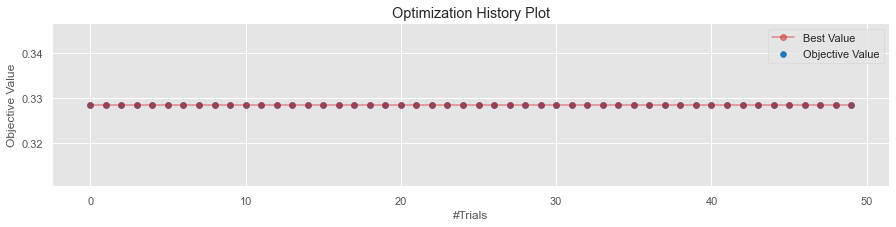

In [ ]:
optuna.visualization.matplotlib.plot_optimization_history(catb_study)
plt.rcParams['figure.figsize'] = (15,3)

### 모델링

In [ ]:
catb_study.best_params

{'iterations': 550,
 'learning_rate': 0.05859000594934147,
 'depth': 14,
 'l2_leaf_reg': 0.40873039990505217,
 'model_size_reg ': 0.6140226120083045}

{'iterations': 324, <br>
 'learning_rate': 0.679926594946361, <br>
 'depth': 15, <br>
 'l2_leaf_reg': 0.15074566030680278, <br>
 'model_size_reg ': 0.31564180957122945}

In [ ]:
catb = CatBoostClassifier(random_state = 1,
                          iterations = catb_study.best_params['iterations'],
                          learning_rate = catb_study.best_params['learning_rate'],
                          depth = catb_study.best_params['depth'],
                          l2_leaf_reg = catb_study.best_params['l2_leaf_reg'],
                          model_size_reg  = catb_study.best_params['model_size_reg '])

catb.fit(X_train, y_train)
y_pred = catb.predict(X_test)
print(y_pred)

0:	learn: 0.5493057	total: 670ms	remaining: 6m 7s
1:	learn: 0.4458504	total: 1.28s	remaining: 5m 51s
2:	learn: 0.3591295	total: 1.92s	remaining: 5m 50s
3:	learn: 0.2930258	total: 1.96s	remaining: 4m 28s
4:	learn: 0.2427990	total: 2.55s	remaining: 4m 38s
5:	learn: 0.2016472	total: 3.16s	remaining: 4m 46s
6:	learn: 0.1687364	total: 3.76s	remaining: 4m 51s
7:	learn: 0.1418880	total: 4.36s	remaining: 4m 55s
8:	learn: 0.1225788	total: 4.96s	remaining: 4m 58s
9:	learn: 0.1061941	total: 5.58s	remaining: 5m 1s
10:	learn: 0.0923065	total: 6.17s	remaining: 5m 2s
11:	learn: 0.0819138	total: 6.79s	remaining: 5m 4s
12:	learn: 0.0718088	total: 7.42s	remaining: 5m 6s
13:	learn: 0.0637258	total: 8.03s	remaining: 5m 7s
14:	learn: 0.0558673	total: 8.63s	remaining: 5m 7s
15:	learn: 0.0494755	total: 9.24s	remaining: 5m 8s
16:	learn: 0.0442961	total: 9.84s	remaining: 5m 8s
17:	learn: 0.0400486	total: 10.4s	remaining: 5m 8s
18:	learn: 0.0360018	total: 11s	remaining: 5m 8s
19:	learn: 0.0325227	total: 11.6s	r

158:	learn: 0.0005543	total: 1m 34s	remaining: 3m 52s
159:	learn: 0.0005485	total: 1m 34s	remaining: 3m 51s
160:	learn: 0.0005435	total: 1m 35s	remaining: 3m 50s
161:	learn: 0.0005368	total: 1m 36s	remaining: 3m 50s
162:	learn: 0.0005318	total: 1m 36s	remaining: 3m 49s
163:	learn: 0.0005265	total: 1m 37s	remaining: 3m 49s
164:	learn: 0.0005200	total: 1m 37s	remaining: 3m 48s
165:	learn: 0.0005152	total: 1m 38s	remaining: 3m 47s
166:	learn: 0.0005103	total: 1m 39s	remaining: 3m 47s
167:	learn: 0.0005058	total: 1m 39s	remaining: 3m 46s
168:	learn: 0.0005005	total: 1m 40s	remaining: 3m 46s
169:	learn: 0.0004946	total: 1m 40s	remaining: 3m 45s
170:	learn: 0.0004902	total: 1m 41s	remaining: 3m 44s
171:	learn: 0.0004852	total: 1m 42s	remaining: 3m 44s
172:	learn: 0.0004790	total: 1m 42s	remaining: 3m 43s
173:	learn: 0.0004742	total: 1m 43s	remaining: 3m 43s
174:	learn: 0.0004686	total: 1m 43s	remaining: 3m 42s
175:	learn: 0.0004643	total: 1m 44s	remaining: 3m 41s
176:	learn: 0.0004603	total:

311:	learn: 0.0002026	total: 3m 5s	remaining: 2m 21s
312:	learn: 0.0002019	total: 3m 5s	remaining: 2m 20s
313:	learn: 0.0002009	total: 3m 6s	remaining: 2m 20s
314:	learn: 0.0001999	total: 3m 6s	remaining: 2m 19s
315:	learn: 0.0001992	total: 3m 7s	remaining: 2m 18s
316:	learn: 0.0001982	total: 3m 8s	remaining: 2m 18s
317:	learn: 0.0001976	total: 3m 8s	remaining: 2m 17s
318:	learn: 0.0001968	total: 3m 9s	remaining: 2m 17s
319:	learn: 0.0001961	total: 3m 9s	remaining: 2m 16s
320:	learn: 0.0001954	total: 3m 10s	remaining: 2m 15s
321:	learn: 0.0001948	total: 3m 11s	remaining: 2m 15s
322:	learn: 0.0001940	total: 3m 11s	remaining: 2m 14s
323:	learn: 0.0001931	total: 3m 12s	remaining: 2m 14s
324:	learn: 0.0001924	total: 3m 12s	remaining: 2m 13s
325:	learn: 0.0001917	total: 3m 13s	remaining: 2m 12s
326:	learn: 0.0001910	total: 3m 14s	remaining: 2m 12s
327:	learn: 0.0001902	total: 3m 14s	remaining: 2m 11s
328:	learn: 0.0001894	total: 3m 15s	remaining: 2m 11s
329:	learn: 0.0001887	total: 3m 15s	r

465:	learn: 0.0001206	total: 4m 36s	remaining: 49.8s
466:	learn: 0.0001202	total: 4m 36s	remaining: 49.2s
467:	learn: 0.0001198	total: 4m 37s	remaining: 48.6s
468:	learn: 0.0001196	total: 4m 38s	remaining: 48s
469:	learn: 0.0001192	total: 4m 38s	remaining: 47.4s
470:	learn: 0.0001187	total: 4m 39s	remaining: 46.8s
471:	learn: 0.0001184	total: 4m 39s	remaining: 46.2s
472:	learn: 0.0001180	total: 4m 40s	remaining: 45.7s
473:	learn: 0.0001177	total: 4m 41s	remaining: 45.1s
474:	learn: 0.0001172	total: 4m 41s	remaining: 44.5s
475:	learn: 0.0001169	total: 4m 42s	remaining: 43.9s
476:	learn: 0.0001166	total: 4m 42s	remaining: 43.3s
477:	learn: 0.0001162	total: 4m 43s	remaining: 42.7s
478:	learn: 0.0001158	total: 4m 43s	remaining: 42.1s
479:	learn: 0.0001153	total: 4m 44s	remaining: 41.5s
480:	learn: 0.0001151	total: 4m 45s	remaining: 40.9s
481:	learn: 0.0001148	total: 4m 45s	remaining: 40.3s
482:	learn: 0.0001145	total: 4m 46s	remaining: 39.7s
483:	learn: 0.0001141	total: 4m 46s	remaining: 3

In [ ]:
# catb = joblib.load('catb_v2')
# catb.fit(X_train, y_train)
# y_pred = catb.predict(X_test)
# print(y_pred)

### 모델평가

In [ ]:
# train data
print('정확도:', accuracy_score(y_train, catb.predict(X_train)))
print('재현율:', recall_score(y_train, catb.predict(X_train)))
print('정밀도*:', precision_score(y_train, catb.predict(X_train)))
print('f1:', f1_score(y_train, catb.predict(X_train)))
print('roc:', roc_auc_score(y_train, catb.predict(X_train)))
print(classification_report(y_train, catb.predict(X_train)))

정확도: 1.0
재현율: 1.0
정밀도*: 1.0
f1: 1.0
roc: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6508
           1       1.00      1.00      1.00        65

    accuracy                           1.00      6573
   macro avg       1.00      1.00      1.00      6573
weighted avg       1.00      1.00      1.00      6573



In [ ]:
# test data
print('정확도:', accuracy_score(y_test, y_pred))
print('재현율:', recall_score(y_test, y_pred))
print('정밀도*:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.9926973984481972
재현율: 0.26153846153846155
정밀도*: 1.0
f1: 0.41463414634146345
roc: 0.6307692307692307
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6508
           1       1.00      0.26      0.41        65

    accuracy                           0.99      6573
   macro avg       1.00      0.63      0.71      6573
weighted avg       0.99      0.99      0.99      6573



### 중요변수

In [ ]:
feature_name = X.columns
feature_importances = catb.feature_importances_
catb_feature_importances = sorted(zip(feature_importances, feature_name), reverse = True)
print(catb_feature_importances)

[(10.239200463760453, 'OBV'), (8.400596608770236, 'Sector'), (8.147010882114863, 'CCI'), (7.123206317159639, 'PSR'), (6.7032305493406295, '베타'), (6.662317213981324, '자본성장율'), (6.197201975033872, '유동비율성장율'), (6.1862363173642, '개인'), (6.13654316427402, '기업규모(log)'), (6.003438452325476, '자산성장율'), (5.91616500685468, '영업이익증가율'), (5.868583060209671, '부채비율성장율'), (5.737419376767723, '매출액증가율'), (5.50172056819658, '유동비율'), (5.177130043846634, '소액주주보유주식비율')]


In [ ]:
catb_feature = pd.DataFrame()
catb_feature['feature'] = feature_name
catb_feature['catb_score'] = feature_importances
catb_feature

,feature,catb_score
0,OBV,10.239200
1,자본성장율,6.662317
2,자산성장율,6.003438
3,소액주주보유주식비율,5.177130
4,유동비율성장율,6.197202
5,베타,6.703231
6,PSR,7.123206
7,부채비율성장율,5.868583
8,영업이익증가율,5.916165
9,매출액증가율,5.737419


### 모델저장

In [ ]:
joblib.dump(catb, 'catb_v4')

['catb_v4']

# ML 기반 변수선택

In [ ]:
feature = pd.merge(rf_feature, xgb_feature)
feature = pd.merge(feature, lgbm_feature)
feature = pd.merge(feature, catb_feature)
feature

,feature,rf_score,xgb_score,lgbm_score,catb_score
0,OBV,0.102843,0.064880,90,10.239200
1,자본성장율,0.112353,0.054344,83,6.662317
2,자산성장율,0.075351,0.072451,91,6.003438
3,소액주주보유주식비율,0.062437,0.065638,103,5.177130
4,유동비율성장율,0.060440,0.076462,110,6.197202
5,베타,0.065827,0.066517,51,6.703231
6,PSR,0.075260,0.059416,91,7.123206
7,부채비율성장율,0.052612,0.041216,55,5.868583
8,영업이익증가율,0.050614,0.072018,76,5.916165
9,매출액증가율,0.061624,0.057968,74,5.737419


In [ ]:
# 표준화
feature_zscore = sp.stats.zscore(feature.drop('feature', axis = 1))
feature_zscore['feature'] = feature['feature']
feature_zscore['mean_score'] = (feature_zscore['rf_score'] + feature_zscore['xgb_score'] 
                                + feature_zscore['lgbm_score'] + feature_zscore['catb_score']) / 4
top = feature_zscore[['feature', 'mean_score']].sort_values(by = 'mean_score', ascending = False)
top

,feature,mean_score
0,OBV,1.241516
11,유동비율,0.698104
12,CCI,0.541267
1,자본성장율,0.403630
4,유동비율성장율,0.382043
6,PSR,0.203401
2,자산성장율,0.191488
10,개인,0.165065
3,소액주주보유주식비율,-0.064237
8,영업이익증가율,-0.385502


In [ ]:
print(list(top['feature']))

['OBV', '유동비율', 'CCI', '자본성장율', '유동비율성장율', 'PSR', '자산성장율', '개인', '소액주주보유주식비율', '영업이익증가율', '베타', '매출액증가율', '기업규모(log)', 'Sector', '부채비율성장율']
